<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/72_Firms_Panel_Regression%2C_VAR_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade linearmodels arch xgboost shap matplotlib seaborn scikit-learn yfinance

#### Annual to Monthly ESG dataset

In [2]:
import pandas as pd
import io

# Your provided dataset as a string
data = """Identifier (RIC)	Company Name	Date	ESG_score	Social_score	Gov_score	Env_score	BVPS	Market_cap	Shares	Industry	Net_income	RETURN_ON_ASSET	QUICK_RATIO	ASSET_GROWTH	FNCL_LVRG	PE_RATIO	Scope_1	Scope_2	CO2_emissions	Energy_use	Water_use	Water_recycle	Toxic_chem_red	Injury_rate	Women_Employees	Human_Rights	Strikes	Turnover_empl	Board_Size	Shareholder_Rights	Board_gen_div	Bribery	Recycling_Initiatives	Total_assets
AAL	American Airlines Group Inc	2021	59.02910721	64.28601828	56.39811612	54.38515247	-11.39725006	10198305438	644015000	Airlines	-1993000000	-3.1032	0.7333	7.1507	34.6286	5.8534	898.9575031	6.470219367	41439616	551629386	1873777.95		0		41	1	1	5.8	10	1	20	1	0	66467000000
AAL	American Airlines Group Inc	2020	69.40117811	68.81448509	83.94361492	56.96600148	-14.19130047	10626751115	483888000	Airlines	-8885000000	-14.5652	0.4953	3.3553	34.6286	5.8534	904.2455266	7.364001706	40604000	540190224	1729932.37		0		41.618	1	0	5.5	12	1	16.66666667	1	0	62008000000
AAL	American Airlines Group Inc	2019	69.36922798	72.44505934	77.10711045	58.21814638	-0.266147604	10574818306	444269000	Airlines	1686000000	2.7966	0.3045	-0.9657	34.6286	5.8534	916.4750598	7.648632162	39388000	564200000	1627726.3		0	41.872	41.654	1	1	4.242	13	1	15.38461538	1	0	59995000000
AAL	American Airlines Group Inc	2018	71.63302219	72.04574143	83.06962314	60.68373547	-0.36403898	11198012018	465660000	Airlines	1412000000	2.4911	0.3573	14.7675	34.6286	7.0665	969.3836879	9.117632405	39279000	562000000	1767786.47		0	41.942	42.452	1	0	5.613	13	1	15.38461538	1	0	60580000000
AAL	American Airlines Group Inc	2017	69.79137149	73.98311797	78.63204572	56.14422918	-1.594557245	11334335643	491692000	Airlines	2105000000	2.464	0.4439	2.9469	34.6286	9.8649	1015.247621	10.31959014	42038000	617300000	1608799.25		0	30.7	42.505	1	0	7.139	13	1	15.38461538	1	0	52785000000
AAL	American Airlines Group Inc	2016	70.3178445	78.15023537	71.82041582	58.46912521	6.853060249	11009755584	556099000	Airlines	2584000000	5.3687	0.5733	5.9052	10.5827	8.1442	979.2028136	12.16881594	42282000	619000000	1767786.47		0	38.95	42	1	0		11	1	9.090909091	1	0	51274000000
AAL	American Airlines Group Inc	2015	51.79390641	54.30943132	35.94845361	62.8321256	8.430668783	10802024347	687355000	Airlines	7610000000	16.6085	0.5644	12.0069	11.9697	4.2243	1581.72232		42300000			56781.15	0		41	0	0		12	1	8.333333333	1	0	48415000000
AAL	American Airlines Group Inc	2014	44.30935231	52.95317347	34.85299977	41.3372859	2.816897482	11314860839	734016000	Airlines	2882000000	6.7413	0.677	2.2399	28.1404	10.4955	1074.834037	18.58780929	27177000	389700000	1935858.67	98420.66	0		41	0	1		11	1	18.18181818	1	0	43225000000
AAL	American Airlines Group Inc	2013	46.85202135	51.25924607	31.05261636	55.31655844	-16.74987427	11600491291	163046000	Airlines	-1834000000	-5.5755	0.7831	79.8299	28.1404		1128.904458	19.30856166	27533000	394700000	2018280.61		0		39	0	0		11	1	18.18181818	1	0	42278000000
AAL	American Airlines Group Inc	2012	51.24684551	70.86964887	24.12375195	49.64136041	-63.778138	11797714591	125231000	Airlines	-1876000000	-7.9226	0.5391	-1.4173	28.1404				27400000	469631498	2022924		1		39	0	0		12	1	16.66666667	1	0	23510000000
ALK	Alaska Air Group Inc	2021	50.48254945	39.63992514	86.0630969	32.64819037	30.39268209	6474416945	126775000	Airlines	464000000	3.4147	0.9176	-0.6763	4.1239	10.5475	905.4543902	2.884637285	7976125	107090478	59089.504		0	28.803		1	0		12	1	41.66666667	1	0	13951000000
ALK	Alaska Air Group Inc	2020	54.76478447	44.82792507	87.86701992	37.97117517	24.20413123	6625511856	123450000	Airlines	-1324000000	-9.7933	0.8912	8.1044	3.6944	10.5475	937.9543804	1.300096805	7761999	112275897	61424.924		0	27.16		1	0		12	1	41.66666667	1	0	14046000000
ALK	Alaska Air Group Inc	2019	54.78086974	47.53378754	83.23838167	38.60978203	35.13169315	6590256377	124289000	Airlines	769000000	6.4338	0.5761	19.0707	2.9578	10.5475	949.2740056	1.254877122	7503475	108025619.5	63348.931		0	27.506		1	0		11	1	36.36363636	1	0	12993000000
ALK	Alaska Air Group Inc	2018	61.10430324	55.14174196	89.29964586	43.45236925	30.43901647	7068723596	123975000	Airlines	437000000	4.0355	0.5445	1.5448	3.0035	13.6321	858.5817722	2.115780591	5099633	73414401	68202.958		0	32.976	54	1	0		10	1	40	1	0	10912000000
ALK	Alaska Air Group Inc	2017	64.76905583	67.17896047	85.4188325	42.77115416	28.08190827	7248778365	123854000	Airlines	723000000	9.2718	0.7305	7.8699	3.2402	11.512	862.8063594	1.878885316	4840510	69695200	82806.8		0	32.853	54	0	0		11	1	45.45454545	1	0	10746000000
ALK	Alaska Air Group Inc	2016	55.66218011	51.08911554	87.34169898	32.98313322	23.72184498	7076278341	124389000	Airlines	797000000	9.5683	0.7424	52.5574	3.0872	12.3738																		9962000000
ALK	Alaska Air Group Inc	2015					18.78120789	7028431619	129372000	Airlines	848000000	13.4667	0.8532	7.6847	2.7752	12.0625																		6533000000
ALK	Alaska Air Group Inc	2014					15.70379121	7281515596	136801000	Airlines	605000000	10.1664	0.8833	3.8712	2.8638	14.7979																		6064000000
ALK	Alaska Air Group Inc	2013					14.50217997	7402391525	141878000	Airlines	508000000	8.9571	0.938	6.049	3.2878	13.6386																		5838000000
ALK	Alaska Air Group Inc	2012					10.04836794	7414982767	143568000	Airlines	316000000	5.922	0.9207	6.5415	4.1125	9.1566																		5505000000
ALLE	Allegion PLC	2021	73.40375216	83.38290372	66.44580957	68.26787654	8.443826474	10385605328	90500000	Building Products	483300000	15.7833	1.1331	-0.5995	3.8529	24.4624			100618	408600	394439.722		1	1.95	36	1	0		8	1	12.5	1	0	3051000000
ALLE	Allegion PLC	2020	59.52521192	62.27435928	67.24358974	41.10701352	8.985915493	10355606978	92800000	Building Products	314500000	10.4131	1.5383	3.4443	3.8043	22.7661							1			1	0		7	1	28.57142857	1	0	3069400000
ALLE	Allegion PLC	2019	59.57897254	59.97902967	67.4	45.07902049	8.091880342	10113855566	94300000	Building Products	402100000	13.9094	1.3513	5.5868	4.1021	25.4909	8.628692755	28.83442545	102338	462330			1			1	0		7	1	28.57142857	1	0	2967200000
ALLE	Allegion PLC	2018	47.47726304	58.84089693	45.47619048	31.17791234	6.852631579	10104150218	95700000	Building Products	413500000	16.2513	1.1688	10.5507	5.0847	17.1241							1			1	0		7	1	28.57142857	1	0	2810200000
ALLE	Allegion PLC	2017	37.20505888	43.26741466	46.33333333	10.51693405	4.222923239	10155323874	96000000	Building Products	329000000	11.4127	1.6554	13.1085	9.3016	21.1839							1			1	0		6	1	16.66666667	1	0	2542000000
ALLE	Allegion PLC	2016	33.00965314	46.7541872	36.17886179	3.431372549	1.182672234	9855340371	96900000	Building Products	231200000	10.1587	1.3324	-0.6894	32.4723	19.1713	8.827909676	28.74474155	77704				0			1	0		6	1	16.66666667	1	0	2247400000
ALLE	Allegion PLC	2015	28.54361028	30.94209162	38.50877193	6.77244582	0.266944734	9666527226	96900000	Building Products	154700000	7.1934	1.1253	12.2576	205.7163	21.7584							0			0	0		6	1	16.66666667	1	0	2263000000
ALLE	Allegion PLC	2014	41.9183995	32.57938447	73.05555556	3.267973856	-0.049947971	10015037471	97200000	Building Products	183700000	8.724	0.9782	0.7648	3.1199	21.3734							0			0	0		5	1	20	1	0	2015900000
ALLE	Allegion PLC	2013					-0.688541667	10069740345	96100000	Building Products	48400000	1.6213	0.9937	0.8469	3.1199	26.9942																		2000600000
ALLE	Allegion PLC	2012					13.99166667	10110326349	96000000	Building Products	230000000	10.9502	1.5827	-2.5734	1.4581																			1983800000
AME	AMETEK Inc	2021	48.43311116	50.37985133	64.36906602	33.0261549	29.75421186	30364402028	232813000	Electrical Equipment	990053000	8.8971	0.7522	14.8753	1.7358	34.7739							0			0	0		8	1	37.5	1	0	11898187000
AME	AMETEK Inc	2020	46.57431694	50.92936263	58.75348611	31.66671862	25.93042038	30350499974	231150000	Electrical Equipment	872439000	8.6371	1.6826	5.2102	1.8258	27.7144							0			0	0		9	1	33.33333333	1	0	10357483000
AME	AMETEK Inc	2019	42.26573632	40.45126171	65.38635236	24.98103781	22.46010915	29516376759	229395000	Electrical Equipment	861297000	9.3079	0.798	13.6485	1.9778	26.7282							0			0	0		9	1	33.33333333	1	0	9844559000
AME	AMETEK Inc	2018	26.17277106	29.15026235	26.42022008	22.71337861	18.37738007	30072458902	232712000	Electrical Equipment	766133000	9.4534	0.8634	11.111	1.9902	20.5798							0			0	0		9	1	33.33333333	1	0	8662288000
AME	AMETEK Inc	2017	30.66502908	29.55969049	44.8033748	20.09075908	17.49402986	30090994974	231845000	Electrical Equipment	589870000	9.1493	1.1544	9.7933	2.0451	27.7205							0			0	0		9	1	33.33333333	1	0	7796064000
AME	AMETEK Inc	2016	33.20225163	26.6121386	56.66255398	20.85230835	14.00090716	29567350956	233730000	Electrical Equipment	512158000	7.4435	1.4166	6.6095	2.1135	21.136							0			0	0		8	1	25	1	0	7100674000
AME	AMETEK Inc	2015	32.44116267	29.91329851	53.04810997	18.03063224	13.56625512	28909320420	241586000	Electrical Equipment	590859000	9.0336	0.9612	3.7298	2.0143	20.998							0			0	0		7	1	14.28571429	1	0	6660450000
AME	AMETEK Inc	2014	29.54343011	33.91813565	37.77892207	17.90074928	13.22890745	29527961804	247102000	Electrical Equipment	584460000	9.5043	1.0288	9.239	1.929	21.6921							0			0	0		7	1	14.28571429	1	0	6420963000
AME	AMETEK Inc	2013	25.66447145	33.68505357	27.27989037	15.55506041	12.85743394	29708688500	246065000	Electrical Equipment	516999000	9.3423	0.9512	13.2532	1.9516	25.4523							0			0	0		7	1	14.28571429	1	0	5877902000
AME	AMETEK Inc	2012	12.24247583	22.79737658	10.33164129	2.302631579	10.49699808	29731858590	243986000	Electrical Equipment	459132000	9.6562	0.7567	20.1544	2.0727	19.984							0			0	0		8	1	12.5	1	0	5190056000
AOS	A O Smith Corp	2021	54.00154295	46.2908336	58.07782524	59.02930495	11.45792209	10784338541	161319900	Building Products	487100000	14.6825	1.1314	9.925	1.8028	29.695	22.00053463	24.36361814	138754	2030842.8	1370806.738		0		42	1	0		10	1	20	1	0	3474400000
AOS	A O Smith Corp	2020	52.04805145	41.10365709	56.74584021	60.09099171	11.44241472	10897395090	162604150	Building Products	344900000	11.0924	1.4381	3.3584	1.7691	25.3944	20.7663352	24.32416324	143744	1902160.8	964340.768		0			1	0		10	1	20	1	0	3160700000
AOS	A O Smith Corp	2019	41.56413871	32.65950433	58.37558372	37.28373876	10.07431591	10462441424	166710900	Building Products	370000000	12.0728	1.4885	-0.4395	1.8114	21.4595	22.10197884	27.59135049	148916	1894870.8	1048918.184		0			1	0		11	1	18.18181818	1	0	3058000000
AOS	A O Smith Corp	2018	40.35379016	34.81925394	54.62287941	34.50987574	10.06510664	10768636243	172194040	Building Products	444200000	14.1715	1.6456	-3.9376	1.8647	16.1191							0			0	0		10	1	20	1	0	3071500000
AOS	A O Smith Corp	2017	39.21154111	31.54732662	60.62491062	29.74093049	9.526481348	10895824860	174605190	Building Products	378300000	9.7398	1.7797	10.5984	1.9266	35.9134							0			0	0		10	1	10	1	0	3197400000
AOS	A O Smith Corp	2016	26.94238012	27.99118757	50.88011516	5.848348348	8.673096881	10641447626	176825280	Building Products	326500000	11.8293	1.6631	9.9574	1.8664	25.4379																		2891000000
AOS	A O Smith Corp	2015					8.120039896	10660290384	179009180	Building Products	282900000	10.9982	1.7554	4.5283	1.822	24.5036																		2629200000
AOS	A O Smith Corp	2014					7.648944406	10917808078	181973960	Building Products	207800000	8.4699	1.6809	5.1767	1.8106	24.7412																		2515300000
AOS	A O Smith Corp	2013					7.211933413	11180036461	185575340	Building Products	169700000	7.2672	1.5987	4.9456	1.8512	27.8981																		2391500000
AOS	A O Smith Corp	2012					6.461914721	11156483013	186216240	Building Products	162600000	6.8586	1.7545	-2.9885	2.0298	41.5125																		2278800000
BA	Boeing Co	2021	82.88269624	92.7226164	70.15421641	82.05077087	-25.52586794	1.101E+11	587600000	Aerospace & Defense	-4290000000	-2.8911	0.2318	-8.9289	115.1484	20.1204	7.227239501	10.26904666	1484000				1			1	0		13	1	30.76923077	1	1	1.38552E+11
BA	Boeing Co	2020	79.93879066	89.38837375	71.12263333	74.49341221	-32.21245164	1.15323E+11	568600000	Aerospace & Defense	-11941000000	-8.3097	0.3168	13.8529	115.1484	20.1204	10.92685435	8.612932254	1976000				1			1	0		13	1	23.07692308	1	1	1.52136E+11
BA	Boeing Co	2019	77.71701741	79.62717681	77.18997023	74.9048174	-15.22438163	1.13632E+11	566000000	Aerospace & Defense	-636000000	-0.5068	0.1383	13.86	115.1484	20.1204	11.87170895	9.488856976	2008000				1			1	1		13	1	23.07692308	1	1	1.33625E+11
BA	Boeing Co	2018	80.25680333	80.77199004	78.32499284	81.93877551	0.585290055	1.19713E+11	585500000	Aerospace & Defense	10460000000	9.1067	0.1581	4.4472	115.1484	20.1204	7.878248802	12.65294772	1919584.75				1			1	0		13	1	15.38461538	1	1	1.17359E+11
BA	Boeing Co	2017	69.49118471	57.87901183	78.8101774	78.24839302	2.748547718	1.17463E+11	610000000	Aerospace & Defense	7187000000	8.3594	0.1768	24.8508	81.8273	27.5553	7.409326425	11.22625216	1791140		6435200		1			1	0		13	1	15.38461538	1	1	1.12362E+11
BA	Boeing Co	2016	66.49733556	60.73716296	61.48911976	83.9743125	1.285601888	1.15685E+11	642800000	Aerospace & Defense	5034000000	5.4597	0.3847	-4.6723	25.7837	14.6815	7.542088099	12.86163813	1851883		6624467.5		1			1	0		11	1	18.18181818	1	1	89997000000
BA	Boeing Co	2015	73.28709641	64.01439424	78.36107929	83.50847829	9.222594264	1.14513E+11	695000000	Aerospace & Defense	5176000000	5.5261	0.4161	1.6003	12.4886	15.7112	7.762476479	13.05624372	1803380	14570322	6775883.9		1			1	0		11	1	18.18181818	1	1	94408000000
BA	Boeing Co	2014	58.80077453	53.42036262	45.59034381	86.76060811	11.90901594	1.15865E+11	736700000	Aerospace & Defense	5446000000	5.869	0.4356	0.2784	7.8838	16.3193	7.466523048	12.55844696	1636000	13335907	7201000		1			1	0	5.64	11	1	18.18181818	1	1	92921000000
BA	Boeing Co	2013	66.30821389	55.90635541	66.1789478	85.71216365	19.60073791	1.21864E+11	767600000	Aerospace & Defense	4586000000	5.0507	0.4302	4.2375	8.7532	21.7131	10.44591547	15.63977595	1793000	13578569	6283784		1			1	0	2.89	12	1	16.66666667	1	1	92663000000
BA	Boeing Co	2012	69.4601515	60.07702182	70.26027822	85.71364267	7.763662829	1.24517E+11	761500000	Aerospace & Defense	3903000000	4.6186	0.4342	11.1394	18.0006	14.4657			1717000	12945536	6170222		1			1	1		14	1	14.28571429	1	1	88896000000
CARR	Carrier Global Corp	2021	53.5433211	75.75190169	32.16846484	47.09077067	7.79877838	39135942487	890300000	Building Products	1701000000	6.4918	0.8133	4.3	3.9377	24.2071	10.70187901	11.23012145	382845	4194215	3885000		0		27	1	0	8.7	138	1	12.5	1	1	26172000000
CARR	Carrier Global Corp	2020					7.215233699	38308526092	880200000	Building Products	2006000000	8.3454	1.1538	11.9923	2.3336	58.2924																		25093000000
CARR	Carrier Global Corp	2019					16.27986424	37293448246	866223440	Building Products	2155000000	9.587	0.823	3.0777	1.5755																			22406000000
CARR	Carrier Global Corp	2018					16.06629347	38282935894	866223440	Building Products	2769000000		0.8513																					21737000000
CARR	Carrier Global Corp	2017						38581488201	866223440	Building Products	1267000000																							0
CARR	Carrier Global Corp	2016						38137924773		Building Products																								0
CARR	Carrier Global Corp	2015						37395809037		Building Products																								0
CARR	Carrier Global Corp	2014						38632668597		Building Products																								0
CARR	Carrier Global Corp	2013						37711058663		Building Products																								0
CARR	Carrier Global Corp	2012						38138815680		Building Products																								0
CAT	Caterpillar Inc	2021	72.13560659	77.46507976	79.50521172	60.17132608	30.30147059	1.04418E+11	548500000	Machinery	6426000000	8.055	0.8838	5.7058	5.0642	18.5357	16.62355083	19.80933218	1521000	19340000	12794685.8		1	2.1	20	1	0		11	1	27.27272727	1	1	82793000000
CAT	Caterpillar Inc	2020	68.45152157	79.35077198	63.73362141	60.47466477	28.17680573	1.03217E+11	548600000	Machinery	2909000000	3.8245	1.0103	-0.1644	5.24	26.5407	16.82156134	17.21189591	1831000	23950000	14157433.4		1	2.15	20	1	0		12	1	25	1	1	78324000000
CAT	Caterpillar Inc	2019	69.24062216	81.50483905	64.45730631	59.82692617	25.97578348	97976412364	567500000	Machinery	5888000000	7.7637	0.9806	-0.0713	5.483	12.3515	16.99499287	24.12192537	2250000	25160000	14573828.5		1	2.65	20	1	0		12	1	25	1	1	78453000000
CAT	Caterpillar Inc	2018	65.09265865	81.85686947	55.78598823	54.53176476	23.73858641	1.00522E+11	599400000	Machinery	6020000000	7.9076	0.8938	2.0101	5.6054	11.3253	18.91689763	28.37534644	2150000	23690000	15293056.4		1	2.45		1	0		13	1	23.07692308	1	1	78509000000
CAT	Caterpillar Inc	2017	72.79077187	80.15268496	84.75097797	54.78036176	23.14464346	1.00243E+11	599300000	Machinery	3114000000	0.9943	0.9058	3.0226	5.652	22.9005	22.39406285	34.09710149	2177000	23050000	14649536.7		1	2.5		1	0		12	1	16.66666667	1	1	76962000000
CAT	Caterpillar Inc	2016	74.78070046	78.17414326	74.43365431	71.36225511	22.48331337	98973164139	584300000	Machinery	-53000000	-0.0876	0.8269	-4.6437	5.4765	28.2767	18.93173938	29.78026419	2290000	24680800	14460300		1	2.95		1	0		12	1	16.66666667	1	1	74704000000
CAT	Caterpillar Inc	2015	69.00936669	70.0284845	46.50413644	86.65024466	24.91839139	1.00034E+11	601300000	Machinery	2523000000	3.0818	0.8432	-7.4857	5.1663	12.7028	17.9399826	26.81936793	2470000	27400000	16428700		1	3.55		1	0		12	1	8.333333333	1	1	78342000000
CAT	Caterpillar Inc	2014	74.6556917	69.64784894	69.9077255	84.08386211	27.13220998	1.02467E+11	628900000	Machinery	2460000000	2.8919	0.8601	-0.2533	4.5152	12.8009	18.32686503	26.05289636	2470000	27883656	15671597.4		1	3.9		1	0		15	1	6.666666667	1	1	84681000000
CAT	Caterpillar Inc	2013	76.39329048	71.22152608	70.50775212	86.94853725	32.25511469	1.02864E+11	658600000	Machinery	3809000000	4.3585	0.8443	-4.5791	4.5345	16.2604			2608650	27469900	18397100		1	5.1		1	1		16	1	6.25	1	1	84896000000
CAT	Caterpillar Inc	2012	72.79492402	66.5416848	66.82472456	84.60233308	26.8648483	1.04359E+11	669600000	Machinery	5708000000	6.6672	0.8077	9.238	5.603	10.5012			2838510	28445300	19532700		1	5.15		1	0		15	1	6.666666667	1	1	88970000000
CHRW	CH Robinson Worldwide Inc	2021	40.57023703	49.34265757	43.02900534	29.01780786	15.26195257	13210868197	133834000	Air Freight & Logistics	844245000	13.8715	1.2689	36.6205	3.1196	16.7406	0.12617922	1.948836517	33630	334656			0	1.1	46.78	1	0	18.02	10	1	30	1	0	7028112000
CHRW	CH Robinson Worldwide Inc	2020	43.89576367	60.84003062	40.84564682	28.08123852	13.87076853	13258523663	136173000	Air Freight & Logistics	506421000	10.3506	1.464	10.8423	2.7559	24.5958	0.12541226	1.954994243	31850	297864			0	0.95	45.72	0	0	19.2	10	1	30	1	0	5144258000
CHRW	CH Robinson Worldwide Inc	2019	42.31067378	57.35761901	44.21058483	24.42655724	12.1991165	13500664954	137735000	Air Freight & Logistics	576968000	12.7247	1.5567	4.8256	2.7768	18.3744	0.131680215	1.806844966	32240	302184			0	1.45	44.84	0	0	21.3	9	1	33.33333333	1	0	4641060000
CHRW	CH Robinson Worldwide Inc	2018	39.72273109	64.88105764	29.98280605	20.58448154	11.47462053	12452244684	140405000	Air Freight & Logistics	667905000	15.3408	1.7728	4.5228	2.8678	17.6735				309564			0	1.15	44.83	0	0	20.7	9	1	22.22222222	1	0	4427412000
CHRW	CH Robinson Worldwide Inc	2017	33.63786668	57.99632217	29.53095953	10.67196253	10.13971268	12466412526	141382000	Air Freight & Logistics	492793000	12.744	1.2316	14.862	2.9526	26.6332							0		43.6	0	0	17.9	8	1	25	1	0	4235834000
CHRW	CH Robinson Worldwide Inc	2016	30.77665083	59.13234018	20.22825416	8.848317934	8.814254481	12390421376	142991000	Air Freight & Logistics	513384000	14.9411	1.0613	15.8085	2.8535	20.3921							0		43.28	0	0	16.6	9	1	33.33333333	1	0	3687758000
CHRW	CH Robinson Worldwide Inc	2015	21.79809165	43.32040509	17.54295533	2.028199029	7.935944042	11903562823	145349000	Air Freight & Logistics	509699000	15.9313	1.1555	-0.9327	2.9119	17.5592							0			0	0		10	1	30	1	0	3184358000
CHRW	CH Robinson Worldwide Inc	2014	23.93205698	39.40737834	30.73463783	1.498308139	7.112777	11897122895	147542000	Air Freight & Logistics	449711000	14.9476	1.0791	14.6824	3.0287	24.5289							0			0	0		10	1	30	1	0	3214338000
CHRW	CH Robinson Worldwide Inc	2013	23.85380914	39.80153556	28.19116136	2.962645321	5.988745499	11846891457	157080000	Air Freight & Logistics	415904000	14.8351	1.269	-0.0502	2.2941	21.8377							0			0	0		10	1	20	1	0	2802818000
CHRW	CH Robinson Worldwide Inc	2012	22.55966818	36.2104358	27.48900169	3.663558664	9.311710418	11701349085	161946000	Air Freight & Logistics	593804000	24.0296	1.3165	31.1586	1.7953	22.7703							0			0	0		8	1	12.5	1	0	2804225000
CMI	Cummins Inc	2021	69.17276111	76.54718133	68.41025183	60.73349391	58.60304288	29765763348	145900000	Machinery	2164000000	9.1984	1.0131	4.8002	2.802	15.1761	12.54987169	23.58680745	859005	15191627.47	3643429.314	53657.574	0		26.87	1	0		12	1	25	1	1	23710000000
CMI	Cummins Inc	2020	70.41783032	80.86492624	65.88047731	60.9315807	54.39946019	29493728284	149000000	Machinery	1811000000	8.4464	1.2126	14.6273	2.7209	18.9351	14.9209908	26.46690817	845472	14382914.48	3649135.24	53657.574	0		26.4	1	0	12	12	1	25	1	1	22624000000
CMI	Cummins Inc	2019	71.4056032	81.96816318	70.98766722	58.83624829	48.30759331	27925609931	156100000	Machinery	2259000000	11.6498	0.7759	3.5411	2.6118	12.4136	17.35930093	30.45073962	837107	13599136.79	3536437.577	53657.574	0	3.135	25.8	1	0		10	1	20	1	1	19737000000
CMI	Cummins Inc	2018	76.74273128	78.75177923	82.70654967	70.03533038	45.30968597	29072145148	162773350	Machinery	2199000000	11.5303	0.8083	5.4606	2.5424	8.8985	15.28058608	28.13589744	829690	13623360.96	3605992.843	95142.264	0	2.94	26.08	1	0		10	1	20	1	1	19062000000
CMI	Cummins Inc	2017	73.72908607	75.33634171	77.02951602	69.41359054	43.56480756	29033689930	167270870	Machinery	1775000000	6.0388	0.8593	20.4117	2.3409	16.6524	15.20383955	28.85666719	846887	13440273.24	3679418.52		0	3.05	25.91	1	0		8	1	25	1	1	18075000000
CMI	Cummins Inc	2016	75.39579582	74.9470684	73.25760468	77.46973917	40.67122969	28951082423	169336620	Machinery	1456000000	9.2486	0.9672	-0.8127	2.1108	15.6984	15.61158315	30.53927519	798455	12733639.42	3633993.6		0	3.25	25.81	1	0		8	1	25	1	1	15011000000
CMI	Cummins Inc	2015	74.55141165	73.49757772	72.69408967	77.16190755	41.59795926	29315694865	178406830	Machinery	1470000000	9.0556	1.1704	-3.9964	2.0388	9.4922	14.67249337	30.15137879	776977	6273060	3974680		0	3.45		1	0		9	1	22.22222222	1	1	15134000000
CMI	Cummins Inc	2014	74.74195501	73.64837696	75.81282392	75.30930444	42.42829118	30492139696	183079300	Machinery	1736000000	10.8291	1.2778	7.0342	1.9983	16.4005	14.03180408	31.43406472	820568	6233730	4088250		0	3.9		1	0		10	1	20	1	1	15764000000
CMI	Cummins Inc	2013	63.66299993	63.1174683	54.50385554	70.869842	40.1616348	31056149567	187417840	Machinery	1588000000	10.874	1.5472	17.3733	1.9327	17.8374			759836	5845100	4315370		0	5.75		1	0		10	1	20	1	1	14728000000
CMI	Cummins Inc	2012	68.5101685	65.5811705	69.46586265	71.39579326	34.88356981	31147302677	189668700	Machinery	1738000000	13.5861	1.228	7.542	2.0021	12.6315			597023		4146200		0	5.15		1	0		10	1	20	1	1	12548000000
CPRT	Copart Inc	2021	34.57638698	46.34056077	37.86304369	1.860465116	14.93829047	28794173016	240290000	Commercial Services & Supplies	936495000	23.3616	3.6313	32.0347	1.3321	39.7286							0			0	0		9	1	11.11111111	1	0	4562143000
CPRT	Copart Inc	2020	30.83418231	34.90832603	41.7244471		10.67536299	29178918647	238656000	Commercial Services & Supplies	699907000	23.319	2.3253	35.6272	1.4065	36.6673							0			0	0		9	1	11.11111111	1	0	3455261000
CPRT	Copart Inc	2019	38.51704495	36.73022936	59.76091807		7.715687083	28699174095	240453000	Commercial Services & Supplies	592793000	24.373	1.963	10.3965	1.4453	35.0292							0			0	0		7	1		1	0	2547617000
CPRT	Copart Inc	2018	35.587338	38.25499412	50.41694463		6.821168025	29183668593	241877000	Commercial Services & Supplies	426107000	19.4801	2.2583	16.4034	1.6013	33.7124							0			0	0		8	1		1	0	2307698000
CPRT	Copart Inc	2017	32.07864724	39.06398195	40.35648785		4.801631932	29575029202	237019000	Commercial Services & Supplies	394261000	21.7066	1.7274	20.1647	1.9398	24.8812							0			0	0		8	1		1	0	1982501000
CPRT	Copart Inc	2016	37.7821937	40.26691967	53.91248391		3.384179754	28842116858	244294000	Commercial Services & Supplies	270360000	15.68	1.5141	-8.275	1.9831	23.9294							0			0	0		8	1		1	0	1649820000
CPRT	Copart Inc	2015	31.81711958	34.40440745	44.85091507		3.829852121	27938428821	262850000	Commercial Services & Supplies	219783000	13.2982	3.1517	19.3692	1.6796	21.5958							0			0	0		8	1		1	0	1799952000
CPRT	Copart Inc	2014	22.63270634	34.09510731	21.21305842		3.9918651	28877695127	262460000	Commercial Services & Supplies	178687000	12.5779	1.4559	12.9131	1.609	19.7907							0			0	0		8	1		1	0	1506804000
CPRT	Copart Inc	2013	26.27012661	34.89545665	29.82148987		3.051752434	29012892550	259562000	Commercial Services & Supplies	180025000	14.4687	1.0326	15.6396	1.8802	22.2786							0			0	0		8	1		1	0	1334481000
CPRT	Copart Inc	2012	27.19678108	36.78910564	30.13703323		2.189810334	29601119933	262856000	Commercial Services & Supplies	182119000	16.272	1.4921	6.4148	2.0052	16.3463							0			0	0		8	1		1	0	1154000000
CSX	CSX Corp	2021	52.10748631	51.47209206	28.76042082	72.251718	5.995555556	77404713479	2255000000	Road & Rail	3781000000	9.4144	1.5513	1.8546	3.0207	25.0427	360.4944723	17.50127563	4000329	56043630	2028979.76		0	4.05	5	1	0		12	1	25	1	0	40531000000
CSX	CSX Corp	2020	55.56782	54.60473426	35.84072256	73.05041076	5.700987377	75913208657	2304023040	Road & Rail	2765000000	7.0852	2.0025	4.015	3.1284	25.463	361.0050264	16.38652928	4504923	63133899	1815066.241		0	4.45	5	1	0		11	1	36.36363636	1	0	39793000000
CSX	CSX Corp	2019	56.74158403	58.24979794	33.84092463	74.19156846	4.961424423	73127604063	2394023940	Road & Rail	3331000000	8.8843	1.3668	4.1602	3.0718	18.0744	379.4888163	16.70840816	4853416	67896819	1841473.261		0	5.2	6	1	0	9	13	1	23.07692308	1	0	38257000000
CSX	CSX Corp	2018	53.85151797	55.21442575	28.70076451	73.33399576	4.886376652	74377836046	2583025830	Road & Rail	3309000000	9.1323	1.1076	2.7701	2.6576	16.7243	412.5795056	19.3457223	4927403	68794471	7573810.474		0	6.15	6	1	0	13	14	1	21.42857143	1	0	36729000000
CSX	CSX Corp	2017	67.70775658	63.69350398	62.58070954	76.32906942	5.380480407	75255191824	2742027420	Road & Rail	1965000000	15.3781	0.7334	0.9177	2.6968	25.1791	431.3668805	20.70801337	5004017	70065956	4538706.59		0	5.25	6	1	1	10	12	1	16.66666667	1	0	35739000000
CSX	CSX Corp	2016	68.51500033	63.84542084	69.52520247	72.73187633	4.110835344	73697885318	2844028440	Road & Rail	1714000000	4.886	0.9598	1.9255	3.0071	19.9617	448.7426128	23.75649818	5580687	77533379.91	6109651.74		0	4.7	6	1	0	10	12	1	16.66666667	1	0	35414000000
CSX	CSX Corp	2015	66.32786931	64.84514034	60.75499555	72.5782205	3.951130377	73259207430	2952029520	Road & Rail	1968000000	5.8055	1.2398	5.1191	2.9731	13.4653	435.1254243	25.85271134	5840132	80637653.41	6594184.22	119584.89	0	4.75	7	1	0	10.1	12	1	16.66666667	1	0	34745000000
CSX	CSX Corp	2014	68.50767624	66.75658469	72.04880713	67.45374968	3.713582578	75101654563	3006030060	Road & Rail	1927000000	5.9443	0.9919	3.9991	2.9968	18.7556	436.6983203	26.04573424	5564960	76796642.06	5519127.78	89714.22	1		6	1	0	6.9	13	1	15.38461538	1	0	33053000000
CSX	CSX Corp	2013	70.28567704	69.42139781	72.78807308	69.13664951	3.429144642	76022878129	3057030570	Road & Rail	1864000000	5.9789	0.8791	3.9613	3.2024	15.9466	447.9218737	25.51815013	5569075	78169012	4266163.11	58673.85	1		7	1	0	8.86	13	1	15.38461538	1	0	31782000000
CSX	CSX Corp	2012	72.90632544	77.72332785	71.75826972	68.64461927	2.929322023	76987969484	3120031200	Road & Rail	1863000000	6.2055	0.8881	4.1814	3.4349	11.5013	457.6156846	27.03382789	5716441	75560577	5347413.05		1		6.39	1	0	10.28	13	1	15.38461538	1	0	30723000000
CTAS	Cintas Corp	2021	67.80153117	70.82367772	66.82893135	63.67434277	35.16454984	39253444084	107707000	Commercial Services & Supplies	1110968000	13.9685	0.7215	7.3917	2.2976	34.9489	84.47436317	20.10819859	740980	15345334	13397000		0	8.95		1	0		9	1	22.22222222	1	0	8236823000
CTAS	Cintas Corp	2020	67.3870332	59.4916066	86.79190524	54.07807407	31.1628458	39521074130	107012000	Commercial Services & Supplies	876360000	11.5981	1.1475	3.1361	2.4217	30.3201	90.1643471	22.97998216	779825	16279433	14813000		0	10.85		1	0		8	1	12.5	1	0	7669885000
CTAS	Cintas Corp	2019	60.31850254	52.68378413	77.20646052	50.12923904	28.30619344	38604078158	109495000	Commercial Services & Supplies	883904000	12.2958	0.8927	6.876	2.3915	29.1882							0	11.85		1	0		9	1	11.11111111	1	0	7436662000
CTAS	Cintas Corp	2018	56.55959198	60.71054692	56.6611074	48.83742996	28.29947558	38932910424	109810000	Commercial Services & Supplies	622484000	12.2094	1.2158	1.668	2.5947	30.6818							0	11.35		1	0		9	1	11.11111111	1	0	6958214000
CTAS	Cintas Corp	2017	64.77948372	65.57692144	67.61233379	59.27691475	21.93888381	39140375576	107783000	Commercial Services & Supplies	457286000	8.7858	0.8202	66.9765	2.6397	26.2881							0	12.35		1	0		9	1	11.11111111	1	0	6844057000
CTAS	Cintas Corp	2016	65.17389352	64.98297204	68.57571858	60.66265089	17.0268155	38798058076	109956000	Commercial Services & Supplies	448605000	16.7289	0.9273	-2.2337	2.1963	25.3953							0			1	0		9	1	11.11111111	1	0	4098815000
CTAS	Cintas Corp	2015	74.8455081	77.30315583	83.709154	57.69697443	16.67346851	37749321732	117543000	Commercial Services & Supplies	402553000	9.9508	1.8269	-6.0503	2.098	25.3953							0			1	0		9	1	11.11111111	1	1	4192460000
CTAS	Cintas Corp	2014	70.7929716	77.33605769	78.10907471	48.39766715	18.21658623	38381053120	121640000	Commercial Services & Supplies	374285000	8.5022	1.6214	2.6882	2.0044	20.7876							0			1	0		9	1	11.11111111	1	1	4462452000
CTAS	Cintas Corp	2013	71.85209477	78.23289556	76.011098	54.64943961	17.76026977	38543913264	124531000	Commercial Services & Supplies	315442000	7.4165	1.5353	4.4396	1.9597	18.312							0		42	1	0		10	1	10	1	1	4345632000
CTAS	Cintas Corp	2012	70.97404991	76.51858396	77.2193506	52.33839429	16.46869298	38447441969	130033000	Commercial Services & Supplies	297637000	6.9927	1.1786	-4.3896	1.9165	16.2555							1		42	1	0		8	1		1	0	4165706000
DAL	Delta Air Lines Inc	2021	66.73066723	77.71756137	42.47551164	74.07612712	6.11163522	23395832026	641000000	Airlines	280000000	0.3877	0.6545	0.6431	26.6473	7.9959	1004.674174	16.03252413	17448981	539773807.5			0	11.8	42	1	0		12	1	16.66666667	1	0	72459000000
DAL	Delta Air Lines Inc	2020	71.60800147	84.38565028	51.24850044	73.01524012	2.411949686	24342928070	636000000	Airlines	-12385000000	-18.1428	0.9727	11.5664	8.0824	7.9959	794.1034527	6.294573149	37624310	558965232			0	19.5	41	1	1		13	1	15.38461538	1	0	71996000000
DAL	Delta Air Lines Inc	2019	73.95030273	82.02880016	58.24366515	77.41693378	23.59139785	24086956166	653000000	Airlines	4767000000	7.6395	0.2839	7.0786	4.2967	7.9959	832.4947342	6.902358342	37301128				0	19.75	40.9	1	1		12	1	16.66666667	1	0	64532000000
DAL	Delta Air Lines Inc	2018	71.57331361	81.18308832	52.34475931	76.19225037	19.80752533	25545996019	694000000	Airlines	3935000000	6.9073	0.2197	12.2878	4.3459	8.8957	869.8002334	7.201954397	36078116	481100623.2			0	19.55	41	1	0		12	1	16.66666667	1	0	60266000000
DAL	Delta Air Lines Inc	2017	70.55325284	85.40036932	41.2957145	77.27987421	17.40277778	26582682230	723000000	Airlines	3599000000	6.1087	0.2646	4.7014	4.2282	11.777	898.2726489	7.271178707	35723704	584307052.4			0	20.15	40.89	1	1		13	1	15.38461538	1	0	53671000000
DAL	Delta Air Lines Inc	2016	61.94484531	69.62852122	37.22922235	74.12988581	16.3608522	25808367221	755000000	Airlines	4195000000	8.0368	0.3486	-3.525	4.512	9.686	861.3432832	7.184895833	35352571	580183024.2			0	19.35	41.23	1	0		15	1	13.33333333	1	0	51261000000
DAL	Delta Air Lines Inc	2015	69.21598822	74.01074353	54.47993014	76.19518163	13.61355082	25718777054	804000000	Airlines	4526000000	8.4488	0.3114	-1.6128	5.4488	10.9865	845.1705565	8.344185125	34449562	500794807	792283.19		0	16.8		1	0		16	1	12.5	1	0	53134000000
DAL	Delta Air Lines Inc	2014	70.57424996	71.12297773	65.46851222	74.48142136	10.54186603	26806657646	845000000	Airlines	659000000	1.2404	0.3325	3.3549	5.1944	15.0649	850.9767029	9.03086861	32485066	470364339	768517.76		0	17		1	0		14	1	14.28571429	1	0	54005000000
DAL	Delta Air Lines Inc	2013	65.68363541	65.12762849	69.14574857	63.28041049	13.71378092	27414590918	858000000	Airlines	10540000000	21.7764	0.3824	17.2884	10.1768	8.7951	845.2286338	10.06332152	31363556	455357633	851759.25		0	19.1		1	0		14	1	14.28571429	1	0	52252000000
DAL	Delta Air Lines Inc	2012	57.95954686	66.73555779	36.8881072	65.36972991	-2.521893491	27715357906	850000000	Airlines	1009000000	2.2919	0.3818	2.4161	76.162	6.4905	909.8307846	11.98929233	32369712	554026224	1039409.03		0	22.21		0	0		13	1	15.38461538	1	0	44550000000
DE	Deere & Co	2021	72.17396593	78.16415021	49.64614708	84.40231733	59.14955071	1.1717E+11	314000000	Machinery	5944000000	7.491	0.4647	12.0161	5.0754	18.1098	9.890277742	14.98688934	977200	12927000	23000000		0	8.25	19.4	1	0	4.7	12	1	16.66666667	1	0	84114000000
DE	Deere & Co	2020	69.41732526	78.08830863	41.53345376	83.18003265	41.26634769	1.15345E+11	316600000	Machinery	2801000000	3.715	0.5059	2.8489	6.0822	22.4342	10.3333717	15.55359834	967000	12780000	24500000		0	8.4	19	1	1		11	1	18.18181818	1	0	75091000000
DE	Deere & Co	2019	67.76402084	73.48213498	46.29650084	79.40605167	36.0600316	1.10028E+11	320600000	Machinery	3168000000	4.5459	0.3882	4.1408	6.3045	17.0121							0	6.35		1	0		13	1	23.07692308	1	0	73011000000
DE	Deere & Co	2018	64.85350714	71.63035413	51.96219358	68.1919356	34.9900806	1.10448E+11	327300000	Machinery	3047800000	3.4851	0.3721	6.5693	6.5192	14.2515							0	5.7		1	0		12	1	25	1	0	70108000000
DE	Deere & Co	2017	60.76401158	66.18883355	49.5758028	64.1603986	29.91330203	1.06448E+11	323300000	Machinery	2182700000	3.4906	0.6042	13.5843	7.6944	21.3695							0	5.95		1	0		14	1	21.42857143	1	0	65786300000
DE	Deere & Co	2016	61.45474048	67.46023859	51.02834895	63.58183733	20.68527919	1.05153E+11	316600000	Machinery	1523900000	2.6305	0.4056	-0.0502	8.7358	18.2579							0	5.8		1	0		11	1	18.18181818	1	0	57918500000
DE	Deere & Co	2015	62.23418792	66.99563107	58.86839761	59.83669567	20.21402878	1.03546E+11	336000000	Machinery	1940000000	3.2527	0.3749	-5.5249	7.5468	13.3623							0			1	0		12	1	25	1	0	57947600000
DE	Deere & Co	2014	59.07120308	62.96935405	59.85623219	54.15792128	24.96584022	1.08534E+11	366100000	Machinery	3170900000	5.2321	0.3899	3.0495	6.2529	9.7202	12.17318314	29.13524591	1493593				0			1	0		12	1	25	1	0	61336400000
DE	Deere & Co	2013	62.77918985	68.47953691	64.60762923	55.0273334	26.6436543	1.13234E+11	389200000	Machinery	3537500000	6.11	0.4043	5.7859	6.768	8.7654	13.12046857	32.52064037	1461086				0			1	0		11	1	18.18181818	1	0	59521300000
DE	Deere & Co	2012	70.372146	78.88271713	70.3615944	61.08235201	17.23016872	1.16741E+11	401500000	Machinery	3075000000	5.867	0.5197	16.7161	7.658	11.0857			1336644				0			0	0		11	1	18.18181818	1	0	56265800000
DOV	Dover Corp	2021	58.5008641	44.02384646	65.43541057	68.53955761	29.10950995	22626657121	145273000	Machinery	1123818000	11.4935	0.7701	13.6751	2.5815	25.7761	6.596465976	15.39768598	156959		975000		1	6.6	24	1	0		9	1	22.22222222	1	0	10403627000
DOV	Dover Corp	2020	59.03646701	41.25425969	74.74700198	65.37306253	23.50415134	22638181490	145393000	Machinery	683451000	7.6699	0.9491	5.5666	2.7766	25.3944	6.576691068	19.79099895	184366				1			1	0		11	1	18.18181818	1	0	9152074000
DOV	Dover Corp	2019	61.96255498	45.6692704	77.9351367	66.45399225	20.88637585	21848762244	146992000	Machinery	677918000	7.959	0.9226	3.6303	2.9364	22.051							1			1	0		12	1	16.66666667	1	0	8669477000
DOV	Dover Corp	2018	63.36463507	56.01320103	70.5305744	65.42514135	18.4732909	22596405654	152133000	Machinery	586945000	5.9952	0.8909	-21.5098	2.66	16.4323							1			1	0		12	1	16.66666667	1	0	8365771000
DOV	Dover Corp	2017	65.54103518	55.07669911	84.43859771	61.22632248	28.15415743	22907563605	157744000	Machinery	695763000	7.8141	0.9045	5.3615	2.5387	28.3633							1			1	0		13	1	15.38461538	1	0	10658359000
DOV	Dover Corp	2016	51.6146988	41.7966088	57.25327733	57.64305576	24.47801019	22380323744	156636000	Machinery	502128000	5.4363	0.832	17.5448	2.5149	25.1071							1			1	0		12	1	16.66666667	1	0	10115991000
DOV	Dover Corp	2015	52.31552764	37.11247576	60.63975734	61.98941143	23.12268826	22315499170	159172000	Machinery	595881000	9.864	1.0845	-4.6977	2.401	15.9023							1			1	0		13	1	15.38461538	1	0	8606076000
DOV	Dover Corp	2014	49.5208685	35.88061837	53.08735868	61.4520296	22.20097545	22783676643	168842000	Machinery	778140000	7.797	0.9164	-16.8112	2.1905	15.2726	17.57615615	37.2674088	363429				1			1	0		12	1	16.66666667	1	0	9030291000
DOV	Dover Corp	2013	55.26626178	42.20762479	63.83209982	62.39583348	31.39700241	22909004151	173547000	Machinery	797527000	9.4194	1.401	3.9376	2.0686	22.5807	20.06743244	34.20175505	399918				1			1	0		12	1	16.66666667	1	0	10855181000
DOV	Dover Corp	2012	40.9672758	27.18098349	60.96026801	39.36924982	27.09558196	22960863810	183993000	Machinery	650075000	8.1333	1.0198	9.9299	2.0249	14.8637			386524				0			0	0		13	1	15.38461538	1	0	10443943000
EFX	Equifax Inc	2021	46.27674865	32.43063796	77.90296872	26.37108075	29.40442986	27372588839	123600000	Professional Services	748500000	7.2068	0.4156	14.8682	3.0584	45.2843	0.193821926	6.575408843	27940				0		45	0	0	17	10	1	30	1	0	11040900000
EFX	Equifax Inc	2020	31.09422796	28.74743272	41.21453618	20.92047737	26.07736626	27416539296	122800000	Professional Services	526200000	5.9369	0.9324	21.5299	3.0487	38.7404	0.241475653	8.428555137	30411				0			0	0		10	1	30	1	0	9611800000
EFX	Equifax Inc	2019	33.36313874	30.1495371	58.74027129	2.976190476	21.32837055	26741411441	120900000	Professional Services	-392800000	-5.1002	0.6868	10.5659	2.6488	29.671							0			0	0		9	1	22.22222222	1	0	7909000000
EFX	Equifax Inc	2018	34.72111431	42.12184607	47.28679505	3.260869565	25.81229236	26655952219	121400000	Professional Services	306300000	4.3165	0.8378	-1.1087	2.2901	19.173							0			0	0		12	1	16.66666667	1	0	7153200000
EFX	Equifax Inc	2017	32.04747973	40.59853407	40.75075075	4.005167959	26.43130724	26682810832	121500000	Professional Services	549700000	8.4519	0.4668	8.5444	2.3809	26.5692							0			0	0		11	1	9.090909091	1	0	7233400000
EFX	Equifax Inc	2016	26.64837276	37.10700979	29.58461855	3.362573099	22.31936295	26360507480	121100000	Professional Services	495100000	8.7555	0.4466	48.0395	2.245	27.2124							0			0	0		10	1	10	1	0	6664000000
EFX	Equifax Inc	2015	24.19097512	37.03275727	22.59450172	3.03030303	19.46840775	25413130960	120900000	Professional Services	434800000	9.3664	0.7339	-3.422	2.0311	30.6995							0			0	0		10	1	10	1	0	4501500000
EFX	Equifax Inc	2014	32.88694315	43.30296465	40.38791624	3.157894737	18.15264026	25911236141	123500000	Professional Services	374000000	7.9862	0.5655	2.6675	2.0443	26.8628							0			0	0		10	1	10	1	0	4661000000
EFX	Equifax Inc	2013	32.14498731	42.38201412	40.01027749	2.222222222	18.98267327	26008903823	123700000	Professional Services	341500000	7.766	0.8235	0.438	2.1399	24.4286							0			0	0		9	1	11.11111111	1	0	4539900000
EFX	Equifax Inc	2012	36.28954005	43.25241968	50.30456853	3.558052434	16.1234362	25881935836	122500000	Professional Services	275300000	6.7697	0.7174	28.4594	2.2111	22.341							0			0	0		9	1	11.11111111	1	0	4520100000
EMR	Emerson Electric Co	2021	71.30977252	68.20499354	72.37356637	73.81553615	16.52399264	55372680000	601800000	Electrical Equipment	2327000000	9.6771	0.8525	8.0107	2.6026	23.4509	10.72077074	38.18615284	898518	8130643.2			1	2.25		1	0		10	1	30	1	0	24715000000
EMR	Emerson Electric Co	2020	71.41267432	68.07980728	80.26855099	67.67424293	13.94095207	55378620000	606600000	Electrical Equipment	1990000000	9.0597	1.0574	11.6358	2.6072	18.9509	11.66119026	40.7589614	912530	8215344			0	2.35		1	0		8	1	25	1	0	22882000000
EMR	Emerson Electric Co	2019	67.15629584	75.00871178	60.22240313	64.35504827	13.36092178	53168940000	620600000	Electrical Equipment	2328000000	11.2799	0.7495	0.5248	2.3799	18.1192	7.902188155	33.19306866	627278		3793040.997		0	2.3	30.6	1	0		10	1	20	1	0	20497000000
EMR	Emerson Electric Co	2018	69.4278434	82.1751811	57.14330316	65.73731351	14.15664557	55194480000	635300000	Electrical Equipment	2035000000	11.0208	0.6677	4.089	2.2632	23.6376	12.08504338	41.60274067	779654		4017839.932		0	2.7	27.9	1	0		10	1	10	1	0	20390000000
EMR	Emerson Electric Co	2017	67.17272069	84.0412068	43.778577	68.23745747	13.5773244	55135080000	643400000	Electrical Equipment	1675000000	7.3474	1.2159	-9.861	2.5372	23.9957	10.50015386	35.91876423	754261		4502748.545		0	3.1	27.8	1	0		13	1	15.38461538	1	0	19589000000
EMR	Emerson Electric Co	2016	63.07700244	78.95540599	42.05667066	63.2453195	11.7515528	53460000000	646800000	Electrical Equipment	1619000000	7.4623	0.7346	-1.6117	2.8002	21.098	11.78322901	42.97050696	970948		5310731.95		0	3.8		1	0		13	1	15.38461538	1	0	21732000000
EMR	Emerson Electric Co	2015	47.68717548	47.96553442	31.86496118	60.56822114	12.00207931	54000540000	676500000	Electrical Equipment	2540000000	11.7151	0.7595	-8.6404	2.542	14.1655							0	4.1		1	0		13	1	7.692307692	1	0	22088000000
EMR	Emerson Electric Co	2014	38.32693253	52.04821249	14.46742641	43.21808545	14.45158526	55087560000	704100000	Electrical Equipment	2238000000	8.7833	0.9662	-2.161	2.3613	19.5647							0	4.95		1	0		15	1	13.33333333	1	0	24177000000
EMR	Emerson Electric Co	2013	41.60463272	51.65901794	25.18054128	44.30602877	14.74850216	55105380000	722900000	Electrical Equipment	2066000000	8.259	1.0601	3.7493	2.3242	17.9116							0			1	0		13	1	15.38461538	1	0	24711000000
EMR	Emerson Electric Co	2012	48.28930036	65.09350841	28.97592384	46.02362754	14.09115795	55354860000	734600000	Electrical Equipment	2024000000	8.2552	1.0304	-0.1802	2.304	13.9921							0			1	0		15	1	13.33333333	1	0	23818000000
ETN	Eaton Corporation PLC	2021	70.07896267	76.87170871	34.61020916	92.21455326	41.16629044	61802036000	401600000	Electrical Equipment	2146000000	6.5117	0.5359	6.9224	2.101	38.3214	15.04894811	26.42010285	887023	10684954.62	3309000		0	2.7	32	1	0		13	1	23.07692308	1	1	34027000000
ETN	Eaton Corporation PLC	2020	70.02258301	77.30129344	35.9965035	90.42498418	37.12083541	60685396000	404000000	Electrical Equipment	1415000000	4.3634	0.6812	-2.9904	2.084	29.04	14.26734231	29.00851497	935148	10645393.36	3472000		0	3.2	33	1	0		12	1	25	1	1	31824000000
ETN	Eaton Corporation PLC	2019	67.103245	79.23551158	26.97037037	87.29168259	38.38186158	58404260000	420800000	Electrical Equipment	2213000000	6.9205	0.7849	5.5095	1.9851	16.7246	7.4985297	39.9431484	968000	8726400	4862000		0	3.25	31.3	1	0		12	1	25	1	0	32805000000
ETN	Eaton Corporation PLC	2018	73.22906544	81.12370028	51.35432668	82.83239486	37.08726687	61530852000	436900000	Electrical Equipment	2146000000	6.7331	0.8339	-4.693	1.9099	12.6945	7.596090545	41.7278574	974000	8708400	5093000		0	3.45	31	1	0		14	1	28.57142857	1	0	31092000000
ETN	Eaton Corporation PLC	2017	75.56079571	76.97284832	61.0462963	86.11341367	38.8143982	61463056000	447000000	Electrical Equipment	2924000000	9.4613	0.9927	7.0449	1.9592	16.2756	8.76720211	43.6168305	1092470	9955640	5668040		0	3.95	30.4	1	0		14	1	21.42857143	1	0	32623000000
ETN	Eaton Corporation PLC	2016	67.66019468	71.33571523	38.81005174	87.68613394	32.86593407	59943628000	456500000	Electrical Equipment	1919000000	6.2337	0.7851	-1.6776	2.0395	14.8857	7.6	37.4	1014840	9336528	5795864		0	4.2	29.8	1	0		14	1	21.42857143	1	0	30476000000
ETN	Eaton Corporation PLC	2015	64.45421435	60.19987011	40.76023392	88.84746304	32.62298604	59544828000	467100000	Electrical Equipment	1974000000	6.1124	0.8484	-7.5547	2.0833	11.6528	5.080286673	30.07348272	775000	9920700	6261064		0	4.25	29.8	1	0		13	1	15.38461538	1	0	30996000000
ETN	Eaton Corporation PLC	2014	69.16453241	55.79740758	64.52020202	87.63962931	33.29677283	60521888000	476800000	Electrical Equipment	1803000000	5.1956	0.8764	-5.5282	2.1187	14.4747	6.498681871	42.42535712	798000	6768000	3946000		0	4.4	30.1	1	0		13	1	15.38461538	1	0	33529000000
ETN	Eaton Corporation PLC	2013	70.59440969	57.05124868	69.38552189	86.3989736	35.46145723	61159968000	476700000	Electrical Equipment	1873000000	5.2201	1.0902	-0.8908	2.2349	19.0741	7.165555486	44.05258895	822000	7106400	4135000		0	4.4		1	0		12	1	8.333333333	1	0	35491000000
ETN	Eaton Corporation PLC	2012	63.75898588	58.2310663	40.02070393	89.58065148	43.45313399	60777120000	350900000	Electrical Equipment	1220000000	4.534	0.8301	100.3581	2.3772	13.449			782000	6822000	3989000		0	5.1		1	0		12	1	8.333333333	1	0	35810000000
EXPD	Expeditors International of Washington Inc	2021	55.35917666	49.20524155	61.90220194	56.57341861	20.65935144	17179241589	171250000	Air Freight & Logistics	1418845000	22.5803	1.4865	54.4378	2.0373	16.2382	0.653426819	3.839171941	45449.29	360907.2	214249.257		0	2.95		1	0		8	1	25	1	0	7609929000
EXPD	Expeditors International of Washington Inc	2020	55.01821311	52.78069799	57.78504965	55.13649072	15.79985505	17484168469	170896000	Air Freight & Logistics	698214000	16.1529	1.8625	33.4685	1.7755	23.3686	0.822282533	5.107004822	48474.45	378694.8	1377562.456		0	3.6		1	0		10	1	20	1	0	4927503000
EXPD	Expeditors International of Washington Inc	2019	55.19475577	54.50548539	58.67762867	53.03907127	12.84400728	17196181971	174209000	Air Freight & Logistics	592016000	16.8529	2.1788	11.3839	1.6754	23.0147	1.027458218	5.402649058	52330.56	390236.4	1393030.88		0	2.5		1	0		10	1	20	1	0	3691884000
EXPD	Expeditors International of Washington Inc	2018	55.43312992	48.20218096	72.52031609	49.02733616	11.40988784	17509579042	177833000	Air Freight & Logistics	638798000	19.2239	1.8881	6.3378	1.6165	19.5661	1.591157743	6.612871531	56779.66	366908.4			0	2.75		0	0		11	1	18.18181818	1	0	3314559000
EXPD	Expeditors International of Washington Inc	2017	57.58946914	49.37417508	76.45067504	50.77169944	11.1123645	17846692648	181666000	Air Freight & Logistics	451115000	16.5658	2.2558	11.6859	1.5399	24.0483	2.003344683	6.125654862	49570.94	303433.2			0	1.55		0	0		11	1	18.18181818	1	0	3117008000
EXPD	Expeditors International of Washington Inc	2016	49.37093996	36.84508975	69.44373857	46.21327884	10.1755166	17792483425	182704000	Air Freight & Logistics	432533000	16.0855	2.3277	8.7814	1.5146	22.4407	0.861918874	6.561193066	49116				0	3.75		0	0		11	1	18.18181818	1	0	2790871000
EXPD	Expeditors International of Washington Inc	2015	35.91630045	34.59144341	30.38729795	41.95906433	8.955139435	17245309080	190223000	Air Freight & Logistics	459497000	16.7589	2.2291	-11.2535	1.5325	18.7917	0.950230787	6.407126822	48299				0	3.75		0	0		11	1	9.090909091	1	0	2565577000
EXPD	Expeditors International of Washington Inc	2014	31.84901425	47.28562707	22.65829493	22.7849498	9.525565256	17570564418	196768070	Air Freight & Logistics	379460000	12.7635	2.2398	-4.1099	1.4939	23.2344	1.116071245	6.940825034	48988				0	3.75		0	0		10	1	10	1	0	2890905000
EXPD	Expeditors International of Washington Inc	2013	34.87455155	46.21343816	32.55292909	24.52544311	10.12056817	17994073973	206895470	Air Freight & Logistics	350011000	11.678	2.6976	2.0543	1.4514	26.3393	1.145756619	7.089787332	49349.15				0	3.75		0	0		9	1		1	0	3014812000
EXPD	Expeditors International of Washington Inc	2012	36.01028426	57.46547219	23.02668527	23.58682984	9.636301554	17966969361	211935170	Air Freight & Logistics	332969000	11.4538	2.7207	3.0451	1.4439	25.1911	1.009592249	6.381315247	45539.35				0	3.75		0	0		8	1		1	0	2954125000
FAST	Fastenal Co	2021	39.19181675	28.83534137	27.64694162	60.12795432	5.292623521	30590675753	577100000	Trading Companies & Distributors	925000000	22.3871	1.6658	8.4319	1.4308	40.0752	23.80075434	11.17542897	197521		30557.518		0	1.68	24.4	1	0		11	1	9.090909091	0	0	4299000000
FAST	Fastenal Co	2020	46.4415078	32.12530039	49.2455637	59.74657673	4.763332172	30256854645	575700000	Trading Companies & Distributors	859100000	22.1286	1.6568	4.337	1.4382	32.7718							0	2	24.53	1	0		10	1	10	0	0	3964700000
FAST	Fastenal Co	2019	33.01269783	32.73800518	57.20146765	13.15551681	4.650366367	29675545472	574441630	Trading Companies & Distributors	790900000	22.2119	1.6829	14.4031	1.4334	26.9017							0	2.58	23.86	1	0		9	1	11.11111111	0	0	3799900000
FAST	Fastenal Co	2018	36.64454078	36.01962509	64.81545163	13.85156	4.012134988	29617990109	574325530	Trading Companies & Distributors	741600000	24.1303	2.0153	14.1213	1.4165	20.1846							0	2.21	22.72	1	0		9	1	11.11111111	0	0	3321500000
FAST	Fastenal Co	2017	34.43778517	37.46124819	54.97640498	14.01885537	3.637818581	29514390454	576685470	Trading Companies & Distributors	554300000	20.7406	2.0647	9.0531	1.3845	28.4353							0		21.96	1	0		9	1	11.11111111	0	0	2910500000
FAST	Fastenal Co	2016	38.14351637	40.32878184	67.42545754	11.35429385	3.345037511	29042436473	578315050	Trading Companies & Distributors	499478000	19.2027	2.2219	5.3869	1.3928	27.1561							0		21.07	1	0		10	1	20	0	0	2668884000
FAST	Fastenal Co	2015	33.20783273	30.66584286	63.17182131	11.01520156	3.09018667	28558971418	584090880	Trading Companies & Distributors	516361000	21.1123	1.6009	7.3486	1.3162	23.0621							0			1	0		10	1	20	0	0	2532462000
FAST	Fastenal Co	2014	32.98727174	34.88355899	61.68554755	7.000172492	3.229817194	29381831176	594626000	Trading Companies & Distributors	494150000	22.2847	1.5361	13.6487	1.2025	28.6506							0	4		1	0		11	1	18.18181818	0	0	2359102000
FAST	Fastenal Co	2013	24.7821442	18.2788266	56.83110654	5.18015223	2.986810699	29468163686	595367180	Trading Companies & Distributors	448636000	23.0565	1.9734	14.3159	1.1676	31.4636							0			0	0		11	1	18.18181818	0	0	2075784000
FAST	Fastenal Co	2012	21.64996389	17.6179153	41.68866328	9.356434145	2.634947863	29514207692	594301900	Trading Companies & Distributors	420536000	24.0253	2.2144	7.7678	1.1595	32.8521							0			0	0		9	1	11.11111111	0	0	1815832000
FBHS	Fortune Brands Home & Security Inc	2021	53.79919225	53.08026039	35.82218288	68.49406607	22.28945455	11675847934	139500000	Building Products	772400000	10.1001	0.6885	7.8479	2.6189	18.6642																		7936200000
FBHS	Fortune Brands Home & Security Inc	2020	63.4479916	55.02531721	72.2143298	66.85505698	20.01081471	11581925921	140200000	Building Products	562000000	8.104	0.8579	16.9663	2.6239	20.6169																		7358700000
FBHS	Fortune Brands Home & Security Inc	2019	59.89548586	56.48984077	64.85711064	60.18309038	17.34524661	11250515390	141300000	Building Products	431300000	7.048	0.7186	5.4773	2.6615	19.2202																		6291300000
FBHS	Fortune Brands Home & Security Inc	2018	62.53592785	62.72161899	65.88574479	59.73536395	15.06362379	11659747018	146400000	Building Products	395500000	6.7898	0.5593	8.223	2.402	11.3314																		5964600000
FBHS	Fortune Brands Home & Security Inc	2017	59.75429009	60.79836997	61.5387254	57.12339744	16.96801567	11804655266	155800000	Building Products	449600000	8.8835	0.9686	7.4661	2.1447	22.2427																		5511400000
FBHS	Fortune Brands Home & Security Inc	2016	43.57637816	52.01367781	59.61441511	21.07139888	15.30460143	11411524555	157800000	Building Products	412400000	8.2605	0.9518	5.1849	2.0788	19.4576																		5128500000
FBHS	Fortune Brands Home & Security Inc	2015	35.38441077	48.6792144	43.4732086	13.14031576	15.3661442	11298818140	163000000	Building Products	306500000	7.056	0.9778	20.3015	1.8955	26.7695																		4875700000
FBHS	Fortune Brands Home & Security Inc	2014	24.66369208	38.19933866	26.35894718	7.047460218	13.96477132	11576558949	166300000	Building Products	273600000	3.8416	0.9302	-2.9966	1.6768	26.0289																		4052900000
FBHS	Fortune Brands Home & Security Inc	2013	26.94727563	39.79397324	31.94998287	7.617121672	16.00845922	11913336452	171300000	Building Products	209000000	5.7054	0.8721	7.8526	1.6006	33.3622																		4178100000
FBHS	Fortune Brands Home & Security Inc	2012	20.81341368	23.32175423	32.57660066	8.741936358	14.82627646	11991157548	166100000	Building Products	108300000	3.1604	1.1349	6.4873	1.6686	40.1157																		3873900000
FDX	FedEx Corp	2021	74.29997731	66.62690228	81.21210442	76.85236932	91.54545455	58640365078	268000000	Air Freight & Logistics	4952000000	6.6929	1.4023	12.5651	3.6812	17.3364	220.1095107	13.70010258	16183600	279445000			0		29	1	0	65	13	1	30.76923077	1	0	82777000000
FDX	FedEx Corp	2020	75.6520871	70.69019383	86.03305069	72.37666847	70.09578544	58094528234	262000000	Air Freight & Logistics	1286000000	2.0103	1.4485	35.1709	3.5488	13.7277	221.0576815	14.29107658	16402161	278195559.9			0		29	1	0	62	12	1	33.33333333	1	0	73537000000
FDX	FedEx Corp	2019	76.64263688	70.31330217	82.70683524	78.44591751	67.77480916	56944561289	265000000	Air Freight & Logistics	465000000	1.0119	1.2687	3.9614	2.8713	9.9162	231.5108174	16.04258212	16202370	269840750.7			0		28	1	0	51	13	1	30.76923077	1	0	54403000000
FDX	FedEx Corp	2018	79.74059863	73.53910957	90.94514782	77.12175411	72.71910112	58894735646	272000000	Air Freight & Logistics	2953000000	9.0641	1.2201	7.7813	2.8426	17.3649	232.9879308	18.13871251	15147708	251743995.3			0		29	1	0	41	12	1	25	1	0	52330000000
FDX	FedEx Corp	2017	77.00842262	69.48460896	84.63188868	78.80633236	60.42481203	58484033166	270000000	Air Freight & Logistics	2997000000	6.3421	1.461	5.642	3.1655	16.1426	273.2029187	19.0315894	14718391	243292152.8			0		28	1	0	38	13	1	23.07692308	1	0	48552000000
FDX	FedEx Corp	2016	77.05685842	65.358713	89.7657266	79.1391258	49.94202899	57212180325	279000000	Air Freight & Logistics	1820000000	4.4127	1.3469	25.8082	2.8665	15.2796	289.5958949	20.46195183	14713175	238461000			0		27	0	0	33	12	1	25	1	0	45959000000
FDX	FedEx Corp	2015	72.56335864	58.26450238	86.90963472	76.09855618	52.97879859	56926013435	287000000	Air Freight & Logistics	1050000000	3.0172	1.592	10.4657	2.2993	18.1601	295.189589	21.06961178	14410983	204710000			0		27	0	0		13	1	23.07692308	1	0	36531000000
FDX	FedEx Corp	2014	70.50258681	62.53226932	80.50848073	70.79885248	49.76221498	57707672994	310000000	Air Freight & Logistics	2324000000	6.9751	1.5753	-1.4806	2.0394	19.1957	311.0179285	21.91873462	14744766	208632000			0		27.2	0	0	23.5	12	1	16.66666667	1	0	33070000000
FDX	FedEx Corp	2013	63.5619623	61.53483992	72.08964362	58.65161044	55.23174603	58884136873	317000000	Air Freight & Logistics	2716000000	8.5584	1.7323	12.253	1.9757	13.6512	331.2106373	22.47209466	15095179	213247000			0		27.5	0	0	26.21	12	1	16.66666667	1	0	33567000000
FDX	FedEx Corp	2012	66.7367996	61.00169214	85.30865011	57.4732906	46.75238095	59451171265	317000000	Air Freight & Logistics	2032000000	7.094	1.4044	9.1948	1.913	13.0136	351.1715093	25.18507022	14792319				0		27.3	0	1		11	1	18.18181818	1	0	29903000000
FTV	Fortive Corp	2021	52.61877797	55.7975817	69.37014851	35.18616512	27.25558739	22578094980	352300000	Machinery	614200000	3.742	0.4709	2.5792	1.7599	35.5539	4.429764018	10.41587239	67754	652419.709			1		60	1	0		8	1	25	1	0	16465500000
FTV	Fortive Corp	2020	45.34290477	47.87957784	62.558008	28.22543519	26.56846473	23052062623	359000000	Machinery	1452200000	9.6344	0.9211	-7.9563	2.0482	57.0415	3.694874224	12.65472056	62135	653431.403			1	3.15		1	0		7	1	14.28571429	1	0	16051500000
FTV	Fortive Corp	2019	40.13011823	45.3109421	51.38387728	25.09145589	21.99821322	22750446851	340000000	Machinery	268100000	4.8701	0.6045	35.1274	2.1702	19.0396	2.444015914	9.03354702	66066	653675.519			0			1	0		7	1	14.28571429	1	0	17439000000
FTV	Fortive Corp	2018	26.95347153	37.99341617	35.26020174	7.969034608	19.08972504	23249549141	350700000	Machinery	471200000	24.8977	1.0828	22.9035	2.2537	41.6543							0			1	0		7	1	14.28571429	1	0	12905600000
FTV	Fortive Corp	2017	27.84618005	42.54599395	34.2985843	6.408268734	10.90733813	23515258274	352600000	Machinery	814300000	11.1769	1.2373	28.2156	2.8851	31.4085																		10500600000
FTV	Fortive Corp	2016					7.775238646	23113103911	347300000	Machinery	740200000	11.3283	1.1924	13.58	1.9575	25.0727																		8189800000
FTV	Fortive Corp	2015					15.00434531	22432617909	345200000	Machinery	863800000	11.8603	0.7399	-1.9713	1.3994																			7210600000
FTV	Fortive Corp	2014					15.19948197	22841396432	344044620	Machinery	883400000	12.1049	0.7442	1.5953	1.4098																			7355600000
FTV	Fortive Corp	2013					14.89167306	22859325315	344044620	Machinery	830900000		0.7138																					7240100000
FTV	Fortive Corp	2012						22723065807	344044620	Machinery	763700000																							6762300000
GD	General Dynamics Corp	2021	63.29408941	62.2818546	84.77410028	35.8742662	62.90763728	66128216882	282017000	Aerospace & Defense	3257000000	6.4253	0.3322	-2.407	3.0443	18.0494			762200				0	13.902	23	1	0		12	1	25	1	0	50073000000
GD	General Dynamics Corp	2020	56.07992718	54.62467326	73.50789415	35.0045325	54.58277859	65467295720	287913000	Aerospace & Defense	3167000000	6.2927	0.3749	3.9697	3.3961	13.5291			794161				0	12.495		1	0		11	1	27.27272727	1	0	51308000000
GD	General Dynamics Corp	2019	62.78261265	62.76628775	80.33512049	38.87755102	48.48657236	64792489660	290836000	Aerospace & Defense	3484000000	7.3535	0.2646	8.6791	3.6856	14.7204			784264				0	11.004		1	0		13	1	23.07692308	1	0	49349000000
GD	General Dynamics Corp	2018	58.02378837	56.53925712	75.83440583	36.48071625	39.73420217	65106288363	299160000	Aerospace & Defense	3358000000	8.3153	0.3204	29.5669	3.4728	13.7685			821773				0	12.829		1	0		14	1	21.42857143	1	0	45408000000
GD	General Dynamics Corp	2017	56.63306031	52.26629232	76.01274933	38.27811609	38.22215983	63309582517	304637000	Aerospace & Defense	3031000000	8.5373	0.5039	5.6493	3.1385	20.4459			817293				0	15.39		1	0		13	1	23.07692308	1	0	35046000000
GD	General Dynamics Corp	2016	51.98921674	46.35645742	69.87539773	38.01104019	33.80624666	60685336729	310387000	Aerospace & Defense	2679000000	7.8933	0.4262	3.6722	3.0975	19.9838			873858				0			1	0		13	1	23.07692308	1	0	33172000000
GD	General Dynamics Corp	2015	40.34917687	36.06896985	51.02986612	33.69649845	33.41912714	60057739323	326652000	Aerospace & Defense	3036000000	9.0177	0.5007	-9.4518	2.9837	14.7858							0			0	0		12	1	16.66666667	1	0	31997000000
GD	General Dynamics Corp	2014	37.06925433	40.6504065	38.44809866	28.56930651	35.29022172	60210473205	341331000	Aerospace & Defense	2673000000	7.1522	0.6136	-0.4423	2.6901	17.4529							0			0	0		13	1	15.38461538	1	0	35337000000
GD	General Dynamics Corp	2013	46.02183686	40.79420863	59.31873781	37.55289076	41.34708053	59932775238	353499000	Aerospace & Defense	2486000000	6.7533	0.7889	3.4539	2.696	13.458			914956				1			0	0		13	1	7.692307692	1	0	35494000000
GD	General Dynamics Corp	2012	36.85930863	39.84654259	34.65386935	34.34486915	32.23469347	59538444125	353346000	Aerospace & Defense	-381000000	-0.9596	0.6454	-1.6455	2.8102	10.885			918787.8				1			0	0		11	1		1	0	34309000000
GE	General Electric Co	2021	75.31447271	65.92555863	89.65003487	75.96049784	36.71220401	1.01632E+11	1098000000	Industrial Conglomerates	-3404000000	-2.8654	0.8409	-22.3788	5.9999	159.6641	9.626289	15.29656882	1890000	21132000	26384307.7		0		21.9	1	1		11	1	18.18181818	1	1	1.98874E+11
GE	General Electric Co	2020	79.98475618	71.37915799	92.29870199	81.13979415	32.49634369	1.03512E+11	1095000000	Industrial Conglomerates	6505000000	2.188	1.1085	-3.3811	8.1651	159.6641	11.08389399	15.40661265	2390000	27100000	24870143.7		0			1	1		10	1	40	1	1	2.56211E+11
GE	General Electric Co	2019	79.92871555	74.06046385	87.60567758	81.20729352	25.95417049	1.015E+11	1091000000	Industrial Conglomerates	-604000000	-1.7281	0.8032	-14.7538	9.7198	18.4743	13.29732404	15.56508473	2800000	31757306	33349462.1		0			1	1		11	1	27.27272727	1	1	2.65177E+11
GE	General Electric Co	2018	81.42546738	79.9426862	83.46345637	81.68159188	28.51777701	1.04996E+11	1086375000	Industrial Conglomerates	-20869000000	-6.5719	1.4388	-15.7546	7.8197	13.9057	16.82128144	21.25323583	3780000	43257460	34750063.8		0			1	0		18	1	27.77777778	1	1	3.11072E+11
GE	General Electric Co	2017	81.24665204	69.32172776	92.5054941	86.80502796	51.60078278	1.05942E+11	1085875000	Industrial Conglomerates	-3837000000	-2.3104	1.4781	1.1123	5.5703	19.0821	13.56011652	18.49867747	3830000	42729930	25475809.3		0			1	1		17	1	23.52941176	1	1	3.69245E+11
GE	General Electric Co	2016	82.44600779	74.85129712	91.69706242	84.56744868	67.21506925	1.01731E+11	1141250000	Industrial Conglomerates	8164000000	2.0579	1.5783	-25.937	4.93	28.755	17.02009413	22.31716424	4530000	49060300	30699700		0			1	0		16	1	25	1	1	3.65183E+11
GE	General Electric Co	2015	81.4900497	76.13243061	89.77294133	81.78876903	79.0611424	1.01852E+11	1243000000	Industrial Conglomerates	1701000000	-1.0672	1.3469	-24.7167	5.0702	36.7163			5030000	52330976	30510404.6		1			1	0		17	1	29.41176471	1	1	4.93071E+11
GE	General Electric Co	2014	80.62152999	76.16777264	82.54606208	84.25234488	102.0670981	1.03501E+11	1265375000	Industrial Conglomerates	9490000000	2.323	1.1531	-0.2446	5.0691	23.6333	17.70522168	27.51119061	4980000	51824547.2	29071948.8		1			1	0		18	1	27.77777778	1	1	6.54954E+11
GE	General Electric Co	2013	79.79999187	81.9197763	68.58124091	85.09650072	102.1843084	1.01896E+11	1286125000	Industrial Conglomerates	7881000000	1.9465	1.2505	-4.1517	5.2902	20.314	13.66906974	20.19136698	4880000	50642683	28125611.16		1		30.93	1	0		18	1	22.22222222	1	1	6.5656E+11
GE	General Electric Co	2012	84.4593259	85.04370996	82.53172912	85.12501866	93.5292217	1.08239E+11	1320500000	Industrial Conglomerates	14847000000	1.9441	1.0061	-4.6387	5.8603	15.1791	15.40864722	20.56842358	5090000	50800805	34447249		1		31.31	1	0		16	1	25	1	0	6.84999E+11
GNRC	Generac Holdings Inc	2021	30.70331467	33.87855213	60.7417025	2.202083881	35.31528571	20403114282	64253410	Electrical Equipment	556569000	13.5703	0.6002	50.7617	2.2511	41.1772							0	9.15		1	0		10	1	20	1	0	4877780000
GNRC	Generac Holdings Inc	2020	31.04081318	32.95865464	63.56497715	1.841923826	22.32294689	20181785013	63737730	Electrical Equipment	347218000	11.8817	1.6056	21.3738	2.4358	39.7467							0			1	0		10	1	20	1	0	3235423000
GNRC	Generac Holdings Inc	2019	25.46002419	31.81995644	44.83099844	2.368730777	16.67095397	20489860047	62865450	Electrical Equipment	252308000	9.8982	1.2924	9.865	2.84	24.1729							0			1	0		10	1	10	1	0	2665669000
GNRC	Generac Holdings Inc	2018	23.9172659	34.35296978	36.50275103	2.027388854	12.33415442	20121828381	62233230	Electrical Equipment	241220000	10.7027	0.982	19.7609	3.3868	12.8426							0			1	0		10	1	10	1	0	2426314000
GNRC	Generac Holdings Inc	2017	25.53610928	40.77533973	35.51694552	0.568475452	8.930282863	20191352561	62642870	Electrical Equipment	131157000	8.1184	1.0538	8.8243	4.0701	19.1905							0			1	0		8	1	12.5	1	0	2025965000
GNRC	Generac Holdings Inc	2016	27.4930526	39.06267992	45.31564878		6.180064983	19221203229	65382770	Electrical Equipment	98812000	5.4274	0.904	4.6693	4.1988	23.5695							0			1	0		9	1		1	0	1861684000
GNRC	Generac Holdings Inc	2015					6.841380668	17284731584	69200300	Electrical Equipment	77747000	4.2471	1.3978	-5.5195	3.831	17.8694																		1778635000
GNRC	Generac Holdings Inc	2014					7.146359879	18016967898	70171040	Electrical Equipment	174613000	9.4879	1.5752	4.6901	4.5618	20.6298																		1882542000
GNRC	Generac Holdings Inc	2013					4.657218107	18800868969	69667530	Electrical Equipment	174539000	10.2608	1.256	12.1182	4.3577	21.2617																		1798205000
GNRC	Generac Holdings Inc	2012					6.882774107	19294108961	69193140	Electrical Equipment	93223000	5.9065	0.8241	3.2879	2.5611	22.9237																		1603847000
GWW	W W Grainger Inc	2021	75.57297153	79.15139858	67.22326202	78.62129991	36.10789981	24598231307	52200000	Trading Companies & Distributors	1114000000	16.1869	1.3056	4.718	3.4811	26.6081	3.01976319	7.048755006	115647	1325966.4	474648		0	5	38.1	1	0		11	1	18.18181818	1	0	6592000000
GWW	W W Grainger Inc	2020	74.25198105	80.50347083	61.07502285	78.40244812	34.1682243	24574721674	53700000	Trading Companies & Distributors	755000000	11.3008	1.4289	4.8293	3.3397	19.6882	3.337224846	8.092416006	128252	2058278.4	508653		0	7	38	1	0		11	1	18.18181818	1	0	6295000000
GWW	W W Grainger Inc	2019	71.6103972	78.68960007	74.17063915	61.74217763	33.91224863	23835190390	54700000	Trading Companies & Distributors	895000000	14.2953	1.0638	2.2476	3.1457	17.9492	3.70263789	8.053621103	122559	1357261.2	470000		0	7	37.4	1	0		11	1	18.18181818	1	0	6005000000
GWW	W W Grainger Inc	2018	60.30564404	75.74374386	61.81547189	42.17990065	34.24242424	24381533820	56500000	Trading Companies & Distributors	823000000	13.3939	1.2811	1.1888	3.2337	17.2471	4.032966092	9.899376593	141235	1442870	510000		0	6.5		1	0		11	1	9.090909091	1	0	5873000000
GWW	W W Grainger Inc	2017	57.52076916	74.17728283	56.75669535	39.95871389	29.29171577	24363646056	58000000	Trading Companies & Distributors	620000000	10.1928	1.0962	1.9264	3.2966	21.445	4.84499544	10.23664586	150415	1548442.8	640000		0	5.5		1	0		11	1	9.090909091	1	0	5804254000
GWW	W W Grainger Inc	2016	58.85543964	74.99518978	62.47205211	38.20742446	29.75191992	23830590679	60839930	Trading Companies & Distributors	632838000	10.4904	0.9192	-2.7903	2.8421	20.5527			156449.76		588971		0	6		1	0		11	1	9.090909091	1	0	5694307000
GWW	W W Grainger Inc	2015	51.94535552	74.53813142	47.38793433	31.05850692	34.78734242	23631780956	65765120	Trading Companies & Distributors	785174000	13.805	0.8386	10.8783	2.0343	16.9379			159498.11				0	6.5		1	0		11	1	9.090909091	1	0	5857755000
GWW	W W Grainger Inc	2014	57.60057053	75.43119951	69.97809968	27.80434975	46.97305834	24132638357	69205740	Trading Companies & Distributors	812296000	15.1996	1.1093	0.3175	1.633	20.1385	3.800092625	11.47994228	136757				0			0	0		12	1	8.333333333	1	0	5283049000
GWW	W W Grainger Inc	2013	42.78822017	47.68658127	67.58209265	16.77474672	46.79885008	24221566099	70576430	Trading Companies & Distributors	807749000	15.5051	1.2814	5.0199	1.6386	22.1587	3.40113528	11.69297311	121933				0			0	0		12	1	8.333333333	1	0	5266328000
GWW	W W Grainger Inc	2012	43.72299462	50.96970519	63.29064466	19.49891731	43.31514923	24090729880	71181730	Trading Companies & Distributors	698849000	14.1795	1.289	6.3302	1.7214	19.3614							0			0	0		12	1	8.333333333	1	0	5014598000
HII	Huntington Ingalls Industries Inc	2021	33.52189723	47.68097119	28.41900777	14.30754918	69.67741935	8437683642	40300000	Aerospace & Defense	544000000	5.7922	0.4368	30.2807	3.989	14.4871				2445837			0	26.2		1	0		10	1	30	1	0	10627000000
HII	Huntington Ingalls Industries Inc	2020	36.16108623	51.33907389	29.57071512	17.09167569	46.8226601	8337711087	40600000	Aerospace & Defense	696000000	9.1651	0.4084	16.0148	4.3531	16.5067							0	23.35		1	0		11	1	27.27272727	1	0	8157000000
HII	Huntington Ingalls Industries Inc	2019	37.82507316	45.26118369	49.32955304	8.391608392	38.35748792	8163758841	41400000	Aerospace & Defense	549000000	8.1855	0.2079	10.152	4.3215	21.5484							0			1	0		11	1	27.27272727	1	0	7031000000
HII	Huntington Ingalls Industries Inc	2018	45.66197615	51.89413757	64.98509858	7.792207792	34.61187215	8173756097	43800000	Aerospace & Defense	836000000	13.1065	0.269	0.1412	3.8965	13.7347										1			10	1	20	1		6383000000
HII	Huntington Ingalls Industries Inc	2017	36.22855359	35.93822531	58.41698842	6.508264463	38.46827134	7992205937	45800000	Aerospace & Defense	479000000	7.5279	0.8124	0.3463	3.7309	31.216							0			1	0		9	1	22.22222222	1	0	6374000000
HII	Huntington Ingalls Industries Inc	2016	36.12583303	36.24151049	58.14312153	5.888429752	35.32051282	7677492334	47200000	Aerospace & Defense	573000000	9.2599	1.4028	5.4449	3.9376	18.6139							0			1	0		10	1	20	1	0	6352000000
HII	Huntington Ingalls Industries Inc	2015	28.59846546	35.97061176	39.57731959		31.10647182	7493542833	48300000	Aerospace & Defense	404000000	6.5889	1.5447	-3.4461	4.2953	14.5259							0			1	0		9	1	22.22222222	1	0	6024000000
HII	Huntington Ingalls Industries Inc	2014	39.96406587	44.08800582	61.0882252	3.535353535	27.97131148	7473148431	49300000	Aerospace & Defense	338000000	5.4236	1.5457	0.2249	4.3188	13.8885							0			1	0		9	1	22.22222222	1	0	6239000000
HII	Huntington Ingalls Industries Inc	2013	29.70180984	22.19624971	59.0647482	3.535353535	30.60362173	7441557104	50400000	Aerospace & Defense	261000000	4.1373	1.556	-2.6126	5.7665	19.7178							0			0	0		9	1	22.22222222	1	0	6225000000
HII	Huntington Ingalls Industries Inc	2012	30.65415904	26.5051874	58.75803723		13.50202429	7394769948	50100000	Aerospace & Defense	146000000	2.3433	1.4176	5.3221	8.1658	14.8935							0			0	0		8	1	12.5	1	0	6392000000
HON	Honeywell International Inc	2021	78.08059558	74.06237178	89.37650595	74.83845811	26.82218691	1.28605E+11	700400000	Industrial Conglomerates	5610000000	8.5885	0.9408	-0.1796	3.5732	25.4302	29.71067041	25.93320439	2042631	18154911.6			1	1.85	28.9	1	0		13	1	30.76923077	1	0	64470000000
HON	Honeywell International Inc	2020	75.54933552	66.69788239	86.66402106	77.79491266	24.92401647	1.27864E+11	711200000	Industrial Conglomerates	4865000000	7.754	1.0762	10.0666	3.4199	31.2625	35.38464667	25.09073729	2527992	19843568.48			1	2.1	28.7	1	0		12	1	25	1	0	64586000000
HON	Honeywell International Inc	2019	73.94416444	67.6087884	84.00562511	74.11538513	25.65048544	1.25916E+11	730300000	Industrial Conglomerates	5949000000	10.5503	0.91	1.5682	3.1753	19.3758	33.43908817	30.30682884	2583877	20486100.02			1	2.25		1	0		14	1	21.42857143	1	0	58679000000
HON	Honeywell International Inc	2018	67.411196	66.30206061	62.50197588	71.98936377	24.46837147	1.30134E+11	753000000	Industrial Conglomerates	6388000000	11.5401	0.9021	-2.8535	3.3805	14.3458	68.68744593	38.6462521	4218429	32546490.88			1	2.3		1	0		14	1	21.42857143	1	0	57773000000
HON	Honeywell International Inc	2017	66.8386484	67.55097292	63.59210218	68.26163035	21.65332634	1.29318E+11	772100000	Industrial Conglomerates	4608000000	2.7197	0.956	9.8327	3.1673	19.189	91.39293953	44.99898914	5262137	36805768.1			1	2.35		1	0		14	1	21.42857143	1	0	59470000000
HON	Honeywell International Inc	2016	62.76869006	69.97811017	49.69804429	63.67913001	25.34214314	1.25052E+11	775300000	Industrial Conglomerates	4849000000	9.302	0.898	9.794	2.7478	16.9672	98.95851734	43.94802263	5759991	38407349.18			1			1	0		14	1	21.42857143	1	0	54146000000
HON	Honeywell International Inc	2015	53.14266263	61.1890267	32.47384498	58.30479332	23.44575532	1.22734E+11	789300000	Industrial Conglomerates	4847000000	10.0626	0.7549	8.5037	2.6368	15.9573	111.298963	45.08132121	6107432	38625746.6			1	2.45		1	0		12	1	25	1	0	49316000000
HON	Honeywell International Inc	2014	67.58770722	62.82078686	83.24964105	62.19967532	22.51019888	1.25203E+11	795200000	Industrial Conglomerates	4329000000	9.3282	1.0327	0.0352	2.5876	17.3301	146.8961635	46.62883313	7289119				1			1	0		11	1	18.18181818	1	0	45451000000
HON	Honeywell International Inc	2013	64.15767757	58.69304466	80.1719767	59.3037518	22.21134283	1.24908E+11	797300000	Industrial Conglomerates	3962000000	8.9909	0.8704	8.5585	2.8674	17.2356	181.7441759	48.55150702	8412471				1			1	1		10	1	10	1	0	45435000000
HON	Honeywell International Inc	2012	61.78360239	57.42141189	78.46492554	55.25134348	16.58358896	1.26595E+11	791900000	Industrial Conglomerates	2931000000	7.1662	0.8585	5.1372	3.4339	15.6576							1			0	0		10	1	10	1	0	41853000000
HWM	Howmet Aerospace Inc	2021	59.12165463	68.21315807	51.9535144	52.09088493	8.158139535	14598834929	435000000	Aerospace & Defense	258000000	2.3821	0.8675	-10.6965	3.1053	31.5918	70.35558091	81.76459403	800000	11270000	4146440		1		25	1	0	37	10	1	30	1	0	10219000000
HWM	Howmet Aerospace Inc	2020	52.55995103	67.38453963	33.53323841	51.1024408	8.222988506	14716128294	439000000	Aerospace & Defense	211000000	1.7997	1.1675	-34.8423	3.5992	35.6319	61.98929276	77.48661595	990000	13610000	4846940		1		26	1	1	19.87	10	1	10	1	0	11443000000
HWM	Howmet Aerospace Inc	2019	51.81817721	76.42463404	24.5866862	43.46736597	10.29372197	13869940444	463000000	Aerospace & Defense	126000000	2.5927	0.5236	-6.0504	3.6057	24.3455	241.95928	239.0085571	3260000	13590000	12230000		1	5.35	24	1	0	16.17	13	1	7.692307692	1	0	17562000000
HWM	Howmet Aerospace Inc	2018	57.87339339	82.13593028	39.4586788	38.13543599	11.53830228	15047063146	503000000	Aerospace & Defense	368000000	3.4321	0.9443	-0.1336	3.6063	12.068	125.7716049	132.7160494	3350000	42820000	11680000		1	5.55	23	1	0	14.99	14	1	21.42857143	1	0	18693000000
HWM	Howmet Aerospace Inc	2017	73.91284605	75.58961016	72.82413439	72.2979798	10.88691796	14975849317	451000000	Aerospace & Defense	198000000	-0.3819	1.1278	-6.5875	3.9099	21.7133	126.6741972	140.3905115	3310000	41470000	12900000		1	5.65	30	1	0	12.47	9	1	33.33333333	1	1	18718000000
HWM	Howmet Aerospace Inc	2016	73.59975042	96.0101623	44.13878687	72.34848485	11.67808219	14401949637	438000000	Aerospace & Defense	-1062000000	-3.3301	1.032	-45.0668	3.3151	24.0304	1949.569	861.9995166	34900000	443102385	132900000		1	5.883	21.167	1	0	4.5	5	1	20	1	1	20038000000
HWM	Howmet Aerospace Inc	2015	67.74024406	88.1297481	39.93903526	67.96129405	28.68095238	14163173858	420000000	Aerospace & Defense	-156000000	-0.8729	0.4456	-2.2012			2144.793494	1076.383352	40400000	455418094	98800000		1	5.59	20.68	1	0	4.5	6	1	33.33333333	1	1	36477000000
HWM	Howmet Aerospace Inc	2014	71.67368254	94.69801823	38.13630566	74.84633352	31.79844961	14414516783	387000000	Aerospace & Defense	-61000000						1224.383466	655.6095867	43400000	487859943	102200000		1	4.67	19.83	1	0	4.7	6	1	33.33333333	1	1	37399000000
HWM	Howmet Aerospace Inc	2013	68.07538923	83.55016968	47.66311826	67.30540701	29.69999972	14477352515	356666670	Aerospace & Defense	-2244000000						1257.383966	704.6413502	46500000	416378666	102000000		1	5.66		1	0	6.1	6	1	33.33333333	1	1	35742000000
HWM	Howmet Aerospace Inc	2012	71.55092424	88.11001915	46.18762351	75.52800735	37.11059009	14653292562	358666670	Aerospace & Defense	162000000						1226.403751	665.3039958	47200000	458389738	110500000		1	6.38		1	1		6	1	33.33333333	1	1	40179000000
IEX	IDEX Corp	2021	53.64176664	53.25335239	49.35658166	57.63713264	36.88289474	14808335970	76400000	Machinery	449300000	9.6318	2.5246	11.39	1.7464	37.5024	2.150833927	13.53137334	36880	255430.8	120563.211		1	7.65		1	0		10	1	20	1	0	4917200000
IEX	IDEX Corp	2020	57.80283721	54.69337815	62.56546972	57.23134871	33.53801772	14697962334	76400000	Machinery	377778000	9.1824	3.3053	15.7446	1.713	37.6219	2.202857964	14.79812377	42410.19	286344.065	94675.743		1	1.86		1	0		10	1	20	1	0	4414398000
IEX	IDEX Corp	2019	59.93797577	57.17534888	64.59734483	59.07359389	29.93926767	14365319031	76454000	Machinery	425187000	11.6777	2.6008	9.789	1.7116	29.6246	2.46890685	15.49706361	44621.47	301511.03	120563.211		1	7.3		1	0		9	1	22.22222222	1	0	3813912000
IEX	IDEX Corp	2018	42.29766668	37.41094356	63.80124303	29.71721722	26.10375334	14607379833	77563000	Machinery	405673000	11.9466	2.1351	2.1834	1.771	23.1802							0			0	0		8	1	25	1	0	3473857000
IEX	IDEX Corp	2017	40.3435185	38.29218865	57.74064161	28.08718372	24.74737643	14652290485	77333000	Machinery	337157000	10.2907	1.8564	7.7556	1.9107	30.5072							0			0	0		9	1	22.22222222	1	0	3399628000
IEX	IDEX Corp	2016	40.57771639	31.69688436	62.63312784	31.90133815	20.36718863	14385871364	76758000	Machinery	271109000	9.097	1.6457	12.458	1.9953	23.7345							0			0	0		8	1	25	1	0	3154944000
IEX	IDEX Corp	2015	35.7140583	33.39094846	44.90632557	30.59204818	18.71341701	14118691045	77972000	Machinery	282807000	9.9076	1.8993	-3.376	1.9486	21.4242			94000	998640	173750.32		0	9.95		0	0		9	1	11.11111111	1	0	2805443000
IEX	IDEX Corp	2014	28.75295016	30.85446927	41.33893871	15.96852217	18.64706768	14362274241	80728000	Machinery	279386000	9.6489	1.8574	0.5501	1.8928	21.738			88400	986760	164665.33		0	11		0	0		9	1	11.11111111	1	0	2903463000
IEX	IDEX Corp	2013	31.95570082	30.41036676	52.68355067	16.37091315	19.2964535	14412513276	82489000	Machinery	255215000	8.9976	2.2746	3.6687	1.8673	23.8147			92600	970259	219932.32		0	14		0	0		9	1	11.11111111	1	0	2887577000
IEX	IDEX Corp	2012	27.4409635	33.10774513	35.14399194	14.83028951	17.71696356	14347903421	83641000	Machinery	37630000	1.3388	1.9729	-1.7883	1.8876	17.2334			55154	457814	153661		0	14.5		0	0		10	1	10	1	0	2785390000
IR	Ingersoll Rand Inc	2021	42.08273116	42.25496748	51.60245061	33.9614475	21.70081967	20271925398	421200000	Machinery	534800000	3.6043	2.0837	-5.63	1.7225	41.9969	10.14673311	16.52345716	105966	1134262.8	540000		0	2.65	22	1	0	16.7	10	1	20	1	0	15154500000
IR	Ingersoll Rand Inc	2020	41.84428617	42.27724533	51.71524859	33.1454362	23.82366771	20577901330	382800000	Machinery	-56800000	-0.3219	1.7434	246.9579	1.8824	101.2715	16.7971777	24.39455116	100998	821862	208000		0	5.75	22	1	0	13.9	11	1	9.090909091	1	0	16058600000
IR	Ingersoll Rand Inc	2019	23.43739672	27.60264547	38.82032466	6.067370184	9.188697789	20092419518	208900000	Machinery	97300000	3.4908	1.6787	3.149	2.5707	34.9903	16.82801695	23.1608298	107562	969534	208000		0	7.85		1	0	12.3	11	1	9.090909091	1	0	4628400000
IR	Ingersoll Rand Inc	2018	18.25190563	19.65471837	27.19050894	9.270366722	8.313492064	20610538763	209100000	Machinery	170500000	5.9155	1.2518	-2.9018	2.889	13.6806	18.44531447	27.3132946	108695	835084.8			0			0	0		8	1		1	0	4487100000
IR	Ingersoll Rand Inc	2017					8.105378705	20981789560	188400000	Machinery	27800000	0.4118	1.6547	7.0727	5.1283	61.1363																		4621200000
IR	Ingersoll Rand Inc	2016					1.401490785	20533024860	189732250	Machinery	-31290000	-0.8344	1.4008	-3.2742	13.3782																			4315948000
IR	Ingersoll Rand Inc	2015					2.056756297	21214331268	189732250	Machinery	-351988000		1.4644																					4462046000
IR	Ingersoll Rand Inc	2014						21659016289	189732250	Machinery	-135925000																							5107100000
IR	Ingersoll Rand Inc	2013						21650856931	189732250	Machinery	-2600000																							5420700000
IR	Ingersoll Rand Inc	2012						21728336359	189732250	Machinery	264500000																							2501800000
ITW	Illinois Tool Works Inc	2021	66.05506538	66.42232505	76.4498222	58.5601286	11.50428435	67379428505	316400000	Machinery	2694000000	17.0027	1.2585	2.9785	4.656	30.7837	8.600286305	30.04429776	485917	5389624.8	2656172.987		0	7		1	0		10	1	20	1	0	16077000000
ITW	Illinois Tool Works Inc	2020	53.44866372	53.49230546	76.76266024	37.50432128	10.03786684	67019562526	318300000	Machinery	2109000000	13.7484	1.9583	3.6103	4.9428	30.8204	9.393011553	29.3696931	546903	5941850.4	2691002.544		0	8.7		1	0		11	1	18.18181818	1	0	15612000000
ITW	Illinois Tool Works Inc	2019	44.93663271	39.99670338	72.87375942	31.37116486	9.342389626	65983774358	325600000	Machinery	2521000000	16.8415	2.0622	1.3315	4.7672	23.8639	9.563109426	31.60597237	607985	6197115.6	3178604.992		0	10.3		1	0		11	1	18.18181818	1	0	15068000000
ITW	Illinois Tool Works Inc	2018	46.17054372	44.11914204	68.99399257	32.88584637	9.713432836	67698613983	337100000	Machinery	2563000000	16.1959	1.1649	-11.3826	4.0375	16.841	9.535000699	36.57398351	660004	6216177.6	3086854.224		0			1	0		11	1	18.18181818	1	0	14870000000
ITW	Illinois Tool Works Inc	2017	45.15095488	47.55961615	70.05842389	25.49534059	13.32461494	68352631286	346800000	Machinery	2345000000	10.55	1.8742	10.3875	3.6182	25.4597	7.9818369	38.88322671	637318	5573390.4	3074581.925		0			1	0		12	1	16.66666667	1	0	16780000000
ITW	Illinois Tool Works Inc	2016	44.21647402	52.02449289	58.52305488	25.79626914	11.98309859	67010174717	357100000	Machinery	2035000000	13.1587	1.7496	-3.3569	3.2633	21.6846	8.403356956	35.4460276	587801	5219197.2	2667934.256		0			1	0		11	1	18.18181818	1	0	15201000000
ITW	Illinois Tool Works Inc	2015	39.58474683	52.64716927	41.66233932	23.67089676	14.19951074	66806772207	370100000	Machinery	1899000000	11.4418	2.2352	-9.9399	2.7563	18.1846	8.694766639	36.24848108	650958	5732870.4	2369238.909		0			1	0		13	1	15.38461538	1	0	15729000000
ITW	Illinois Tool Works Inc	2014	47.82615592	52.10779754	66.56379281	30.29852092	16.97535474	67251128460	404600000	Machinery	1890000000	15.741	1.7824	-12.5263	2.2655	20.2575	8.419950478	33.47053414	592122	5304841.2	2609373.963		0			1	0		12	1	16.66666667	1	1	17465000000
ITW	Illinois Tool Works Inc	2013	44.09940026	51.38883634	58.52801795	26.1715368	21.74585388	67532762706	449300000	Machinery	1630000000	8.55	0.9915	3.4026	1.9382	23.1259	7.802312217	30.84368873	571613	5146902	2723193.671		0			1	0		12	1	16.66666667	1	1	19966000000
ITW	Illinois Tool Works Inc	2012	48.59456374	46.83402191	77.85004069	30.60158233	22.47977863	67955214073	473200000	Machinery	2233000000	15.3918	2.0826	7.3706	1.8122	18.2819	8.660558043	33.58753014	613231	5374198.8	1870068.248		0			1	0		10	1	20	1	1	19309000000
J	Jacobs Engineering Group Inc	2021	85.01754687	86.92499917	71.5504776	92.75970676	45.62453723	16517770122	131274000	Professional Services	420821000	3.5353	0.7141	18.4409	2.2956	21.4163	1.51869999	4.18241106	72620	808707.6	295000		0	1	29.5	1	0	17.9	10	1	30	1	0	14632609000
J	Jacobs Engineering Group Inc	2020	70.37923271	63.34993642	55.61506322	87.8427882	44.2212388	16347204084	132721000	Professional Services	385883000	4.1302	0.8513	7.7786	2.0656	17.1807	3.529092732	6.361100564	104636	352976.4	483600		0	0.95	29	1	0	18.6	11	1	18.18181818	1	0	12354353000
J	Jacobs Engineering Group Inc	2019	65.80539261	58.27579698	62.2331587	75.76706649	41.43873045	15894945652	139206000	Professional Services	350472000	7.0347	0.7498	-9.3556	2.0839	17.9369							0			1	0	19.8	10	1	20	1	0	11462711000
J	Jacobs Engineering Group Inc	2018	62.3878978	53.7777894	71.89885146	64.06779948	42.56591002	15893653485	137536000	Professional Services	265326000	1.6321	0.5538	71.3323	1.9476	43.2656							0			1	0	27.6	11	1	18.18181818	1	0	12645795000
J	Jacobs Engineering Group Inc	2017	60.7596998	52.8008019	69.44939681	62.38533956	37.09769624	15919496824	120147000	Professional Services	170051000	3.9852	0.8946	0.2831	1.6956	28.2754							0			1	0	11.47	12	1	16.66666667	1	0	7380859000
J	Jacobs Engineering Group Inc	2016	55.63128133	59.293229	39.86894553	63.2862711	35.50461572	15429765550	121483000	Professional Services	214515000	2.7791	0.9905	-5.4702	1.77	15.8698							0	1.8		1	0	12.57	11	1	9.090909091	1	0	7360022000
J	Jacobs Engineering Group Inc	2015	63.24653451	71.75645502	57.25251368	59.15313556	34.33203741	15184253829	126110000	Professional Services	328882000	3.7313	0.8453	-7.8987	1.8536	10.9025							0	2.1		1	0	10.76	11	1	9.090909091	1	0	7785926000
J	Jacobs Engineering Group Inc	2014	62.12974897	68.41009979	54.12290989	61.66825705	34.25162665	15445271553	132371000	Professional Services	352112000	4.1723	0.9184	16.2152	1.8115	14.5195	0.502029691	0.750520159	13645				0	1.65		1	0		10	1	10	1	0	8453659000
J	Jacobs Engineering Group Inc	2013	67.06228857	71.86880849	56.66412715	69.75932078	32.58691449	15460777557	130945000	Professional Services	440182000	5.9955	1.4016	6.356	1.7785	17.8916	0.596436178	0.635447265	12789				0			1	0	9.89	11	1	9.090909091	1	0	7274144000
J	Jacobs Engineering Group Inc	2012	67.16700727	73.29112802	55.19650999	69.69044999	29.16292971	15467238392	128692000	Professional Services	390954000	5.8128	1.2741	10.3272	1.8533	13.7601			13050				0		25	1	0	7	11	1	9.090909091	1	0	6839433000
JBHT	J B Hunt Transport Services Inc	2021	56.4707232	51.26442666	71.66510292	49.44889468	29.5923082	21100014402	106593000	Road & Rail	760806000	11.9598	1.0766	14.6078	2.225	28.4638	196.2083409	1.73796224	1907524	26816000			0	9.85	13.8	0	0	39.5	10	1	30	1	0	6794348000
JBHT	J B Hunt Transport Services Inc	2020	52.99887994	53.03291236	60.13948028	47.01151122	24.59922422	21255192405	106766000	Road & Rail	506035000	8.8784	1.3253	8.3624	2.3421	28.6329	205.290784	3.27552154	1911564	26650970			0	11	13.3	0	0	51.9	10	1	20	1	0	5928348000
JBHT	J B Hunt Transport Services Inc	2019	44.28342622	48.48187936	50.21681121	34.79061448	21.12224096	21007746401	108307000	Road & Rail	516320000	9.7765	1.0107	7.4476	2.4179	21.8955	206.849456	2.698240276	1805227				0			0	0		10	1	20	1	0	5470854000
JBHT	J B Hunt Transport Services Inc	2018	46.44374225	47.48389541	67.61921137	27.67068539	19.21265371	21277210906	110428000	Road & Rail	492804000	10.2456	0.7833	14.0257	2.4252	20.5995	227.3990593	3.178215993	1657751				0			0	0		10	1	20	1	0	5091647000
JBHT	J B Hunt Transport Services Inc	2017	41.47612446	44.20444603	58.25110825	24.54128961	16.72311273	20560036892	111049000	Road & Rail	995463000	16.3084	1.0147	13.026	2.5869	31.2104							0			0	0		10	1	20	1	0	4465349000
JBHT	J B Hunt Transport Services Inc	2016	40.80350489	43.63058068	58.87929262	22.67768301	12.57233672	19807213878	113361000	Road & Rail	432090000	11.4004	1.0817	8.8491	2.7926	25.8325							0			0	0		11	1	18.18181818	1	0	3828988000
JBHT	J B Hunt Transport Services Inc	2015	38.24404752	36.01594484	61.29451445	21.44910298	11.24123205	19791486378	116728000	Road & Rail	427235000	12.1927	1.183	7.4311	2.7978	20.0829							0			0	0		11	1	18.18181818	1	0	3629544000
JBHT	J B Hunt Transport Services Inc	2014	42.62883332	36.38888889	75.91610475	21.64938026	10.29506838	19832377878	118445000	Road & Rail	374792000	12.0942	0.8556	19.8298	2.7957	26.9583							0			0	0		11	1	18.18181818	1	0	3378486000
JBHT	J B Hunt Transport Services Inc	2013	31.80894234	30.48674489	41.44638575	25.21012007	8.620354367	19742206877	119404000	Road & Rail	342382000	12.9591	0.8063	14.3941	2.9286	26.736	274.4942611	4.510403602	1410363				0			0	0		11	1	18.18181818	1	0	2819404000
JBHT	J B Hunt Transport Services Inc	2012	33.63192854	30.83441982	41.01861252	30.50699301	6.735106998	19695024376	120022000	Road & Rail	310354000	13.1173	0.938	8.7023	3.4809	23.9038							0			0	0		12	1	16.66666667	1	0	2464641000
JCI	Johnson Controls International PLC	2021	77.09641992	91.96867194	36.10501682	95.00661012	24.50739604	45417799907	721100000	Building Products	1746000000	3.9586	0.7638	2.6338	2.3624	25.6853	24.61612224	14.84231752	880594	80385684	3374000		0	2	24	1	0	23	13	1	23.07692308	1	1	41890000000
JCI	Johnson Controls International PLC	2020	85.15372931	91.81954458	64.504662	95.07826502	23.23169108	45340510953	753600000	Building Products	795000000	1.5186	0.8784	-3.481	2.2331	18.2155	26.80152704	16.11402704	1028600	88672957	3776000		0	2.05	22	1	0	24	12	1	25	1	1	40815000000
JCI	Johnson Controls International PLC	2019	89.08876706	91.51163848	77.21481481	96.3365159	22.71431855	43970388586	874300000	Building Products	1289000000	12.4588	0.9454	-13.341	2.2254	22.4192	26.99794872	17.19893162	1034207	89046267	4103000		0	2.5	22	1	0	23.3	12	1	25	1	1	42287000000
JCI	Johnson Controls International PLC	2018	76.77522846	91.39762118	35.73732719	94.99716155	22.8626985	45642640501	931700000	Building Products	1457000000	4.2948	0.5162	-5.9498	2.4196	22.2314	29.89975914	17.53632582	1083203	87157348	3681000		0	2.8	21.688	1	0	21.2	10	1	10	1	1	48797000000
JCI	Johnson Controls International PLC	2017	75.0805355	93.3136892	29.00308642	93.55700105	21.86143483	45972875123	944600000	Building Products	829000000	2.8002	0.5894	-17.8778	2.5819	22.2014	39.64342276	81.65522868	2527500	138501000	5966010		0	3.1	29	1	0	23.7	12	1	8.333333333	1	1	51884000000
JCI	Johnson Controls International PLC	2016	86.14948028	92.79621786	65.81670362	95.83128458	36.13724903	44834619618	667400000	Building Products	864000000	-1.8707	0.427	113.284	2.6936	34.0051	86.90012119	150.1827914	2347600	19075600	5966010		0		29	1	0	21.74	11	1	9.090909091	1	1	63179000000
JCI	Johnson Controls International PLC	2015	82.21320949	92.15832232	53.39181287	95.36508341	10.05085969	44848672155	407785160	Building Products	615000000	7.5451	0.6077	150.8426	2.7654	15.5182	86.48722416	142.1766357	2362555	19217822	6493057		0		30	1	0	22.11	11	1	9.090909091	1	1	12321000000
JCI	Johnson Controls International PLC	2014	79.70070366	94.82803023	39.73905724	96.47407073	10.69443227	45825323483	442165180	Building Products	592000000	10.1313	0.7552	-3.0141	2.4613	20.4858	87.9310002	146.7995625	2360920	21151700	6510640		0		30	1	0	21.34	9	1	11.11111111	1	1	11809000000
JCI	Johnson Controls International PLC	2013	83.97763979	95.39912115	55.53030303	95.20472784	11.48003813	45930717511	450760180	Building Products	491000000	4.3682	0.6769	-1.5285	2.4317	20.9271	93.72199757	151.6548726	2427270	19912300	6391130		0		30	1	0	20.11	8	1	12.5	1	1	12176000000
JCI	Johnson Controls International PLC	2012	90.38625381	95.82410103	76.94824017	95.64324693	11.29442169	46246899596	442165180	Building Products	-387000000	2.4164	0.825	-53.6926	2.0408	46.2228	89.06213887	143.6931894	2457198	20287155	6007261		0		30	1	0	18.9	10	1	10	1	1	12365000000
LDOS	Leidos Holdings Inc	2021	81.46114641	91.27352254	75.7259518	72.41330804	30.43262411	14764313106	143000000	Professional Services	759000000	5.8436	0.9031	5.9947	3.161	16.3274	2.017396791	7.995312782	111082	702234	119444.827		0	0.995	34.87	1	0		13	1	23.07692308	1	0	13261000000
LDOS	Leidos Holdings Inc	2020	78.4173917	91.311705	69.42482627	71.38115496	27.1971831	14618187434	144000000	Professional Services	629000000	5.7409	0.9154	33.5646	3.0073	21.8482	0.247890916	5.716107514	60797	712505	118771.024		0	1.005	34.453	1	0		13	1	23.07692308	1	0	12511000000
LDOS	Leidos Holdings Inc	2019	81.14699554	92.27542316	75.19557626	69.04235093	23.86713287	14717946307	145000000	Professional Services	670000000	7.3551	1.0296	6.8073	2.6986	25.6305	0.248770895	6.729695182	70971	755435	133333.496		0	1.502	34.819	1	0		13	1	23.07692308	1	0	9367000000
LDOS	Leidos Holdings Inc	2018	77.82892544	88.75278256	71.93322669	66.12573886	21.90728477	14309075435	153000000	Professional Services	578000000	6.5428	1.0704	-2.4472	2.6595	14.32	0.241374414	11.2594065	81000	776745	65604.9		0	1		1	0		12	1	25	1	0	8770000000
LDOS	Leidos Holdings Inc	2017	84.02802117	89.0087103	85.70581975	64.13893671	22.17105263	13650104856	154000000	Professional Services	249000000	4.0393	1.0268	-1.555	2.7859	23.0063	0.339558574	9.252971138	45200	365559	78392.1		0	1.25	35	1	0	27	10	1	20	1	0	8990000000
LDOS	Leidos Holdings Inc	2016	73.15985709	86.3478891	64.76477333	63.28893329	30.73529412	13415460748	104000000	Professional Services	246000000	3.9034	1.0099	170.9792	2.9745	16.9759	0.590790617	15.13466551	90500	671400	222313		0	2.5	35.8	1	0	31.8	8	1	25	1	0	9132000000
LDOS	Leidos Holdings Inc	2015	75.84950117	79.67609253	74.88214331	68.09029291	14.63013699	12793021587	74000000	Professional Services	243000000	6.7446	1.5202	-19.0293	2.8284	19.4489	0.489223135	14.66630485	97738	391573	228741		0	2.5	32.9	1	0		11	1	27.27272727	1	0	3370000000
LDOS	Leidos Holdings Inc	2014	67.32086178	78.28394093	56.78036539	70.98775222	19.21686747	12742439623	83000000	Professional Services	84000000	3.2679	1.5045	-29.1574	2.3824	23.4761	0.534441398	17.74948595	106705	446954	264657		0	2	31.7	1	0		13	1	23.07692308	1	0	4162000000
LDOS	Leidos Holdings Inc	2013	65.40696599	76.14226256	54.67957168	70.35066982	31.54216868	13068412277	83000000	Professional Services	323000000	8.3719	1.0608	-11.8794	2.6135	10.7729			44008	486181	298431		0	4.5	31.4	1	0		13	1	23.07692308	1	0	5875000000
LDOS	Leidos Holdings Inc	2012	73.31104532	75.97644686	73.07563839	66.44504545	25.96428571	12899805732	84000000	Professional Services	-235000000	0.9154	1.2417	7.1348	2.759	11.6495			44008	447874	257192.25		0	1.45	32.1	1	0		13	1	23.07692308	1	0	6667000000
LHX	L3harris Technologies Inc	2021	65.86519464	69.56241586	68.00134994	56.11799816	95.44461003	49324475877	203200000	Aerospace & Defense	1843000000	5.1515	0.4364	-6.0904	1.7946	21.0775	3.378421458	14.04682862	317035	3945000	1753510		1	2.8	24	1	0	15.06	12	1	16.66666667	1	0	34709000000
LHX	L3harris Technologies Inc	2020	48.63944127	56.98612886	41.64648839	42.74656057	96.8411215	48955720009	215900000	Aerospace & Defense	1088000000	2.9723	0.6179	-3.5893	1.7385	21.6831	8.371154054	29.2467883	348455	4527000	1883350		0		24	1	0		12	1	16.66666667	1	0	36960000000
LHX	L3harris Technologies Inc	2019	45.46120437	44.1027858	61.33361528	26.32802383		49247249517	168389605	Aerospace & Defense	835000000	5.534	0.5089	289.6331	1.8594	23.4625							0			1	0		13	1	15.38461538	1	0	38336000000
LHX	L3harris Technologies Inc	2018	48.83980717	53.42884284	57.81592533	28.11688312	27.6391231	48712456977	121100000	Aerospace & Defense	684000000	7.2056	0.4217	-2.4876	3.1886	22.8323							0			1	0		12	1	8.333333333	1	0	9851000000
LHX	L3harris Technologies Inc	2017	50.84684246	54.47979527	62.39672626	28.3815427	23.88254486	45082818075	124300000	Aerospace & Defense	628000000	5.0048	0.4408	-15.9797	3.693	15.9043				972000			0	3.333		1	0		12	1	16.66666667	1	0	10090000000
LHX	L3harris Technologies Inc	2016	47.17692692	45.91644394	63.91217369	26.68611957	24.68497577	44109765945	125000000	Aerospace & Defense	611000000	2.578	0.4447	-8.5168	3.8952	21.041				1267200			0	4.193		1	0		12	1	16.66666667	1	0	12009000000
LHX	L3harris Technologies Inc	2015	32.87214182	22.44602159	58.12269314	17.71209712	32.13812677	41758223295	106800000	Aerospace & Defense	287000000	3.7017	0.5743	166.8632	3.4551	12.7753							0	8.643		1	0		13	1	15.38461538	1	0	13127000000
LHX	L3harris Technologies Inc	2014	34.18994419	22.51413537	58.21613908	23.00950683	17.21017908	42273709245	107300000	Aerospace & Defense	539200000	10.9436	0.9076	1.2473	2.8865	15.196							1			1	0		12	1	16.66666667	1	0	4919000000
LHX	L3harris Technologies Inc	2013	25.66733199	22.37617773	32.6659815	22.2073678	14.12941177	42015000940	111200000	Aerospace & Defense	461900000	2.1624	0.7845	-13.1312	2.9859	9.9524							1			1	0		11	1	18.18181818	1	1	4858400000
LHX	L3harris Technologies Inc	2012	37.26463879	27.28487552	63.37863112	20.10209042	16.97810858	43365828649	114800000	Aerospace & Defense	555900000	0.5202	0.7821	-9.3961	2.6494	4.7836							1			1	0		11	1	18.18181818	1	1	5592800000
LMT	Lockheed Martin Corp	2021	71.86760728	72.10908746	62.54239977	84.1374269	39.64905933	1.21953E+11	277400000	Aerospace & Defense	6315000000	12.4332	0.3977	0.3214	5.9846	13.2468	5.105363472	11.07903096	968021	10362945.6	5148157.6		1	5.15	23	1	0	8.9	11	1	36.36363636	1	0	50873000000
LMT	Lockheed Martin Corp	2020	79.312153	73.47603116	81.23162068	87.48267988	21.48214286	1.22547E+11	281200000	Aerospace & Defense	6888000000	13.9111	0.3688	6.695	10.7458	11.9239	5.427290651	12.52014434	964890	10133985.6	4656054.3		1	5.55	22.6	1	0	9.8	12	1	25	1	0	50710000000
LMT	Lockheed Martin Corp	2019	79.32586789	76.15525192	77.36449316	87.86130536	11.08865248	1.24347E+11	283800000	Aerospace & Defense	6230000000	13.4843	0.2756	5.9096	20.4388	15.3471	5.835128102	14.92558046	1037205	12037050	4996741.2		1	5.4	23	1	0	8.6	10	1	20	1	0	47528000000
LMT	Lockheed Martin Corp	2018	84.97063782	84.24416823	83.28081421	88.61781076	4.899824253	1.18135E+11	286800000	Aerospace & Defense	5003000000	11.03	0.2234	-3.7409	168.1912	12.8382	4.84561218	16.43446818	1006335	8649027.273	4387290.19		1	5.55	23	1	0	12	12	1	33.33333333	1	0	44876000000
LMT	Lockheed Martin Corp	2017	82.84572818	80.74737566	79.60699525	91.140955	-2.953439889	1.11515E+11	290600000	Aerospace & Defense	3776000000	4.1578	0.397	-2.4809	142.8533	20.9454	5.758806986	22.14920071	1131279	9126972.725	4334294.45		1	4.6	25	1	0		12	1	33.33333333	1	0	46620000000
LMT	Lockheed Martin Corp	2016	74.43491221	64.44928237	78.94990964	86.73638297	5.048446375	1.07762E+11	303100000	Aerospace & Defense	3661000000	10.6539	0.8004	-3.0383	21.0742	17.8346			956109	9391156.58	5674329.59		1	5.3	25	1	0	8.74	12	1	33.33333333	1	0	47806000000
LMT	Lockheed Martin Corp	2015	75.0468086	66.2385046	80.97250859	83.24832509	9.980663874	1.05908E+11	314700000	Aerospace & Defense	3126000000	8.3497	0.5995	33.0886	13.2907	20.9676			888800	9761483	6056659		1	5.9	25	1	0	9.98	12	1	33.33333333	1	0	49304000000
LMT	Lockheed Martin Corp	2014	49.85886795	58.2450994	35.59381429	53.8093921	10.73232323	1.05173E+11	322400000	Aerospace & Defense	3253000000	9.8697	0.659	2.371	8.8043	19.3364	5.287842821	20.87673265	1234497	11053072	6121011		1	6.4	26	1	1	8.59	12	1	33.33333333	1	0	37046000000
LMT	Lockheed Martin Corp	2013	53.49105262	60.42249767	46.05607048	50.81699346	15.32564662	1.05243E+11	326500000	Aerospace & Defense	2950000000	7.9658	0.76	-6.3869	15.0989	15.0927	6.656680789	21.74463967	1320633	11738984	6853859		1	7.15		1	0		11	1	27.27272727	1	0	36188000000
LMT	Lockheed Martin Corp	2012	63.56729423	67.82339696	70.88451454	45.72192513	0.120481928	1.05873E+11	328400000	Aerospace & Defense	2745000000	7.1704	0.6961	1.9758	73.6202	11.0902			1374988		6899705		1	7		0	0		11	1	18.18181818	1	0	38657000000
LUV	Southwest Airlines Co	2021	67.98176629	73.77299013	43.10590797	82.84530256	17.59121622	24682886056	609000000	Airlines	977000000	2.7557	1.8399	5.0075	3.6759	12.6417	1366.5084	4.236737401	12402502	179205458.4	314189.03		1		42	1	0	8.878	11	1	27.27272727	1	0	36320000000
LUV	Southwest Airlines Co	2020	69.09103672	75.91782518	42.33737541	84.27568367	15.70973451	25067908277	565000000	Airlines	-3074000000	-10.1648	1.927	33.5702	3.233	12.6417	898.1408953	1.99674514	20188287	292030066.8	359613.95		1		43	1	0	5.455	11	1	27.27272727	1	0	34588000000
LUV	Southwest Airlines Co	2019	69.46128415	74.5921772	44.60143164	85.19404572	18.27509294	24848741782	539000000	Airlines	2269000000	8.8227	0.5762	-1.3261	2.6486	12.6417	924.8582745	2.138493057	20361484	292062808.8	374755.59		1		43	1	0	6.337	11	1	27.27272727	1	0	25895000000
LUV	Southwest Airlines Co	2018	64.21126615	60.90688945	47.13038395	84.16186525	17.19546248	25944574256	574000000	Airlines	2465000000	9.6002	0.5385	4.5121	2.6343	10.9681	952.847347	2.441785681	20200544	285130839.6	321759.85		1		42	1	0	5.963	11	1	27.27272727	1	0	26243000000
LUV	Southwest Airlines Co	2017	65.30273201	68.14888728	48.93190298	76.37605564	16.04159734	26738312373	603000000	Airlines	2087000000	13.873	0.5734	7.833	2.6765	11.6499	969.2257874	2.625264922	19717886	278517715.2	314189.03		1		43	1	0	6.311	11	1	27.27272727	1	0	25110000000
LUV	Southwest Airlines Co	2016	63.27961186	68.87806652	41.25665077	75.80760435	13.46251994	26264438871	633000000	Airlines	2183000000	10.0632	0.5627	9.2624	2.8228	13.294	945.0586276	2.462663976	18779872	265277379.6	302832.8		1			1	1	6.395	10	1	20	1	0	23286000000
LUV	Southwest Airlines Co	2015	68.38657725	72.87134665	65.04365534	65.42325428	11.13161876	26068966051	669000000	Airlines	2181000000	10.5078	0.476	5.505	2.9372	12.198	955.8842784	2.753453373	17835455	251378258.4	314189.03		1			1	1	5.903	10	1	20	1	0	21312000000
LUV	Southwest Airlines Co	2014	66.1147508	71.5074124	51.32103508	72.34613213	9.861717613	27022636474	696000000	Airlines	1136000000	5.7454	0.5661	4.4197	2.8024	21.0025	1014.547319	2.693937511	18004153	253674496.8	261193.29		1			1	0	5.6	10	1	20	1	0	19723000000
LUV	Southwest Airlines Co	2013	65.35329594	70.52608678	50.73257462	71.7216811	10.33239437	27235879550	718000000	Airlines	754000000	3.9746	0.6291	4.0277	2.648	16.806	1066.975304	2.737769195	18279257	257657598	291476.724		1			1	0	47.86	10	1	20	1	0	19345000000
LUV	Southwest Airlines Co	2012	70.94230291	78.76851171	60.59078286	69.87830432	9.322666667	27472816302	757000000	Airlines	421000000	2.2965	0.7101	2.9223	2.6436	18.4599	1112.385618	2.671413974	17459563	246128288	299047.548		1			1	0		10	1	20	1	0	18596000000
MAS	Masco Corp	2021	68.54296886	73.5792666	59.63514154	69.32575927	-0.718875502	13373489565	251000000	Building Products	478000000	7.2234	1.0815	-3.4966	709.5	23.1111	11.62964067	25.94304458	252000	2800000	1180000		0	8.5	36	1	0	36.182	11	1	18.18181818	1	0	5575000000
MAS	Masco Corp	2020	67.23900492	68.61423583	66.15235882	66.41755698	0.738636364	13486254906	264000000	Building Products	862000000	22.6583	1.274	14.9194	16.3143	26.7152	15.93026751	31.71024947	317000	3240000	1102000		0	8.5		1	0		11	1	18.18181818	1	0	5777000000
MAS	Masco Corp	2019	56.2584044	44.32367613	66.56051547	62.71658124	-0.818815331	13095175107	288000000	Building Products	684000000	17.9463	1.0943	-6.7866	16.3143	21.064			30262.32	3020000	1047000		0	12.5		1	0		11	1	27.27272727	1	0	5027000000
MAS	Masco Corp	2018	64.67083675	58.83144699	71.53203457	66.43020558	-0.363934426	13445467442	307000000	Building Products	686000000	13.4914	0.9157	-1.731	16.3143	13.7057			31873.1	2960000	1068000		0	15		1	0		10	1	20	1	0	5393000000
MAS	Masco Corp	2017	61.63292769	61.871639	78.83323288	48.11424595	-0.168789809	13587023934	318000000	Building Products	456000000	10.0329	1.4269	6.8328	16.3143	30.1446			28068.1	2680000	913000		0	17		0	0		11	1	18.18181818	1	0	5534000000
MAS	Masco Corp	2016	44.05065119	37.63470228	56.92599069	41.87858487	-0.914110429	13279918325	330000000	Building Products	536000000	9.1288	1.4438	-9.3044	16.3143	21.3649							0			0	0		11	1	18.18181818	1	0	5137000000
MAS	Masco Corp	2015	32.12245216	29.3100304	63.57846506	11.31484794	-0.399408284	13215138236	341000000	Building Products	396000000	5.5158	1.0691	-21.4206	16.3143	26.6937							1			1	0		10	1	20	1	0	5664000000
MAS	Masco Corp	2014	66.81521009	68.13712272	59.55165743	70.8094841	2.64756447	13414277029	352000000	Building Products	868000000	12.0861	1.133	3.6079	9.5516	10.6015	11.56490994	39.67498332	384043				1			1	0		10	1	20	1	0	7208000000
MAS	Masco Corp	2013	67.05187767	71.34501012	54.12666145	71.82057669	1.597142857	13810155353	352000000	Building Products	300000000	4.1643	1.5113	1.1927	15.7003	31.625	26.86594348	38.43779296	487623	5584280			1			1	0		9	1	22.22222222	1	0	6957000000
MAS	Masco Corp	2012	73.82760181	70.91920238	76.15076013	75.54555115	0.922636103	13855741342	349000000	Building Products	-18000000	-1.6088	1.2266	-5.7832	16.6926	112.333			531914	5584280	1453600		1	16.5		1	0		9	1	22.22222222	1	0	6875000000
MMM	3M Co	2021	91.71471919	95.5518247	90.87420845	88.02918895	25.98618307	84694130000	585300000	Industrial Conglomerates	5919000000	12.5424	1.0432	-0.5745	3.3825	17.2955	111.8568233	52.19985086	5280000	29052000	44700000		1		36.7	1	0	10.4	11	1	36.36363636	1	0	47072000000
MMM	3M Co	2020	88.48462857	95.23986862	78.53032409	87.77436141	22.27666205	84077342000	582200000	Industrial Conglomerates	5458000000	11.8453	1.2258	6.0122	4.0123	19.7276	126.0268857	55.38959422	5830000	30702246	41900000		0		36.2	1	0	13.1	12	1	33.33333333	1	1	47344000000
MMM	3M Co	2019	86.49202254	96.72374341	67.59214983	88.0226395	17.44020797	82666725000	585100000	Industrial Conglomerates	4529000000	11.2618	0.7853	22.3534	4.0868	19.6863	146.1925835	56.76789257	6650000	31546294	45800000		0		35.4	1	0	13.67	13	1	30.76923077	1	1	44659000000
MMM	3M Co	2018	87.48134039	97.39413182	73.35584696	86.1106621	16.64570943	84894015000	602000000	Industrial Conglomerates	5539000000	14.3622	1.1393	-3.9145	3.4874	18.7887	125.0908172	59.38654958	5840000	31229776	46000000		1		34.7	1	0	13.527	12	1	25	1	1	36500000000
MMM	3M Co	2017	88.20650791	94.74967865	80.24107368	86.37555767	19.35230126	85956261000	612700000	Industrial Conglomerates	5631000000	13.7052	1.176	15.441	3.2429	27.5222	137.5004152	61.11129563	5980000	30596740	45900000		1		34.8	1	0	15.065	12	1	16.66666667	1	1	37987000000
MMM	3M Co	2016	86.31038858	94.8257328	76.75292416	83.37609971	17.0299322	82067070000	618700000	Industrial Conglomerates	5058000000	15.3521	1.1368	0.0699	3.028	23.0532	124.5292991	61.43885843	5630000	29647186	42200000	10972000	1		33.9	1	0	11.885	11	1	18.18181818	1	1	32906000000
MMM	3M Co	2015	89.78728482	94.76343221	89.17678503	84.68076502	18.26886189	82455418000	637200000	Industrial Conglomerates	4841000000	15.0814	0.8528	5.3638	2.6119	19.5177	137.9592093	70.39376512	6630000	29023660	42500000	10990800	1		33.9	1	0	11.99	10	1	20	1	1	32883000000
MMM	3M Co	2014	87.89197046	90.89642444	86.13050985	85.75847763	20.19254467	83808925000	662000000	Industrial Conglomerates	4998000000	15.306	1.27	-6.9776	2.1155	21.9386	181.0760908	76.44715105	7950000	28646024	43300000	10175500	1		33.7	1	0	8.45	12	1	16.66666667	1	0	31209000000
MMM	3M Co	2013	85.71681606	89.976673	78.72161196	85.75847763	25.66652002	84305782000	693600000	Industrial Conglomerates	4721000000	13.8196	1.0123	-0.9623	1.9222	20.8705	146.1342964	75.24077047	6620000	27666069.7	43400000	9959000	1		33.7	1	0	7.09	10	1	20	1	0	33550000000
MMM	3M Co	2012	86.27803347	88.03754266	84.21176425	85.73406479	25.32785704	84888304000	703300000	Industrial Conglomerates	4511000000	13.5711	1.3858	7.1483	1.9849	14.5078	137.1112087	68.55560434	6090000	26643748	41130000		1		33.63	1	0	8.25	10	1	20	1	0	33876000000
NDSN	Nordson Corp	2021	58.79983785	77.07755122	54.74496912	42.2088009	37.1680639	13260278850	58734000	Machinery	454368000	12.1723	1.739	3.1651	1.9054	32.8101							0	10.5	26	1	0	7.4	10	1	10	1	0	3790961000
NDSN	Nordson Corp	2020	35.87195125	35.38500415	37.42322814	35.11125531	30.4550271	13156565230	58473000	Machinery	249539000	6.9402	1.788	4.4991	2.153	34.0783							0			1	0	7.9	9	1	11.11111111	1	1	3674656000
NDSN	Nordson Corp	2019	39.42348145	40.26084539	43.38336669	35.20867944	27.51461836	12934652847	58202000	Machinery	341957000	9.718	1.3644	2.7897	2.2882	26.7724							0			1	0		9	1	11.11111111	1	1	3516447000
NDSN	Nordson Corp	2018	39.95582536	44.62187917	43.28862907	32.08039312	25.0257202	13122959699	58931000	Machinery	355911000	11.0415	1.6165	0.1896	2.6228	20.6171							0			1	0		9	1	11.11111111	1	1	3421012000
NDSN	Nordson Corp	2017	30.98571657	35.54483352	25.02359502	30.9728938	20.08400396	13180900269	58204000	Machinery	295802000	10.1356	0.9193	40.9589	2.9081	23.583							0			1	0		9	1	11.11111111	1	1	3414539000
NDSN	Nordson Corp	2016	30.05697074	36.61332974	22.39152786	29.28141053	14.80276378	12843106746	57530000	Machinery	271843000	11.3675	1.4954	2.6233	3.164	21.5227							0			1	0		9	1	11.11111111	1	1	2420583000
NDSN	Nordson Corp	2015	32.03652303	50.06931466	16.92439863	24.92746547	10.88201543	12836733284	61151000	Machinery	211111000	9.0985	1.5126	3.5223	2.9656	20.2166							0			1	0		9	1	11.11111111	1	1	2360444000
NDSN	Nordson Corp	2014	44.75212308	57.79026364	54.92962582	22.02549501	14.21385258	13174526807	64281000	Machinery	246773000	11.4183	1.1005	11.6458	2.4112	19.9349							0			1	0		10	1	10	1	1	2280130000
NDSN	Nordson Corp	2013	45.16500281	62.06507669	54.15210689	19.21085389	13.82662659	13297940221	64908000	Machinery	221817000	11.4581	1.491	11.6301	2.4857	21.304							0			1	0		9	1	11.11111111	1	1	2053179000
NDSN	Nordson Corp	2012	44.40288366	50.57194423	61.1607445	23.69772975	10.39902495	13261437662	65103000	Machinery	224829000	14.3479	1.0652	40.2518	2.5252	16.9626																		1829515000
NLSN	Nielsen Holdings PLC	2021	58.95263686	76.47955345	36.40760488	57.35641227	9.240221015	6280200120	360450510	Professional Services	560000000	7.7179	1.3653	-23.4524	4.6514	13.1602																		10820000000
NLSN	Nielsen Holdings PLC	2020	69.83023153	76.90820915	63.80872281	59.9367461	5.747341595	6398830116	356860640	Professional Services	203000000	-0.0422	0.9216	-1.285	6.7014	19.0653																		14135000000
NLSN	Nielsen Holdings PLC	2019	63.7727532	75.57962584	52.36869069	51.34779385	6.17037788	6265820726	355731860	Professional Services	579000000	-2.8138	0.6226	-5.6657	5.8505	78.8904																		14319000000
NLSN	Nielsen Holdings PLC	2018	63.84598127	72.23685399	55.81285127	54.80142405	8.006151604	6262225878	355601560	Professional Services	-928000000	-4.4438	0.9909	-10.0024	4.5185	39.8352																		15179000000
NLSN	Nielsen Holdings PLC	2017	54.36542554	67.65782828	36.77032079	54.64574899	11.90025851	6316148604	358052430	Professional Services	544000000	2.6322	1.1408	7.2219	3.9051	20.2326																		16866000000
NLSN	Nielsen Holdings PLC	2016	58.50621276	69.95207491	43.27305834	58.99452055	11.43159459	6057319520	362167130	Professional Services	507000000	3.2353	1.2077	2.7903	3.636	25.5316																		15730000000
NLSN	Nielsen Holdings PLC	2015	25.04092544	41.03308765	6.979503776	16.05614973	12.07912473	5971043159	370957800	Professional Services	578000000	3.722	0.9437	-0.1501	3.2278	26.0253																		15303000000
NLSN	Nielsen Holdings PLC	2014	26.15871375	33.43084069	20.37756203	14.77726751	13.32865706	6136406185	384371450	Professional Services	385000000	2.489	0.8439	-1.3136	2.861	30.3563																		15326000000
NLSN	Nielsen Holdings PLC	2013	29.50304029	43.82514642	16.51564186	11.89291637	15.24490721	6222682546	380927970	Professional Services	429000000	4.9145	1.1466	6.4793	2.8253	34.2118																		15530000000
NLSN	Nielsen Holdings PLC	2012	26.79648045	40.54487917	17.62658228		13.62676974	6377261026	366310980	Professional Services	237000000	1.877	0.7984	0.5585	3.0418	30.0362																		14585000000
NOC	Northrop Grumman Corp	2021	78.43684958	89.59727059	60.52073164	82.23805036	80.63630692	70197478700	160900000	Aerospace & Defense	7005000000	16.0946	0.5243	-4.2502	3.7034	17.64	4.289737301	10.04077894	484959	6399436.572	3220129.948		1	4.5	26.2	1	0		12	1	33.33333333	1	0	42579000000
NOC	Northrop Grumman Corp	2020	79.4229738	88.88652252	62.2523685	85.34420914	63.30939557	70775055856	167600000	Aerospace & Defense	3189000000	7.4546	0.6689	8.226	4.4107	13.7902	4.457717229	12.14666888	499709	6273032.4	3406410.087		1	4.25	26.5	1	0		13	1	30.76923077	1	0	44469000000
NOC	Northrop Grumman Corp	2019	76.30620782	80.92705842	62.81176483	86.16614867	52.09096279	71198092097	170000000	Aerospace & Defense	2248000000	5.7098	0.3785	9.1254	4.6302	13.0251	5.420358406	14.23346408	511078	6374743.2	3331622.389		0	4.55	26.6	1	0		13	1	23.07692308	1	0	41089000000
NOC	Northrop Grumman Corp	2018	80.88303464	86.23429094	72.3174845	82.6716141	47.13298791	69018909099	174600000	Aerospace & Defense	3145000000	8.8732	0.3658	7.188	4.751	11.4841	5.27932486	16.30543188	533273	3912830	3356030		0	4.5	26.9	1	0		14	1	21.42857143	1	0	37653000000
NOC	Northrop Grumman Corp	2017	80.13139246	88.48936829	68.75831572	80.19054178	40.89449541	63950279302	175600000	Aerospace & Defense	3154000000	9.4465	1.7314	37.1437	4.9021	21.8608	6.023803452	18.45983168	576002	3984130	3335240		0	5.4	27	1	0		12	1	16.66666667	1	0	35128000000
NOC	Northrop Grumman Corp	2016	74.73354894	76.11569789	71.06746033	77.17787927	29.39631079	61736753878	180500000	Aerospace & Defense	2043000000	8.1658	1.0373	4.8723	4.6413	15.9425	5.927102882	19.30760249	605103		3580997.86		0	4.3	27.08	1	0		11	1	9.090909091	1	0	25614000000
NOC	Northrop Grumman Corp	2015	65.46181988	71.43642543	57.62784778	65.10054129	29.15522703	60267834679	191600000	Aerospace & Defense	1990000000	7.8045	0.9456	-8.0837	3.9975	16.772	5.907465228	19.25887028	620627				0	4.95	26.91	1	0		11	1	9.090909091	1	0	24424000000
NOC	Northrop Grumman Corp	2014	66.47300841	72.98061545	72.51557954	46.20392567	34.65038314	60993708672	212100000	Aerospace & Defense	2069000000	7.8145	1.1319	0.724	2.9657	15.1334	6.002791657	19.33172734	638885.9				0	4.85	27.83	1	0		12	1	16.66666667	1	0	26572000000
NOC	Northrop Grumman Corp	2013	68.19002155	69.25434954	78.04646558	52.7820219	46.2543554	61074881678	233900000	Aerospace & Defense	1952000000	7.3766	1.3474	-0.6103	2.6286	13.5955	6.437195214	20.40564138	708973				0	4.7	28	1	0		12	1	16.66666667	1	0	26381000000
NOC	Northrop Grumman Corp	2012	64.99694835	61.20183506	79.46493845	52.28308036	38.27031376	62145740945	253400000	Aerospace & Defense	1978000000	7.6144	1.1096	4.4548	2.6173	8.653			1261649.69				1	5.7	24.19	1	0		11	1	18.18181818	1	0	26543000000
NSC	Norfolk Southern Corp	2021	64.07661803	53.76836884	68.70298953	71.38857841	55.2490887	65219464768	248100000	Road & Rail	3005000000	7.8608	0.72	1.3988	2.689	25.1526	431.9495397	17.83590386	5080776.37	69869264.36			0		7.48	0	0	13.438	12	1	25	1	0	38493000000
NSC	Norfolk Southern Corp	2020	66.47275262	52.83600607	77.64760292	71.93351945	57.98118385	64552883474	256600000	Road & Rail	2013000000	5.3054	0.9088	0.1028	2.5316	25.799	438.1546307	17.11939256	5216529.758	70839840			0		7.069	0	0	13.779	12	1	25	1	0	37962000000
NSC	Norfolk Southern Corp	2019	68.50169569	57.86784372	77.20661013	72.76760662	57.66805925	61160032641	265600000	Road & Rail	2722000000	7.3407	0.6522	4.6469	2.4279	19.1732	469.9033267	21.68647522	5186764	68955580			0		7.42	0	0	10.829	12	1	16.66666667	1	0	37923000000
NSC	Norfolk Southern Corp	2018	72.00583742	56.69024462	81.8273525	80.41313372	55.31868923	61507709935	280200000	Road & Rail	2666000000	7.4107	0.5276	1.4785	2.2682	16.5642	498.2845874	23.70802994	5161463	69164160			0		8.444	0	1	10.276	13	1	15.38461538	1	0	36239000000
NSC	Norfolk Southern Corp	2017	70.29705287	53.47466299	82.93889858	77.98643714	56.82181313	62445239741	290300000	Road & Rail	2073000000	15.3081	0.6464	2.3472	2.4542	22.7101	501.0458567	23.83464941	5517019	72984380			0		7.203	0	0	8.346	12	1	16.66666667	1	0	35711000000
NSC	Norfolk Southern Corp	2016	63.66473819	57.23283209	53.93243072	78.74289268	42.22184417	60913061874	296000000	Road & Rail	1668000000	4.8326	0.8127	2.2057	2.8065	19.6519	461.0073985	22.95380248	5625565	58856950.8			0		7.27	0	0	8.84	13	1	15.38461538	1	0	34892000000
NSC	Norfolk Southern Corp	2015	62.12910047	53.35416218	55.21305842	77.398652	40.37098377	60821946445	304400000	Road & Rail	1556000000	4.6214	0.9175	2.8283	2.7378	17.1984	452.4957759	23.19181859	5349107	74666644.46			0		7.1	0	0	6.65	12	1	8.333333333	1	0	34139000000
NSC	Norfolk Southern Corp	2014	62.35812545	52.8689168	72.593471	64.10864688	40.10342599	61946502657	312500000	Road & Rail	2000000000	6.0899	1.1393	2.2073	2.7718	17.2998	446.1266304	22.90344203	5178092	72939409	3623619.7		0	4.05	6.9	0	0	6.93	13	1	7.692307692	1	0	33200000000
NSC	Norfolk Southern Corp	2013	64.19920368	62.01289295	63.28799922	67.32704403	36.19429304	64792660918	315500000	Road & Rail	1910000000	6.0804	1.1215	7.0562	2.9847	15.9176	459.0033119	24.80012531	5405052	135741264	3142029.7		0	3.75	6.91	0	0	7.7	12	1	8.333333333	1	0	32483000000
NSC	Norfolk Southern Corp	2012	67.43135476	64.43498202	68.58633962	69.71493784	30.41445933	65514391024	325200000	Road & Rail	1749000000	5.9409	0.8539	6.3214	2.9932	11.5373			5228849	68304940			0	4.45	7.04	0	0		12	1	8.333333333	1	0	30342000000
ODFL	Old Dominion Freight Line Inc	2021	35.74829549	40.10339987	46.40964336	22.14580918	31.81809024	37267560883	116409990	Road & Rail	1034375000	22.5085	2.7669	10.3477	1.3119	40.33	277.4620691	6.62369752	1140641	16192686			0	16.5		1	0	18.21	11	1	18.18181818	1	0	4821544000
ODFL	Old Dominion Freight Line Inc	2020	37.70820706	41.77938003	47.94814579	24.76448741	28.25180627	36523243440	118493200	Road & Rail	672682000	16.0833	3.1527	9.3564	1.3056	34.333							0			1	0		10	1	10	1	0	4369410000
ODFL	Old Dominion Freight Line Inc	2019	40.26369052	46.57201704	49.06826773	26.09252245	25.58445631	35621562586	120609000	Road & Rail	615518000	16.3249	2.1884	12.701	1.3089	24.5842							0			1	0		10	1	10	1	0	3995568000
ODFL	Old Dominion Freight Line Inc	2018	30.310945	28.53395646	52.81636864	13.4814962	21.81298685	36070680056	123029060	Road & Rail	605668000	18.3155	1.732	15.5408	1.3341	16.7227							0			0	0		9	1		1	0	3545283000
ODFL	Old Dominion Freight Line Inc	2017	21.55834509	26.45296674	41.06535107		18.44173767	34896771989	123609980	Road & Rail	358874000	16.0902	1.4859	13.8035	1.3965	30.123							0			0	0		9	1		1	0	3068424000
ODFL	Old Dominion Freight Line Inc	2016	17.16754027	26.87010538	25.15525396		14.84879863	33844619554	124729660	Road & Rail	295765000	11.4577	1.1442	9.3145	1.4601	24.0987							0			0	0		7	1		1	0	2696247000
ODFL	Old Dominion Freight Line Inc	2015					13.15435444	32446727071	128066870	Road & Rail	304690000	13.0394	1.1281	11.765	1.4702	16.5462																		2466504000
ODFL	Old Dominion Freight Line Inc	2014					11.56017448	32919965940	129242340	Road & Rail	267514000	12.9266	1.322	14.2218	1.5182	25.0452																		2236237000
ODFL	Old Dominion Freight Line Inc	2013					9.532806727	33118617089	129246510	Road & Rail	206113000	11.3106	1.1987	12.8218	1.614	22.1841																		1932089000
ODFL	Old Dominion Freight Line Inc	2012					7.938074648	33323336975	129246580	Road & Rail	169452000	10.5067	1.03	13.1811	1.7135	17.401																		1712514000
OTIS	Otis Worldwide Corp	2021	61.81680071	58.90841561	88.27498537	42.94599351	-8.475566986	33648519348	431400000	Machinery	1420000000	10.84	0.7495	14.6499	5.7577	29.1091	10.48918156	5.895264973	209000	2490120	181699.68	3785.41	1	2.71		1	0		9	1	33.33333333	1	0	12279000000
OTIS	Otis Worldwide Corp	2020					-8.845798707	33478534406	434600000	Machinery	1056000000	8.8837	0.7147	10.5605	5.7577	27.1045																		10710000000
OTIS	Otis Worldwide Corp	2019					3.925084272	32998326943	433111720	Machinery	1267000000	11.8585	0.7758	6.0427	5.7577																			9687000000
OTIS	Otis Worldwide Corp	2018					3.622621895	33287301345	433111720	Machinery	1210000000	11.5123	0.7418	0.5061	5.1568																			9135000000
OTIS	Otis Worldwide Corp	2017					4.536935643	33363794570	433111720	Machinery	809000000		0.8293																					9089000000
OTIS	Otis Worldwide Corp	2016						32547866846	0	Machinery																								8584000000
OTIS	Otis Worldwide Corp	2015						31740438370	0	Machinery																								8525000000
OTIS	Otis Worldwide Corp	2014						32424627763	0	Machinery																								0
OTIS	Otis Worldwide Corp	2013						32445875881	0	Machinery																								0
OTIS	Otis Worldwide Corp	2012						32390630774	0	Machinery																								0
PCAR	Paccar Inc	2021	67.4994959	54.07887096	65.40501021	83.90817604	32.88499137	31858449062	348400000	Machinery	1852100000	6.4352	0.7832	3.6861	2.6371	16.5719	4.69571909	6.456677227	285498	3426595.2			1	10.27		1	0		11	1	18.18181818	1	0	29301700000
PCAR	Paccar Inc	2020	65.57317136	55.78607409	63.41170259	78.06770533	29.95963091	31851497622	347400000	Machinery	1298400000	4.5863	0.8154	-0.3565	2.8175	23.1032	4.764705882	6.829411765	272411.91	3205308.126			1	11.085		1	0		11	1	18.18181818	1	0	28260000000
PCAR	Paccar Inc	2019	63.46725924	48.25484608	64.89954048	78.89466148	27.97953301	31034703434	347500000	Machinery	2387900000	8.8698	0.761	11.2968	2.9424	11.5173	5.141303119	8.039128513	256443.75	2910375.623			1	9.62		1	0		11	1	18.18181818	1	0	28361100000
PCAR	Paccar Inc	2018	60.31459423	47.93122507	56.93264693	76.66286105	24.48119658	31910584861	351800000	Machinery	2195100000	8.9738	0.7411	8.7124	2.9395	9.1571	5.489077022	9.675686466	258300	2772130			1	9.945		1	0		11	1	18.18181818	1	0	25482400000
PCAR	Paccar Inc	2017	54.940985	46.3414413	42.35040099	74.82893608	22.87723785	31875827661	352900000	Machinery	1501800000	7.6009	0.7603	13.5729	2.9727	16.6908	4.787225806	9.011252884	263759	2847890			1	9.945		1	0		11	1	18.18181818	1	0	23440200000
PCAR	Paccar Inc	2016	48.97700772	52.85900103	28.8556701	61.50335194	19.30390202	31959244940	351800000	Machinery	521700000	2.4992	0.7704	-2.2307	3.0434	16.6212	4.87037427	8.710482708	257995.54	2932589.518			0	11		1	0		11	1	9.090909091	1	0	20638900000
PCAR	Paccar Inc	2015	45.2747507	40.18733029	36.048747	58.52156497	19.57247603	31726371704	355600000	Machinery	1604000000	7.6878	0.7352	2.3813	3.0473	10.5066	5.867743725	9.593291209	264751.67	3073745.817			0	13.5		0	0		11	1	9.090909091	1	0	21109800000
PCAR	Paccar Inc	2014	47.63671718	35.7622459	50.73312778	58.03033437	19.02309859	32536214452	356100000	Machinery	1358800000	6.5731	0.7145	-0.5148	3.0883	17.7884	5.519781238	9.636228263	258417.54				0	15		0	0		11	1	9.090909091	1	0	20618800000
PCAR	Paccar Inc	2013	47.09787818	42.10918981	36.51099831	61.37088204	18.73037832	32605728851	355200000	Machinery	1171300000	5.9527	0.6997	11.2611	3.153	17.8956	5.809808501	9.651778639	252877.35				0	21		0	0		11	1	9.090909091	1	0	20725500000
PCAR	Paccar Inc	2012	31.14356854	41.27939948	4.901172529	41.93789809	16.46550268	32546641612	355800000	Machinery	1111600000	6.21	0.4081	8.4733	3.1933	14.4498							0			0	0		12	1	8.333333333	1	0	18627800000
PH	Parker-Hannifin Corp	2021	59.29171947	61.28192276	44.64447414	69.32327587	65.1032156	37897047701	130834480	Machinery	1746861000	8.6808	1.0599	2.28	2.7506	24.9554			617700	5324005			0	2		1	0		11	1	18.18181818	1	0	20341200000
PH	Parker-Hannifin Corp	2020	61.22415244	62.2468463	51.26928913	68.40248412	48.49164256	38197685365	129805030	Machinery	1202332000	6.4166	0.9063	13.1485	3.0736	17.0832			558058	4649832			0	2.8		1	0		11	1	27.27272727	1	0	19887753000
PH	Parker-Hannifin Corp	2019	56.87743168	53.65003873	46.09333889	69.3904013	45.86213257	36952737091	131781620	Machinery	1539568000	9.1946	1.844	14.7297	2.7827	14.2538			566280	4364413.2			1	3.65		1	0		12	1	16.66666667	1	0	17576690000
PH	Parker-Hannifin Corp	2018	60.33013788	60.99001881	47.95200767	69.92426536	44.05761575	38079485941	135426830	Machinery	1438315000	6.8861	1.0409	-1.0963	2.7703	14.4852			576031	4467769.2			1	4.25		1	0		13	1	15.38461538	1	0	15320087000
PH	Parker-Hannifin Corp	2017	59.9842992	61.63602521	46.01588003	69.81998491	39.44928513	38285050156	135559760	Machinery	983844000	7.1458	0.9157	28.7163	2.798	21.3045			603043	4680133.2			1	5.15		1	0		13	1	15.38461538	1	0	15489904000
PH	Parker-Hannifin Corp	2016	52.01113029	59.49557144	23.52590108	67.57137632	33.80231087	37154446976	136911690	Machinery	807216000	6.637	1.6612	-1.9964	2.5118	17.0057			619102	4758814.8			1	7.15		1	0		14	1	14.28571429	1	0	12034142000
PH	Parker-Hannifin Corp	2015	58.01898279	57.84590974	55.13732977	60.60945865	35.71296285	37248235649	145112150	Machinery	1012553000	7.9217	1.6573	-7.4963	2.1722	15.9889			672223	5101765.2			1	7.95		1	0		12	1	16.66666667	1	0	12279282000
PH	Parker-Hannifin Corp	2014	48.01755431	50.359052	30.85939947	59.75771363	44.66433646	37940730097	151444100	Machinery	1041418000	8.0654	1.362	5.8486	2.0822	36.6896	6.050306614	45.26708659	667932	4919936			1	8.85		1	0		11	1	18.18181818	1	0	13274362000
PH	Parker-Hannifin Corp	2013	47.32876526	44.36578312	38.773232	57.69570864	38.45659372	38547144529	151588030	Machinery	948784000	7.9998	1.0916	12.2702	2.2296	15.1859	6.984436718	46.08030372	697586	5489745			1	10.95		0	0		11	1	18.18181818	1	0	12540898000
PH	Parker-Hannifin Corp	2012	49.20898368	46.32896231	35.8794384	63.46362809	32.37964072	38931292655	154664510	Machinery	1155492000	10.444	1.1369	2.6039	2.1456	10.2591	7.060822769	48.30044379	683483	5200080			1	10		0	0		12	1	16.66666667	1	0	11170282000
PNR	Pentair PLC	2021	56.55858714	57.3272752	41.54307445	68.23165151	14.60735826	9686349353	167500000	Machinery	556000000	12.3564	0.5979	13.2565	1.9767	21.7983	15.62297038	21.71847041	112689	905571.5004	613000		0	9.8	31	1	0		8	1	37.5	1	0	4753600000
PNR	Pentair PLC	2020	53.5089297	57.22370187	35.04079254	64.84031143	12.65045045	9476673818	167400000	Machinery	357100000	8.6029	0.582	1.3939	2.0533	23.3645	17.39009874	22.53990261	118081	833812.4916	592000		0	11.35	30	1	0		9	1	33.33333333	1	0	4197200000
PNR	Pentair PLC	2019	50.87898563	58.57851643	30.72592593	59.26075172	11.53423849	9252139386	170400000	Machinery	361700000	8.9529	0.7816	8.7482	2.0966	20.2403	6.21125763	26.23149304	96196	882015.4296	557000		0	10.5	30	1	0		8	1	25	1	0	4139500000
PNR	Pentair PLC	2018	45.29566533	61.06159184	9.111623144	58.22329929	10.44425484	9560874230	177300000	Machinery	348300000	5.5851	0.6871	-55.9111	1.8098	18.0484	69.50767825	58.33081491	363790	856036.8	533621.658		0	7	25.3	1	0		12	1	16.66666667	1	0	3806500000
PNR	Pentair PLC	2017	49.6784028	66.0721546	20.30555556	56.24408371	27.72592185	9635168711	183700000	Machinery	177000000	6.6093	0.7878	-25.1508	2.1705	25.3839	68.74235776	59.6353305	356967	1870074	859664.639		0	6	24.7	1	0		12	1	16.66666667	1	0	8633700000
PNR	Pentair PLC	2016	40.40065432	49.88422568	22.19512195	45.21025146	23.46607832	9494834691	183100000	Machinery	178200000	4.4693	0.6814	-2.5242	2.828	21.1744	42.84680704	36.7468157	367436	1752084	792682.676		0			1	0		11	1	18.18181818	1	0	11534800000
PNR	Pentair PLC	2015	36.9757333	45.36375095	23.42105263	39.10661458	22.23405435	9199307755	180300000	Machinery	397100000	-0.6795	0.6051	11.0585	2.5931	21.5188							0			1	0		11	1	18.18181818	1	0	11833500000
PNR	Pentair PLC	2014	45.64284881	50.9135441	28.42592593	54.23156191	24.46904512	9306622005	193700000	Machinery	356600000	1.9189	0.8029	-9.2657	2.0818	30.213							0			1	0		11	1	18.18181818	1	0	10655200000
PNR	Pentair PLC	2013	44.03589411	54.1118782	20.86700337	52.33435747	30.30979612	9544364345	204600000	Machinery	517500000	4.5441	0.957	-1.1731	1.8952	25.0699							0			1	0		11	1	18.18181818	1	0	11743300000
PNR	Pentair PLC	2012	47.37497779	54.58810349	30.32298137	53.70396709	50.00863422	9512995564	127400000	Machinery	-78900000	-1.3018	0.9336	159.0905	1.9832	28.9687							0			1	0		10	1	20	1	0	11882700000
PWR	Quanta Services Inc	2021	39.3824148	46.34709138	69.46503288	11.0407043	36.30276799	16034110584	145373000	Construction & Engineering	491983000	4.573	1.1467	53.0695	2.2475	32.1035	54.18103619	0.778474314	665678	9636900	83888.471		0		8	1	0		10	1	20	1	0	12855189000
PWR	Quanta Services Inc	2020	41.28678237	49.32727838	71.49187121	11.79884982	30.72698401	15730180215	145247000	Construction & Engineering	451959000	5.3269	1.3564	0.7992	1.993	22.5293							0			1	0		9	1	11.11111111	1	0	8398272000
PWR	Quanta Services Inc	2019	31.14046683	23.28993343	58.86035135	19.06647108	27.79693913	15463349328	147534000	Construction & Engineering	406815000	5.2188	1.2871	17.7492	2.0129	14.2037							0			0	0		9	1	11.11111111	1	0	8331682000
PWR	Quanta Services Inc	2018	30.41730146	24.36115815	55.45048143	18.49647266	23.56229284	15544682807	154226000	Construction & Engineering	289712000	4.3279	1.3473	9.1916	1.8329	12.791							0			0	0		10	1	10	1	0	7075787000
PWR	Quanta Services Inc	2017	32.2473361	23.55583127	65.57271557	16.99703805	24.28563834	15440518878	157155000	Construction & Engineering	248125000	5.3232	1.4231	21.0325	1.6595	23.7121							0			0	0		10	1	10	1	0	6480154000
PWR	Quanta Services Inc	2016	34.52409668	22.84117169	74.3265474	17.59125648	21.23142409	15516144744	157288000	Construction & Engineering	200440000	3.7546	1.3378	2.6952	1.6448	28.9843							0			0	0		10	1	10	1	0	5354059000
PWR	Quanta Services Inc	2015	34.09933794	27.70207157	76.74570447	9.93337001	15.81388221	14029311672	195120000	Construction & Engineering	131203000	5.4226	1.4537	-16.6311	1.5088	24.7226							0	9.05		0	0		10	1	10	1	0	5213543000
PWR	Quanta Services Inc	2014	31.18054441	29.88890594	62.13182286	10.34362463	20.55134567	14378902942	219690000	Construction & Engineering	287592000	4.926	1.8002	7.9461	1.377	17.3792							0	12.09		0	0		12	1	8.333333333	1	0	6253583000
PWR	Quanta Services Inc	2013	25.77357982	28.9717801	45.14217198	8.791435954	19.70040339	14559151438	214978000	Construction & Engineering	391445000	7.3518	1.8494	12.6924	1.3666	22.6919							0	11.98		0	0		11	1		1	0	5793245000
PWR	Quanta Services Inc	2012	24.76263179	31.51224323	46.57529611	2.53968254	17.70185687	14674575854	212835000	Construction & Engineering	305721000	6.2324	1.9551	9.3984	1.3765	20.6277							0	12.79		0	0		11	1		1	0	5140757000
RHI	Robert Half International Inc	2021	73.18628528	79.09056509	73.15892572	62.44771673	12.50023533	13070908323	111718000	Professional Services	598626000	21.7296	1.1803	15.4427	2.1303	21.8846	0.115504013	2.088941084	11262.51				0		54	1	0		8	1	25	1	0	2952359000
RHI	Robert Half International Inc	2020	72.02335548	77.10601631	76.02321916	57.03139155	10.69191601	13003389870	113318000	Professional Services	306276000	12.5811	1.2312	10.6436	2.0728	23.1407	0.288894501	2.792387831	18717.04				0		56	1	0		8	1	25	1	0	2557424000
RHI	Robert Half International Inc	2019	70.50409734	79.56398311	70.35410864	54.18048021	9.888661202	12570607657	116411000	Professional Services	454433000	21.5652	1.1728	21.4551	1.9097	16.1923							0		58	1	0		6	1	16.66666667	1	0	2311408000
RHI	Robert Half International Inc	2018	53.64386481	46.13919324	73.18473076	39.42734567	8.822268137	13314417497	121602000	Professional Services	438972000	23.0358	1.3069	1.9086	1.7388	15.8514							0			0	0		6	1	16.66666667	1	0	1903097000
RHI	Robert Half International Inc	2017	43.18546219	31.36467481	69.76976977	26.78550768	8.902514659	13384149669	124892000	Professional Services	332917000	15.9424	1.3734	5.0329	1.6632	21.3605							0			0	0		7	1	14.28571429	1	0	1867454000
RHI	Robert Half International Inc	2016	38.25668193	29.60507429	53.56570019	32.17927297	8.489651616	12936978277	128766000	Professional Services	343389000	19.9123	1.417	6.3988	1.6499	18.2697							0			0	0		6	1	16.66666667	1	0	1777971000
RHI	Robert Half International Inc	2015	31.48602112	25.41383571	43.11594756	25.95598846	7.618888948	12768735576	132930000	Professional Services	357796000	21.5649	1.4175	1.4434	1.6728	17.5242							0			0	0		6	1	16.66666667	1	0	1671044000
RHI	Robert Half International Inc	2014	31.95580258	28.57972308	40.67284586	25.66556842	7.292889147	13115182718	135541000	Professional Services	305928000	19.5012	1.5156	10.5347	1.6518	25.8319							0			0	0		6	1	16.66666667	1	0	1647267000
RHI	Robert Half International Inc	2013	35.54811795	33.61204013	46.10938143	23.99470899	6.75448209	13324379235	137589000	Professional Services	252195000	17.5651	1.5446	7.8913	1.63	22.9454							0			0	0		6	1	16.66666667	1	0	1490271000
RHI	Robert Half International Inc	2012	21.53965227	25.88693411	28.57191201	3.558052434	6.092654901	13407393726	139409000	Professional Services	209942000	15.5911	1.5957	5.293	1.6396	20.1167							0			0	0		6	1	16.66666667	1	0	1381271000
ROK	Rockwell Automation Inc	2021	63.64548426	65.62873992	39.90764055	81.26013026	20.6	31426403697	117100000	Electrical Equipment	1344300000	15.1183	0.6976	47.3096	5.2573	40.7397	5.021392723	14.29165621	129297	815000	317595.899		0	1.85	30.8	1	0		10	1	30	1	0	10701600000
ROK	Rockwell Automation Inc	2020	57.65564751	62.0049594	28.51413783	77.18821294	8.875647668	31226546364	116600000	Electrical Equipment	1023200000	15.3001	1.0789	18.8402	9.342	28.7185	5.087308731	13.75457546	125600		321759.85		0	2.15	31	1	0		12	1	25	1	0	7264700000
ROK	Rockwell Automation Inc	2019	40.1569881	48.53319768	19.6577951	48.08786439	3.416737109	30457328023	119300000	Electrical Equipment	695800000	11.2453	1.1548	-2.3794	6.1211	18.9973	5.105921126	15.31776338	128900		317974.44		0	1.75	31	1	0		12	1	25	1	0	6113000000
ROK	Rockwell Automation Inc	2018	40.83057818	54.4978271	24.32687753	39.65092714	12.89872408	30975562736	126900000	Electrical Equipment	1073800000	7.9784	0.9387	-12.5627	3.1356	48.762	6.923037673	14.71145506	127200		325545.26		0	1.8	31	1	0		11	1	18.18181818	1	0	6262000000
ROK	Rockwell Automation Inc	2017	41.08979222	56.54873834	23.24795874	39.06765677	20.74454829	31289292271	129900000	Electrical Equipment	825700000	11.5783	1.7108	0.852	3.0649	26.7204	6.965234072	14.8011224	137300		333116.08		0	1.9	31	1	0		11	1	18.18181818	1	0	7161700000
ROK	Rockwell Automation Inc	2016	45.33242425	56.89846126	36.04344469	40.43627419	15.28494624	30915140751	131100000	Electrical Equipment	729700000	10.8056	1.7755	10.8748	3.1802	20.5671	6.59953197	14.02400544	136600		340686.9		0	1.8	31	1	0		10	1	10	1	0	7101200000
ROK	Rockwell Automation Inc	2015	46.03885814	60.18139499	31.64872089	42.57860819	16.77918216	29885643093	135700000	Electrical Equipment	827600000	13.1063	2.4028	2.8983	2.5695	16.2564	6.121003164	16.54937893	144000		370970.376		0	2.55	31	1	0		10	1	10	1	0	6404700000
ROK	Rockwell Automation Inc	2014	48.37441183	51.75863855	51.0104465	42.48013521	19.2615942	30667643007	139700000	Electrical Equipment	826800000	13.7013	1.794	6.4966	2.3016	18.3819	3.680863981	16.76838036	128000		408824		0	1.7	30	1	0		9	1	11.11111111	1	0	6224300000
ROK	Rockwell Automation Inc	2013	46.13980957	51.86883257	41.22612683	43.9750571	18.57399425	30744332449	140900000	Electrical Equipment	756300000	13.1747	1.7866	3.692	2.5875	19.714	4.169722019	18.99540031	139000		344472.49		0	2.05	30	1	0		9	1	11.11111111	1	0	5844600000
ROK	Rockwell Automation Inc	2012	46.91658486	54.45014976	49.57825396	36.46741006	13.08621908	30961619201	143400000	Electrical Equipment	737000000	13.4964	1.5939	6.6529	3.034	13.284			102960	572465	393682.85		0	2.4	31	1	0		9	1	11.11111111	1	0	5636500000
ROL	Rollins Inc	2021	7.988949583	8.277894185	11.15062762	2.944828121	2.199043194	16473789974	492054000	Commercial Services & Supplies	350687000	18.3281	0.5518	7.3119	1.8912	50.3794							0			0	0		8	1	12.5	1	0	1980870000
ROL	Rollins Inc	2020	25.83735535	27.37585047	39.48039528	3.538934184	1.914874574	16769019185	491604000	Commercial Services & Supplies	260824000	14.5295	0.526	5.8201	2.0433	71.5332							0			0	0		9	1	11.11111111	1	0	1845900000
ROL	Rollins Inc	2019	20.69369702	25.32134636	29.26617745		1.660684741	16316334395	491213040	Commercial Services & Supplies	202503000	14.3278	0.5836	59.4313	1.8581	46.6969							0			0	0		9	1	11.11111111	1	0	1744376000
ROL	Rollins Inc	2018	27.84615305	26.33464597	49.26983035		1.450109236	16055548592	490934050	Commercial Services & Supplies	232896000	21.775	0.7958	5.8492	1.5579	51.1543							0			0	0		9	1	11.11111111	1	0	1094124000
ROL	Rollins Inc	2017	23.53902916	22.92175341	40.80509081		1.333265099	15809524249	490468100	Commercial Services & Supplies	190024000	18.3698	0.754	12.7791	1.5953	53.33							0			0	0		9	1	11.11111111	1	0	1033663000
ROL	Rollins Inc	2016	15.60007572	20.24091244	20.59017068		1.157828821	15548738446	491044090	Commercial Services & Supplies	167369000	18.9633	0.8926	7.9994	1.6156	44.1814																		916538000
ROL	Rollins Inc	2015					1.065517939	14913995642	491806830	Commercial Services & Supplies	152149000	18.3665	0.9023	5.01	1.6791	37.522																		848651000
ROL	Rollins Inc	2014					0.940294942	15248588748	492054120	Commercial Services & Supplies	137664000	17.7932	0.7854	9.3268	1.7175	35.3163																		808162000
ROL	Rollins Inc	2013					0.888926562	15317475564	493015980	Commercial Services & Supplies	123330000	17.2282	0.8621	6.7452	1.805	36.0911																		739217000
ROL	Rollins Inc	2012					0.71889932	15346998485	493772870	Commercial Services & Supplies	111332000	16.6396	0.6384	7.2572	1.9709	29.0795																		692506000
ROP	Roper Technologies Inc	2021	60.60433137	53.33941136	74.31092565	35.76869488	109.8176638	47511771495	106500000	Industrial Conglomerates	982600000	4.8288	0.3815	-1.2941	2.1656	46.2503																		23713900000
ROP	Roper Technologies Inc	2020	65.6577206	56.16059897	77.71640185	52.722373	100.1892925	47424121142	105700000	Industrial Conglomerates	949700000	4.508	0.4312	32.6685	2.1097	53.1374																		24024800000
ROP	Roper Technologies Inc	2019	57.30906385	43.19206409	72.47831888	47.26589824	91.35611165	47126321147	105100000	Industrial Conglomerates	1767900000	10.5994	0.6262	18.7508	1.936	34.3515																		18108900000
ROP	Roper Technologies Inc	2018	56.88207733	42.8675591	72.10568547	46.36357473	74.98546512	47333302704	104400000	Industrial Conglomerates	930300000	6.3884	0.7355	6.5176	2.0248	28.2249																		15249500000
ROP	Roper Technologies Inc	2017	49.37427428	43.46904105	54.57886458	48.97584642	67.17919505	47354423271	103522000	Industrial Conglomerates	756372000	6.7858	0.647	-0.0594	2.2637	34.1097																		14316413000
ROP	Roper Technologies Inc	2016	43.85251778	41.39663184	44.61237919	48.36894867	57.15083275	46893994910	102464000	Industrial Conglomerates	658645000	5.3782	0.9528	40.8774	2.209	27.8555																		14324927000
ROP	Roper Technologies Inc	2015	32.35728983	33.90094692	28.0652921	42.23308134	52.66505327	45321568697	101597000	Industrial Conglomerates	696067000	7.4973	1.7591	21.0493	1.8468	28.0444																		10168365000
ROP	Roper Technologies Inc	2014	22.02681506	30.15702865	12.18331617	31.50175383	47.59357861	46381821160	100884000	Industrial Conglomerates	646033000	7.7905	1.7867	2.6293	1.8493	24.3493																		8400185000
ROP	Roper Technologies Inc	2013	23.49247427	30.43103514	14.71394313	32.83800518	42.50325353	46500096336	100209000	Industrial Conglomerates	538293000	7.0568	1.522	15.7525	1.931	24.3131																		8184981000
ROP	Roper Technologies Inc	2012	16.72141036	22.38806047	15.53637902	4.406130268	37.74463164	46274106269	99558000	Industrial Conglomerates	483360000	7.8021	0.8258	32.9301	1.8002	22.714																		7071104000
RSG	Republic Services Inc	2021	73.09813896	61.70379985	81.21743464	82.29833555	28.16468005	39949457811	319400000	Commercial Services & Supplies	1292300000	5.3334	0.5383	6.4906	2.771	33.7743	1301.504885	23.35605106	13452108	24542276.4			1	18.5	19	1	0	16.3	11	1	36.36363636	1	0	24955000000
RSG	Republic Services Inc	2020	74.46576304	61.484322	86.33416026	81.20719111	26.57031005	39506453923	319800000	Commercial Services & Supplies	969600000	4.1945	0.495	3.3072	2.7778	27.1004	1438.724877	24.07353826	15065946	37923122			1	18.5	18.6	1	1	18.6	12	1	33.33333333	1	0	23434000000
RSG	Republic Services Inc	2019	75.93423163	65.96650765	85.28532927	80.77057241	25.28246652	38357808126	322000000	Commercial Services & Supplies	1073800000	4.8455	0.3828	4.935	2.761	27.1795	1491.754624	23.42847753	15213802	36867580			1	19.5	19	1	0		12	1	33.33333333	1	0	22683800000
RSG	Republic Services Inc	2018	71.50322675	50.44943226	91.02267575	82.04982923	24.24931172	38060362658	328400000	Commercial Services & Supplies	1037900000	4.8494	0.4315	2.2225	2.6919	23.3074	1343.052532	26.45630633	13751923	30198675			1		18	1	0		11	1	27.27272727	1	0	21617000000
RSG	Republic Services Inc	2017	64.61009747	40.280574	86.35137328	77.96216695	23.60961139	38253385781	339000000	Commercial Services & Supplies	815100000	6.1202	0.4513	2.508	2.6694	27.9125	1489.078688	30.51940305	14265531	30870204			0	18.5		0	0		13	1	23.07692308	1	0	21147000000
RSG	Republic Services Inc	2016	59.96948048	34.43327469	82.71796223	74.08535839	22.42361516	37171190567	344400000	Commercial Services & Supplies	613200000	2.9763	0.5864	0.4563	2.6618	25.8436	1640.836423	31.00636314	15238847	30085530			0	18		0	0		10	1	10	1	0	20629600000
RSG	Republic Services Inc	2015	57.05651116	29.364798	81.63497518	72.49278499	22.21171429	36693379230	351400000	Commercial Services & Supplies	750400000	3.6914	0.5425	2.1992	2.618	21.5239							0	21.5		0	0		11	1	9.090909091	1	0	20535900000
RSG	Republic Services Inc	2014	45.71992106	21.83891661	70.84154595	53.50018304	21.71376507	37073096849	358100000	Commercial Services & Supplies	547900000	2.735	0.5507	0.7258	2.5589	20.591							0			0	1		12	1	8.333333333	1	0	20094000000
RSG	Republic Services Inc	2013	50.02586436	28.43924192	72.71946846	57.09339775	21.82684341	37193340761	363400000	Commercial Services & Supplies	589100000	2.9768	0.6429	1.6939	2.5352	19.5602							0			0	0		10	1		1	0	19949200000
RSG	Republic Services Inc	2012	22.86209551	29.02671334	22.11505922	12.67641638	20.99563914	36937031369	368000000	Commercial Services & Supplies	572100000	2.9197	0.5335	0.3345	2.5459	15.7545							0			0	0		11	1		1	0	19616900000
RTX	Raytheon Technologies Corp	2021	71.03726033	63.67109237	78.25486393	74.81132346	48.6600959	1.2537E+11	1508500000	Aerospace & Defense	4145000000	2.3885	0.4935	-0.4619	2.2279	19.6651			2080000	21655969.2	6208072.4		1			1	0		13	1	30.76923077	1	0	1.61404E+11
RTX	Raytheon Technologies Corp	2020	73.50709695	71.47965737	77.91796829	71.23996374	53.1470025	1.2537E+11	1357800000	Aerospace & Defense	-2928000000	-2.3323	0.5037	16.143	2.6486	36.8866			1900000	37243618	5488844.5		1	2.4		1	0		14	1	35.71428571	1	0	1.62153E+11
RTX	Raytheon Technologies Corp	2019	72.14430523	67.91830495	76.67666639	73.7755102	48.86991109	1.2537E+11	863900000	Aerospace & Defense	3731000000	4.0442	0.2936	4.0265	3.4134	29.2807	13.12425422	17.89981115	1856387	40725316	5526698.6		0	2.45		1	0		13	1	30.76923077	1	0	1.39615E+11
RTX	Raytheon Technologies Corp	2018	67.12088758	65.58374663	73.34742718	61.47153352	48.03348326	1.2537E+11	810100000	Aerospace & Defense	2150000000	4.5593	0.6511	38.4761	3.3962	14.1999			1960000	37876654	5867385.5		0	2.5		1	1		14	1	14.28571429	1	0	1.34211E+11
RTX	Raytheon Technologies Corp	2017	61.44185477	50.10151721	79.24585293	58.12611764	37.48101266	1.2537E+11	799100000	Aerospace & Defense	5610000000	4.8782	0.8848	8.0418	3.2633	19.1696			2030000		6245930		0	2.65		1	0		11	1	18.18181818	1	0	96920000000
RTX	Raytheon Technologies Corp	2016	58.06405015	46.82127149	68.13732977	65.10986577	33.70691762	1.2537E+11	826100000	Aerospace & Defense	5436000000	5.7057	0.8508	2.5399	3.2253	17.1945			2070000		6435197		0	3.1		1	0		12	1	25	1	0	89706000000
RTX	Raytheon Technologies Corp	2015	59.4098032	43.00619496	75.92406053	67.21218268	31.34868798	1.2537E+11	883200000	Aerospace & Defense	4356000000	8.5153	0.7838	-4.0809	3.0508	15.1956			2150000		6813741.6		0	3.45		1	0		12	1	25	1	0	87484000000
RTX	Raytheon Technologies Corp	2014	60.92636605	45.6284153	72.63766339	73.23444529	34.74674385	1.2537E+11	911600000	Aerospace & Defense	6468000000	6.8427	0.6678	0.6755	2.8821	17.8837	13.89225064	15.264712	1682590		5299576.8		0	3.65		1	0		13	1	23.07692308	1	0	91206000000
RTX	Raytheon Technologies Corp	2013	63.32650707	45.17245733	78.64822206	75.99074524	35.36736959	1.2537E+11	915100000	Aerospace & Defense	5655000000	6.3566	0.7051	1.3254	3.1153	19.7399	15.35950784	16.42691107	1772220		6056659.2		0	3.7		1	0		13	1	23.07692308	1	0	90594000000
RTX	Raytheon Technologies Corp	2012	62.44554282	51.99726934	66.19048576	76.65227765	28.94772118	1.2537E+11	906600000	Aerospace & Defense	5200000000	6.801	0.6692	45.494	3.1565	15.2424			1914377		6056659.2		0	3.2		1	0		12	1	16.66666667	1	0	89409000000
SNA	Snap-On Inc	2021	38.99400029	43.51269485	51.22833234	23.86163137	77.58627087	11256849305	55000000	Machinery	839900000	10.2361	1.7978	15.1717	1.6935	14.4967							1			1	0		10	1	20	1	0	6759700000
SNA	Snap-On Inc	2020	39.07625618	43.91540402	50.08713208	24.61330918	70.44014733	11182035211	54800000	Machinery	646100000	12.5332	1.4871	5.963	1.7005	13.793							1			1	0		10	1	20	1	0	6557300000
SNA	Snap-On Inc	2019	36.26868178	43.15756617	40.65043362	25.09047786	61.87114338	10794605078	55900000	Machinery	710300000	12.8015	1.4202	2.3623	1.755	12.2064							1			1	0		10	1	20	1	0	5693500000
SNA	Snap-On Inc	2018	41.46098892	46.765821	55.3606296	24.08193478	55.04085258	11231733145	57300000	Machinery	699400000	11.185	1.0668	11.1344	1.79	17.2126							1			1	0		10	1	20	1	0	5373100000
SNA	Snap-On Inc	2017	44.89657191	52.05225777	61.32708519	23.38622816	51.46167247	11334335332	58600000	Machinery	578000000	12.0694	1.1611	9.0531	1.8001	18.592							1			1	0		10	1	20	1	0	5249100000
SNA	Snap-On Inc	2016	41.14693158	52.91137305	47.93849489	22.63355388	45.0464716	10952249063	59400000	Machinery	557100000	11.0795	1.6452	0.4872	1.8702	21.1126							1			1	0		9	1	22.22222222	1	0	4723200000
SNA	Snap-On Inc	2015	44.44068673	54.88737618	62.43540792	18.03111024	41.52667814	10874228650	59100000	Machinery	489300000	10.0213	1.6149	4.8686	1.9486	19.5144							1			1	0		9	1	22.22222222	1	0	4331100000
SNA	Snap-On Inc	2014	43.74266915	58.51252393	56.34864852	17.10025241	38	11158522210	59100000	Machinery	431400000	8.7441	1.6665	5.3225	2.0464	18.6269							1			1	0		10	1	20	1	0	4310100000
SNA	Snap-On Inc	2013	43.99423748	46.36790651	74.60157588	15.89466895	36.30927835	11514423545	59100000	Machinery	359500000	8.0816	1.7575	6.2457	2.2728	14.9198							1			1	0		10	1	20	1	0	4110000000
SNA	Snap-On Inc	2012	50.09234096	61.96260854	72.25172757	18.65681903	30.96391753	11560915161	58900000	Machinery	312000000	7.4652	1.6718	-1.515	2.5356	10.8746							1			1	0		12	1	16.66666667	1	0	3902300000
SWK	Stanley Black & Decker Inc	2021	72.53396957	75.85880876	42.98419052	93.52609076	73.00642479	27140957230	165024000	Machinery	1579600000	5.5875	0.5217	14.4184	2.5682	20.8751	9.193209891	25.27913947	445138	4454586	1674610.276		0	3.75		1	0		10	1	20	1	1	28180000000
SWK	Stanley Black & Decker Inc	2020	70.65155799	75.78926604	35.86197429	94.02945599	71.73360315	26840389302	162427000	Machinery	1176800000	4.7785	0.3946	6.1243	2.7172	20.231	7.806885799	25.85929454	470734	4504136.4	1593334.082		0	4		1	0		12	1	25	1	0	23566300000
SWK	Stanley Black & Decker Inc	2019	65.15146498	68.78192128	44.59654785	78.31395292	61.57988744	25816171415	156381000	Machinery	967600000	3.1434	0.4688	1.6248	2.6305	14.582	8.470994709	23.10929619	409489	4027442.4	1368424.451		0	4.2		1	0		11	1	27.27272727	1	0	20596600000
SWK	Stanley Black & Decker Inc	2018	45.85172083	58.24823028	34.99440801	41.3551471	52.62055211	26577392365	151643000	Machinery	805400000	7.0671	0.4974	22.1479	2.4953	21.763	6.834950619	22.44671583	339477	3149006.4			0	4.7		1	0		12	1	25	1	0	19408000000
SWK	Stanley Black & Decker Inc	2017	36.08229176	47.05645059	19.75803148	37.69555735	55.48523348	26445077135	152449000	Machinery	1250500000	6.2933	0.8581	3.3521	2.526	16.8865	8.115791547	22.62061619	343381				0	3.3		1	0		10	1	30	1	0	19097700000
SWK	Stanley Black & Decker Inc	2016	35.92190841	48.19843331	22.17253406	33.96648022	43.59734595	25538472786	148207000	Machinery	967600000	5.7055	0.6283	-4.551	2.5306	17.4321							0	4.35		1	0		10	1	30	1	0	15634900000
SWK	Stanley Black & Decker Inc	2015	34.43663379	53.40525828	18.8587247	26.69324608	39.20558037	25422492770	152706000	Machinery	902200000	4.6992	0.6685	-4.1488	2.4481	17.0812	9.198310299	23.00353552	350662				1	4.2		1	0		10	1	20	1	0	15127800000
SWK	Stanley Black & Decker Inc	2014	42.61776399	61.40858105	31.08063275	31.70133248	41.18841694	25915816218	159737000	Machinery	857700000	3.0285	0.6411	4.3619	2.4045	16.9989	9.068885696	25.98649026	351339				1	4.85		1	0		13	1	15.38461538	1	0	15849100000
SWK	Stanley Black & Decker Inc	2013	46.21059016	70.6150329	32.94197774	30.60365381	43.79883662	26428741922	158776000	Machinery	519000000	5.5597	0.7291	-0.6583	2.3256	12.9115	9.67237242	28.80371141	360771				1	6		1	0		15	1	13.33333333	1	0	16535100000
SWK	Stanley Black & Decker Inc	2012	36.55639436	62.2804715	21.86364165	20.69441881	40.88564823	26592094057	166701000	Machinery	457300000	4.3399	0.7063	5.3476	2.2173	14.3599			381505				1	7.5		1	0		15	1	13.33333333	1	0	15844000000
TDG	TransDigm Group Inc	2021	43.84647145	41.57175562	54.5860035	33.40643275	-49.93150685	36299377394	58400000	Aerospace & Defense	681000000	3.6065	3.3542	5.0014	13.1548	71.6472	6.641583382	12.88438174	99641	1329443.803	583880.565		0			1	0		11	1	9.090909091	1	0	19315000000
TDG	TransDigm Group Inc	2020	41.16661925	40.80436964	53.74880459	24.67870671	-69.31937173	37465190336	57300000	Aerospace & Defense	653000000	4.0346	3.3645	13.1652	13.1548	54.2751	7.371530457	13.13370359	107103	1374955.292	629468.258		0			1	0		12	1	8.333333333	1	0	18395000000
TDG	TransDigm Group Inc	2019	22.78844251	16.55418006	47.95085613		-51.45125744	36318234501	56265000	Aerospace & Defense	840879000	6.256	1.6482	33.2654	13.1548	37.0476							0			0	0		13	1	7.692307692	1	0	16254731000
TDG	TransDigm Group Inc	2018	21.75139906	15.47752111	46.20701513		-32.52821195	36970468574	55597000	Aerospace & Defense	815136000	8.6321	3.0846	22.2723	13.1548	29.1295							0			0	0		10	1		1	0	12197467000
TDG	TransDigm Group Inc	2017	20.70801616	12.23237481	47.38309738		-53.14611922	36740855558	55530000	Aerospace & Defense	628541000	5.7665	1.4773	-6.9979	13.1548	29.6528							0			0	0		10	1		1	0	9975661000
TDG	TransDigm Group Inc	2016	12.79718767	7.694092174	29.09932141		-11.60122514	36004873744	56157000	Aerospace & Defense	586414000	6.1234	2.8745	27.2839	13.1548	25.6185							0			0	0		10	1		1	0	10726277000
TDG	TransDigm Group Inc	2015	8.183281386	5.852658936	17.34364261		-18.34268452	34781380237	56606000	Aerospace & Defense	447212000	5.8906	1.7595	24.7187	13.1548	25.0228							0			0	0		9	1		1	0	8303935000
TDG	TransDigm Group Inc	2014	5.717748497	4.94283056	10.96120838		-27.3033355	35834050534	56993000	Aerospace & Defense	306910000	4.7562	1.9984	9.8875	13.1548	36.8276							0			0	0		9	1		1	0	6756848000
TDG	TransDigm Group Inc	2013	10.92971175	10.07802007	20.09934909		-6.107135076	35992672086	55080000	Aerospace & Defense	302789000	5.2167	2.6517	12.6247	13.1548	44.6292							0			0	0		9	1		1	0	6148879000
TDG	TransDigm Group Inc	2012	10.77165602	11.02190703	18.33164129		22.62042983	36482956882	53882000	Aerospace & Defense	324969000	6.5168	2.8913	20.9583	4.9135	22.8707							0			0	0		8	1		1	0	5459617000
TT	Trane Technologies PLC	2021	77.96215235	92.22253795	71.59134123	67.69036994	26.20821114	36224093295	242300000	Building Products	1457200000	7.8605	0.9655	-0.5337	2.8599	33.4493	22.37564935	11.27325427	419087	4632340	2780000		1	3.95	25.3	1	0	40.01	13	1	38.46153846	1	1	18059800000
TT	Trane Technologies PLC	2020	77.71544344	93.02950622	68.94522145	68.29193023	26.68763015	36249782485	243100000	Building Products	991400000	4.4239	1.2658	-11.3975	2.8262	32.6714	24.14724799	11.93072752	471752	4992440	2940000		1	4.3	24.3	1	0	14.5	12	1	33.33333333	1	1	18156700000
TT	Trane Technologies PLC	2019	74.52142171	80.1663257	77.9037037	65.53527311	30.08112583	35511802117	244400000	Building Products	1160300000	7.3471	0.6611	14.3869	2.6876	27.3031	29.8771043	16.02286168	566580	3701000	3220000		1	3.27	23.1	1	0		12	1	33.33333333	1	1	20492300000
TT	Trane Technologies PLC	2018	67.00803176	69.03374428	75.16897081	57.99397072	28.40898058	35948518348	250100000	Building Products	1022900000	7.4129	0.8301	-1.4219	2.5481	16.2738	27.52768073	13.24590072	578887	3629000	3400000		0	3	22.77	1	0		10	1	20	1	1	17914900000
TT	Trane Technologies PLC	2017	68.57603955	70.93582446	79.31790123	57.04620462	28.01216163	36135348820	258100000	Building Products	1316700000	7.324	0.8341	4.4599	2.5806	19.8203	30.47287344	15.26482541	617866	3669000	3310000		0	3	22.28	1	0		12	1	33.33333333	1	1	18173300000
TT	Trane Technologies PLC	2016	67.58992441	71.37531243	79.94826312	53.15542191	25.63194444	35317965502	261700000	Building Products	1459800000	8.6543	1.0968	4.0664	2.7379	18.155	36.16809642	17.17323148	709477	3725000	4200000		0	3.85	21.761	1	0		12	1	33.33333333	1	1	17397400000
TT	Trane Technologies PLC	2015	62.33597822	59.70459633	77.25146199	52.78143678	21.9415315	34790169416	267800000	Building Products	707100000	3.9076	0.7914	-3.3581	2.8817	14.852	37.65192299	18.11928883	718969	3733000	4040000		0	4.7		1	0		11	1	18.18181818	1	1	16717600000
TT	Trane Technologies PLC	2014	63.29264487	58.10072459	81.03535354	54.17970796	22.13456562	35203531837	274300000	Building Products	915700000	5.3306	1.0431	-2.0365	2.6774	19.0582	44.01449334	20.8576171	801203	3805000	3740000		0	4.9	22.9	1	0		12	1	16.66666667	1	1	17298500000
TT	Trane Technologies PLC	2013	6.770833333	0.264830508	23.42592593		24.03570214	35574857402	298300000	Building Products	640600000	3.4244	1.1761	-4.4584	2.5421	19.413							0			0	0		12	0	16.66666667	0	0	17658100000
TT	Trane Technologies PLC	2012	75.56794122	67.96501923	89.95031056	71.88952969	23.52023692	35364673120	310600000	Building Products	792000000	5.471	0.5961	-1.4509	2.6455	18.9694	34.67886026	18.85641966	683153	3307554	4059706		0	5.3	24	1	0		11	1	18.18181818	1	1	18482100000
TXT	Textron Inc	2021	72.02163098	60.85033657	86.70196285	72.65296506	30.40971683	15676955506	226520000	Aerospace & Defense	747000000	2.0288	0.93	2.8299	2.6807	26.3413	14.60242113	29.64585473	603104	5863624.667	3793253.899		0	6.4	20	1	0		12	1	25	1	0	15827000000
TXT	Textron Inc	2020	71.54411843	62.09025495	85.70769336	69.70547603	25.57583926	15908805435	228979000	Aerospace & Defense	309000000	5.5666	0.5923	5.286	2.7341	11.9743	14.5430146	34.00730031	678345	6051613.148	3883872.3		0	5.25		1	0		11	1	27.27272727	1	0	15443000000
TXT	Textron Inc	2019	68.20364601	62.99431911	87.72895339	51.20758871	23.85491646	15399602319	232709000	Aerospace & Defense	815000000	8.2556	0.6078	-7.0143	2.7312	13.6624	13.27975771	33.85540217	669225	5798030.532			0	5.8		1	0		12	1	25	1	0	15018000000
TXT	Textron Inc	2018	62.6810095	64.33223938	85.24548398	28.85899814	20.75173064	15845967604	253237000	Aerospace & Defense	1208000000	2.0001	0.7172	-0.1172	2.7358	23.1002	13.51900203	37.96779809	709900	5918886.6			0	6.15		1	0		12	1	16.66666667	1	0	14264000000
TXT	Textron Inc	2017	64.34360937	68.80868616	86.51161679	25.86088154	21.19903897	15488442012	268750000	Aerospace & Defense	572000000	6.3993	0.6067	4.4194	2.8531	14.3518	13.93131193	39.61111525	718700	5923022.435			0	5.5		1	0		11	1	9.090909091	1	0	15340000000
TXT	Textron Inc	2016	64.24622355	68.08526388	87.87015891	24.93535837	20.58543287	15059411302	272365000	Aerospace & Defense	843000000	4.7556	0.5411	0.7052	3.1738	16.804	12.01181726	32.7136475	620700	5024195.72			0	5.15		1	0		11	1	9.090909091	1	0	15358000000
TXT	Textron Inc	2015	53.80494732	44.42223111	88.11123839	24.36745008	17.94117435	14855730055	278727000	Aerospace & Defense	698000000	4.3559	0.5104	12.8322	3.1826	18.5775	10.5572538	38.79593523	597371	5062072.37			0	5.15		1	0		11	1	9.090909091	1	0	14708000000
TXT	Textron Inc	2014	57.84530692	53.39703862	86.31197677	27.2496773	15.28941444	14747388967	281790000	Aerospace & Defense	605000000	3.8342	0.7293	-0.6829	3.5223	20.1821	9.619596306	38.24099044	585670	4895744			0	5.7		1	0		11	1	9.090909091	1	0	14605000000
TXT	Textron Inc	2013	61.62486169	61.82193789	84.55270279	29.99533147	15.69644002	15063744945	284428000	Aerospace & Defense	498000000	4.4206	1.205	-4.2747	4.6457	11.8818	10.78891353	44.87281596	627586	4973040			0			0	0		12	1	8.333333333	1	0	12944000000
TXT	Textron Inc	2012	54.01049852	47.99132978	79.37241834	30.55240462	10.67520398	15191587429	294663000	Aerospace & Defense	581000000	1.6749	1.5285	-10.9083	5.0546	15.54			644096	5095724			0			0	0		12	1	8.333333333	1	0	13033000000
UAL	United Airlines Holdings Inc	2021	45.92697741	48.41507407	40.12296305	47.87332573	15.62286424	14244248683	321900000	Airlines	-1964000000	-3.0754	1.0964	14.4875	11.6228	7.3934	1008.489938	11.40260501	15660450	295211287	1832138.44		0	16.8	36	1	0		13	1	15.38461538	1	0	68175000000
UAL	United Airlines Holdings Inc	2020	56.99408313	45.95103381	75.96572238	54.52697709	21.33142448	14244248683	279400000	Airlines	-7069000000	-12.6053	1.0199	13.1855	6.4124	7.3934	795.3706974	4.384798539	34596623	628677136.1	1972198.61		0	21.3		1	0		13	1	23.07692308	1	0	59548000000
UAL	United Airlines Holdings Inc	2019	60.73876555	54.33780661	75.14755626	56.20680489	44.55564142	14244248683	259900000	Airlines	3009000000	5.9212	0.4223	7.3168	4.7112	7.3934	805.4675932	4.157833571	33439959	606098036.6	2013838.12		0	27.9		1	0		13	1	23.07692308	1	0	52611000000
UAL	United Airlines Holdings Inc	2018	58.66896852	52.86177917	65.65545355	60.08986687	36.45009074	14244248683	276700000	Airlines	2117000000	4.6449	0.3885	15.7701	4.8663	9.6201	858.2803038	8.774269532	32760790	583998620.5	1714790.73		0	26.7		1	0		15	1	13.33333333	1	0	49024000000
UAL	United Airlines Holdings Inc	2017	57.63274141	56.78548855	54.10032732	61.97797649	28.85365048	14244248683	303600000	Airlines	1954000000	5.196	0.4026	5.4958	4.7425	9.8526	860.1961814	7.974807156	31738595	572436868.7	1716260.646		0	24.55		1	1		15	1	13.33333333	1	0	42346000000
UAL	United Airlines Holdings Inc	2016	59.41965345	63.06283248	46.7840553	66.03058891	26.24734768	14244248683	330300000	Airlines	2234000000	5.5876	0.4561	-1.7645	4.5958	8.4241	830.5030108	7.487296641	31729665	569862877.9	1299885.673		0	30.1		1	0		12	1	16.66666667	1	0	40140000000
UAL	United Airlines Holdings Inc	2015	47.87541668	49.96307013	39.17080311	52.99462011	23.84574468	14244248683	377000000	Airlines	4210000000	18.9527	0.5094	11.6573	6.8171	4.9001	800.2973188	10.69540629	31548428	573031041.5	1345027.68		0	33	42.6	1	0		13	1	15.38461538	1	0	40861000000
UAL	United Airlines Holdings Inc	2014	50.7231612	59.49899558	35.81915701	52.52682101	6.458221024	14244248683	390000000	Airlines	1132000000	3.0842	0.4421	-0.5895	13.6444	15.3496	819.250738	8.024347553	31667263	471897335.4	1230162		0	34.35	43	1	0		13	1	15.38461538	1	0	36595000000
UAL	United Airlines Holdings Inc	2013	42.03241599	41.6156402	35.05725538	48.93127706	8.574712644	14244248683	391000000	Airlines	571000000	1.5341	0.5471	-2.1686	21.4834	13.311	863.6598299	8.324074074	32395946	482867172			0	34.25	43	0	0		13	1	15.38461538	1	0	36812000000
UAL	United Airlines Holdings Inc	2012	40.6440921	34.78419414	38.10052828	50.79921556	1.453172205	14244248683	331000000	Airlines	-723000000	-1.9123	0.6148	-0.9477	33.0634	13.1388	881.7281595	6.235219617	32952321	479569584			0	37.05	44.1	0	0		15	1	20	1	0	37628000000
UNP	Union Pacific Corp	2021	75.9666998	92.40129588	81.98651215	53.14604377	21.65952891	1.58186E+11	655400000	Road & Rail	6523000000	10.3603	0.4749	1.8061	4.0465	25.7374	464.4961305	12.04035379	10344654	145440000	4517000		0	4.5	5.5	1	0	11	12	1	16.66666667	1	0	63525000000
UNP	Union Pacific Corp	2020	58.68596077	72.12558616	54.20241278	47.8626566	25.03764949	1.58186E+11	679100000	Road & Rail	5349000000	8.6225	0.8061	1.1756	3.5362	25.6499	495.5296514	12.14085494	11591133	163080000	4542492		0	4.1	5	0	0	9	11	1	18.18181818	1	0	62398000000
UNP	Union Pacific Corp	2019	64.72088929	67.63594467	81.02694001	47.97453704	25.76830135	1.58186E+11	706100000	Road & Rail	5919000000	9.798	0.5714	4.2707	3.134	21.5625	481.0253296	36.39392655	10989985	154134372	4315367.4		0	3.95	6	0	0		12	1	16.66666667	1	0	61673000000
UNP	Union Pacific Corp	2018	68.84700316	70.69302345	91.01562084	48.37329977	27.19802903	1.58186E+11	754300000	Road & Rail	5966000000	10.2024	0.6675	2.3198	2.5829	17.2967	497.1601224	38.68311519	10685250	149478178.2	4769616.6		0	3.75	6	0	0		11	1	9.090909091	1	0	59147000000
UNP	Union Pacific Corp	2017	66.04622579	69.80246474	85.47608081	45.78542106	31.13226453	1.58186E+11	801700000	Road & Rail	4850000000	18.8718	0.7256	3.7474	2.5347	10.1383	496.7214047	38.90180168	11683549	164497542.1	5829531.4		0	4.35	6	0	0	15.066	10	1		1	0	57806000000
UNP	Union Pacific Corp	2016	64.08322333	69.57636769	80.46069592	44.48442312	23.94521865	1.58186E+11	835400000	Road & Rail	4233000000	7.6742	0.7129	2.0476	2.7149	20.749	494.0184259	34.02613807	12666733	165593378.4	7911506.9		0	4.9	6	0	0	10.5	11	1	9.090909091	1	0	55718000000
UNP	Union Pacific Corp	2015	56.6048496	62.77502454	66.59666539	41.59398024	23.8997922	1.58186E+11	869400000	Road & Rail	4772000000	8.8934	0.8568	3.5739	2.5618	14.529	507.8510677	36.42207349	11953871	162420811.8	9652795.5		0	5.5	6	0	0	6.38	13	1	7.692307692	1	0	54600000000
UNP	Union Pacific Corp	2014	57.86718696	66.359236	67.63193437	40.53017765	23.61944042	1.58186E+11	901100000	Road & Rail	5180000000	10.1125	0.8491	6.0023	2.4154	20.8992	554.1197075	19.45789926	12002685	161688706.5	10674861.84		0		5	0	0	6.373	13	1	7.692307692	1	0	52372000000
UNP	Union Pacific Corp	2013	55.22029476	62.22294654	64.90607252	39.5626072	22.9063242	1.58186E+11	931600000	Road & Rail	4388000000	9.0583	0.7507	5.4673	2.3572	17.9193	606.1399499	21.00209644	12265017	329180993			0		5	0	0	6.78	12	1	8.333333333	1	0	49731000000
UNP	Union Pacific Corp	2012	63.34214737	71.16378633	76.39147001	43.99426962	21.00718664	1.58186E+11	953000000	Road & Rail	3943000000	8.5486	0.7676	4.5614	2.3989	15.275			11123729	151006629			0			0	0	0.47	12	1	8.333333333	1	0	47153000000
UPS	United Parcel Service Inc	2021	68.63241369	65.20291983	72.28004624	69.30800491	16.30778032	1.84897E+11	878000000	Air Freight & Logistics	12890000000	19.558	1.3168	11.2117	8.8406	17.6687	191.9588631	9.865846087	14954000	203929000	6550000		0		21	1	0		12	1	25	1	0	69405000000
UPS	United Parcel Service Inc	2020	69.69480347	66.37443073	75.4794432	68.47134084	0.757785467	1.84053E+11	871000000	Air Freight & Logistics	1343000000	2.2334	1.0029	7.8659	30.6486	20.4731	192.747109	10.90995116	14635000	198420000	5860000		0		21	1	1		13	1	30.76923077	1	0	62408000000
UPS	United Parcel Service Inc	2019	69.52311829	66.27396751	72.62719735	70.4562991	3.78125	1.78935E+11	869000000	Air Freight & Logistics	4440000000	8.2319	0.9922	15.677	17.1554	15.5458	195.9450327	11.18870617	13792000	192720000	5420000		0		20	1	1		12	1	25	1	0	57857000000
UPS	United Parcel Service Inc	2018	68.97845867	69.79955077	64.80946066	71.56310722	3.488452656	1.83148E+11	870000000	Air Freight & Logistics	4791000000	10.0241	0.9933	9.7468	23.8082	13.4605	201.7854244	13.48807012	13263000	190721000	5280000		0		20	1	1		11	1	27.27272727	1	0	50016000000
UPS	United Parcel Service Inc	2017	70.65509531	70.54050313	63.62175058	76.64035744	1.141216992	1.82739E+11	875000000	Air Freight & Logistics	4647000000	11.4135	0.9966	12.8712	61.4375	19.8291	209.1222178	13.96432671	13020000	185387000	5300000		0		20	1	1		12	1	25	1	0	45574000000
UPS	United Parcel Service Inc	2016	71.92386373	74.27841205	59.87272457	79.41571902	0.458663647	1.80336E+11	887000000	Air Freight & Logistics	3422000000	8.7205	1.0454	5.3927	27.3697	19.5088	206.0722627	14.94023904	12870000	176772000	5120000		0		20	1	0		15	1	20	1	0	40377000000
UPS	United Parcel Service Inc	2015	58.0908496	62.41670457	29.20173094	77.47877226	2.741398446	1.77978E+11	906000000	Air Freight & Logistics	4844000000	13.1361	1.1088	8.101	15.9946	17.6588	212.3092464	14.93560374	12598000	172442000	5050000		0		20.1	1	0	14.43	13	1	23.07692308	1	0	38311000000
UPS	United Parcel Service Inc	2014	67.47024395	71.34754928	47.57918818	79.84570966	2.337336244	1.81886E+11	924000000	Air Freight & Logistics	3032000000	8.4631	1.1535	-2.1319	8.3171	23.411	216.4538955	15.20498088	12539000	171260000	5260000		0		20.2	1	0	15.26	13	1	23.07692308	1	0	35440000000
UPS	United Parcel Service Inc	2013	70.28043191	73.0044908	53.19917277	81.56375071	6.887234043	1.82225E+11	948000000	Air Freight & Logistics	4372000000	11.647	1.6473	-6.8214	6.7471	22.9385	225.6076076	16.78617833	12872322	175140000	5570000		0		20.3	1	0	14.4	12	1	25	1	0	36212000000
UPS	United Parcel Service Inc	2012	72.82826523	78.10755147	57.09162889	80.2229021	4.846875	1.834E+11	969000000	Air Freight & Logistics	807000000	2.194	1.6728	11.9939	6.294	16.2882			12630000	171474000	6540000		0			1	0	8.1	11	1	18.18181818	1	0	38863000000
URI	United Rentals Inc	2021	80.64808035	88.51071234	75.72998115	73.32151289	82.71206097	23800733873	72817000	Trading Companies & Distributors	1386000000	7.2642	0.6996	13.5662	3.6219	22.1364	36.20211742	4.797347877	383386	5389102.8	888000	74000	0	3.9		1	0	14.4	12	1	25	1	0	20292000000
URI	United Rentals Inc	2020	70.78150107	90.76067221	51.75218881	61.4963173	62.55333205	23631990842	72929000	Trading Companies & Distributors	890000000	4.832	0.8026	-5.8092	4.3986	20.8974	41.57449981	5.091835467	375524	4949582.4	902562.877	99268.592	0	3.95		0	0	14.5	13	1	38.46153846	1	0	17868000000
URI	United Rentals Inc	2019	53.84591866	49.75683023	71.34370426	36.31329114	49.52095266	22670952202	77710000	Trading Companies & Distributors	1174000000	6.3283	0.7197	4.6159	5.1297	10.1626	38.39692817	5.516488481	291629	4187617.2	1093737.438	110549.114	0	3.85		0	0	15.1	11	1	27.27272727	0	0	18970000000
URI	United Rentals Inc	2018	47.45574759	37.17391304	65.8649094	39.92537313	41.1726274	23292332121	83530000	Trading Companies & Distributors	1102000000	6.6098	0.7505	20.6454	5.0949	7.0724	42.62981604	6.937868796	285609	4031719.2	1354805.81	55823.441	0	4.15		0	0		12	1	16.66666667	0	0	18133000000
URI	United Rentals Inc	2017	39.6401875	33.80381238	48.40852246	37.7676953	36.71438197	22907771822	85562000	Trading Companies & Distributors	657000000	9.9637	0.9502	25.3754	5.6832	18.32	39.02492694	6.8717552	266981	3866980.58	948460.973	60929.959	0	3.55		0	0		12	1	16.66666667	0	0	15030000000
URI	United Rentals Inc	2016	43.77331954	32.44282483	64.18077169	35.30246557	18.89539883	22329120825	87775000	Trading Companies & Distributors	566000000	4.7028	1.0405	-0.7862	7.7052	14.0169	42.7176781	7.142832014	283457	4128325.827	731288.216	94915.37	0	4.778		0	0		14	1	14.28571429	0	0	11988000000
URI	United Rentals Inc	2015	40.73210137	32.68812419	56.42955326	32.99062049	15.509089	21668633078	96379000	Trading Companies & Distributors	585000000	4.8323	0.8994	-0.3793	7.3952	10.0016																		12083000000
URI	United Rentals Inc	2014					18.4431064	22618808433	104956000	Trading Companies & Distributors	540000000	4.6233	0.7429	7.9957	6.407	17.366																		12129000000
URI	United Rentals Inc	2013					19.77824393	22582597482	106291000	Trading Companies & Distributors	387000000	3.4776	0.7613	1.8592	6.5041	19.2728																		11231000000
URI	United Rentals Inc	2012					18.97299904	22755685827	94848000	Trading Companies & Distributors	75000000	0.9889	0.6654	166.1357	9.0453	15.7613																		11026000000
VRSK	Verisk Analytics Inc	2021	79.92936392	82.07097098	82.55605829	65.02651061	17.40283576	29463167845	163338910	Professional Services	666300000	8.6689	0.3551	3.2572	2.7871	50.9615	0.936400201	3.425698485	12146.7				0		34.5	1	0	12.2	12	1	33.33333333	1	0	7808100000
VRSK	Verisk Analytics Inc	2020	67.12281921	79.70140996	56.22449663	67.34534693	16.59301525	29309949050	165320710	Professional Services	712700000	9.7517	0.4065	7.1805	2.9476	48.6927	3.345172797	4.468221395	20370.3				0		33	1	0		11	1	27.27272727	1	0	7561800000
VRSK	Verisk Analytics Inc	2019	65.99667877	80.3412255	54.14107773	64.34118698	13.82452635	28927708477	166560120	Professional Services	449900000	6.9453	0.3657	19.5736	2.9911	40.1252	2.851989479	5.408792952	19785.4				0		35	1	0		12	1	25	1	0	7055200000
VRSK	Verisk Analytics Inc	2018	65.00741545	81.02784326	51.81609252	62.99393058	12.56370211	28601916934	168297840	Professional Services	599700000	10.0448	0.3273	-1.9933	2.9831	30.3538	2.148004848	5.489464852	16383.9				0		35	1	0		13	1	23.07692308	1	0	5900300000
VRSK	Verisk Analytics Inc	2017	58.08246617	68.13165871	50.99650483	52.85743276	11.65720621	28956739407	168688870	Professional Services	466000000	10.4229	0.3208	29.9944	3.2695	34.4211	1.739675221	6.058039294	15558				0		35	0	0		14	1	21.42857143	1	0	6020300000
VRSK	Verisk Analytics Inc	2016	62.88459542	65.36085749	64.0093802	52.02752354	7.919247921	28905128865	171171570	Professional Services	451500000	11.5639	0.5655	-17.2069	3.7808	30.7021	2.158232521	7.097177259	16296				0			0	0		11	1	9.090909091	1	0	4631200000
VRSK	Verisk Analytics Inc	2015	41.13379151	54.40199664	33.27058674	29.25981123	8.310599321	28647076158	168451340	Professional Services	487500000	12.7875	0.2402	138.5038	5.015	29.2989							0			0	0		11	1	9.090909091	1	0	5593700000
VRSK	Verisk Analytics Inc	2014	28.97585213	48.55824805	12.29316855	28.37606838	1.27269427	30069591706	169132420	Professional Services	354000000	16.4956	0.3118	-6.3535	6.3928	30.4276							0			0	0		11	1	9.090909091	1	0	2345330000
VRSK	Verisk Analytics Inc	2013	27.72716297	48.1599841	9.561493662	29.62962963	3.258849045	30530860921	172276360	Professional Services	342314000	14.3225	0.7613	6.1057	6.0569	33.0194							0			0	0		11	1		1	0	2504451000
VRSK	Verisk Analytics Inc	2012	29.09808566	49.24249159	10.87309645	32.02614379	1.540723367	30669009663	171709520	Professional Services	317463000	16.8728	0.4666	53.1586	24.834	27.4275							0			0	0		11	1		1	0	2360336000
WAB	Westinghouse Air Brake Technologies Corp	2021	59.57413736	78.34502481	37.8066662	57.20476407	54.34736281	17241245108	188100000	Machinery	565000000	3.0237	0.5354	-0.0027	1.8161	29.1301			384475		149997	49210.33	0	5.4	16	1	0		11	1	18.18181818	1	0	18454000000
WAB	Westinghouse Air Brake Technologies Corp	2020	59.27573548	80.74749562	30.4108516	59.86991931	53.30331754	17267185724	190400000	Machinery	412300000	2.2161	0.486	-2.585	1.8626	19.2699							0			1	0		12	1	8.333333333	1	0	18454500000
WAB	Westinghouse Air Brake Technologies Corp	2019	42.7381255	56.25907938	28.25995108	40.0303768	58.39589443	16451909222	177300000	Machinery	326500000	2.368	0.5384	119.0275	2.1521	18.2921	19.25958252	27.72224735	182372	14043424.31			0	6		1	0		13	1	7.692307692	1	0	18944200000
WAB	Westinghouse Air Brake Technologies Corp	2018	47.82891166	59.51749089	39.53502879	41.96962564	29.84698002	17198628381	96464000	Machinery	276503000	3.8734	0.8393	31.4477	2.684	17.5095							0	8.5		0	0		11	1	9.090909091	1	0	8649234000
WAB	Westinghouse Air Brake Technologies Corp	2017	39.76929242	42.2756489	51.60732161	27.16584158	29.42671262	17487680959	96125000	Machinery	293790000	3.9854	0.6572	-0.0158	2.6244	23.4707							0	9.5		0	0		9	1		1	0	6579980000
WAB	Westinghouse Air Brake Technologies Corp	2016	31.37212681	38.71000589	27.83261361	26.3044088	24.41347293	17228274800	91141000	Machinery	313404000	6.2155	0.7369	103.7774	2.5119	22.2341							0	11		0	0		9	1		1	0	6581018000
WAB	Westinghouse Air Brake Technologies Corp	2015	31.93753629	40.20889876	31.05498282	23.63576815	17.69060308	16941075123	97006000	Machinery	398628000	12.2029	1.0848	-2.2497	1.863	16.5821							0	15		0	0		9	1		1	0	3229513000
WAB	Westinghouse Air Brake Technologies Corp	2014	34.55663195	40.18397454	40.20254034	23.70331547	18.86848122	17541415092	96885000	Machinery	351680000	11.4819	1.1767	17.0746	1.8057	22.9724				1409787	378162.66		0	16.5		0	0		9	1		1	0	3303841000
WAB	Westinghouse Air Brake Technologies Corp	2013	38.64842449	39.69560854	55.45847359	23.49590469	16.60600442	17947200442	96832000	Machinery	292235000	11.2973	1.0963	20.0062	1.8076	23.7265				1415778	357342.89		0	17.5		0	0		9	1		1	0	2821997000
WAB	Westinghouse Air Brake Technologies Corp	2012	34.11097331	29.42778877	49.68866328	26.24637774	13.37442913	17795262549	96742000	Machinery	251732000	11.1621	1.0951	8.9205	1.9425	16.4248							0	18.5		0	0		10	1		1	0	2351542000
WM	Waste Management Inc	2021	87.02101897	92.34214088	92.66558121	69.24419958	16.94576594	63352996378	422900000	Commercial Services & Supplies	1817000000	6.2147	0.587	-0.8451	4.0095	34.5272	1010.975865	15.42161113	15862973	43326385.2	3528280		0	14	18	1	0	21.8	9	1	22.22222222	1	0	29097000000
WM	Waste Management Inc	2020	87.26068348	91.89190979	94.56030602	68.37882548	17.61702128	62254341575	425100000	Commercial Services & Supplies	1496000000	5.241	0.7458	5.7744	3.9317	29.2596	1091.06504	16.50067051	16518235	29104686	2987000		0	14.5	17	1	0	22	8	1	25	1	0	29345000000
WM	Waste Management Inc	2019	88.07854353	86.99322794	86.60095763	92.17051213	16.6462553	60770121124	427500000	Commercial Services & Supplies	1671000000	6.6279	1.7525	22.4857	3.7767	25.879	1083.189023	16.90217466	15934821	54824396.4	2375344.775		0	14	17.14	1	0	22.25	9	1	22.22222222	1	0	27743000000
WM	Waste Management Inc	2018	90.90240769	89.14509096	91.63431165	93.064631	14.62363086	59866322079	432200000	Commercial Services & Supplies	1911000000	8.6558	0.6409	3.7611	3.6179	21.2343			15882000				0	15		1	0	22.45	11	1	18.18181818	1	0	22650000000
WM	Waste Management Inc	2017	82.85243146	74.30079236	88.17613845	90.85727061	13.71695533	60181407985	441900000	Commercial Services & Supplies	2544000000	9.1314	0.5601	4.6503	3.7724	26.3483	1246.560219	18.22953476	16392940				0	15	17	1	0	23.26	10	1	20	1	0	21829000000
WM	Waste Management Inc	2016	85.89879612	77.23727617	93.87642599	90.31289304	11.94363021	58834001151	446500000	Commercial Services & Supplies	1180000000	5.7342	0.6199	2.4157	3.8739	24.867			19462550				0	15.75	17	1	0	24.52	8	1	12.5	1	0	20859000000
WM	Waste Management Inc	2015	78.82400026	75.0188074	77.78134148	87.25949976	11.80693616	58290892551	455900000	Commercial Services & Supplies	752000000	3.6146	0.6327	-4.3668	3.7164	20.0039			20132030				0	15.5	17	1	0	21.87	8	1	12.5	1	0	20367000000
WM	Waste Management Inc	2014	68.50304707	78.9672237	42.20735891	87.04302892	12.68050151	58676458199	465600000	Commercial Services & Supplies	1338000000	5.9134	0.8304	-5.778	3.7933	20.9735			19633917		700200		0	14.5	18	1	1	19.27	8	1	12.5	1	0	21297000000
WM	Waste Management Inc	2013	77.19467432	71.00895368	77.96825606	87.46376812	12.20226641	59008127573	469800000	Commercial Services & Supplies	130000000	0.4289	0.6417	-2.1388	3.7891	22.714	1378.942592	19.65854388	18710486		700200		0	15.5	18	1	0	17.03	9	1	11.11111111	1	0	22603000000
WM	Waste Management Inc	2012	76.11532012	73.9179444	69.38940339	89.73485524	13.70578085	59310775877	464400000	Commercial Services & Supplies	860000000	3.5782	0.636	2.3395	3.6756	15.936			24732846				0	16.5	17	0	1		8	1	12.5	1	0	23097000000
XYL	Xylem Inc	2021	81.62744256	84.56683037	86.62236546	74.25345345	17.85793563	15996809280	181500000	Machinery	427000000	5.0159	1.6549	-5.4171	2.7523	47.3986	8.091255477	9.549819013	92598	1318600.8	442900	51800	0	3.35	24.4	1	0		11	1	18.18181818	1	1	8276000000
XYL	Xylem Inc	2020	77.53285703	78.7041839	79.56315801	74.56115648	16.47973348	15854687380	181100000	Machinery	254000000	3.0863	1.4305	13.489	2.7781	49.7495	8.574034953	11.51373152	104597	1361620.8	458500	34000	0	3.8	24	1	0		10	1	20	1	0	8750000000
XYL	Xylem Inc	2019	73.61355374	67.76754787	82.59770909	72.51406032	16.42896431	15608222820	181196000	Machinery	401000000	5.371	1.1726	6.7571	2.6082	27.1534	8.303802847	12.45952836	97733	1243828.8	437500	17000	0	4.8	25	1	0		10	1	20	1	0	7710000000
XYL	Xylem Inc	2018	77.06964736	72.48118637	88.40628254	72.63576987	15.3948832	16002206314	181100000	Machinery	556500000	7.7972	0.9554	5.277	2.6716	15.223	9.309201803	10.57889154	74998	1011801.6	365600	19300	0	4.65	25.3	1	0		10	1	10	1	0	7222000000
XYL	Xylem Inc	2017	70.57316301	59.61711941	84.17071761	71.21235961	13.93652561	16358410569	180900000	Machinery	376000000	4.9648	1.2455	5.9623	2.8413	35.4474	10.18669587	10.85600876	76869	1062097.2	424100	20400	0	6		1	0		10	1	10	1	0	6860000000
XYL	Xylem Inc	2016	67.11535922	57.05873914	77.61247588	69.35555061	12.2278057	15777329890	180000000	Machinery	260000000	4.6716	0.9297	39.0165	2.6044	25.4711	9.78907048	10.42364658	79153	111057926	413900	8800	0	7.55		1	0		11	1	9.090909091	1	0	6474000000
XYL	Xylem Inc	2015	61.88211214	58.18833899	64.67506682	63.5904391	11.52017689	15858285403	181700000	Machinery	340000000	7.1654	1.7363	-3.6416	2.2536	19.7512	9.265832682	10.5282773	75950	964512	417700	19500	0	8.45		1	0		10	1	10	1	0	4657000000
XYL	Xylem Inc	2014	48.57409381	52.63056521	27.70624259	61.53189923	11.61660295	16192901521	184200000	Machinery	337000000	6.9277	1.588	-1.2868	2.2273	19.3669	8.640200475	11.1854392	75159	949738	413000	9300	0	7.4		1	0		10	1	20	1	0	4833000000
XYL	Xylem Inc	2013	48.57209975	47.17504281	37.06862662	59.68474143	12.09938666	16309837262	186038000	Machinery	228000000	4.7624	1.5826	4.6377	2.219	20.7654			97236	745272	439000		0	7.75		1	0		9	1	22.22222222	1	0	4896000000
XYL	Xylem Inc	2012	47.80544168	46.23837237	36.84551995	58.65087811	11.16254037	16156921294	186200000	Machinery	297000000	6.5426	1.6389	6.3409	2.325	15.6997																		4679000000
"""

# Read the annual data into a DataFrame
# Using sep='\t' to handle tab-separated values.
# io.StringIO is used to read the string data as if it were a file.
df_annual = pd.read_csv(io.StringIO(data), sep='\t')

# Ensure 'Date' column is treated as string to avoid issues with integer/float conversion
df_annual['Date'] = df_annual['Date'].astype(str)

# List to store the new monthly records
monthly_records = []

# Iterate through each row of the annual DataFrame
for index, row in df_annual.iterrows():
    year = row['Date']
    # Create a base dictionary from the current row, excluding the original 'Date'
    base_row_dict = row.drop('Date').to_dict()

    # Generate 12 monthly entries for the current year
    for month in range(1, 13):
        # Create the new monthly date string (e.g., '2021/01', '2021/02')
        new_date_str = f"{year}/{month:02d}"

        # Create a new record for the current month
        # Start with a copy of the base_row_dict and update the 'Date'
        monthly_entry = {'Date': new_date_str, **base_row_dict}
        monthly_records.append(monthly_entry)

# Convert the list of monthly records into a new DataFrame
df_monthly = pd.DataFrame(monthly_records)

# Reorder columns to match the original annual DataFrame's order
# This ensures 'Date' is in its proper place and other columns maintain order
original_columns_order = df_annual.columns.tolist()
# If 'Date' was dropped and is not in the correct position, reinsert it.
# Assuming 'Date' is originally at index 2 (after 'Identifier (RIC)' and 'Company Name')
if 'Date' not in df_monthly.columns: # This check is redundant if using the above logic, but safe
    df_monthly = df_monthly[original_columns_order]
else: # Reorder based on the first record in the original data's order
    df_monthly = df_monthly[df_annual.columns.tolist()]


# Save the new monthly DataFrame to an Excel file
output_filename = "monthly_esg_data.xlsx"
df_monthly.to_excel(output_filename, index=False)

print(f"Successfully converted annual data to monthly and saved to '{output_filename}'")
print("\nFirst 15 rows of the converted monthly data:")
print(df_monthly.head(15).to_string())

print(f"\nLast 15 rows of the converted monthly data:")
print(df_monthly.tail(15).to_string())

Successfully converted annual data to monthly and saved to 'monthly_esg_data.xlsx'

First 15 rows of the converted monthly data:
   Identifier (RIC)                 Company Name     Date  ESG_score  Social_score  Gov_score  Env_score      BVPS    Market_cap       Shares  Industry    Net_income  RETURN_ON_ASSET  QUICK_RATIO  ASSET_GROWTH  FNCL_LVRG  PE_RATIO     Scope_1   Scope_2  CO2_emissions   Energy_use   Water_use  Water_recycle  Toxic_chem_red  Injury_rate  Women_Employees  Human_Rights  Strikes  Turnover_empl  Board_Size  Shareholder_Rights  Board_gen_div  Bribery  Recycling_Initiatives  Total_assets
0               AAL  American Airlines Group Inc  2021/01  59.029107     64.286018  56.398116  54.385152 -11.39725  1.019831e+10  644015000.0  Airlines -1.993000e+09          -3.1032       0.7333        7.1507    34.6286    5.8534  898.957503  6.470219     41439616.0  551629386.0  1873777.95            NaN             0.0          NaN           41.000           1.0      1.0          

In [3]:
!pip install --upgrade linearmodels

--- Data Loading Complete ---
Fama-French Data Head (Monthly):
      Date  Mkt-RF   SMB   HML   RMW   CMA    RF   WML
0  201201    5.61  1.99 -0.77 -2.01 -1.03  0.00 -6.77
1  201202    4.93 -0.87 -0.31 -0.41 -0.17  0.00 -2.62
2  201203    1.24 -0.20  0.04  0.46  1.21  0.00  3.58
3  201204   -1.11  0.25 -1.68  2.23 -0.12  0.00  4.86
4  201205   -8.88 -0.34  0.08  2.06  1.76  0.01  6.25

ESG Data Head (Monthly):
   Identifier (RIC)                 Company Name     Date  ESG_score  \
0              AAL  American Airlines Group Inc  2021/01  59.029107   
1              AAL  American Airlines Group Inc  2021/02  59.029107   
2              AAL  American Airlines Group Inc  2021/03  59.029107   
3              AAL  American Airlines Group Inc  2021/04  59.029107   
4              AAL  American Airlines Group Inc  2021/05  59.029107   

   Social_score  Gov_score  Env_score      BVPS    Market_cap       Shares  \
0     64.286018  56.398116  54.385152 -11.39725  1.019831e+10  644015000.0   
1 

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['NLSN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2012-01-01 00:00:00 -> 2025-05-01 00:00:00)')
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')



Successfully downloaded data for 71 out of 71 tickers (based on 'Close' price availability).
Stock Prices (Close) Head:
         Date Identifier (RIC)  Close_Price
0 2012-01-03              AAL     4.826836
1 2012-01-03              ALK    16.625093
2 2012-01-03              AME    25.820940
3 2012-01-03              AOS     8.407774
4 2012-01-03               BA    60.731087

Monthly Stock Returns Head:
           Date Identifier (RIC)  Year  Month  Monthly_Stock_Return
63  2012-01-04              AAL  2012      1             -0.017578
126 2012-01-05              AAL  2012      1              0.087475
189 2012-01-06              AAL  2012      1              0.023766
252 2012-01-09              AAL  2012      1              0.021429
315 2012-01-10              AAL  2012      1              0.000000

--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---
   Identifier (RIC)                 Company Name  ESG_score  Social_score  \
0              AAL  American Airlines

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


          feature       VIF
1          Mkt-RF  1.309628
2             SMB  1.251767
3             RMW  1.670833
4             WML  1.986315
5  FF_HML_CMA_PC1  1.564565
6  FF_HML_CMA_PC2  1.857814
7         ESG_PC1  1.003487

--- Exploratory Data Analysis (EDA) Plots ---


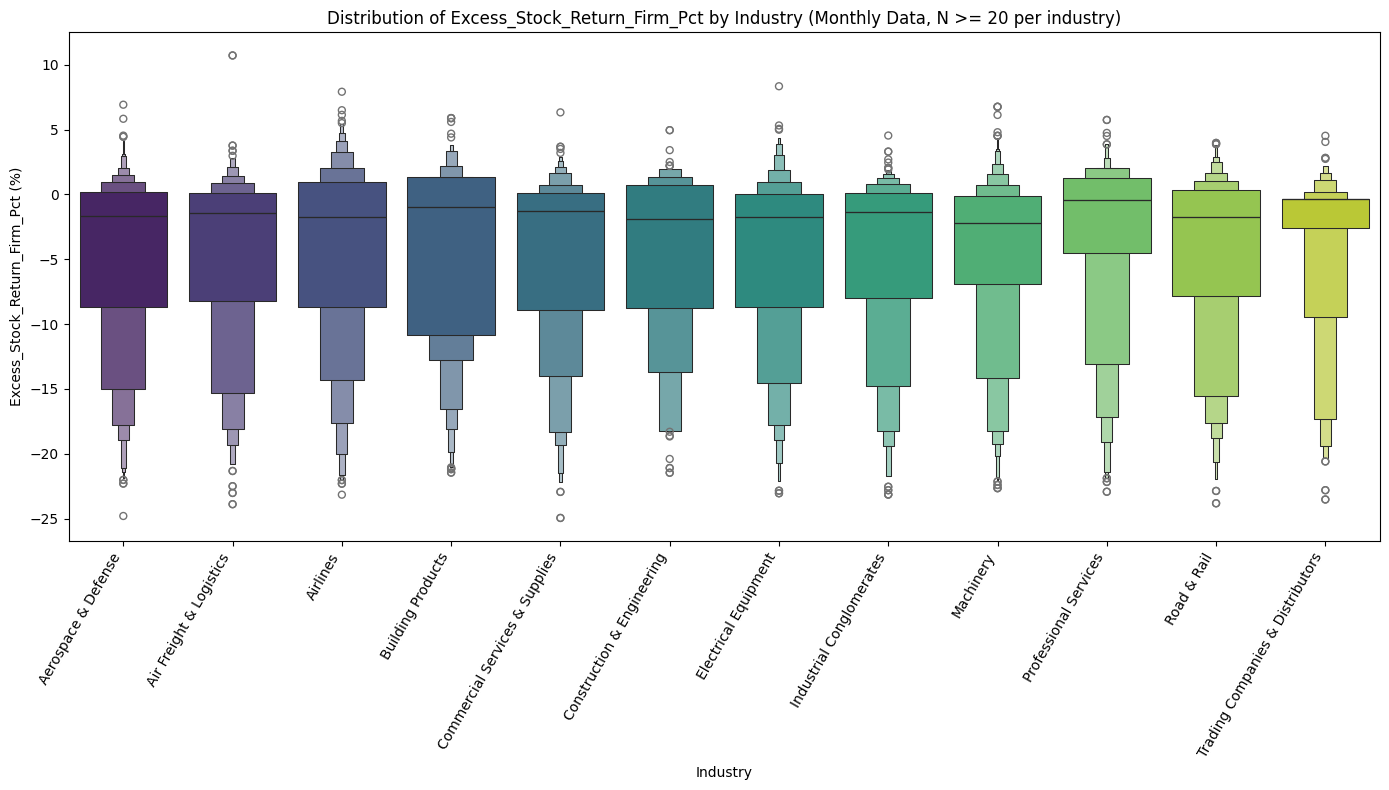

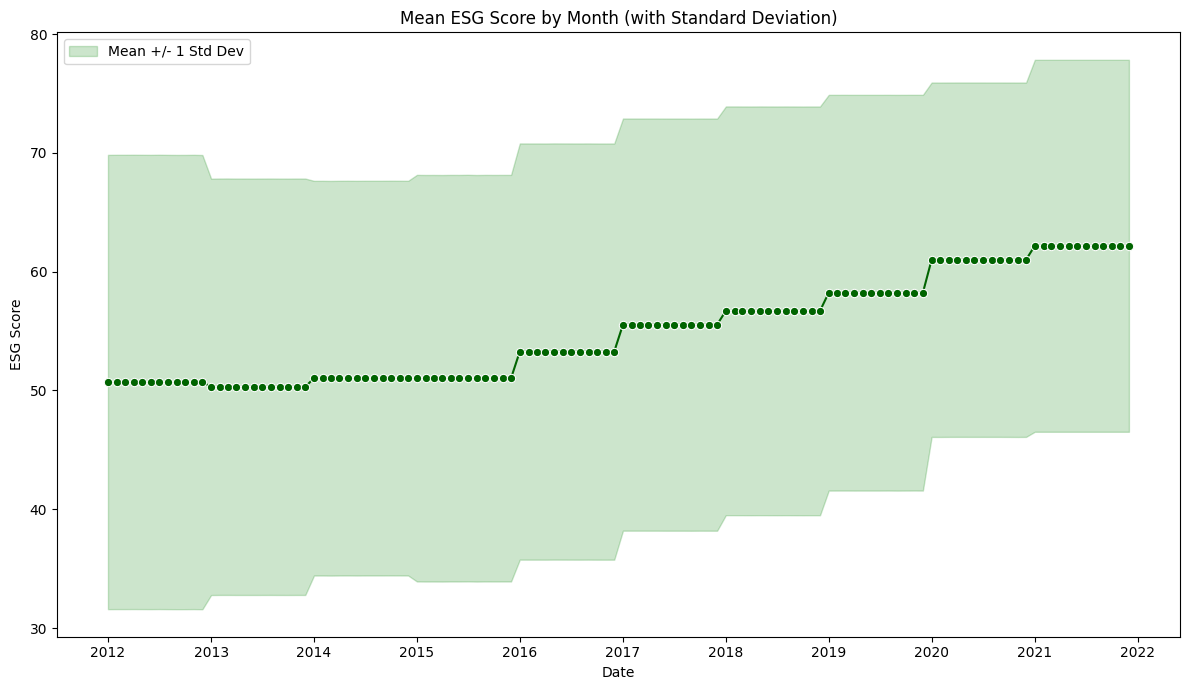


--- Panel Data Analysis (with Robust Standard Errors) ---
Dependent Variable: Excess_Stock_Return_Firm (Excess Stock Returns)
Independent Variables: ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1', 'FF_HML_CMA_PC2', 'ESG_PC1']
Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.

--- Pooled OLS Model (Robust Standard Errors) ---
                             PooledOLS Estimation Summary                             
Dep. Variable:     Excess_Stock_Return_Firm   R-squared:                        0.0682
Estimator:                        PooledOLS   R-squared (Between):             -0.5541
No. Observations:                      8640   R-squared (Within):               0.0698
Date:                      Fri, Jun 13 2025   R-squared (Overall):              0.0682
Time:                              16:58:50   Log-likelihood                 1.367e+04
Cov. Estimator:                     

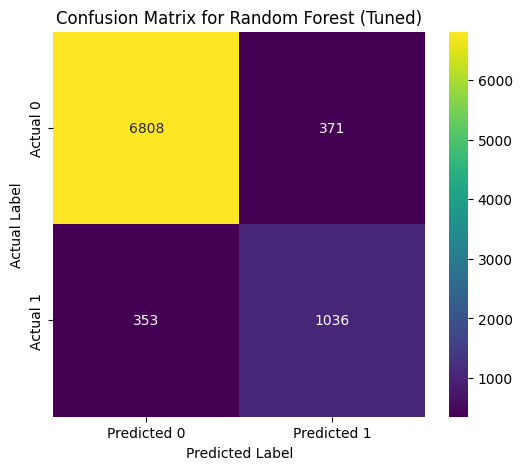

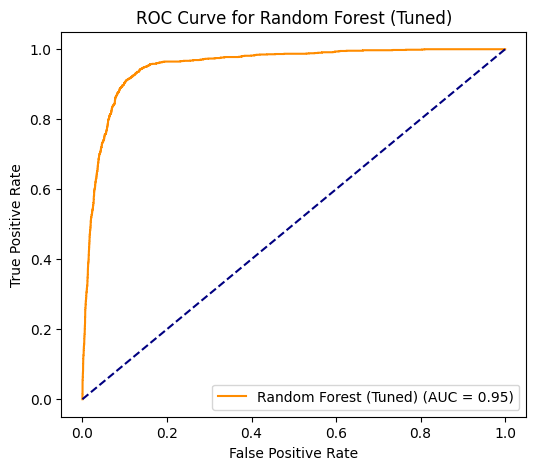


Full Classification Report (Aggregated CV Predictions):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7179
           1       0.74      0.75      0.74      1389

    accuracy                           0.92      8568
   macro avg       0.84      0.85      0.85      8568
weighted avg       0.92      0.92      0.92      8568

Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.
Consider techniques like SMOTE or class weighting to address imbalance.
------------------------------------------------------------

--- XGBoost (Tuned) Consolidated Cross-Validation Metrics ---
Accuracy: 0.8981
Precision: 0.6293
Recall: 0.9042
F1-Score: 0.7421
ROC AUC: 0.9575


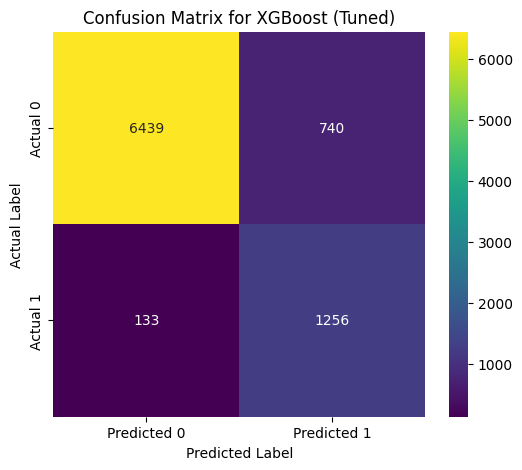

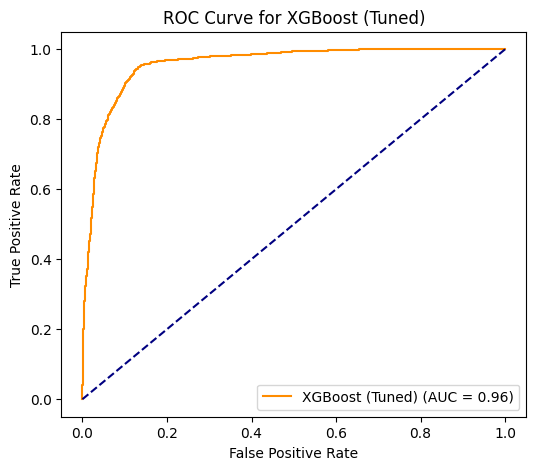


Full Classification Report (Aggregated CV Predictions):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7179
           1       0.63      0.90      0.74      1389

    accuracy                           0.90      8568
   macro avg       0.80      0.90      0.84      8568
weighted avg       0.92      0.90      0.90      8568

Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.
Consider techniques like SMOTE or class weighting to address imbalance.
------------------------------------------------------------

--- Feature Importance ---
Interpreting key drivers of next month's Excess Return Firm Direction.

Top 10 Feature Importances (Random Forest):
                         feature  importance
36                            RF    0.204371
1                            SMB    0.093444
37                FF_HML_CMA_PC1    0.085946
2                            RMW    0.078419
38                FF_HML_CMA_PC2 


SHAP Summary Plot (Random Forest): Overall Feature Impact


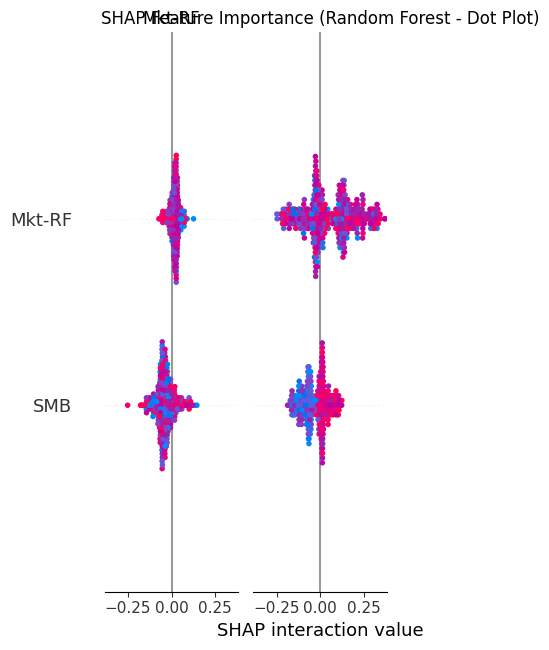


SHAP Dependence Plots (Random Forest): Non-Linearity & Interactions
Plotting dependence for: RF
Error during SHAP analysis for Random Forest: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 50
Consider using a smaller sample for SHAP or addressing memory issues if data is very large.

SHAP Summary Plot (XGBoost): Overall Feature Impact


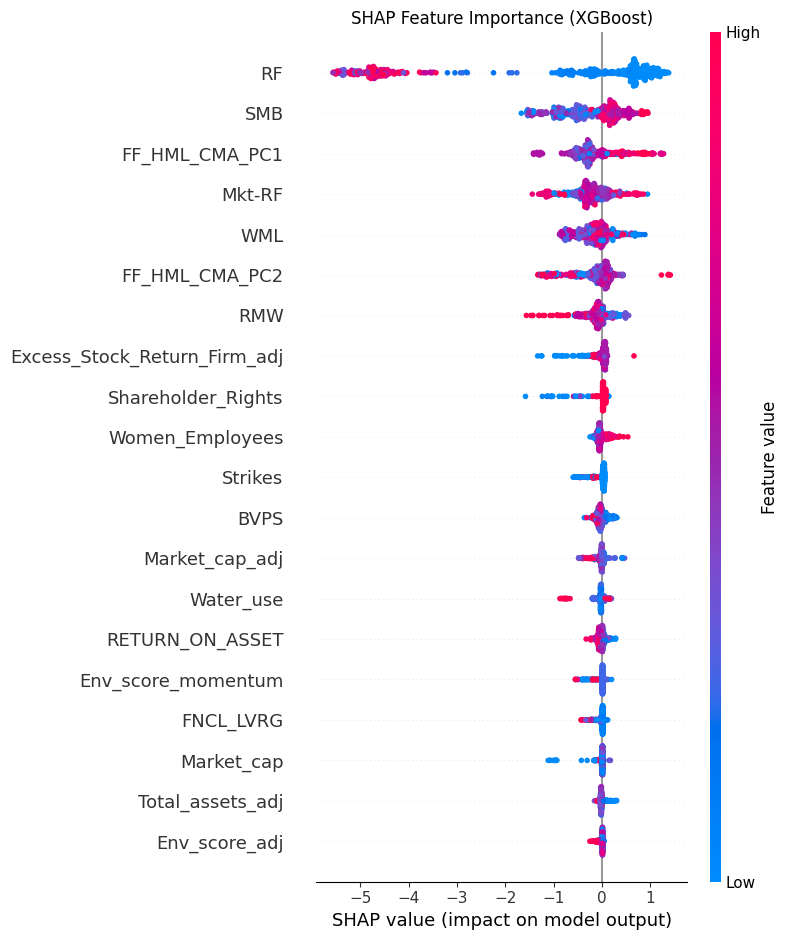


SHAP Dependence Plot (XGBoost): Non-Linearity & Interactions
Plotting dependence for: RF


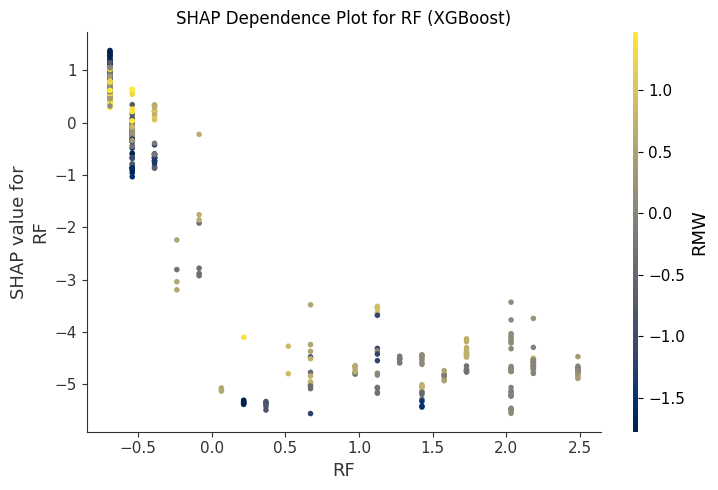

Plotting dependence for: SMB


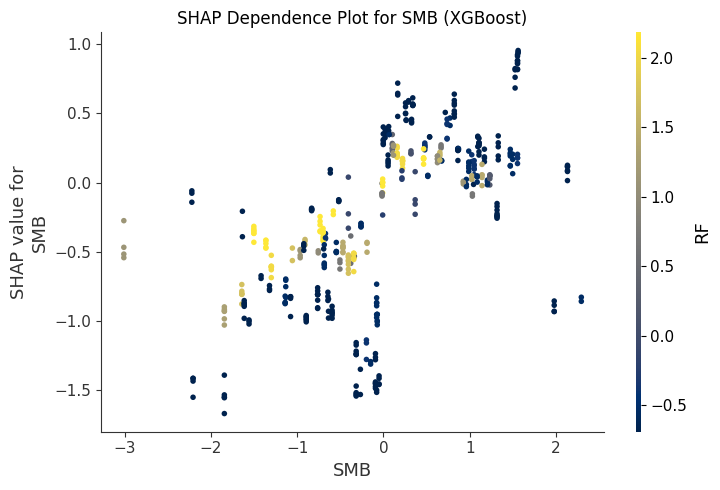

Plotting dependence for: FF_HML_CMA_PC1


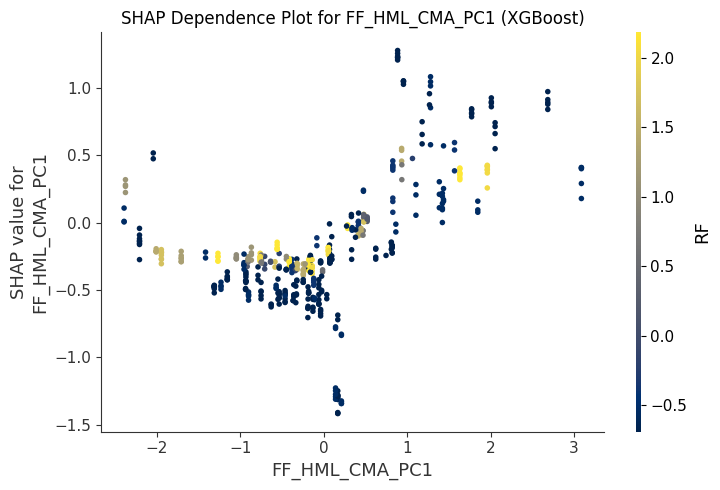


SHAP Force Plot (XGBoost): Explanation for a Single Prediction
Single random instance not found for Force Plot.

--- Analysis Complete ---

--- Conceptual Extensions for Future Research ---
1. Alternative Dependent Variables/Research Questions:
   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.
   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.
   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).
2. Expanding Data for Robustness:
   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).
   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.
3. Advanced ML Techniques:
   - Experiment w

In [4]:
# --- CRITICAL: PLEASE ENSURE YOU RUN ALL CELLS FROM THE VERY TOP OF THE NOTEBOOK ---
# This ensures all necessary libraries are imported and available.
# If you are restarting the runtime, always select "Runtime -> Restart runtime and run all".
# If you are running this code block in isolation (e.g., just one cell), it will fail because imports might not have executed.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
import sys # For sys.exit()
import yfinance as yf # For downloading stock data
from datetime import datetime # For handling dates
from scipy.stats import chi2 # For custom Hausman test p-value
from scipy import stats # For Fama-MacBeth p-value (norm.cdf)

# Suppress specific warnings for cleaner output during demonstrations
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# --- CRITICAL: Ensure necessary libraries are up to date and RESTART RUNTIME ---
# IMPORTANT: To ensure `linearmodels.panel.diagnostic` imports work and for optimal performance,
# run the following line in a SEPARATE CELL and then RESTART YOUR COLAB RUNTIME
# (Runtime -> Disconnect and delete runtime) before running the rest of the script.
# This is crucial for new package versions to be properly loaded and for panel diagnostics to function.
#
# !pip install --upgrade linearmodels arch statsmodels yfinance
#
# If you continue to see "linearmodels.panel.diagnostic could not be imported"
# after running the above and restarting, it indicates a deeper environment issue
# or a version incompatibility, and these diagnostics will remain skipped.
# --- End of upgrade commands and runtime restart instruction ---

# Enable experimental iterative imputer for MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from sklearn.decomposition import PCA # For Principal Component Analysis

# --- ML Specific Imports ---
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- CRITICAL FIX: Import panel diagnostics and set flag ---
_PANEL_DIAGNOSTICS_AVAILABLE = False
try:
    from linearmodels.panel.diagnostic import pesaran_cd, wooldridge_test
    _PANEL_DIAGNOSTICS_AVAILABLE = True
    print("linearmodels.panel.diagnostic successfully imported. Advanced panel diagnostics enabled.")
except ImportError as e:
    print(f"Warning: linearmodels.panel.diagnostic could not be imported. Skipping advanced panel diagnostics. Error: {e}")
# --- END CRITICAL FIX ---

# --- CUSTOM HAUSMAN TEST FUNCTION (Fallback if linearmodels.compare fails) ---
def hausman_test(fe_res, re_res):
    """
    Performs a Hausman test to choose between Fixed Effects and Random Effects models.
    H0: Random Effects model is consistent and efficient (unobserved effects are uncorrelated with regressors).
    H1: Fixed Effects model is consistent, Random Effects is inconsistent (unobserved effects are correlated).
    """
    if fe_res is None or re_res is None:
        print("Hausman test skipped: Fixed Effects or Random Effects models were not successfully fitted.")
        return

    # Try linearmodels' built-in compare first
    # This is preferred as it correctly handles degrees of freedom and robust covariance
    if hasattr(fe_res, 'compare') and callable(fe_res.compare) and _PANEL_DIAGNOSTICS_AVAILABLE:
        try:
            hausman_comparison = fe_res.compare(re_res)
            # linearmodels compare automatically includes Hausman if applicable
            if 'Hausman' in hausman_comparison.tests:
                hausman_test_result = hausman_comparison.tests['Hausman']
                print(f"\n--- Linearmodels Built-in Hausman Test Results ---")
                print(hausman_test_result) # Prints full test details
                if hausman_test_result.pvalue < 0.05:
                    print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
                else:
                    print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")
                return # Exit if built-in test succeeds
            else:
                print("Linearmodels built-in Hausman test results not found in the comparison object. Falling back to custom.")
        except Exception as e:
            print(f"Error with linearmodels built-in Hausman test: {e}. Falling back to custom.")

    # Custom implementation as a fallback (less robust than built-in, especially with robust errors)
    # Filter coefficients that are common and should be identical under H0
    common_params = list(set(fe_res.params.index) & set(re_res.params.index))

    # Exclude 'const' from common parameters if it's the first parameter in fe_res.params
    if 'const' in common_params:
        common_params.remove('const')

    if not common_params:
        print("No common non-constant parameters to perform custom Hausman test. Test cannot be performed.")
        return

    b_fe_common = fe_res.params[common_params].to_numpy()
    b_re_common = re_res.params[common_params].to_numpy()

    # Get covariance matrices for common parameters
    cov_fe_common = fe_res.cov.loc[common_params, common_params]
    cov_re_common = re_res.cov.loc[common_params, common_params]

    b_diff = b_fe_common - b_re_common
    cov_diff = cov_fe_common - cov_re_common

    try:
        # Check for positive definiteness for inversion stability
        # Add a small value to the diagonal if not positive definite for numerical inaccuracies
        eigenvalues = np.linalg.eigvalsh(cov_diff)
        if np.any(eigenvalues < -1e-8):
            print("Warning: Variance difference matrix is not positive semi-definite (negative eigenvalues found). Custom Hausman test results may be unreliable or invalid.")
            print("This often indicates that the Random Effects model is inconsistent or that assumptions are violated.")
            print("Fixed Effects model is generally preferred if this occurs, or use built-in Hausman test with appropriate options if available.")
            # Add a small regularization term to the diagonal to make it invertible for calculation, but note the warning
            cov_diff += np.eye(cov_diff.shape[0]) * 1e-6

        inv_cov_diff = np.linalg.inv(cov_diff)
    except np.linalg.LinAlgError as e:
        print(f"Error inverting covariance difference matrix for custom Hausman test: {e}")
        print("This usually means the matrix is singular or not positive semi-definite. Custom Hausman test is not valid.")
        print("If this occurs, Fixed Effects model is typically preferred (as it's consistent even if RE isn't efficient).")
        return

    hausman_stat = b_diff.T @ inv_cov_diff @ b_diff
    df = len(common_params)

    # Chi-squared statistic cannot be negative. If it is, the test result is invalid.
    if hausman_stat < 0:
        print("Warning: Calculated Hausman Test Statistic is negative. This indicates a problem with the test's assumptions or implementation (e.g., covariance matrix difference not positive semi-definite).")
        print("The test result is invalid. In such cases, Fixed Effects is often preferred as it is consistent even if Random Effects is not efficient.")
        return

    p_value = chi2.sf(hausman_stat, df)

    print(f"\n--- Custom Hausman Test Results (Fallback) ---")
    print(f"Hausman Test Statistic: {hausman_stat:.4f}")
    print(f"Degrees of Freedom: {df}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
    else:
        print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")

# --- END CUSTOM HAUSMAN TEST FUNCTION ---


# Manual Fama-MacBeth function (fallback for linearmodels.asset_pricing.FamaMacBeth)
def run_manual_fama_macbeth(data_df, dependent_var, factors_list):
    """
    Performs a Fama-MacBeth two-stage regression.
    Step 1: Time-series regression for each firm to estimate factor betas.
    Step 2: Cross-sectional regression for each time period to estimate risk premia,
            then average these premia over time and calculate their t-statistics.
    """
    print(f"\n--- Running Manual Fama-MacBeth Regression for {dependent_var} ---")
    print("This analysis is now running on monthly data, which is the standard frequency for Fama-MacBeth regressions in asset pricing studies.")

    # Ensure data_df has Identifier (RIC) and Date (monthly) in index for grouping
    if not isinstance(data_df.index, pd.MultiIndex) or 'Identifier (RIC)' not in data_df.index.names or 'Date' not in data_df.index.names:
        print("Error: Input data_df for Fama-MacBeth must have a MultiIndex with 'Identifier (RIC)' and 'Date'.")
        return None

    current_factors_list = []
    for factor in factors_list:
        if factor not in data_df.columns:
            print(f"Warning: Factor '{factor}' not found in data for Fama-MacBeth. Excluding.")
            continue
        if data_df[factor].std() == 0:
            print(f"Warning: Factor '{factor}' has zero variance and will be excluded from Fama-MacBeth.")
            continue
        current_factors_list.append(factor)

    if not current_factors_list:
        print("No valid factors remaining for Fama-MacBeth after checks.")
        return None

    if dependent_var not in data_df.columns:
        print(f"Error: Dependent variable '{dependent_var}' not found in data for Fama-MacBeth.")
        return None

    # Step 1: Run time-series regressions for each firm to get betas
    betas_per_firm_list = []
    unique_firms = data_df.index.get_level_values('Identifier (RIC)').unique()

    print(f"Step 1: Estimating Betas for {len(unique_firms)} firms...")
    for ric_id in unique_firms:
        firm_data = data_df.loc[ric_id]

        # Ensure relevant columns are present for the firm's data slice and drop NaNs
        firm_data_subset = firm_data[[dependent_var] + current_factors_list].dropna()

        # For monthly data, usually need at least T > N (num factors) + 1 for time-series regressions
        if len(firm_data_subset) < len(current_factors_list) + 2:
            # print(f"Skipping time-series regression for firm {ric_id}: Not enough observations ({len(firm_data_subset)}) for factors (needed {len(current_factors_list) + 2}).")
            continue

        y = firm_data_subset[dependent_var]
        X = sm.add_constant(firm_data_subset[current_factors_list])

        try:
            model = sm.OLS(y, X)
            results = model.fit()

            # Rename coefficients to clearly indicate they are betas (e.g., Mkt-RF_beta)
            betas = results.params.drop('const', errors='ignore')
            betas = betas.rename(lambda x: f'{x}_beta') # Add _beta suffix

            betas['Identifier (RIC)'] = ric_id
            betas_per_firm_list.append(betas)

        except Exception as e:
            # print(f"Error in time-series regression for firm {ric_id}: {e}")
            continue

    if not betas_per_firm_list:
        print("No successful time-series regressions. Cannot proceed with Fama-MacBeth.")
        return None

    betas_df = pd.DataFrame(betas_per_firm_list).set_index('Identifier (RIC)')
    print(f"Successfully estimated betas for {len(betas_df)} firms.")

    # Get the names of the new beta columns (e.g., 'Mkt-RF_beta')
    beta_cols = [f'{f}_beta' for f in current_factors_list]


    # Step 2: Run cross-sectional regressions for each time period
    # --- FIXED: Use .reset_index() to convert MultiIndex levels to columns for merge ---
    # Then merge, and finally set the MultiIndex back.
    temp_data_df_for_merge = data_df.reset_index() # Converts both 'Identifier (RIC)' and 'Date' to columns

    # Merge betas with the original monthly data
    # Merge on 'Identifier (RIC)' (common column)
    merged_with_betas = pd.merge(
        temp_data_df_for_merge,
        betas_df[beta_cols].reset_index(), # Reset index of betas_df to merge 'Identifier (RIC)' as a column
        on='Identifier (RIC)',
        how='left'
    )

    # Re-set the MultiIndex after merging
    merged_with_betas = merged_with_betas.set_index(['Identifier (RIC)', 'Date']).sort_index()


    # Now, run cross-sectional regressions
    risk_premia_list = []
    # Use 'Date' level for unique time periods
    unique_dates = merged_with_betas.index.get_level_values('Date').unique().sort_values()

    print(f"Step 2: Estimating Risk Premia for {len(unique_dates)} months...")
    for date in unique_dates:
        cross_section_data = merged_with_betas.loc[(slice(None), date), :]

        # Dropna based on the dependent variable and the beta columns
        # This ensures that only rows with complete data for the current regression are used
        cross_section_data_clean = cross_section_data[[dependent_var] + beta_cols].dropna()

        if len(cross_section_data_clean) < len(beta_cols) + 1:
            # print(f"Skipping month {date}: Not enough firms ({len(cross_section_data_clean)}) for cross-sectional regression.")
            continue

        y_cs = cross_section_data_clean[dependent_var]
        # Use the betas (now correctly named with _beta suffix) as independent variables for the cross-section
        X_cs = sm.add_constant(cross_section_data_clean[beta_cols])

        try:
            model_cs = sm.OLS(y_cs, X_cs)
            results_cs = model_cs.fit()

            premia = results_cs.params.copy()
            premia.name = date # Name the series by date
            risk_premia_list.append(premia)

        except Exception as e:
            # print(f"Error in cross-sectional regression for month {date}: {e}")
            continue

    if not risk_premia_list:
        print("No successful cross-sectional regressions. Cannot calculate Fama-MacBeth risk premia.")
        return None

    risk_premia_ts = pd.DataFrame(risk_premia_list)
    # Ensure all factor columns are present, filling with NaN for years where they weren't in the regression
    all_premia_cols = sorted(list(set(col for df in risk_premia_list for col in df.index)))
    risk_premia_ts = risk_premia_ts.reindex(columns=all_premia_cols)

    # Step 3: Average risk premia and calculate t-statistics
    mean_premia = risk_premia_ts.mean()
    # Handle cases where std_errors_premia might be NaN due to insufficient observations for a factor
    std_errors_premia = risk_premia_ts.std() / np.sqrt(len(risk_premia_ts))

    # Avoid division by zero for t-stats if std_error is zero or NaN
    t_stats_premia = mean_premia / std_errors_premia.replace(0, np.nan)

    # Combine results
    results_dict = {
        'Factor': mean_premia.index.tolist(),
        'Mean Premium': mean_premia.tolist(),
        'Std.Error (FM)': std_errors_premia.tolist(),
        'T-statistic (FM)': t_stats_premia.tolist()
    }

    results_df = pd.DataFrame(results_dict)
    results_df['P-value (FM)'] = results_df['T-statistic (FM)'].apply(lambda x: 2 * (1 - stats.norm.cdf(abs(x))))

    print("\nFama-MacBeth Regression Results:")
    return results_df

# --- END Manual Fama-MacBeth Function ---


# --- 0. Define Companies for Stock Data Download ---
COMPANY_TICKERS = [
    'AAL', 'ALK', 'DAL', 'LUV', 'UAL', # Airlines
    'BA', 'GD', 'HII', 'HWM', 'LHX', 'LMT', 'NOC', 'RTX', 'TDG', 'TXT', # Aerospace & Defense
    'CAT', 'CMI', 'DE', 'PCAR', # Heavy Machinery & Equipment
    'CSX', 'NSC', 'UNP', # Rail Transportation
    'CHRW', 'EXPD', 'FDX', 'JBHT', 'ODFL', 'UPS', # Freight & Logistics Services
    'ALLE', 'AOS', 'CARR', 'FBHS', 'JCI', 'MAS', 'OTIS', 'TT', # Building Products & Security
    'MMM', 'GE', 'HON', # Industrial Conglomerates
    'CPRT', 'CTAS', 'EFX', 'NLSN', 'RHI', 'ROL', 'VRSK', # Business Services
    'RSG', 'WM', # Environmental & Waste Management
    'AME', 'DOV', 'EMR', 'ETN', 'FAST', 'FTV', 'GNRC', 'GWW', 'IEX', 'IR', 'ITW', 'NDSN', 'PH', 'PNR', 'ROK', 'SNA', 'SWK', 'WAB', 'XYL', # Diversified Industrials
    'J', 'LDOS', 'PWR', 'ROP' # Engineering & Construction
]

# --- 1. Load and Preprocess Data ---

# Load Fama-French 5 Factors data
try:
    ff_df = pd.read_csv('/content/ff_5_Factors.csv')
    # --- IMPORTANT CHANGE: Load monthly ESG data ---
    esg_df = pd.read_csv('/content/monthly_esg_data.csv')
except FileNotFoundError:
    print("Ensure 'ff_5_Factors.csv' and 'monthly_esg_data.csv' are in the correct path.")
    sys.exit(1)

print("--- Data Loading Complete ---")
print("Fama-French Data Head (Monthly):\n", ff_df.head())
print("\nESG Data Head (Monthly):\n", esg_df.head())

# --- Fama-French Data Preprocessing (already monthly, just convert to proper date format) ---
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m')
ff_df['Year'] = ff_df['Date'].dt.year
ff_df['Month'] = ff_df['Date'].dt.month # Keep month for monthly returns

all_possible_factor_cols = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
factor_cols = list(set(all_possible_factor_cols).intersection(ff_df.columns))

# Ensure factors are in decimal form (already monthly, conversion if max > 1)
for col in factor_cols:
    if col in ff_df.columns and ff_df[col].dtype in ['float64', 'int64'] and ff_df[col].max() > 1:
        ff_df[col] = ff_df[col] / 100.0

# No longer creating ff_annual, as we are moving to monthly analysis


# --- ESG Data Preprocessing (now monthly) ---
esg_df.rename(columns={'Date': 'Date_str'}, inplace=True) # Rename to avoid conflict with datetime 'Date'
esg_df['Date'] = pd.to_datetime(esg_df['Date_str'], format='%Y/%m') # Parse as monthly date
esg_df['Year'] = esg_df['Date'].dt.year
esg_df['Month'] = esg_df['Date'].dt.month
esg_df.dropna(subset=['Identifier (RIC)', 'Date'], inplace=True)


if 'Industry' not in esg_df.columns:
    print("Warning: 'Industry' column not found in ESG data. Cannot perform industry-adjusted feature engineering.")

numeric_cols_esg = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'BVPS', 'Market_cap', 'Shares',
                    'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG',
                    'PE_RATIO', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
                    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
                    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
                    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives', 'Total_assets']

for col in numeric_cols_esg:
    if col in esg_df.columns:
        esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')


print(f"\nESG Years & Months (unique, type {esg_df['Date'].dtype}): {sorted(esg_df['Date'].dropna().unique())[::12]} (showing one per year)")
print(f"FF Data Years & Months (unique, type {ff_df['Date'].dtype}): {sorted(ff_df['Date'].unique())[::12]} (showing one per year)")


# --- Download and Preprocess Historical Stock Prices (now for monthly returns) ---
print("\n--- Downloading Historical Stock Prices ---")
stock_data_raw = pd.DataFrame()
# Align start/end dates with the earliest/latest monthly data available
start_date_ff = ff_df['Date'].min()
end_date_ff = ff_df['Date'].max()

# Adjust stock data download range to cover FF and ESG data
start_date_download = min(start_date_ff, esg_df['Date'].min())
end_date_download = max(end_date_ff, esg_df['Date'].max()) + pd.DateOffset(months=1) # Ensure we get enough data for last month's return

try:
    stock_data_raw = yf.download(COMPANY_TICKERS, start=start_date_download, end=end_date_download, progress=False)
except Exception as e:
    print(f"Error downloading stock data: {e}")
    sys.exit(1)

if stock_data_raw.empty:
    raise ValueError("No stock data downloaded. Cannot proceed with market return analysis.")

available_tickers = [col[1] for col in stock_data_raw.columns if col[0] == 'Close']
if not available_tickers:
    print("Warning: No 'Close' price data found for any ticker. Cannot proceed with stock return calculation.")
    sys.exit(1)

print(f"\nSuccessfully downloaded data for {len(available_tickers)} out of {len(COMPANY_TICKERS)} tickers (based on 'Close' price availability).")

# Select only the 'Close' prices and unstack to long format
stock_prices_close = stock_data_raw['Close'].stack().reset_index()
stock_prices_close.columns = ['Date', 'Identifier (RIC)', 'Close_Price']

print("Stock Prices (Close) Head:\n", stock_prices_close.head())

# Calculate Monthly Returns from Close prices
stock_prices_close.sort_values(by=['Identifier (RIC)', 'Date'], inplace=True)

monthly_stock_returns_list = []
for ric_id, group_df in stock_prices_close.groupby('Identifier (RIC)'):
    # Calculate monthly return as (current_month_price / previous_month_price) - 1
    group_df['Monthly_Stock_Return'] = group_df['Close_Price'].pct_change()
    group_df['Year'] = group_df['Date'].dt.year
    group_df['Month'] = group_df['Date'].dt.month
    monthly_stock_returns_list.append(group_df[['Date', 'Identifier (RIC)', 'Year', 'Month', 'Monthly_Stock_Return']])

monthly_stock_returns = pd.concat(monthly_stock_returns_list).dropna(subset=['Monthly_Stock_Return'])

print("\nMonthly Stock Returns Head:\n", monthly_stock_returns.head())


# --- Merge Dataframes: ESG (monthly) + Stock Returns (monthly) + Fama-French (monthly) ---
# Merge ESG with monthly stock returns
esg_with_returns_df = pd.merge(esg_df, monthly_stock_returns, on=['Identifier (RIC)', 'Date', 'Year', 'Month'], how='left')

# Merge with Fama-French data (which is already monthly)
# We need to ensure ff_df has the same 'Year' and 'Month' columns for merging, and 'RF'
ff_for_merge = ff_df[['Date', 'Year', 'Month', 'RF']].copy() if 'RF' in ff_df.columns else ff_df[['Date', 'Year', 'Month']].copy()
# Add RF column if it doesn't exist to avoid key error later, will be NaN
if 'RF' not in ff_for_merge.columns:
    ff_for_merge['RF'] = np.nan

merged_df = pd.merge(esg_with_returns_df, ff_for_merge, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_ff'))

# Handle cases where RF_ff might have been created due to suffix, but we want the original RF
if 'RF_ff' in merged_df.columns:
    merged_df['RF'] = merged_df['RF_ff']
    merged_df.drop(columns=['RF_ff'], inplace=True)


# --- Calculate Excess Stock Return of the Firm (monthly) ---
if 'Monthly_Stock_Return' in merged_df.columns and 'RF' in merged_df.columns:
    merged_df['Excess_Stock_Return_Firm'] = merged_df['Monthly_Stock_Return'] - merged_df['RF']
    merged_df['Excess_Stock_Return_Firm_Pct'] = merged_df['Excess_Stock_Return_Firm'] * 100.0
else:
    print("Warning: 'Excess_Stock_Return_Firm' cannot be calculated. Ensure 'Monthly_Stock_Return' and 'RF' are available.")
    merged_df['Excess_Stock_Return_Firm'] = np.nan
    merged_df['Excess_Stock_Return_Firm_Pct'] = np.nan

# Now merge with Fama-French factors (excluding RF as it's already used)
non_rf_factor_cols_current = [col for col in factor_cols if col != 'RF']
ff_factors_only = ff_df[['Date', 'Year', 'Month'] + non_rf_factor_cols_current].copy()

final_df = pd.merge(merged_df, ff_factors_only, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_factors'))

# Handle potential duplicate factor columns (e.g., if ESG had a column with same name as FF factor)
for col in non_rf_factor_cols_current:
    if f'{col}_factors' in final_df.columns:
        # Prioritize factor data from ff_df if there's a conflict
        final_df[col] = final_df[f'{col}_factors']
        final_df.drop(columns=[f'{col}_factors'], inplace=True)


# Define independent variables for panel regressions and ML.
# Ensure 'Date_str' is removed as it's not needed after parsing
if 'Date_str' in final_df.columns:
    final_df.drop(columns=['Date_str'], inplace=True)

all_panel_independent_options = [
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
# Filter out columns that are no longer present or are utility columns
all_panel_independent_options = [col for col in all_panel_independent_options if col in final_df.columns]


dependent_var = 'Excess_Stock_Return_Firm'
dependent_var_pct = 'Excess_Stock_Return_Firm_Pct'

print("\n--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---\n", final_df.head())
print("\nMissing values before imputation (in final_df):\n", final_df.isnull().sum()[final_df.isnull().sum() > 0])


# --- 2. MICE Imputation ---
cols_for_imputation = [
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'RF', 'Monthly_Stock_Return', 'Excess_Stock_Return_Firm',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use',
    'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
cols_for_imputation = [col for col in cols_for_imputation if col in final_df.columns]

# --- CRITICAL FIX: Set MultiIndex on final_df BEFORE imputation loop ---
# This ensures final_df.loc[imputed_df.index, col] works correctly
final_df = final_df.set_index(['Identifier (RIC)', 'Date']).sort_index()


# Now, select columns for imputation from the already indexed final_df
imputable_df = final_df[cols_for_imputation].copy()


threshold = 0.8
cols_to_drop_from_imputation = [col for col in imputable_df.columns if imputable_df[col].isnull().sum() / len(imputable_df) > threshold]
imputable_df_clean = imputable_df.drop(columns=cols_to_drop_from_imputation)

if not imputable_df_clean.empty and len(imputable_df_clean.columns) > 0:
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_data = imputer.fit_transform(imputable_df_clean)
    imputed_df = pd.DataFrame(imputed_data, columns=imputable_df_clean.columns, index=imputable_df_clean.index)

    # Update original final_df with imputed values. This now works correctly.
    for col in imputed_df.columns:
        final_df.loc[imputed_df.index, col] = imputed_df[col]

else:
    print("\nWarning: No suitable numerical columns found for MICE imputation or imputable_df_clean is empty.")


# Handle remaining NaNs after MICE (ffill/bfill for panel, then mean/median)
# This block is now *after* setting the index, so it will correctly apply ffill/bfill per entity.
final_df = final_df.groupby(level='Identifier (RIC)').ffill().bfill()

# Fill any remaining NaNs (e.g., if a column was all NaN for some firms, or at start/end)
for col in final_df.columns:
    if final_df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(final_df[col]):
            final_df[col] = final_df[col].fillna(final_df[col].mean())
        else:
            # For categorical data, use mode. Handle potential empty mode.
            final_df[col] = final_df[col].fillna(final_df[col].mode()[0] if not final_df[col].mode().empty else 'Unknown')


print("\n--- Missing values after MICE and ffill/bfill (before final model-specific drop) ---")
print(final_df.isnull().sum()[final_df.isnull().sum() > 0])


# Final dropna for critical columns right before model fitting
# This is usually for the dependent variable and key independent variables that cannot be NaN
essential_cols_for_model = [dependent_var] + [col for col in all_panel_independent_options if col != 'Industry'] # Exclude 'Industry' if it might be categorical and handled separately
initial_rows_count = len(final_df)
final_df.dropna(subset=essential_cols_for_model, inplace=True)
dropped_rows_count = initial_rows_count - len(final_df)
print(f"\nDropped {dropped_rows_count} rows due to NaNs in essential model-specific columns (excluding Industry if categorical).")


# Ensure Industry column is categorical if it exists
if 'Industry' in final_df.columns:
    final_df['Industry'] = final_df['Industry'].astype('category')

print("\nFinal Data Head after Preprocessing and Imputation (ready for models - Monthly):\n", final_df.head())
print("Shape of final_df:", final_df.shape)
print(f"Dependent variable ({dependent_var}) NaNs: {final_df[dependent_var].isnull().sum()}")


if final_df.empty or final_df[dependent_var].isnull().all() or len(final_df[dependent_var].dropna()) < 10:
    raise ValueError("DataFrame is empty or dependent variable is all NaN after critical NaN handling for model-specific columns. Cannot proceed with analysis.")


# --- Implement Recommendations & RQ-driven analysis ---

# Recommendation 1: Refine ESG Factor Construction (Value-weighted Market ESG Factor & PCA)
# For monthly data, this is still valid, though the aggregation level becomes monthly
if 'Market_cap' in final_df.columns and 'ESG_score' in final_df.columns:
    # Need to reset index to get 'Date' as a column for grouping
    vw_esg_df = final_df.reset_index().copy()
    vw_esg_df['Market_cap_weighted_ESG'] = vw_esg_df['ESG_score'] * vw_esg_df['Market_cap']
    # Group by Date (monthly) to get monthly value-weighted factor
    market_esg_factor_vw = vw_esg_df.groupby('Date').apply(lambda x: x['Market_cap_weighted_ESG'].sum() / x['Market_cap'].sum(), include_groups=False)\
                                    .rename('Market_ESG_Factor_VW').reset_index()
    print("\n--- Value-weighted Monthly Market ESG Factor Head ---\n", market_esg_factor_vw.head())
else:
    print("\nWarning: Skipping Value-weighted Market ESG Factor calculation. 'Market_cap' or 'ESG_score' not found.")
    market_esg_factor_vw = pd.DataFrame(columns=['Date', 'Market_ESG_Factor_VW'])


esg_sub_scores = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score']
esg_sub_scores_for_pca = [col for col in esg_sub_scores if col in final_df.columns and final_df[col].std() > 0]
if len(esg_sub_scores_for_pca) >= 2:
    print(f"\n--- Performing PCA on firm-level ESG sub-scores: {esg_sub_scores_for_pca} ---")
    pca_esg_data = final_df[esg_sub_scores_for_pca].copy()

    scaler_esg_pca = StandardScaler()
    scaled_esg_data = scaler_esg_pca.fit_transform(pca_esg_data)

    pca_esg = PCA(n_components=1)
    final_df['ESG_PC1'] = pca_esg.fit_transform(scaled_esg_data)
    print(f"Explained variance ratio of ESG_PC1: {pca_esg.explained_variance_ratio_[0]:.4f}")
else:
    print(f"\nSkipping PCA for ESG sub-scores: Not enough suitable columns (needs >=2 non-constant columns). Available: {esg_sub_scores_for_pca}")
    if 'ESG_score' in final_df.columns:
        final_df['ESG_PC1'] = final_df['ESG_score']
    else:
        final_df['ESG_PC1'] = np.nan


# Recommendation 2: Address Multicollinearity (HML and CMA)
ff_factors_for_pca = ['HML', 'CMA']
ff_factors_for_pca_clean = [col for col in ff_factors_for_pca if col in final_df.columns and final_df[col].std() > 0]

if len(ff_factors_for_pca_clean) >= 2:
    print(f"\n--- Performing PCA on Fama-French factors for multicollinearity: {ff_factors_for_pca_clean} ---")
    ff_pca_components = 2
    pca_ff_data = final_df[ff_factors_for_pca_clean].copy()

    scaler_ff_pca = StandardScaler()
    scaled_ff_data = scaler_ff_pca.fit_transform(pca_ff_data)

    pca_ff = PCA(n_components=min(ff_pca_components, len(ff_factors_for_pca_clean)))
    ff_pcs = pca_ff.fit_transform(scaled_ff_data)

    final_df['FF_HML_CMA_PC1'] = ff_pcs[:, 0]
    if ff_pcs.shape[1] > 1:
        final_df['FF_HML_CMA_PC2'] = ff_pcs[:, 1]
        print(f"Explained variance ratios for FF_HML_CMA_PC1: {pca_ff.explained_variance_ratio_[0]:.4f}, FF_HML_CMA_PC2: {pca_ff.explained_variance_ratio_[1]:.4f}")
    else:
        print(f"Only one principal component extracted for FF HML/CMA.")
        final_df['FF_HML_CMA_PC2'] = np.nan

    print("\n--- VIF Check with PCA-derived HML/CMA factors ---")
    independent_vars_panel_pca_ff = ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1']
    if 'FF_HML_CMA_PC2' in final_df.columns and final_df['FF_HML_CMA_PC2'].std() > 0:
        independent_vars_panel_pca_ff.append('FF_HML_CMA_PC2')
    # Prefer ESG_PC1 over ESG_score if available
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel_pca_ff.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel_pca_ff.append('ESG_score')


    vif_features_clean = [col for col in independent_vars_panel_pca_ff if col in final_df.columns and final_df[col].std() > 0]

    if len(vif_features_clean) > 0:
        X_vif_pca_ff = final_df[vif_features_clean].copy()
        X_vif_pca_ff_with_const = sm.add_constant(X_vif_pca_ff, has_constant='add')

        scaler_vif = StandardScaler()
        X_vif_pca_ff_scaled_values = scaler_vif.fit_transform(X_vif_pca_ff_with_const)
        X_vif_pca_ff_scaled_df = pd.DataFrame(X_vif_pca_ff_scaled_values, columns=X_vif_pca_ff_with_const.columns, index=X_vif_pca_ff_with_const.index)

        try:
            vif_data_pca_ff = pd.DataFrame()
            vif_data_pca_ff["feature"] = X_vif_pca_ff_scaled_df.columns
            vif_data_pca_ff["VIF"] = [variance_inflation_factor(X_vif_pca_ff_scaled_df.values, i) for i in range(X_vif_pca_ff_scaled_df.shape[1])]
            vif_data_pca_ff = vif_data_pca_ff.loc[vif_data_pca_ff['feature'] != 'const']
            print(vif_data_pca_ff)
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")

    independent_vars_panel = vif_features_clean
else:
    print("\nSkipping PCA for Fama-French HML/CMA: Not enough suitable columns. Using original factors but warning about multicollinearity.")
    independent_vars_panel = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
    # If ESG_PC1 is preferred and exists, add it. Otherwise, add ESG_score.
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel.append('ESG_score')

    independent_vars_panel = [col for col in independent_vars_panel if col in final_df.columns and final_df[col].std() > 0]

    print("\n--- VIF (Variance Inflation Factor) Check with ORIGINAL factors ---")
    if len(independent_vars_panel) > 0:
        X_vif = final_df[independent_vars_panel]
        X_vif_with_const = sm.add_constant(X_vif, has_constant='add')
        X_vif_scaled_values = StandardScaler().fit_transform(X_vif_with_const)
        X_vif_scaled_df = pd.DataFrame(X_vif_scaled_values, columns=X_vif_with_const.columns, index=X_vif_with_const.index)

        try:
            vif_data = pd.DataFrame()
            vif_data["feature"] = X_vif_scaled_df.columns
            vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled_df.values, i) for i in range(X_vif_scaled_df.shape[1])]
            vif_data = vif_data.loc[vif_data['feature'] != 'const']
            print(vif_data)
            if 'HML' in vif_data['feature'].values and 'CMA' in vif_data['feature'].values:
                # Check for high VIF values based on the VIF column
                if (vif_data.loc[vif_data['feature'] == 'HML', 'VIF'] > 5).any() or \
                   (vif_data.loc[vif_data['feature'] == 'CMA', 'VIF'] > 5).any():
                    print("Warning: High VIF values for HML and/or CMA indicate severe multicollinearity.")
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")


# --- NEW SECTION: Exploratory Data Analysis (EDA) Plots ---
print("\n--- Exploratory Data Analysis (EDA) Plots ---")
temp_df_eda = final_df.reset_index().copy()

# Plot 1: Boxen Plot for Excess_Stock_Return_Firm_Pct by Industry
if dependent_var_pct in temp_df_eda.columns and 'Industry' in temp_df_eda.columns and not temp_df_eda['Industry'].isnull().all():
    # Convert 'Industry' to category explicitly for robust plotting
    temp_df_eda['Industry'] = temp_df_eda['Industry'].astype('category')

    # Filter industries with at least 'min_obs_per_industry' observations for meaningful plots
    min_obs_per_industry = 20 # Increased threshold for monthly data
    industry_counts = temp_df_eda['Industry'].value_counts()
    industries_to_plot = industry_counts[industry_counts >= min_obs_per_industry].index.tolist()

    if industries_to_plot:
        plt.figure(figsize=(14, 8)) # Increased figure size for better readability
        sns.boxenplot(data=temp_df_eda[temp_df_eda['Industry'].isin(industries_to_plot)], x='Industry', y=dependent_var_pct, palette='viridis')
        plt.title(f'Distribution of {dependent_var_pct} by Industry (Monthly Data, N >= {min_obs_per_industry} per industry)')
        plt.xlabel('Industry')
        plt.ylabel(f'{dependent_var_pct} (%)')
        plt.xticks(rotation=60, ha='right') # Increased rotation for longer names
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Not enough industries with at least {min_obs_per_industry} observations each after filtering.")
else:
    print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Required columns not found, Industry is all NaN, or not enough data.")

# Plot 2: Line Plot for ESG_score by Month/Year (Mean with Standard Deviation)
if 'ESG_score' in temp_df_eda.columns and 'Date' in temp_df_eda.columns:
    if not temp_df_eda['ESG_score'].isnull().all():
        # Group by 'Date' (full monthly date) for precise time series plotting
        monthly_esg_summary = temp_df_eda.groupby('Date')['ESG_score'].agg(['mean', 'std']).reset_index()
        plt.figure(figsize=(12, 7))
        sns.lineplot(data=monthly_esg_summary, x='Date', y='mean', marker='o', color='darkgreen')
        plt.fill_between(monthly_esg_summary['Date'], monthly_esg_summary['mean'] - monthly_esg_summary['std'],
                         monthly_esg_summary['mean'] + monthly_esg_summary['std'], color='green', alpha=0.2, label='Mean +/- 1 Std Dev')
        plt.title('Mean ESG Score by Month (with Standard Deviation)')
        plt.xlabel('Date')
        plt.ylabel('ESG Score')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping Line Plot for ESG_score by Month: ESG_score column is all NaN.")
else:
    print("Skipping Line Plot for ESG_score by Month: Required columns not found.")


# --- 3. Panel Data Analysis (with Robust Standard Errors) ---
print("\n--- Panel Data Analysis (with Robust Standard Errors) ---")
print(f"Dependent Variable: {dependent_var} (Excess Stock Returns)")
print(f"Independent Variables: {independent_vars_panel}")

pooled_res, fe_res, re_res = None, None, None

if not final_df.empty and len(independent_vars_panel) > 0 and final_df.shape[0] > len(independent_vars_panel) and not final_df[dependent_var].isnull().all():
    exog_panel_base = final_df[independent_vars_panel]
    exog_panel_base = exog_panel_base.loc[:, exog_panel_base.std() > 0] # Drop zero-variance columns

    if exog_panel_base.empty:
        print("Skipping Panel Data Analysis: No independent variables with variance available.")
    else:
        # Determine covariance estimator type based on data and package availability
        cov_type_panel = 'robust' # Default to robust

        num_entities = final_df.index.get_level_values('Identifier (RIC)').nunique()
        num_time_periods = final_df.index.get_level_values('Date').nunique()

        if _PANEL_DIAGNOSTICS_AVAILABLE and num_entities > 1 and num_time_periods > 1:
            # Driscoll-Kraay is good for both heteroskedasticity, autocorrelation, and cross-sectional dependence
            # It requires T (number of time periods) to be sufficiently large for consistent estimation,
            # which is now more likely with monthly data.
            # A common rule of thumb is T >= N (number of entities), but it can be more flexible.
            if num_time_periods > len(independent_vars_panel) + 1: # Basic check for degrees of freedom in time series
                cov_type_panel = 'driscoll_kraay'
                print(f"Using Driscoll-Kraay standard errors ({num_entities} entities, {num_time_periods} time periods) to account for heteroskedasticity, autocorrelation, and cross-sectional dependence.")
            else:
                print(f"Not enough time periods ({num_time_periods}) for robust Driscoll-Kraay standard errors with {len(independent_vars_panel)} regressors. Falling back to 'robust'.")
        else:
            print("Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.")


        # Pooled OLS Model
        print("\n--- Pooled OLS Model (Robust Standard Errors) ---")
        try:
            exog_pooled = sm.add_constant(exog_panel_base) # Keep constant for Pooled OLS
            pooled_model = PooledOLS(final_df[dependent_var], exog_pooled)
            pooled_res = pooled_model.fit(cov_type=cov_type_panel)
            print(pooled_res)
        except Exception as e:
            print(f"Error running Pooled OLS with {cov_type_panel} covariance: {e}")

        # Fixed Effects (Within) Model
        print("\n--- Fixed Effects (Within) Model (Robust Standard Errors) ---")
        try:
            fe_model = PanelOLS(final_df[dependent_var], exog_panel_base, entity_effects=True)
            fe_res = fe_model.fit(cov_type=cov_type_panel)
            print(fe_res)
        except Exception as e:
            print(f"Error running Fixed Effects Model with {cov_type_panel} covariance: {e}")

        # Random Effects Model
        print("\n--- Random Effects Model (Robust Standard Errors) ---")
        try:
            re_model = RandomEffects(final_df[dependent_var], exog_panel_base)
            re_res = re_model.fit(cov_type=cov_type_panel)
            print(re_res)
        except Exception as e:
            print(f"Error running Random Effects Model with {cov_type_panel} covariance: {e}")

        # --- Hausman Test (using custom function which prefers built-in) ---
        print("\n--- Hausman Test (Fixed vs. Random Effects) ---")
        hausman_test(fe_res, re_res) # Call the custom function

        # --- Advanced Panel Diagnostics (conditional on _PANEL_DIAGNOSTICS_AVAILABLE) ---
        if _PANEL_DIAGNOSTICS_AVAILABLE:
            print("\n--- Advanced Panel Diagnostics (requires linearmodels.panel.diagnostic) ---")

            # 1. Pesaran CD Test for Cross-Sectional Dependence
            # H0: No cross-sectional dependence
            # Requires N > 1, T > 1. Can be sensitive to short time series.
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    cd_test_stat, cd_test_pvalue = pesaran_cd(fe_res.resids, fe_res.entity_ids, fe_res.time_ids)
                    print(f"\n--- Pesaran CD Test for Cross-Sectional Dependence ---")
                    print(f"CD Test Statistic: {cd_test_stat:.4f}")
                    print(f"P-value: {cd_test_pvalue:.4f}")
                    if cd_test_pvalue < 0.05:
                        print("Decision: Reject H0. Significant cross-sectional dependence detected.")
                        print("Conclusion: Standard errors should account for cross-sectional dependence (e.g., Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant cross-sectional dependence detected.")
                except Exception as e:
                    print(f"Error performing Pesaran CD Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Pesaran CD Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")

            # 2. Wooldridge Test for Autocorrelation
            # H0: No first-order serial correlation
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    wooldridge_test_res = wooldridge_test(fe_res)
                    print(f"\n--- Wooldridge Test for Autocorrelation (on FE residuals) ---")
                    print(wooldridge_test_res)
                    if wooldridge_test_res.pvalue < 0.05:
                        print("Decision: Reject H0. Significant first-order serial correlation detected.")
                        print("Conclusion: Standard errors should account for autocorrelation (e.g., robust clustered or Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant first-order serial correlation detected.")
                except Exception as e:
                    print(f"Error performing Wooldridge Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Wooldridge Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")
        else:
            print("\n--- Skipping Advanced Panel Diagnostics (linearmodels.panel.diagnostic not available) ---")

        # --- Alternative Specification Tests for FE vs. RE (Using Provided Robust Logic) ---

        # 1. F-Test for Poolability (Fixed Effects vs. Pooled OLS)
        print("\n--- F-Test for Poolability (Fixed Effects vs. Pooled OLS) ---")
        if fe_res is not None and pooled_res is not None:
            try:
                if hasattr(fe_res, 'f_statistic_pooled') and fe_res.f_statistic_pooled is not None:
                    f_test_poolability = fe_res.f_statistic_pooled
                    print(f"F-statistic for Poolability: {f_test_poolability.stat:.3f}")
                    print(f"P-value: {f_test_poolability.pval:.4f}")
                    print(f"Distribution: F({f_test_poolability.df_num},{f_test_poolability.df_denom})")
                    if f_test_poolability.pval < 0.05:
                        print("Decision: Reject H0. Entity effects are jointly significant. Fixed Effects model is strongly preferred over Pooled OLS.")
                    else:
                        print("Decision: Fail to reject H0. Entity effects are not jointly significant. Pooled OLS might be preferred.")
                else:
                    print("f_statistic_pooled attribute not found or is None. This might be due to linearmodels version or model specification.")
                    print("Falling back to overall F-test of Fixed Effects model (Note: This is NOT a direct poolability test, it only tests overall model significance).")
                    if hasattr(fe_res, 'f_statistic'):
                        print(f"F-statistic for Fixed Effects overall model: {fe_res.f_statistic.stat:.2f} (p-value: {fe_res.f_statistic.pval:.4f})")
                        if fe_res.f_statistic.pval < 0.05:
                            print("  Overall FE model is significant, suggesting FE might be useful.")
                        else:
                            print("  Overall FE model is not significant.")
            except Exception as e:
                print(f"Error performing F-test for Poolability: {e}")
        else:
            print("F-test skipped: Fixed Effects or Pooled OLS models were not successfully fitted.")

        # --- Mundlak Test (Correlated Random Effects Approach) ---
        print("\n--- Mundlak Test (Correlated Random Effects Approach) ---")
        print("H0: Random effects are uncorrelated with regressors (RE is consistent).")
        if re_res is not None:
            # We will build a new exog for the Mundlak RE model.
            # It starts with the original `exog_panel_base` (which contains Mkt-RF, SMB, etc.).
            mundlak_exog_for_model = exog_panel_base.copy()

            # List to hold hypotheses for Wald test for group means
            wald_test_hypotheses_mundlak = []

            # Identify which variables from independent_vars_panel are truly time-varying WITHIN entities.
            # This is crucial to avoid multicollinearity (X and X_mean being identical for time-invariant X).
            actual_time_varying_cols_for_mundlak = []
            for col in independent_vars_panel:
                # Check if the column exists in the DataFrame and if it varies for at least one entity.
                # A robust way is to check if the within-group standard deviation is non-zero for *any* group.
                # Use mean of std on non-NA values to check for variation across groups to avoid issues with some groups having 0 std.
                if col in final_df.columns:
                    # Calculate std per group, drop NA, then check mean of these stds.
                    group_stds = final_df.groupby(level='Identifier (RIC)')[col].std().dropna()
                    if not group_stds.empty and group_stds.mean() > 1e-9: # Check if average variation is non-zero
                        actual_time_varying_cols_for_mundlak.append(col)

            if len(actual_time_varying_cols_for_mundlak) > 0:
                for col in actual_time_varying_cols_for_mundlak:
                    col_mean_name = f'{col}_mean'
                    # Calculate the group mean for the time-varying regressor
                    # Ensure the transform operates on the correct column of final_df
                    mundlak_exog_for_model[col_mean_name] = final_df.groupby(level='Identifier (RIC)')[col].transform('mean')
                    wald_test_hypotheses_mundlak.append(f'{col_mean_name} = 0')

                # Add a constant term to the combined exogenous variables
                final_mundlak_exog = sm.add_constant(mundlak_exog_for_model)

                # Drop columns that have zero variance in the final exogenous matrix.
                # This is a final safeguard against any remaining multicollinearity issues.
                final_mundlak_exog = final_mundlak_exog.loc[:, final_mundlak_exog.std() > 1e-9]

                # Ensure that the columns used for Wald test are actually in the final exog
                valid_wald_hypotheses = [h for h in wald_test_hypotheses_mundlak if h.split(' ')[0] in final_mundlak_exog.columns]

                if len(valid_wald_hypotheses) > 0:
                    try:
                        re_mundlak_model = RandomEffects(final_df[dependent_var], final_mundlak_exog)
                        re_mundlak_res = re_mundlak_model.fit(cov_type=cov_type_panel)
                        print(re_mundlak_res) # Print full summary for inspection

                        # Perform Wald test on the group mean coefficients
                        wald_test_result = re_mundlak_res.wald_test(','.join(valid_wald_hypotheses))
                        print(f"\nWald Test for Joint Significance of Group Means:")
                        print(f"  F-statistic: {wald_test_result.stat:.3f}")
                        print(f"  P-value: {wald_test_result.pval:.4f}")
                        if wald_test_result.pval < 0.05:
                            print("  Decision: Reject H0. Group means are jointly significant. Random Effects are correlated with regressors. Fixed Effects model is preferred.")
                        else:
                            print("  Decision: Fail to reject H0. Group means are not jointly significant. Random Effects are uncorrelated with regressors. Random Effects model is preferred.")

                    except Exception as e:
                        # Modified error message to be more specific and actionable
                        print(f"  Error running Mundlak test (Wald test or model fit): {e}. This may occur if variables become perfectly collinear (e.g., trying to test a mean of a constant variable) or due to too few observations for the model complexity. Review `final_mundlak_exog` for multicollinearity or check if enough varying features are present.")
                else:
                    print("  No valid time-varying regressors or their means found in the final Mundlak exogenous variables for Wald test. Skipping Wald test.")
            else:
                print("  No time-varying regressors found among independent variables after filtering. Skipping Mundlak test.")
        else:
            print("  Random Effects model not successfully fitted. Skipping Mundlak test.")

        # --- FIXED: Use the provided LM Test for Random Effects (Conceptual) ---
        print("\n--- LM Test for Random Effects (Conceptual) ---")
        print("H0: No random effects (variance of unobserved individual effects is zero).")
        print("In linearmodels, the significance of 'rho' (fraction of variance due to unobserved effects) in the Random Effects model summary serves a similar purpose, acting as a Breusch-Pagan/LM-like test.")
        if re_res is not None:
            try:
                # Attempt to get rho from the variance_decomposition attribute
                # The 'theta' parameter in the summary is related to rho (theta = sqrt(rho))
                # For a formal Breusch-Pagan test, we can use statsmodels.stats.diagnostic.het_breuschpagan
                # applied to the residuals of the pooled OLS model.
                if pooled_res is not None:
                    # Align residuals and regressors for BP test
                    y_pooled_resids = pooled_res.resids
                    # Use the same regressors from the original pooled OLS model
                    exog_for_lm = exog_panel_base.loc[y_pooled_resids.index]
                    exog_lm_with_const = sm.add_constant(exog_for_lm, has_constant='add')

                    # Filter out any columns that might become constant after adding constant (e.g., if original was already constant)
                    exog_lm_final = exog_lm_with_const.loc[:, exog_lm_with_const.std() > 1e-9]

                    # Check if there's at least one varying regressor apart from the constant
                    if exog_lm_final.empty or (exog_lm_final.shape[1] == 1 and 'const' in exog_lm_final.columns):
                        print("  Skipping formal Breusch-Pagan LM test: Exogenous variables for test are empty or contain only a constant.")
                    elif len(y_pooled_resids) <= exog_lm_final.shape[1]:
                        print(f"  Skipping formal Breusch-Pagan LM test: Insufficient degrees of freedom ({len(y_pooled_resids)} observations vs. {exog_lm_final.shape[1]} exog columns).")
                    else:
                        lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(y_pooled_resids, exog_lm_final)
                        print(f"  Breusch-Pagan LM Statistic (on Pooled OLS residuals): {lm_stat:.4f}")
                        print(f"  P-value (LM): {lm_p_value:.4f}")
                        print(f"  F-Statistic (robust alternative): {f_stat:.4f}")
                        print(f"  P-value (F): {f_p_value:.4f}")

                        if lm_p_value < 0.05:
                            print("  Decision: Reject H0. Significant random effects detected. Random Effects model is preferred over Pooled OLS.")
                        else:
                            print("  Decision: Fail to reject H0. No significant random effects. Pooled OLS might be sufficient.")
                else:
                    print("  Pooled OLS model not successfully fitted. Cannot perform Breusch-Pagan LM test.")

                # Additionally, interpret rho from RE model summary
                print("\n  For informal check, examine 'rho' (or 'theta') and its p-value in the Random Effects model summary above.")
                print("  If this p-value is small (<0.05), it indicates the presence of significant random effects.")

            except Exception as e:
                print(f"  Error performing LM Test for Random Effects: {e}")
                print("  Ensure sufficient degrees of freedom and non-constant regressors for the test.")
        else:
            print("  Random Effects model not successfully fitted. Skipping LM test.")

        # 4. Robustness Check: Compare FE and RE Estimates
        print("\n--- Robustness Check: Compare Fixed Effects and Random Effects Estimates ---")
        if fe_res is not None and re_res is not None:
            # Align indices before concatenation, as FE might not explicitly have 'const' or it's handled differently
            fe_params = fe_res.params.drop('const', errors='ignore')
            re_params = re_res.params.drop('const', errors='ignore')

            common_params_compare = list(set(fe_params.index) & set(re_params.index))

            if common_params_compare:
                comparison_df = pd.concat([fe_params[common_params_compare], re_params[common_params_compare]], axis=1, keys=['Fixed Effects', 'Random Effects'])
                print(comparison_df)
                print("\nInterpretation: Substantial differences in coefficient estimates (especially for time-varying variables) suggest that the Random Effects model's assumption of uncorrelated errors might be violated.")
                print("If coefficients are very different, Fixed Effects is generally preferred due to its consistency even when correlation exists.")
            else:
                print("  No common non-constant parameters to compare between FE and RE models.")
        else:
            print("Skipping comparison: Fixed Effects or Random Effects models were not successfully fitted.")
        print("="*80) # End of Alternative Tests section

# --- Panel Data Analysis END ---


# --- Fama-MacBeth Regression (now monthly) ---
ff_factors_for_fm = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
ff_factors_for_fm_clean = [f for f in ff_factors_for_fm if f in final_df.columns]

# Fama-MacBeth requires multiple entities (N) and multiple time periods (T)
num_entities_fm = final_df.index.get_level_values('Identifier (RIC)').nunique()
num_time_periods_fm = final_df.index.get_level_values('Date').nunique()

if ff_factors_for_fm_clean and dependent_var in final_df.columns and num_entities_fm > 1 and num_time_periods_fm > len(ff_factors_for_fm_clean) + 1:
    fm_results = run_manual_fama_macbeth(final_df, dependent_var, ff_factors_for_fm_clean)
    if fm_results is not None:
        print(fm_results.to_string())
    else:
        print("\nFama-MacBeth analysis could not be completed.")
else:
    print("\nSkipping Fama-MacBeth Regression: Insufficient data (need >1 firm and T > num_factors+1 months) or required columns not available.")


# --- 4. Vector Autoregression (VAR) / Vector Error Correction Model (VECM) ---
print("\n--- VAR / VECM Analysis (Using Market-Level Time Series) ---")
print("Recommendation: For high-impact research, VAR/VECM analysis requires sufficiently long time series (T >= 50-100 observations).")
print("With monthly data, this is more achievable, improving reliability compared to annual data.")

# Use the monthly Fama-French data directly
market_factors_var_base = ff_df.set_index('Date')[['Mkt-RF', 'RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']].copy()
market_factors_var_base = market_factors_var_base[[col for col in market_factors_var_base.columns if col in ff_df.columns]]

if 'market_esg_factor_vw' in locals() and not market_esg_factor_vw.empty:
    var_df = pd.merge(market_factors_var_base, market_esg_factor_vw.set_index('Date'), on='Date', how='inner')

    var_data_raw = var_df[['Mkt-RF', 'Market_ESG_Factor_VW']].copy()
    var_data_raw.dropna(inplace=True)
    var_data_raw = var_data_raw.loc[:, var_data_raw.std() > 0] # Drop any constant columns

    print("VAR Data Head (raw):\n", var_data_raw.head())
    print(f"VAR Data Shape (raw): {var_data_raw.shape}")

    num_var_obs = len(var_data_raw)
    min_obs_for_var = max(12, 2 * var_data_raw.shape[1] + 2) # At least 12 months for 1 lag, or 2*N+2 for VAR stability

    if not var_data_raw.empty and var_data_raw.shape[1] >= 2 and num_var_obs >= min_obs_for_var:
        print(f"\n--- ADF (Augmented Dickey-Fuller) Tests for Stationarity (T={num_var_obs}) ---")
        # For high-impact research, a formal panel unit root test (LLC, IPS) would be preferred if T were large enough.
        # With sufficient monthly T, individual ADF tests gain power.
        stationary_vars = []
        differenced_vars = []
        for col in var_data_raw.columns:
            print(f"ADF Test for {col} (Levels):")
            if len(var_data_raw[col].dropna()) > 1:
                adf_test_level = adfuller(var_data_raw[col].dropna())
                print(f"  ADF Statistic: {adf_test_level[0]:.2f}")
                print(f"  P-value: {adf_test_level[1]:.4f}")
                print(f"  Critical Values (1%, 5%, 10%): {adf_test_level[4]}")
                if adf_test_level[1] < 0.05:
                    print(f"  Conclusion: {col} is likely stationary (I(0)).")
                    stationary_vars.append(col)
                else:
                    print(f"  Conclusion: {col} is likely non-stationary (I(1) or higher).")
                    diff_series = var_data_raw[col].diff().dropna()
                    if not diff_series.empty and len(diff_series) > 1:
                        print(f"ADF Test for {col} (First Difference):")
                        adf_test_diff = adfuller(diff_series)
                        print(f"  ADF Statistic: {adf_test_diff[0]:.2f}")
                        print(f"  P-value: {adf_test_diff[1]:.4f}")
                        print(f"  Critical Values (1%, 5%, 10%): {adf_test_diff[4]}")
                        if adf_test_diff[1] < 0.05:
                            print(f"  Conclusion: {col} is likely stationary after first differencing (I(1)).")
                            differenced_vars.append(col)
                        else:
                            print(f"  Conclusion: {col} is likely non-stationary even after first differencing (I(2) or higher, or test lacks power).")
                            print("    Warning: VAR typically requires stationary series. Further differencing or VECM might be needed.")
                            differenced_vars.append(col) # Still include for VAR to see if it causes issues, but with warning
                    else:
                        print(f"  Could not test differenced {col} due to insufficient data.")
            else:
                print(f"ADF Test for {col} (Levels): Insufficient non-NaN data points for ADF test ({len(var_data_raw[col].dropna())} <= 1). Cannot determine stationarity.")
    else:
        print(f"VAR data is empty, has less than 2 columns, or too few observations ({num_var_obs} < {min_obs_for_var}). Skipping Stationarity Tests and VAR model.")
        var_runnable = False # Flag to skip VAR if data is insufficient

    model_data_for_var = pd.DataFrame(index=var_data_raw.index)
    for col in stationary_vars:
        model_data_for_var[col] = var_data_raw[col]
    for col in differenced_vars:
        # Use a consistent naming for differenced variables
        if col not in stationary_vars: # Only difference if not already stationary
            model_data_for_var[f'{col}_diff'] = var_data_raw[col].diff()
    model_data_for_var.dropna(inplace=True)
    model_data_for_var = model_data_for_var.loc[:, model_data_for_var.std() > 0]

    print("\nVAR model will use the following stationary/differenced series:")
    print(model_data_for_var.head())

    results_var = None
    if var_data_raw.shape[1] >= 2 and len(model_data_for_var) >= min_obs_for_var: # Re-check after differencing/dropping
        model = VAR(model_data_for_var)
        try:
            # Optimal lag selection using AIC/BIC given sufficient data
            # Typically 12 months for monthly data is a good starting point, but AIC/BIC can choose smaller
            # max_lags should not exceed (T / (num_variables + 1)) - 1
            max_possible_lags = int((len(model_data_for_var) / (model_data_for_var.shape[1] + 1)) - 1)
            calculated_maxlags = min(12, max(1, max_possible_lags)) # Set a reasonable upper bound for maxlags

            if calculated_maxlags > 0:
                print(f"Fitting VAR model with maxlags={calculated_maxlags} using AIC.")
                results_var = model.fit(maxlags=calculated_maxlags, ic='aic')
                print(results_var.summary())

                print(f"\n--- Granger Causality Tests (using transformed series, Lag={results_var.k_ar}) ---")
                # Ensure the original series names are correctly mapped for Granger test messages
                target_mkt = 'Mkt-RF'
                target_esg = 'Market_ESG_Factor_VW_diff' if 'Market_ESG_Factor_VW_diff' in model_data_for_var.columns else 'Market_ESG_Factor_VW'

                if target_mkt in model_data_for_var.columns and target_esg in model_data_for_var.columns:
                    try:
                        # Granger causality on the transformed series for consistency with VAR
                        gc_mkt_esg = grangercausalitytests(model_data_for_var[[target_mkt, target_esg]], maxlag=results_var.k_ar, verbose=False)
                        for lag, test_results in gc_mkt_esg.items():
                            p_value = test_results[0]['ssr_ftest'][1]
                            print(f"  Does {target_mkt} Granger-cause {target_esg} (Lag {lag})? p-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print(f"    Yes, {target_mkt} likely Granger-causes {target_esg}.")
                            else:
                                print(f"    No strong evidence that {target_mkt} Granger-causes {target_esg}.")

                        gc_esg_mkt = grangercausalitytests(model_data_for_var[[target_esg, target_mkt]], maxlag=results_var.k_ar, verbose=False)
                        for lag, test_results in gc_esg_mkt.items():
                            p_value = test_results[0]['ssr_ftest'][1]
                            print(f"  Does {target_esg} Granger-cause {target_mkt} (Lag {lag})? p-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print(f"    Yes, {target_esg} likely Granger-causes {target_mkt}.")
                            else:
                                print(f"    No strong evidence that {target_esg} Granger-causes {target_mkt}.")
                    except Exception as e:
                        print(f"  Error performing Granger Causality tests: {e}")
                else:
                    print(f"  Required series for Granger causality ({target_mkt}, {target_esg}) not found in VAR data.")
            else:
                print(f"Calculated maxlags={calculated_maxlags}, which is not suitable for VAR. Skipping VAR model.")

            # --- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---
            print("\n--- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---")
            if not results_var.resid.empty and len(results_var.resid) > 1:
                for i, col_name in enumerate(model_data_for_var.columns):
                    resid = results_var.resid.iloc[:, i].dropna()
                    # Use the original model_data_for_var (or a subset of it) as exog for BP test
                    # It should have the same index as the residuals after dropping NaNs used for VAR
                    exog_bp_full = sm.add_constant(model_data_for_var.loc[resid.index])

                    if exog_bp_full.shape[1] < 2 or np.all(exog_bp_full.std(axis=0) < 1e-9):
                        print(f"    Could not perform Breusch-Pagan for {col_name}: Exog for BP test has insufficient columns or no variation.")
                        continue

                    try:
                        lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(resid, exog_bp_full)

                        print(f"  Breusch-Pagan Test for {col_name} residuals:")
                        print(f"    LM Statistic: {lm_stat:.2f}, P-value (LM): {lm_p_value:.4f}")
                        print(f"    F-Statistic: {f_stat:.2f}, P-value (F): {f_p_value:.4f}")
                        if lm_p_value < 0.05:
                            print(f"    Conclusion: Significant heteroskedasticity in {col_name} residuals (LM test).")
                        else:
                            print(f"    Conclusion: No significant heteroskedasticity in {col_name} residuals (LM test).")
                    except Exception as e:
                        print(f"    An unexpected error occurred during Breusch-Pagan for {col_name}: {e}")
            else:
                print("    VAR residuals are empty or too short. Skipping Breusch-Pagan test.")

        except Exception as e:
            print(f"Error fitting VAR model: {e}")
    else:
        print(f"Not enough data points ({len(model_data_for_var)}) for VAR model estimation (need at least {min_obs_for_var} observations and 2+ variables with variance).")
else:
    print("VAR/VECM Analysis skipped: Market ESG Factor not calculated or is empty or insufficient data.")


# --- 5. GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Models ---
print("\n--- GARCH Models (for Market Excess Returns) ---")
print("Recommendation: For high-impact research, GARCH models require high-frequency data (e.g., monthly/daily) and significantly more observations (hundreds to thousands).")
print("With monthly data, results should be more robust than annual data, but still interpret with caution if the time series is relatively short (<50-100 months).")

try:
    from arch import arch_model
    # Ensure Mkt-RF is available and is a time series with a proper datetime index
    if 'Mkt-RF' in var_df.columns:
        garch_data = var_df['Mkt-RF'].dropna()

        # A common recommendation is at least 100 observations for GARCH, but allowing it to run with less for demonstration.
        min_obs_for_garch = 30 # A more reasonable minimum for monthly GARCH
        if len(garch_data) >= min_obs_for_garch:
            # Fit GARCH(1,1) model
            am = arch_model(garch_data, vol='Garch', p=1, q=1, rescale=False)
            res_garch = am.fit(disp='off')
            print(res_garch.summary())

            print("\n--- Basic GARCH(1,1) for Mkt-RF Volatility ---")
            print("Note: GARCH-M extends this by adding conditional variance/std dev to the mean equation.")
            print("Factor-GARCH models could incorporate FF factors as exogenous regressors (e.g., Mkt-RF in mean equation).")
            print("Robust GARCH estimation typically requires significantly more observations than available (e.g., hundreds or thousands of daily/monthly points).")

        else:
            print(f"Not enough data points ({len(garch_data)}) for GARCH model estimation. A minimum of {min_obs_for_garch} observations is used here for basic GARCH. For robust GARCH, more data is usually needed.")
    else:
        print("Skipping GARCH models: 'Mkt-RF' column not found in data for GARCH analysis.")

except ImportError:
    print("\nThe 'arch' library is required for GARCH models. Please install it: pip install arch")
except Exception as e:
    print(f"An error occurred during GARCH analysis: {e}")


# --- 6. Machine Learning Analysis (Random Forest & XGBoost) ---
print("\n--- 6. Machine Learning Analysis (Random Forest & XGBoost) ---")

# --- Feature Engineering ---
print("\n--- Feature Engineering for ML Models ---")
temp_df = final_df.reset_index().copy() # Use the monthly final_df. Ensure it's a copy to avoid SettingWithCopyWarning later

# 1. ESG Momentum (Month-over-Month Change)
for esg_col in ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1']:
    if esg_col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[esg_col]):
        # Now calculates monthly momentum
        temp_df[f'{esg_col}_momentum'] = temp_df.groupby('Identifier (RIC)')[esg_col].diff()
        print(f"  - Created {esg_col}_momentum (monthly)")
    else:
        print(f"  Warning: Skipping momentum for '{esg_col}' as it is not in the DataFrame or not numeric.")

# 2. Industry-Adjusted Metrics (if 'Industry' column is available and valid)
industry_numeric_cols = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1',
                         'Market_cap', 'RETURN_ON_ASSET', 'PE_RATIO', 'Total_assets',
                         dependent_var]
industry_numeric_cols_clean = [col for col in industry_numeric_cols if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]) and temp_df[col].std() > 0]

if 'Industry' in temp_df.columns and not temp_df['Industry'].isnull().all():
    print("  - Calculating industry-adjusted features (monthly)...")
    actual_industry_adj_features_created = []
    # Make sure 'Industry' is categorical for proper grouping
    temp_df['Industry'] = temp_df['Industry'].astype('category')
    for col in industry_numeric_cols_clean:
        # Group by Date (monthly) and Industry for monthly industry means
        temp_df[f'{col}_industry_mean'] = temp_df.groupby(['Date', 'Industry'])[col].transform('mean')
        temp_df[f'{col}_adj'] = temp_df[col] - temp_df[f'{col}_industry_mean']
        actual_industry_adj_features_created.append(f'{col}_adj')
    print(f"    - Created {', '.join(actual_industry_adj_features_created)}")
else:
    print("  - Skipping industry-adjusted features: 'Industry' column not available or contains only NaNs.")

# Re-set index for ML df
final_df_ml = temp_df.set_index(['Identifier (RIC)', 'Date']).sort_index()

# Predict next MONTH'S Excess Stock Return Direction
final_df_ml[f'{dependent_var}_next_month'] = final_df_ml.groupby(level='Identifier (RIC)')[dependent_var].shift(-1)
final_df_ml[f'{dependent_var}_next_month_Direction'] = (final_df_ml[f'{dependent_var}_next_month'] > 0).astype(int)

# Define ML features - keep consistent with panel variables, add new engineered ones
ml_features = [
    'Mkt-RF', 'SMB', 'RMW', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1', # Ensure ESG_PC1 is prioritized if available
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives',
    'RF' # Risk-free rate could be a feature
]

if 'FF_HML_CMA_PC1' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC1')
if 'FF_HML_CMA_PC2' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC2')

# Add all engineered features (momentum, adjusted)
for col in final_df_ml.columns:
    if '_momentum' in col or '_adj' in col:
        ml_features.append(col)

# Filter out features not in the DataFrame or with no variance
ml_features_clean = []
for col in ml_features:
    if col in final_df_ml.columns and pd.api.types.is_numeric_dtype(final_df_ml[col]) and not final_df_ml[col].isnull().all() and final_df_ml[col].std() > 1e-9:
        ml_features_clean.append(col)
    elif col == 'Industry' and 'Industry' in final_df_ml.columns:
        print("Note: 'Industry' column is categorical and was excluded from numerical features. Consider one-hot encoding if needed for ML.")

if len(ml_features_clean) == 0:
    print("Error: No numeric features available for ML after cleaning. Please check 'ml_features' list and data types.")
    sys.exit(1)

# Drop NaNs specific to the ML task (target variable and selected features)
ml_df = final_df_ml.dropna(subset=[f'{dependent_var}_next_month_Direction'] + ml_features_clean).copy()

X_ml = ml_df[ml_features_clean]
y_ml = ml_df[f'{dependent_var}_next_month_Direction']
groups_ml = ml_df.index.get_level_values('Identifier (RIC)')

print(f"\nML Data Shape (for predicting next month's return direction): {X_ml.shape}")
print(f"Number of unique firms for ML: {len(groups_ml.unique())}")
print(f"Months covered by ML data: {ml_df.index.get_level_values('Date').min().strftime('%Y-%m')} - {ml_df.index.get_level_values('Date').max().strftime('%Y-%m')}")
print(f"Class distribution (0=negative/zero, 1=positive returns): \n{y_ml.value_counts(normalize=True)}")

# --- CRITICAL WARNING: Small number of unique firms for ML ---
num_unique_firms_ml = len(groups_ml.unique())
if X_ml.empty or y_ml.empty or num_unique_firms_ml < 2 or y_ml.nunique() < 2 or len(y_ml) < 50: # Increased minimum observations for ML
    print("Not enough data points or unique firms for robust ML analysis after lagging, feature engineering, and dropping NaNs. Skipping ML section.")
else:
    print(f"\n--- IMPORTANT NOTE: NUMBER OF UNIQUE FIRMS FOR ML ({num_unique_firms_ml} firms) ---")
    print("While total observations have increased significantly with monthly data, the number of unique firms remains relatively small.")
    print("Recommendation: Expanding the dataset to include more companies would significantly improve model generalizability.")
    print("Results should still be interpreted with caution, particularly regarding out-of-sample performance on entirely new firms.")
    print("-" * 80)

    scaler_ml = StandardScaler()
    X_scaled_ml = scaler_ml.fit_transform(X_ml)
    X_scaled_ml_df = pd.DataFrame(X_scaled_ml, columns=X_ml.columns, index=X_ml.index)

    # Number of splits should ideally be proportional to number of unique groups
    # Ensure n_splits is not greater than the number of unique groups
    n_splits = min(5, num_unique_firms_ml) # Still aim for 5 splits as a common practice

    if n_splits < 2:
        print(f"Warning: Not enough unique firms ({num_unique_firms_ml}) for robust GroupKFold (min 2 splits).")
        print("Skipping full ML model training and interpretation due to insufficient unique firms for Grouped Cross-Validation.")
        print("For more robust results, ensure you have more unique 'Identifier (RIC)' values in your data.")
    else:
        gkf = GroupKFold(n_splits=n_splits)
        print(f"\nPerforming {n_splits}-fold Grouped Cross-Validation with Hyperparameter Tuning...")

        param_grid_rf = {
            'n_estimators': [100, 200], # Increased estimators for more data
            'max_depth': [5, 10, 15],  # Deeper trees might be possible with more data
            'min_samples_split': [2, 5, 10]
        }
        param_grid_xgb = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01],
            'use_label_encoder': [False],
            'eval_metric': ['logloss']
        }

        print("\n--- Tuning Random Forest Classifier ---")
        grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_rf.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_rf_model = grid_search_rf.best_estimator_
            print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
            print(f"Best Random Forest ROC AUC (CV): {grid_search_rf.best_score_:.4f}")
        except Exception as e:
            print(f"Error during Random Forest GridSearchCV: {e}")
            print("Skipping Random Forest analysis.")
            best_rf_model = None

        print("\n--- Tuning XGBoost Classifier ---")
        scale_pos_weight_val = (y_ml == 0).sum() / (y_ml == 1).sum() if (y_ml == 1).sum() > 0 else 1.0
        grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_val), param_grid_xgb, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_xgb.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_xgb_model = grid_search_xgb.best_estimator_
            print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")
            print(f"Best XGBoost ROC AUC (CV): {grid_search_xgb.best_score_:.4f}")
        except Exception as e:
            print(f"Error during XGBoost GridSearchCV: {e}")
            print("Skipping XGBoost analysis.")
            best_xgb_model = None

        print("\n--- Evaluating Best Models on Cross-Validation ---")
        models = {}
        if best_rf_model: models['Random Forest (Tuned)'] = best_rf_model
        if best_xgb_model: models['XGBoost (Tuned)'] = best_xgb_model

        for name, model in models.items():
            all_y_test = []
            all_y_pred = []
            all_y_proba = []

            for fold, (train_idx, test_idx) in enumerate(gkf.split(X_scaled_ml_df, y_ml, groups_ml)):
                X_train, X_test = X_scaled_ml_df.iloc[train_idx], X_scaled_ml_df.iloc[test_idx]
                y_train, y_test = y_ml.iloc[train_idx], y_ml.iloc[test_idx]

                if X_train.empty or X_test.empty or y_train.empty or y_test.empty or y_train.nunique() < 2 or y_test.nunique() < 2:
                    print(f"Skipping fold {fold} for {name} due to insufficient classes or empty train/test split.")
                    continue

                try:
                    model.fit(X_train, y_train)
                    y_pred_fold = model.predict(X_test)
                    y_proba_fold = model.predict_proba(X_test)[:, 1]

                    all_y_test.extend(y_test)
                    all_y_pred.extend(y_pred_fold)
                    all_y_proba.extend(y_proba_fold)
                except Exception as e:
                    print(f"Error during fitting/predicting in fold {fold} for {name}: {e}")
                    continue

            if all_y_test:
                print(f"\n--- {name} Consolidated Cross-Validation Metrics ---")
                print(f"Accuracy: {accuracy_score(all_y_test, all_y_pred):.4f}")
                print(f"Precision: {precision_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"Recall: {recall_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"F1-Score: {f1_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"ROC AUC: {roc_auc_score(all_y_test, all_y_proba):.4f}")

                cm = confusion_matrix(all_y_test, all_y_pred)
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
                plt.title(f'Confusion Matrix for {name}')
                plt.ylabel('Actual Label')
                plt.xlabel('Predicted Label')
                plt.show()

                fpr, tpr, _ = roc_curve(all_y_test, all_y_proba)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(all_y_test, all_y_proba):.2f})', color='darkorange')
                plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {name}')
                plt.legend(loc='lower right')
                plt.show()

                print("\nFull Classification Report (Aggregated CV Predictions):")
                print(classification_report(all_y_test, all_y_pred, zero_division=0))
                print("Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.")
                print("Consider techniques like SMOTE or class weighting to address imbalance.")
                print("-" * 60)

            else:
                print(f"\n--- {name} Cross-Validation Results ---")
                print("Could not complete cross-validation due to insufficient data splits or empty test sets.")


        print("\n--- Feature Importance ---")
        print("Interpreting key drivers of next month's Excess Return Firm Direction.")

        if best_rf_model:
            final_rf_model = best_rf_model
            feature_importances_rf = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_rf_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (Random Forest):")
            print(feature_importances_rf.head(10))
        else:
            print("\nRandom Forest model not trained, skipping feature importance.")

        if best_xgb_model:
            final_xgb_model = best_xgb_model
            feature_importances_xgb = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_xgb_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (XGBoost):")
            print(feature_importances_xgb.head(10))
        else:
            print("\nXGBoost model not trained, skipping feature importance.")

        print("\n--- Model Interpretability (SHAP Values) ---")
        print("Understanding non-linear effects, interactions, and contextual dependence.")
        print("\nNote: While overall sample size is larger, interpretation for individual firms/months or specific interactions may still be complex or sparse.")
        print("-" * 80)

        shap.initjs()

        # Use a consistent sample for SHAP for both models for comparison
        # Max 500 samples is a good balance for performance and visualization quality
        sample_size_for_shap_summary = min(500, X_scaled_ml_df.shape[0])
        np.random.seed(42) # For reproducibility
        X_shap_summary_sample_df = X_scaled_ml_df.sample(n=sample_size_for_shap_summary, random_state=42)
        X_shap_summary_sample_df = X_shap_summary_sample_df.loc[:, X_shap_summary_sample_df.std() > 0] # Filter constant columns from sample

        # Select a single random instance for the force plot separately
        X_shap_single_instance_df = X_scaled_ml_df.sample(n=1, random_state=42)
        X_shap_single_instance_df = X_shap_single_instance_df.loc[:, X_shap_single_instance_df.std() > 0]


        if X_shap_summary_sample_df.empty or X_shap_summary_sample_df.isnull().all().all():
            print("Skipping SHAP analysis: Sampled data for summary plots is empty or all NaN/no variance after filtering.")
        else:
            if best_rf_model:
                print("\nSHAP Summary Plot (Random Forest): Overall Feature Impact")
                try:
                    explainer_rf = shap.TreeExplainer(best_rf_model)
                    shap_values_rf = explainer_rf.shap_values(X_shap_summary_sample_df)

                    if isinstance(shap_values_rf, list) and len(shap_values_rf) == 2:
                        shap_values_rf_positive = shap_values_rf[1]
                    else:
                        shap_values_rf_positive = shap_values_rf

                    shap.summary_plot(shap_values_rf_positive, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns, plot_type='dot', show=False)
                    plt.title("SHAP Feature Importance (Random Forest - Dot Plot)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plots (Random Forest): Non-Linearity & Interactions")
                    top_rf_features_for_plot = feature_importances_rf['feature'].head(3).tolist()
                    for feature_name in top_rf_features_for_plot:
                        # Ensure feature_name exists and is not constant in the sampled data before plotting dependence
                        if feature_name in X_shap_summary_sample_df.columns and \
                           pd.api.types.is_numeric_dtype(X_shap_summary_sample_df[feature_name]) and \
                           X_shap_summary_sample_df[feature_name].nunique() > 1: # Check for variation
                            print(f"Plotting dependence for: {feature_name}")
                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_rf_positive,
                                features=X_shap_summary_sample_df,
                                feature_names=X_shap_summary_sample_df.columns,
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (Random Forest)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in sample, not numeric, or no variation.")

                    # Individual SHAP Force Plot for a random instance
                    print("\nSHAP Force Plot (Random Forest): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance_df.empty:
                            idx_in_shap_values = 0 # As it's a single row, it's at index 0
                            print(f"Explaining prediction for Identifier: {X_shap_single_instance_df.index[0][0]}, Date: {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')}")
                            shap_values_single_rf = explainer_rf.shap_values(X_shap_single_instance_df)
                            if isinstance(shap_values_single_rf, list) and len(shap_values_single_rf) == 2:
                                shap_values_single_rf_positive = shap_values_single_rf[1]
                            else:
                                shap_values_single_rf_positive = shap_values_single_rf

                            shap.force_plot(
                                explainer_rf.expected_value[1] if isinstance(explainer_rf.expected_value, list) else explainer_rf.expected_value,
                                shap_values_single_rf_positive[idx_in_shap_values,:],
                                X_shap_single_instance_df.iloc[idx_in_shap_values,:],
                                feature_names=X_shap_single_instance_df.columns,
                                matplotlib=True,
                                show=False
                            )
                            plt.title(f"SHAP Force Plot for {X_shap_single_instance_df.index[0][0]} - {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')} (RF)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for Random Forest: {e}")
                        plt.close()

                except Exception as e:
                    print(f"Error during SHAP analysis for Random Forest: {e}")
                    print("Consider using a smaller sample for SHAP or addressing memory issues if data is very large.")
                    plt.close()
            else:
                print("\nSkipping SHAP analysis for Random Forest: Model not trained or data empty.")


            if best_xgb_model:
                print("\nSHAP Summary Plot (XGBoost): Overall Feature Impact")
                try:
                    explainer_xgb = shap.TreeExplainer(best_xgb_model)
                    shap_values_xgb = explainer_xgb.shap_values(X_shap_summary_sample_df)

                    if isinstance(shap_values_xgb, list) and len(shap_values_xgb) == 2:
                        shap_values_xgb_positive = shap_values_xgb[1]
                    else:
                        shap_values_xgb_positive = shap_values_xgb

                    shap.summary_plot(shap_values_xgb_positive, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns, color='coolwarm', show=False)
                    plt.title("SHAP Feature Importance (XGBoost)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plot (XGBoost): Non-Linearity & Interactions")
                    top_xgb_features_for_plot = feature_importances_xgb['feature'].head(3).tolist()
                    for feature_name in top_xgb_features_for_plot:
                        # Ensure feature_name exists and is not constant in the sampled data before plotting dependence
                        if feature_name in X_shap_summary_sample_df.columns and \
                           pd.api.types.is_numeric_dtype(X_shap_summary_sample_df[feature_name]) and \
                           X_shap_summary_sample_df[feature_name].nunique() > 1: # Check for variation
                            print(f"Plotting dependence for: {feature_name}")
                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_xgb_positive,
                                features=X_shap_summary_sample_df,
                                feature_names=X_shap_summary_sample_df.columns,
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in sample, not numeric, or no variation.")

                    # Individual SHAP Force Plot for a random instance
                    print("\nSHAP Force Plot (XGBoost): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance_df.empty:
                            idx_in_shap_values = 0 # As it's a single row, it's at index 0
                            print(f"Explaining prediction for Identifier: {X_shap_single_instance_df.index[0][0]}, Date: {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')}")
                            shap_values_single_xgb = explainer_xgb.shap_values(X_shap_single_instance_df)
                            if isinstance(shap_values_single_xgb, list) and len(shap_values_single_xgb) == 2:
                                shap_values_single_xgb_positive = shap_values_single_xgb[1]
                            else:
                                shap_values_single_xgb_positive = shap_values_single_xgb

                            shap.force_plot(
                                explainer_xgb.expected_value[1] if isinstance(explainer_xgb.expected_value, list) else explainer_xgb.expected_value,
                                shap_values_single_xgb_positive[idx_in_shap_values,:],
                                X_shap_single_instance_df.iloc[idx_in_shap_values,:],
                                feature_names=X_shap_single_instance_df.columns,
                                matplotlib=True,
                                show=False
                            )
                            plt.title(f"SHAP Force Plot for {X_shap_single_instance_df.index[0][0]} - {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for XGBoost: {e}")
                        plt.close()

                except Exception as e:
                    print(f"Error during SHAP analysis for XGBoost: {e}")
                    plt.close()
            else:
                print("\nSkipping SHAP analysis for XGBoost: Model not trained or data empty.")

print("\n--- Analysis Complete ---")

# --- Further Research Questions / Extensions (Conceptual, not coded) ---
print("\n--- Conceptual Extensions for Future Research ---")
print("1. Alternative Dependent Variables/Research Questions:")
print("   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.")
print("   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.")
print("   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).")
print("2. Expanding Data for Robustness:")
print("   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).")
print("   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.")
print("3. Advanced ML Techniques:")
print("   - Experiment with deep learning models (e.g., LSTMs) for time-series prediction within firms if sufficient historical data is available.")
print("   - Explore more sophisticated feature selection methods beyond importances (e.g., recursive feature elimination).")
print("   - Implement causality-aware ML techniques if suitable for the dataset to distinguish correlation from causation.")
print("4. Granular ESG Data:")
print("   - If available, use more granular ESG metrics beyond composite scores to identify specific channels of impact (e.g., specific environmental controversies, social initiatives).")
print("5. Robustness Checks:")
print("   - Perform sensitivity analyses by varying model specifications, inclusion of outliers, and alternative data sources.")

#### V2 Better

--- Data Loading Complete ---
Fama-French Data Head (Monthly):
      Date  Mkt-RF   SMB   HML   RMW   CMA    RF   WML
0  201201    5.61  1.99 -0.77 -2.01 -1.03  0.00 -6.77
1  201202    4.93 -0.87 -0.31 -0.41 -0.17  0.00 -2.62
2  201203    1.24 -0.20  0.04  0.46  1.21  0.00  3.58
3  201204   -1.11  0.25 -1.68  2.23 -0.12  0.00  4.86
4  201205   -8.88 -0.34  0.08  2.06  1.76  0.01  6.25

ESG Data Head (Monthly):
   Identifier (RIC)                 Company Name     Date  ESG_score  \
0              AAL  American Airlines Group Inc  2021/01  59.029107   
1              AAL  American Airlines Group Inc  2021/02  59.029107   
2              AAL  American Airlines Group Inc  2021/03  59.029107   
3              AAL  American Airlines Group Inc  2021/04  59.029107   
4              AAL  American Airlines Group Inc  2021/05  59.029107   

   Social_score  Gov_score  Env_score      BVPS    Market_cap       Shares  \
0     64.286018  56.398116  54.385152 -11.39725  1.019831e+10  644015000.0   
1 

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['NLSN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2012-01-01 00:00:00 -> 2025-05-01 00:00:00)')
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')



Successfully downloaded data for 71 out of 71 tickers (based on 'Close' price availability).
Stock Prices (Close) Head:
         Date Identifier (RIC)  Close_Price
0 2012-01-03              AAL     4.826836
1 2012-01-03              ALK    16.625088
2 2012-01-03              AME    25.820940
3 2012-01-03              AOS     8.407774
4 2012-01-03               BA    60.731098

Monthly Stock Returns Head:
           Date Identifier (RIC)  Year  Month  Monthly_Stock_Return
63  2012-01-04              AAL  2012      1             -0.017578
126 2012-01-05              AAL  2012      1              0.087475
189 2012-01-06              AAL  2012      1              0.023766
252 2012-01-09              AAL  2012      1              0.021429
315 2012-01-10              AAL  2012      1              0.000000

--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---
   Identifier (RIC)                 Company Name  ESG_score  Social_score  \
0              AAL  American Airlines

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


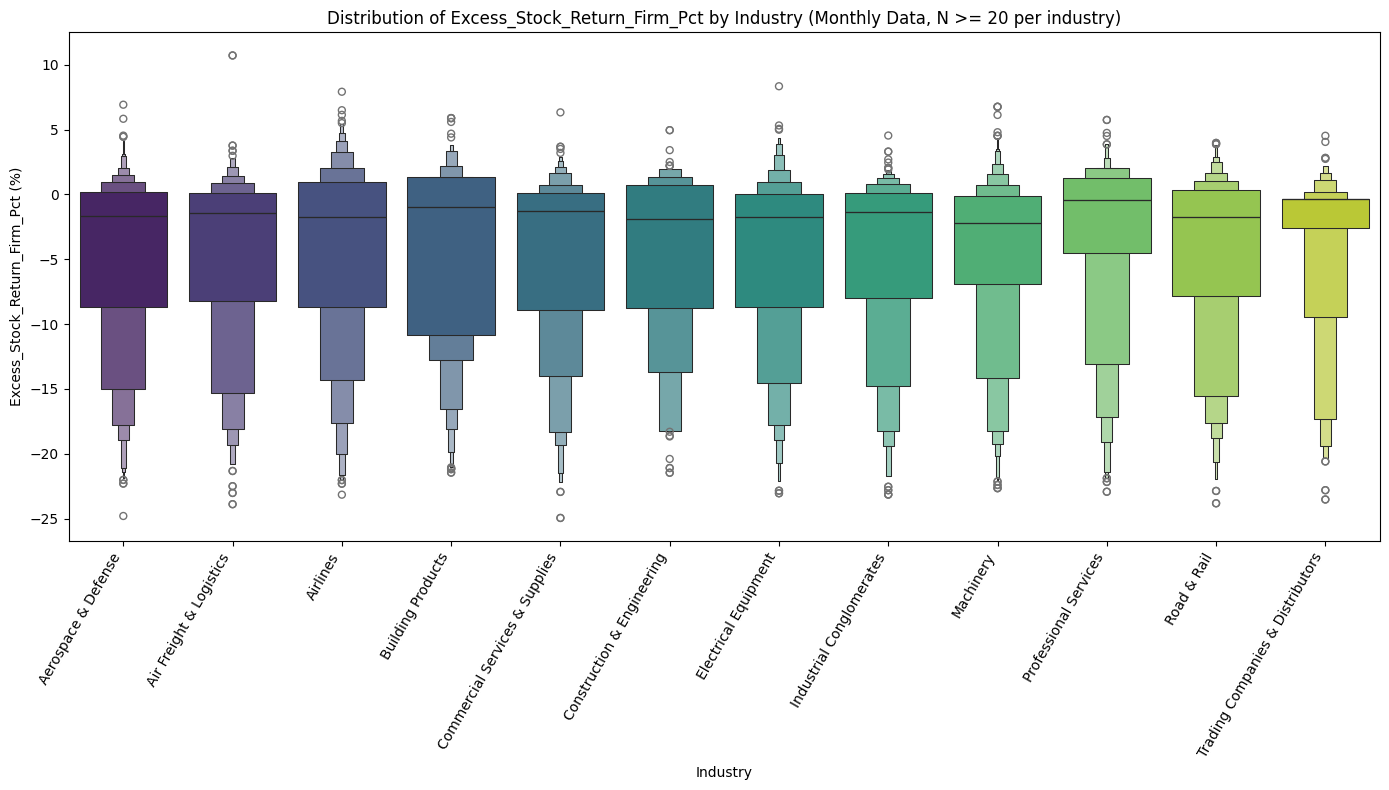

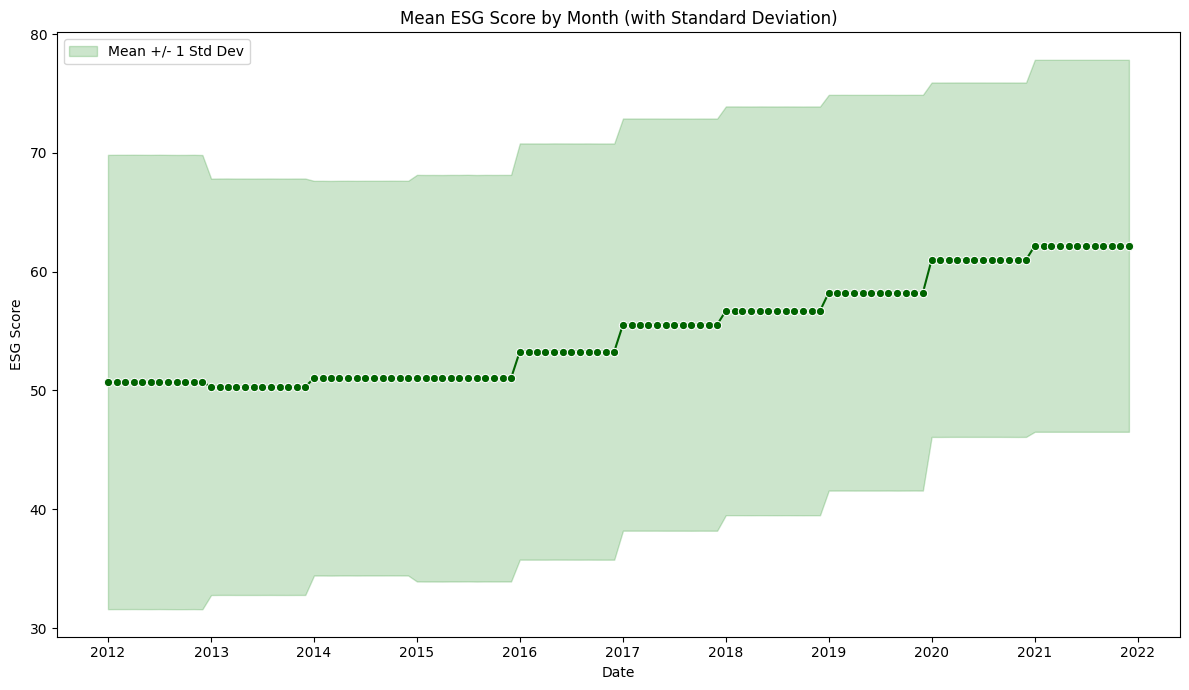


--- Panel Data Analysis (with Robust Standard Errors) ---
Dependent Variable: Excess_Stock_Return_Firm (Excess Stock Returns)
Independent Variables: ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1', 'FF_HML_CMA_PC2', 'ESG_PC1']
Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.

--- Pooled OLS Model (Robust Standard Errors) ---
                             PooledOLS Estimation Summary                             
Dep. Variable:     Excess_Stock_Return_Firm   R-squared:                        0.0682
Estimator:                        PooledOLS   R-squared (Between):             -0.5541
No. Observations:                      8640   R-squared (Within):               0.0698
Date:                      Fri, Jun 13 2025   R-squared (Overall):              0.0682
Time:                              17:07:46   Log-likelihood                 1.367e+04
Cov. Estimator:                     

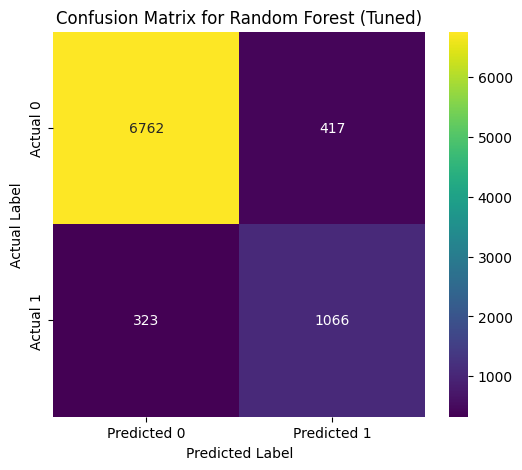

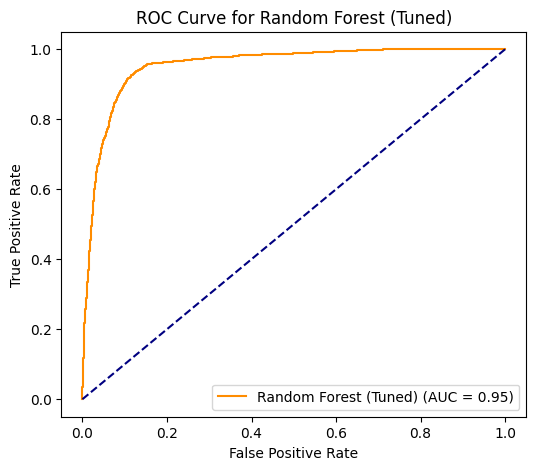


Full Classification Report (Aggregated CV Predictions):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7179
           1       0.72      0.77      0.74      1389

    accuracy                           0.91      8568
   macro avg       0.84      0.85      0.85      8568
weighted avg       0.92      0.91      0.91      8568

Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.
Consider techniques like SMOTE or class weighting to address imbalance.
------------------------------------------------------------

--- XGBoost (Tuned) Consolidated Cross-Validation Metrics ---
Accuracy: 0.8985
Precision: 0.6298
Recall: 0.9064
F1-Score: 0.7432
ROC AUC: 0.9576


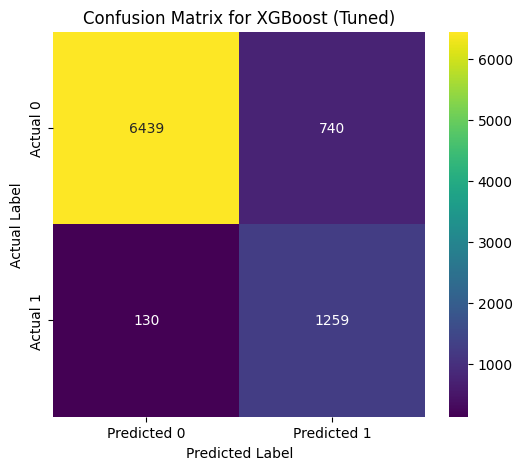

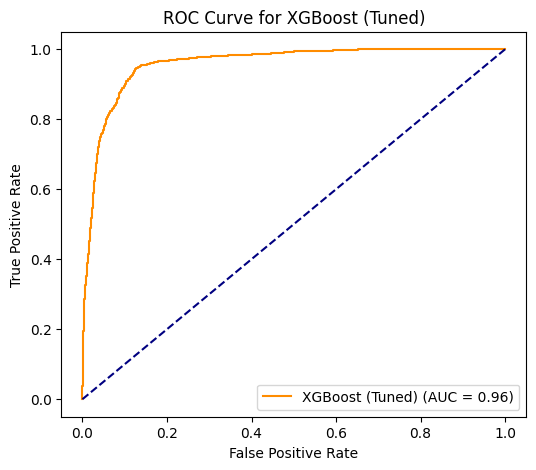


Full Classification Report (Aggregated CV Predictions):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7179
           1       0.63      0.91      0.74      1389

    accuracy                           0.90      8568
   macro avg       0.81      0.90      0.84      8568
weighted avg       0.92      0.90      0.91      8568

Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.
Consider techniques like SMOTE or class weighting to address imbalance.
------------------------------------------------------------

--- Feature Importance ---
Interpreting key drivers of next month's Excess Return Firm Direction.

Top 10 Feature Importances (Random Forest):
                         feature  importance
36                            RF    0.207352
1                            SMB    0.095565
37                FF_HML_CMA_PC1    0.084885
2                            RMW    0.079104
38                FF_HML_CMA_PC2 


SHAP Summary Plot (Random Forest): Overall Feature Impact


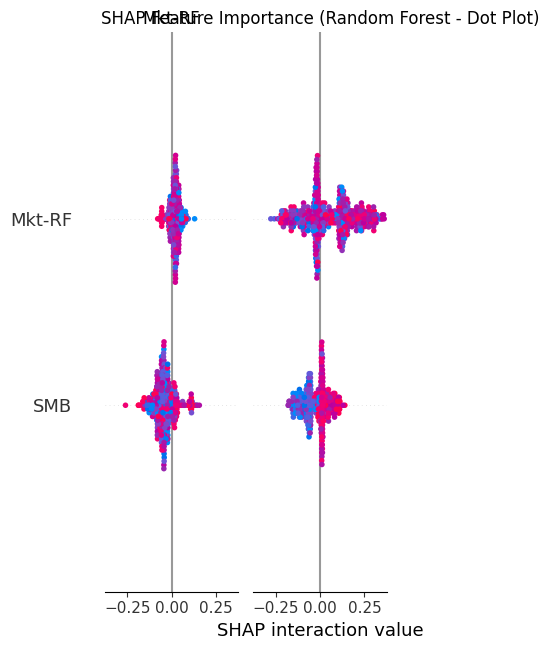


SHAP Dependence Plots (Random Forest): Non-Linearity & Interactions
Plotting dependence for: RF
Error during SHAP analysis for Random Forest: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 50
Consider using a smaller sample for SHAP or addressing memory issues if data is very large.

SHAP Summary Plot (XGBoost): Overall Feature Impact


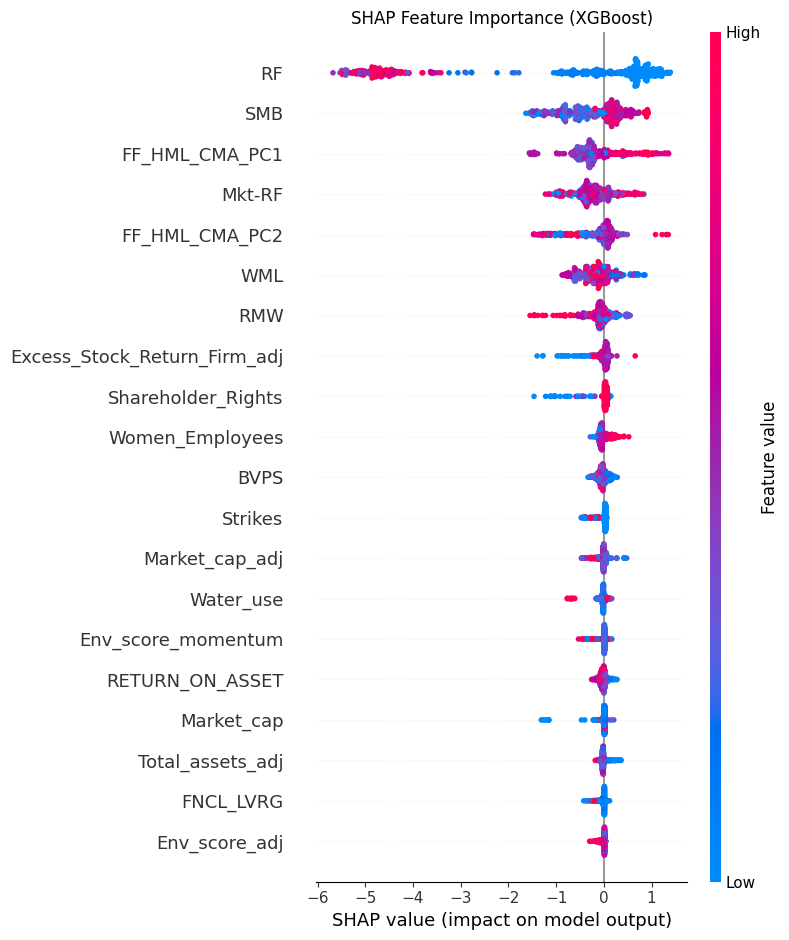


SHAP Dependence Plot (XGBoost): Non-Linearity & Interactions
Plotting dependence for: RF


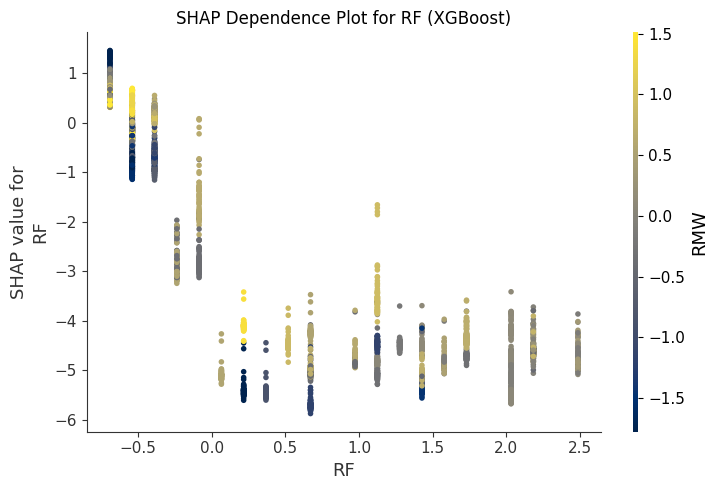

Plotting dependence for: SMB


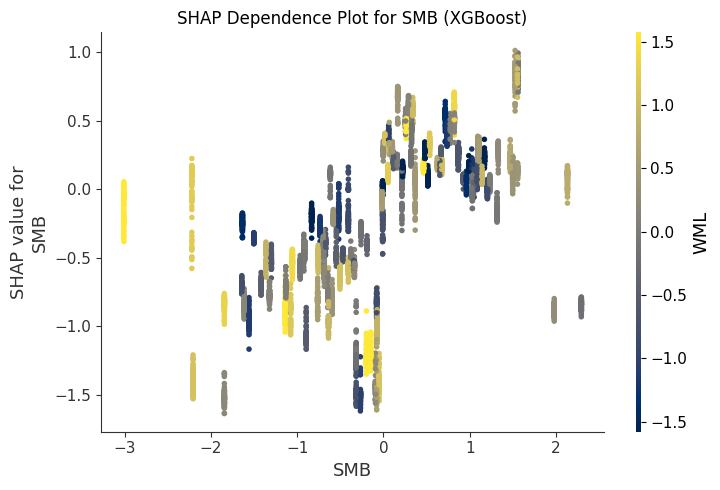

Plotting dependence for: FF_HML_CMA_PC1


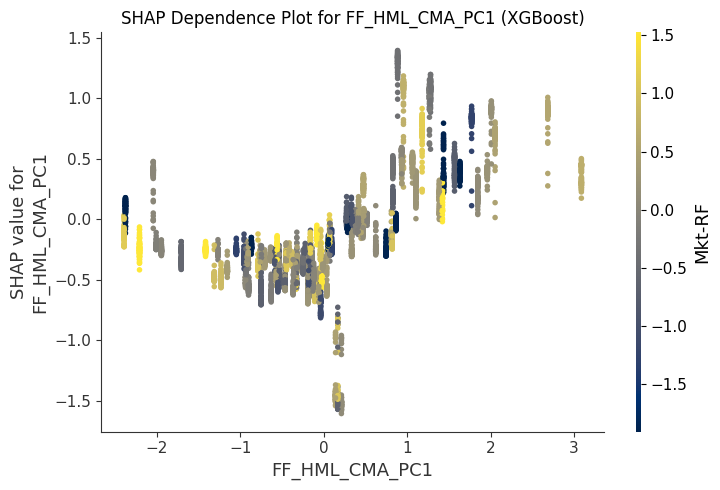


SHAP Force Plot (XGBoost): Explanation for a Single Prediction
Explaining prediction for Identifier: PNR, Date: 2020-10


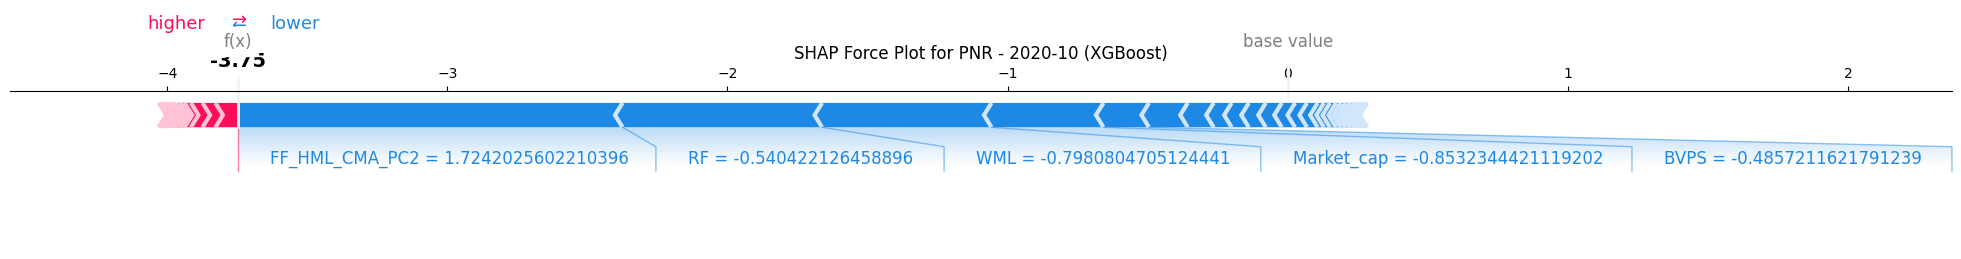


--- Analysis Complete ---

--- Conceptual Extensions for Future Research ---
1. Alternative Dependent Variables/Research Questions:
   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.
   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.
   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).
2. Expanding Data for Robustness:
   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).
   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.
3. Advanced ML Techniques:
   - Experiment with deep learning models (e.g., LSTMs) for time-series prediction within firms if sufficient historical data is a

In [5]:
# --- CRITICAL: PLEASE ENSURE YOU RUN ALL CELLS FROM THE VERY TOP OF THE NOTEBOOK ---
# This ensures all necessary libraries are imported and available.
# If you are restarting the runtime, always select "Runtime -> Restart runtime and run all".
# If you are running this code block in isolation (e.g., just one cell), it will fail because imports might not have executed.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
import sys # For sys.exit()
import yfinance as yf # For downloading stock data
from datetime import datetime # For handling dates
from scipy.stats import chi2 # For custom Hausman test p-value
from scipy import stats # For Fama-MacBeth p-value (norm.cdf)

# Suppress specific warnings for cleaner output during demonstrations
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# --- CRITICAL: Ensure necessary libraries are up to date and RESTART RUNTIME ---
# IMPORTANT: To ensure `linearmodels.panel.diagnostic` imports work and for optimal performance,
# run the following line in a SEPARATE CELL and then RESTART YOUR COLAB RUNTIME
# (Runtime -> Disconnect and delete runtime) before running the rest of the script.
# This is crucial for new package versions to be properly loaded and for panel diagnostics to function.
#
# !pip install --upgrade linearmodels arch statsmodels yfinance
#
# If you continue to see "linearmodels.panel.diagnostic could not be imported"
# after running the above and restarting, it indicates a deeper environment issue
# or a version incompatibility, and these diagnostics will remain skipped.
# --- End of upgrade commands and runtime restart instruction ---

# Enable experimental iterative imputer for MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from sklearn.decomposition import PCA # For Principal Component Analysis

# --- ML Specific Imports ---
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- CRITICAL FIX: Import panel diagnostics and set flag ---
_PANEL_DIAGNOSTICS_AVAILABLE = False
try:
    from linearmodels.panel.diagnostic import pesaran_cd, wooldridge_test
    _PANEL_DIAGNOSTICS_AVAILABLE = True
    print("linearmodels.panel.diagnostic successfully imported. Advanced panel diagnostics enabled.")
except ImportError as e:
    print(f"Warning: linearmodels.panel.diagnostic could not be imported. Skipping advanced panel diagnostics. Error: {e}")
# --- END CRITICAL FIX ---

# --- CUSTOM HAUSMAN TEST FUNCTION (Fallback if linearmodels.compare fails) ---
def hausman_test(fe_res, re_res):
    """
    Performs a Hausman test to choose between Fixed Effects and Random Effects models.
    H0: Random Effects model is consistent and efficient (unobserved effects are uncorrelated with regressors).
    H1: Fixed Effects model is consistent, Random Effects is inconsistent (unobserved effects are correlated).
    """
    if fe_res is None or re_res is None:
        print("Hausman test skipped: Fixed Effects or Random Effects models were not successfully fitted.")
        return

    # Try linearmodels' built-in compare first
    # This is preferred as it correctly handles degrees of freedom and robust covariance
    if hasattr(fe_res, 'compare') and callable(fe_res.compare) and _PANEL_DIAGNOSTICS_AVAILABLE:
        try:
            hausman_comparison = fe_res.compare(re_res)
            # linearmodels compare automatically includes Hausman if applicable
            if 'Hausman' in hausman_comparison.tests:
                hausman_test_result = hausman_comparison.tests['Hausman']
                print(f"\n--- Linearmodels Built-in Hausman Test Results ---")
                print(hausman_test_result) # Prints full test details
                if hausman_test_result.pvalue < 0.05:
                    print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
                else:
                    print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")
                return # Exit if built-in test succeeds
            else:
                print("Linearmodels built-in Hausman test results not found in the comparison object. Falling back to custom.")
        except Exception as e:
            print(f"Error with linearmodels built-in Hausman test: {e}. Falling back to custom.")

    # Custom implementation as a fallback (less robust than built-in, especially with robust errors)
    # Filter coefficients that are common and should be identical under H0
    common_params = list(set(fe_res.params.index) & set(re_res.params.index))

    # Exclude 'const' from common parameters if it's the first parameter in fe_res.params
    if 'const' in common_params:
        common_params.remove('const')

    if not common_params:
        print("No common non-constant parameters to perform custom Hausman test. Test cannot be performed.")
        return

    b_fe_common = fe_res.params[common_params].to_numpy()
    b_re_common = re_res.params[common_params].to_numpy()

    # Get covariance matrices for common parameters
    cov_fe_common = fe_res.cov.loc[common_params, common_params]
    cov_re_common = re_res.cov.loc[common_params, common_params]

    b_diff = b_fe_common - b_re_common
    cov_diff = cov_fe_common - cov_re_common

    try:
        # Check for positive definiteness for inversion stability
        # Add a small value to the diagonal if not positive definite for numerical inaccuracies
        eigenvalues = np.linalg.eigvalsh(cov_diff)
        if np.any(eigenvalues < -1e-8):
            print("Warning: Variance difference matrix is not positive semi-definite (negative eigenvalues found). Custom Hausman test results may be unreliable or invalid.")
            print("This often indicates that the Random Effects model is inconsistent or that assumptions are violated.")
            print("Fixed Effects model is generally preferred if this occurs, or use built-in Hausman test with appropriate options if available.")
            # Add a small regularization term to the diagonal to make it invertible for calculation, but note the warning
            cov_diff += np.eye(cov_diff.shape[0]) * 1e-6

        inv_cov_diff = np.linalg.inv(cov_diff)
    except np.linalg.LinAlgError as e:
        print(f"Error inverting covariance difference matrix for custom Hausman test: {e}")
        print("This usually means the matrix is singular or not positive semi-definite. Custom Hausman test is not valid.")
        print("If this occurs, Fixed Effects model is typically preferred (as it's consistent even if RE isn't efficient).")
        return

    hausman_stat = b_diff.T @ inv_cov_diff @ b_diff
    df = len(common_params)

    # Chi-squared statistic cannot be negative. If it is, the test result is invalid.
    if hausman_stat < 0:
        print("Warning: Calculated Hausman Test Statistic is negative. This indicates a problem with the test's assumptions or implementation (e.g., covariance matrix difference not positive semi-definite).")
        print("The test result is invalid. In such cases, Fixed Effects is often preferred as it is consistent even if Random Effects is not efficient.")
        return

    p_value = chi2.sf(hausman_stat, df)

    print(f"\n--- Custom Hausman Test Results (Fallback) ---")
    print(f"Hausman Test Statistic: {hausman_stat:.4f}")
    print(f"Degrees of Freedom: {df}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
    else:
        print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")

# --- END CUSTOM HAUSMAN TEST FUNCTION ---


# Manual Fama-MacBeth function (fallback for linearmodels.asset_pricing.FamaMacBeth)
def run_manual_fama_macbeth(data_df, dependent_var, factors_list):
    """
    Performs a Fama-MacBeth two-stage regression.
    Step 1: Time-series regression for each firm to estimate factor betas.
    Step 2: Cross-sectional regression for each time period to estimate risk premia,
            then average these premia over time and calculate their t-statistics.
    """
    print(f"\n--- Running Manual Fama-MacBeth Regression for {dependent_var} ---")
    print("This analysis is now running on monthly data, which is the standard frequency for Fama-MacBeth regressions in asset pricing studies.")

    # Ensure data_df has Identifier (RIC) and Date (monthly) in index for grouping
    if not isinstance(data_df.index, pd.MultiIndex) or 'Identifier (RIC)' not in data_df.index.names or 'Date' not in data_df.index.names:
        print("Error: Input data_df for Fama-MacBeth must have a MultiIndex with 'Identifier (RIC)' and 'Date'.")
        return None

    current_factors_list = []
    for factor in factors_list:
        if factor not in data_df.columns:
            print(f"Warning: Factor '{factor}' not found in data for Fama-MacBeth. Excluding.")
            continue
        if data_df[factor].std() == 0:
            print(f"Warning: Factor '{factor}' has zero variance and will be excluded from Fama-MacBeth.")
            continue
        current_factors_list.append(factor)

    if not current_factors_list:
        print("No valid factors remaining for Fama-MacBeth after checks.")
        return None

    if dependent_var not in data_df.columns:
        print(f"Error: Dependent variable '{dependent_var}' not found in data for Fama-MacBeth.")
        return None

    # Step 1: Run time-series regressions for each firm to get betas
    betas_per_firm_list = []
    unique_firms = data_df.index.get_level_values('Identifier (RIC)').unique()

    print(f"Step 1: Estimating Betas for {len(unique_firms)} firms...")
    for ric_id in unique_firms:
        firm_data = data_df.loc[ric_id]

        # Ensure relevant columns are present for the firm's data slice and drop NaNs
        firm_data_subset = firm_data[[dependent_var] + current_factors_list].dropna()

        # For monthly data, usually need at least T > N (num factors) + 1 for time-series regressions
        if len(firm_data_subset) < len(current_factors_list) + 2:
            # print(f"Skipping time-series regression for firm {ric_id}: Not enough observations ({len(firm_data_subset)}) for factors (needed {len(current_factors_list) + 2}).")
            continue

        y = firm_data_subset[dependent_var]
        X = sm.add_constant(firm_data_subset[current_factors_list])

        try:
            model = sm.OLS(y, X)
            results = model.fit()

            # Rename coefficients to clearly indicate they are betas (e.g., Mkt-RF_beta)
            betas = results.params.drop('const', errors='ignore')
            betas = betas.rename(lambda x: f'{x}_beta') # Add _beta suffix

            betas['Identifier (RIC)'] = ric_id
            betas_per_firm_list.append(betas)

        except Exception as e:
            # print(f"Error in time-series regression for firm {ric_id}: {e}")
            continue

    if not betas_per_firm_list:
        print("No successful time-series regressions. Cannot proceed with Fama-MacBeth.")
        return None

    betas_df = pd.DataFrame(betas_per_firm_list).set_index('Identifier (RIC)')
    print(f"Successfully estimated betas for {len(betas_df)} firms.")

    # Get the names of the new beta columns (e.g., 'Mkt-RF_beta')
    beta_cols = [f'{f}_beta' for f in current_factors_list]


    # Step 2: Run cross-sectional regressions for each time period
    # --- FIXED: Use .reset_index() to convert MultiIndex levels to columns for merge ---
    # Then merge, and finally set the MultiIndex back.
    temp_data_df_for_merge = data_df.reset_index() # Converts both 'Identifier (RIC)' and 'Date' to columns

    # Merge betas with the original monthly data
    # Merge on 'Identifier (RIC)' (common column)
    merged_with_betas = pd.merge(
        temp_data_df_for_merge,
        betas_df[beta_cols].reset_index(), # Reset index of betas_df to merge 'Identifier (RIC)' as a column
        on='Identifier (RIC)',
        how='left'
    )

    # Re-set the MultiIndex after merging
    merged_with_betas = merged_with_betas.set_index(['Identifier (RIC)', 'Date']).sort_index()


    # Now, run cross-sectional regressions
    risk_premia_list = []
    # Use 'Date' level for unique time periods
    unique_dates = merged_with_betas.index.get_level_values('Date').unique().sort_values()

    print(f"Step 2: Estimating Risk Premia for {len(unique_dates)} months...")
    for date in unique_dates:
        cross_section_data = merged_with_betas.loc[(slice(None), date), :]

        # Dropna based on the dependent variable and the beta columns
        # This ensures that only rows with complete data for the current regression are used
        cross_section_data_clean = cross_section_data[[dependent_var] + beta_cols].dropna()

        if len(cross_section_data_clean) < len(beta_cols) + 1:
            # print(f"Skipping month {date}: Not enough firms ({len(cross_section_data_clean)}) for cross-sectional regression.")
            continue

        y_cs = cross_section_data_clean[dependent_var]
        # Use the betas (now correctly named with _beta suffix) as independent variables for the cross-section
        X_cs = sm.add_constant(cross_section_data_clean[beta_cols])

        try:
            model_cs = sm.OLS(y_cs, X_cs)
            results_cs = model_cs.fit()

            premia = results_cs.params.copy()
            premia.name = date # Name the series by date
            risk_premia_list.append(premia)

        except Exception as e:
            # print(f"Error in cross-sectional regression for month {date}: {e}")
            continue

    if not risk_premia_list:
        print("No successful cross-sectional regressions. Cannot calculate Fama-MacBeth risk premia.")
        return None

    risk_premia_ts = pd.DataFrame(risk_premia_list)
    # Ensure all factor columns are present, filling with NaN for years where they weren't in the regression
    all_premia_cols = sorted(list(set(col for df in risk_premia_list for col in df.index)))
    risk_premia_ts = risk_premia_ts.reindex(columns=all_premia_cols)

    # Step 3: Average risk premia and calculate t-statistics
    mean_premia = risk_premia_ts.mean()
    # Handle cases where std_errors_premia might be NaN due to insufficient observations for a factor
    std_errors_premia = risk_premia_ts.std() / np.sqrt(len(risk_premia_ts))

    # Avoid division by zero for t-stats if std_error is zero or NaN
    t_stats_premia = mean_premia / std_errors_premia.replace(0, np.nan)

    # Combine results
    results_dict = {
        'Factor': mean_premia.index.tolist(),
        'Mean Premium': mean_premia.tolist(),
        'Std.Error (FM)': std_errors_premia.tolist(),
        'T-statistic (FM)': t_stats_premia.tolist()
    }

    results_df = pd.DataFrame(results_dict)
    results_df['P-value (FM)'] = results_df['T-statistic (FM)'].apply(lambda x: 2 * (1 - stats.norm.cdf(abs(x))))

    print("\nFama-MacBeth Regression Results:")
    return results_df

# --- END Manual Fama-MacBeth Function ---


# --- 0. Define Companies for Stock Data Download ---
COMPANY_TICKERS = [
    'AAL', 'ALK', 'DAL', 'LUV', 'UAL', # Airlines
    'BA', 'GD', 'HII', 'HWM', 'LHX', 'LMT', 'NOC', 'RTX', 'TDG', 'TXT', # Aerospace & Defense
    'CAT', 'CMI', 'DE', 'PCAR', # Heavy Machinery & Equipment
    'CSX', 'NSC', 'UNP', # Rail Transportation
    'CHRW', 'EXPD', 'FDX', 'JBHT', 'ODFL', 'UPS', # Freight & Logistics Services
    'ALLE', 'AOS', 'CARR', 'FBHS', 'JCI', 'MAS', 'OTIS', 'TT', # Building Products & Security
    'MMM', 'GE', 'HON', # Industrial Conglomerates
    'CPRT', 'CTAS', 'EFX', 'NLSN', 'RHI', 'ROL', 'VRSK', # Business Services
    'RSG', 'WM', # Environmental & Waste Management
    'AME', 'DOV', 'EMR', 'ETN', 'FAST', 'FTV', 'GNRC', 'GWW', 'IEX', 'IR', 'ITW', 'NDSN', 'PH', 'PNR', 'ROK', 'SNA', 'SWK', 'WAB', 'XYL', # Diversified Industrials
    'J', 'LDOS', 'PWR', 'ROP' # Engineering & Construction
]

# --- 1. Load and Preprocess Data ---

# Load Fama-French 5 Factors data
try:
    ff_df = pd.read_csv('/content/ff_5_Factors.csv')
    # --- IMPORTANT CHANGE: Load monthly ESG data ---
    esg_df = pd.read_csv('/content/monthly_esg_data.csv')
except FileNotFoundError:
    print("Ensure 'ff_5_Factors.csv' and 'monthly_esg_data.csv' are in the correct path.")
    sys.exit(1)

print("--- Data Loading Complete ---")
print("Fama-French Data Head (Monthly):\n", ff_df.head())
print("\nESG Data Head (Monthly):\n", esg_df.head())

# --- Fama-French Data Preprocessing (already monthly, just convert to proper date format) ---
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m')
ff_df['Year'] = ff_df['Date'].dt.year
ff_df['Month'] = ff_df['Date'].dt.month # Keep month for monthly returns

all_possible_factor_cols = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
factor_cols = list(set(all_possible_factor_cols).intersection(ff_df.columns))

# Ensure factors are in decimal form (already monthly, conversion if max > 1)
for col in factor_cols:
    if col in ff_df.columns and ff_df[col].dtype in ['float64', 'int64'] and ff_df[col].max() > 1:
        ff_df[col] = ff_df[col] / 100.0

# No longer creating ff_annual, as we are moving to monthly analysis


# --- ESG Data Preprocessing (now monthly) ---
esg_df.rename(columns={'Date': 'Date_str'}, inplace=True) # Rename to avoid conflict with datetime 'Date'
esg_df['Date'] = pd.to_datetime(esg_df['Date_str'], format='%Y/%m') # Parse as monthly date
esg_df['Year'] = esg_df['Date'].dt.year
esg_df['Month'] = esg_df['Date'].dt.month
esg_df.dropna(subset=['Identifier (RIC)', 'Date'], inplace=True)


if 'Industry' not in esg_df.columns:
    print("Warning: 'Industry' column not found in ESG data. Cannot perform industry-adjusted feature engineering.")

numeric_cols_esg = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'BVPS', 'Market_cap', 'Shares',
                    'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG',
                    'PE_RATIO', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
                    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
                    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
                    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives', 'Total_assets']

for col in numeric_cols_esg:
    if col in esg_df.columns:
        esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')


print(f"\nESG Years & Months (unique, type {esg_df['Date'].dtype}): {sorted(esg_df['Date'].dropna().unique())[::12]} (showing one per year)")
print(f"FF Data Years & Months (unique, type {ff_df['Date'].dtype}): {sorted(ff_df['Date'].unique())[::12]} (showing one per year)")


# --- Download and Preprocess Historical Stock Prices (now for monthly returns) ---
print("\n--- Downloading Historical Stock Prices ---")
stock_data_raw = pd.DataFrame()
# Align start/end dates with the earliest/latest monthly data available
start_date_ff = ff_df['Date'].min()
end_date_ff = ff_df['Date'].max()

# Adjust stock data download range to cover FF and ESG data
start_date_download = min(start_date_ff, esg_df['Date'].min())
end_date_download = max(end_date_ff, esg_df['Date'].max()) + pd.DateOffset(months=1) # Ensure we get enough data for last month's return

try:
    stock_data_raw = yf.download(COMPANY_TICKERS, start=start_date_download, end=end_date_download, progress=False)
except Exception as e:
    print(f"Error downloading stock data: {e}")
    sys.exit(1)

if stock_data_raw.empty:
    raise ValueError("No stock data downloaded. Cannot proceed with market return analysis.")

available_tickers = [col[1] for col in stock_data_raw.columns if col[0] == 'Close']
if not available_tickers:
    print("Warning: No 'Close' price data found for any ticker. Cannot proceed with stock return calculation.")
    sys.exit(1)

print(f"\nSuccessfully downloaded data for {len(available_tickers)} out of {len(COMPANY_TICKERS)} tickers (based on 'Close' price availability).")

# Select only the 'Close' prices and unstack to long format
stock_prices_close = stock_data_raw['Close'].stack().reset_index()
stock_prices_close.columns = ['Date', 'Identifier (RIC)', 'Close_Price']

print("Stock Prices (Close) Head:\n", stock_prices_close.head())

# Calculate Monthly Returns from Close prices
stock_prices_close.sort_values(by=['Identifier (RIC)', 'Date'], inplace=True)

monthly_stock_returns_list = []
for ric_id, group_df in stock_prices_close.groupby('Identifier (RIC)'):
    # Calculate monthly return as (current_month_price / previous_month_price) - 1
    group_df['Monthly_Stock_Return'] = group_df['Close_Price'].pct_change()
    group_df['Year'] = group_df['Date'].dt.year
    group_df['Month'] = group_df['Date'].dt.month
    monthly_stock_returns_list.append(group_df[['Date', 'Identifier (RIC)', 'Year', 'Month', 'Monthly_Stock_Return']])

monthly_stock_returns = pd.concat(monthly_stock_returns_list).dropna(subset=['Monthly_Stock_Return'])

print("\nMonthly Stock Returns Head:\n", monthly_stock_returns.head())


# --- Merge Dataframes: ESG (monthly) + Stock Returns (monthly) + Fama-French (monthly) ---
# Merge ESG with monthly stock returns
esg_with_returns_df = pd.merge(esg_df, monthly_stock_returns, on=['Identifier (RIC)', 'Date', 'Year', 'Month'], how='left')

# Merge with Fama-French data (which is already monthly)
# We need to ensure ff_df has the same 'Year' and 'Month' columns for merging, and 'RF'
ff_for_merge = ff_df[['Date', 'Year', 'Month', 'RF']].copy() if 'RF' in ff_df.columns else ff_df[['Date', 'Year', 'Month']].copy()
# Add RF column if it doesn't exist to avoid key error later, will be NaN
if 'RF' not in ff_for_merge.columns:
    ff_for_merge['RF'] = np.nan

merged_df = pd.merge(esg_with_returns_df, ff_for_merge, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_ff'))

# Handle cases where RF_ff might have been created due to suffix, but we want the original RF
if 'RF_ff' in merged_df.columns:
    merged_df['RF'] = merged_df['RF_ff']
    merged_df.drop(columns=['RF_ff'], inplace=True)


# --- Calculate Excess Stock Return of the Firm (monthly) ---
if 'Monthly_Stock_Return' in merged_df.columns and 'RF' in merged_df.columns:
    merged_df['Excess_Stock_Return_Firm'] = merged_df['Monthly_Stock_Return'] - merged_df['RF']
    merged_df['Excess_Stock_Return_Firm_Pct'] = merged_df['Excess_Stock_Return_Firm'] * 100.0
else:
    print("Warning: 'Excess_Stock_Return_Firm' cannot be calculated. Ensure 'Monthly_Stock_Return' and 'RF' are available.")
    merged_df['Excess_Stock_Return_Firm'] = np.nan
    merged_df['Excess_Stock_Return_Firm_Pct'] = np.nan

# Now merge with Fama-French factors (excluding RF as it's already used)
non_rf_factor_cols_current = [col for col in factor_cols if col != 'RF']
ff_factors_only = ff_df[['Date', 'Year', 'Month'] + non_rf_factor_cols_current].copy()

final_df = pd.merge(merged_df, ff_factors_only, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_factors'))

# Handle potential duplicate factor columns (e.g., if ESG had a column with same name as FF factor)
for col in non_rf_factor_cols_current:
    if f'{col}_factors' in final_df.columns:
        # Prioritize factor data from ff_df if there's a conflict
        final_df[col] = final_df[f'{col}_factors']
        final_df.drop(columns=[f'{col}_factors'], inplace=True)


# Define independent variables for panel regressions and ML.
# Ensure 'Date_str' is removed as it's not needed after parsing
if 'Date_str' in final_df.columns:
    final_df.drop(columns=['Date_str'], inplace=True)

all_panel_independent_options = [
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
# Filter out columns that are no longer present or are utility columns
all_panel_independent_options = [col for col in all_panel_independent_options if col in final_df.columns]


dependent_var = 'Excess_Stock_Return_Firm'
dependent_var_pct = 'Excess_Stock_Return_Firm_Pct'

print("\n--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---\n", final_df.head())
print("\nMissing values before imputation (in final_df):\n", final_df.isnull().sum()[final_df.isnull().sum() > 0])


# --- 2. MICE Imputation ---
cols_for_imputation = [
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'RF', 'Monthly_Stock_Return', 'Excess_Stock_Return_Firm',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use',
    'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
cols_for_imputation = [col for col in cols_for_imputation if col in final_df.columns]

# --- CRITICAL FIX: Set MultiIndex on final_df BEFORE imputation loop ---
# This ensures final_df.loc[imputed_df.index, col] works correctly
final_df = final_df.set_index(['Identifier (RIC)', 'Date']).sort_index()


# Now, select columns for imputation from the already indexed final_df
imputable_df = final_df[cols_for_imputation].copy()


threshold = 0.8
cols_to_drop_from_imputation = [col for col in imputable_df.columns if imputable_df[col].isnull().sum() / len(imputable_df) > threshold]
imputable_df_clean = imputable_df.drop(columns=cols_to_drop_from_imputation)

if not imputable_df_clean.empty and len(imputable_df_clean.columns) > 0:
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_data = imputer.fit_transform(imputable_df_clean)
    imputed_df = pd.DataFrame(imputed_data, columns=imputable_df_clean.columns, index=imputable_df_clean.index)

    # Update original final_df with imputed values. This now works correctly.
    for col in imputed_df.columns:
        final_df.loc[imputed_df.index, col] = imputed_df[col]

else:
    print("\nWarning: No suitable numerical columns found for MICE imputation or imputable_df_clean is empty.")


# Handle remaining NaNs after MICE (ffill/bfill for panel, then mean/median)
# This block is now *after* setting the index, so it will correctly apply ffill/bfill per entity.
final_df = final_df.groupby(level='Identifier (RIC)').ffill().bfill()

# Fill any remaining NaNs (e.g., if a column was all NaN for some firms, or at start/end)
for col in final_df.columns:
    if final_df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(final_df[col]):
            final_df[col] = final_df[col].fillna(final_df[col].mean())
        else:
            # For categorical data, use mode. Handle potential empty mode.
            final_df[col] = final_df[col].fillna(final_df[col].mode()[0] if not final_df[col].mode().empty else 'Unknown')


print("\n--- Missing values after MICE and ffill/bfill (before final model-specific drop) ---")
print(final_df.isnull().sum()[final_df.isnull().sum() > 0])


# Final dropna for critical columns right before model fitting
# This is usually for the dependent variable and key independent variables that cannot be NaN
essential_cols_for_model = [dependent_var] + [col for col in all_panel_independent_options if col != 'Industry'] # Exclude 'Industry' if it might be categorical and handled separately
initial_rows_count = len(final_df)
final_df.dropna(subset=essential_cols_for_model, inplace=True)
dropped_rows_count = initial_rows_count - len(final_df)
print(f"\nDropped {dropped_rows_count} rows due to NaNs in essential model-specific columns (excluding Industry if categorical).")


# Ensure Industry column is categorical if it exists
if 'Industry' in final_df.columns:
    final_df['Industry'] = final_df['Industry'].astype('category')

print("\nFinal Data Head after Preprocessing and Imputation (ready for models - Monthly):\n", final_df.head())
print("Shape of final_df:", final_df.shape)
print(f"Dependent variable ({dependent_var}) NaNs: {final_df[dependent_var].isnull().sum()}")


if final_df.empty or final_df[dependent_var].isnull().all() or len(final_df[dependent_var].dropna()) < 10:
    raise ValueError("DataFrame is empty or dependent variable is all NaN after critical NaN handling for model-specific columns. Cannot proceed with analysis.")


# --- Implement Recommendations & RQ-driven analysis ---

# Recommendation 1: Refine ESG Factor Construction (Value-weighted Market ESG Factor & PCA)
# For monthly data, this is still valid, though the aggregation level becomes monthly
if 'Market_cap' in final_df.columns and 'ESG_score' in final_df.columns:
    # Need to reset index to get 'Date' as a column for grouping
    vw_esg_df = final_df.reset_index().copy()
    vw_esg_df['Market_cap_weighted_ESG'] = vw_esg_df['ESG_score'] * vw_esg_df['Market_cap']
    # Group by Date (monthly) to get monthly value-weighted factor
    market_esg_factor_vw = vw_esg_df.groupby('Date').apply(lambda x: x['Market_cap_weighted_ESG'].sum() / x['Market_cap'].sum(), include_groups=False)\
                                    .rename('Market_ESG_Factor_VW').reset_index()
    print("\n--- Value-weighted Monthly Market ESG Factor Head ---\n", market_esg_factor_vw.head())
else:
    print("\nWarning: Skipping Value-weighted Market ESG Factor calculation. 'Market_cap' or 'ESG_score' not found.")
    market_esg_factor_vw = pd.DataFrame(columns=['Date', 'Market_ESG_Factor_VW'])


esg_sub_scores = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score']
esg_sub_scores_for_pca = [col for col in esg_sub_scores if col in final_df.columns and final_df[col].std() > 0]
if len(esg_sub_scores_for_pca) >= 2:
    print(f"\n--- Performing PCA on firm-level ESG sub-scores: {esg_sub_scores_for_pca} ---")
    pca_esg_data = final_df[esg_sub_scores_for_pca].copy()

    scaler_esg_pca = StandardScaler()
    scaled_esg_data = scaler_esg_pca.fit_transform(pca_esg_data)

    pca_esg = PCA(n_components=1)
    final_df['ESG_PC1'] = pca_esg.fit_transform(scaled_esg_data)
    print(f"Explained variance ratio of ESG_PC1: {pca_esg.explained_variance_ratio_[0]:.4f}")
else:
    print(f"\nSkipping PCA for ESG sub-scores: Not enough suitable columns (needs >=2 non-constant columns). Available: {esg_sub_scores_for_pca}")
    if 'ESG_score' in final_df.columns:
        final_df['ESG_PC1'] = final_df['ESG_score']
    else:
        final_df['ESG_PC1'] = np.nan


# Recommendation 2: Address Multicollinearity (HML and CMA)
ff_factors_for_pca = ['HML', 'CMA']
ff_factors_for_pca_clean = [col for col in ff_factors_for_pca if col in final_df.columns and final_df[col].std() > 0]

if len(ff_factors_for_pca_clean) >= 2:
    print(f"\n--- Performing PCA on Fama-French factors for multicollinearity: {ff_factors_for_pca_clean} ---")
    ff_pca_components = 2
    pca_ff_data = final_df[ff_factors_for_pca_clean].copy()

    scaler_ff_pca = StandardScaler()
    scaled_ff_data = scaler_ff_pca.fit_transform(pca_ff_data)

    pca_ff = PCA(n_components=min(ff_pca_components, len(ff_factors_for_pca_clean)))
    ff_pcs = pca_ff.fit_transform(scaled_ff_data)

    final_df['FF_HML_CMA_PC1'] = ff_pcs[:, 0]
    if ff_pcs.shape[1] > 1:
        final_df['FF_HML_CMA_PC2'] = ff_pcs[:, 1]
        print(f"Explained variance ratios for FF_HML_CMA_PC1: {pca_ff.explained_variance_ratio_[0]:.4f}, FF_HML_CMA_PC2: {pca_ff.explained_variance_ratio_[1]:.4f}")
    else:
        print(f"Only one principal component extracted for FF HML/CMA.")
        final_df['FF_HML_CMA_PC2'] = np.nan

    print("\n--- VIF Check with PCA-derived HML/CMA factors ---")
    independent_vars_panel_pca_ff = ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1']
    if 'FF_HML_CMA_PC2' in final_df.columns and final_df['FF_HML_CMA_PC2'].std() > 0:
        independent_vars_panel_pca_ff.append('FF_HML_CMA_PC2')
    # Prefer ESG_PC1 over ESG_score if available
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel_pca_ff.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel_pca_ff.append('ESG_score')


    vif_features_clean = [col for col in independent_vars_panel_pca_ff if col in final_df.columns and final_df[col].std() > 0]

    if len(vif_features_clean) > 0:
        X_vif_pca_ff = final_df[vif_features_clean].copy()
        X_vif_pca_ff_with_const = sm.add_constant(X_vif_pca_ff, has_constant='add')

        scaler_vif = StandardScaler()
        X_vif_pca_ff_scaled_values = scaler_vif.fit_transform(X_vif_pca_ff_with_const)
        X_vif_pca_ff_scaled_df = pd.DataFrame(X_vif_pca_ff_scaled_values, columns=X_vif_pca_ff_with_const.columns, index=X_vif_pca_ff_with_const.index)

        try:
            vif_data_pca_ff = pd.DataFrame()
            vif_data_pca_ff["feature"] = X_vif_pca_ff_scaled_df.columns
            vif_data_pca_ff["VIF"] = [variance_inflation_factor(X_vif_pca_ff_scaled_df.values, i) for i in range(X_vif_pca_ff_scaled_df.shape[1])]
            vif_data_pca_ff = vif_data_pca_ff.loc[vif_data_pca_ff['feature'] != 'const']
            print(vif_data_pca_ff)
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")

    independent_vars_panel = vif_features_clean
else:
    print("\nSkipping PCA for Fama-French HML/CMA: Not enough suitable columns. Using original factors but warning about multicollinearity.")
    independent_vars_panel = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
    # If ESG_PC1 is preferred and exists, add it. Otherwise, add ESG_score.
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel.append('ESG_score')

    independent_vars_panel = [col for col in independent_vars_panel if col in final_df.columns and final_df[col].std() > 0]

    print("\n--- VIF (Variance Inflation Factor) Check with ORIGINAL factors ---")
    if len(independent_vars_panel) > 0:
        X_vif = final_df[independent_vars_panel]
        X_vif_with_const = sm.add_constant(X_vif, has_constant='add')
        X_vif_scaled_values = StandardScaler().fit_transform(X_vif_with_const)
        X_vif_scaled_df = pd.DataFrame(X_vif_scaled_values, columns=X_vif_with_const.columns, index=X_vif_with_const.index)

        try:
            vif_data = pd.DataFrame()
            vif_data["feature"] = X_vif_scaled_df.columns
            vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled_df.values, i) for i in range(X_vif_scaled_df.shape[1])]
            vif_data = vif_data.loc[vif_data['feature'] != 'const']
            print(vif_data)
            if 'HML' in vif_data['feature'].values and 'CMA' in vif_data['feature'].values:
                # Check for high VIF values based on the VIF column
                if (vif_data.loc[vif_data['feature'] == 'HML', 'VIF'] > 5).any() or \
                   (vif_data.loc[vif_data['feature'] == 'CMA', 'VIF'] > 5).any():
                    print("Warning: High VIF values for HML and/or CMA indicate severe multicollinearity.")
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")


# --- NEW SECTION: Exploratory Data Analysis (EDA) Plots ---
print("\n--- Exploratory Data Analysis (EDA) Plots ---")
temp_df_eda = final_df.reset_index().copy()

# Plot 1: Boxen Plot for Excess_Stock_Return_Firm_Pct by Industry
if dependent_var_pct in temp_df_eda.columns and 'Industry' in temp_df_eda.columns and not temp_df_eda['Industry'].isnull().all():
    # Convert 'Industry' to category explicitly for robust plotting
    temp_df_eda['Industry'] = temp_df_eda['Industry'].astype('category')

    # Filter industries with at least 'min_obs_per_industry' observations for meaningful plots
    min_obs_per_industry = 20 # Increased threshold for monthly data
    industry_counts = temp_df_eda['Industry'].value_counts()
    industries_to_plot = industry_counts[industry_counts >= min_obs_per_industry].index.tolist()

    if industries_to_plot:
        plt.figure(figsize=(14, 8)) # Increased figure size for better readability
        sns.boxenplot(data=temp_df_eda[temp_df_eda['Industry'].isin(industries_to_plot)], x='Industry', y=dependent_var_pct, palette='viridis')
        plt.title(f'Distribution of {dependent_var_pct} by Industry (Monthly Data, N >= {min_obs_per_industry} per industry)')
        plt.xlabel('Industry')
        plt.ylabel(f'{dependent_var_pct} (%)')
        plt.xticks(rotation=60, ha='right') # Increased rotation for longer names
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Not enough industries with at least {min_obs_per_industry} observations each after filtering.")
else:
    print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Required columns not found, Industry is all NaN, or not enough data.")

# Plot 2: Line Plot for ESG_score by Month/Year (Mean with Standard Deviation)
if 'ESG_score' in temp_df_eda.columns and 'Date' in temp_df_eda.columns:
    if not temp_df_eda['ESG_score'].isnull().all():
        # Group by 'Date' (full monthly date) for precise time series plotting
        monthly_esg_summary = temp_df_eda.groupby('Date')['ESG_score'].agg(['mean', 'std']).reset_index()
        plt.figure(figsize=(12, 7))
        sns.lineplot(data=monthly_esg_summary, x='Date', y='mean', marker='o', color='darkgreen')
        plt.fill_between(monthly_esg_summary['Date'], monthly_esg_summary['mean'] - monthly_esg_summary['std'],
                         monthly_esg_summary['mean'] + monthly_esg_summary['std'], color='green', alpha=0.2, label='Mean +/- 1 Std Dev')
        plt.title('Mean ESG Score by Month (with Standard Deviation)')
        plt.xlabel('Date')
        plt.ylabel('ESG Score')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping Line Plot for ESG_score by Month: ESG_score column is all NaN.")
else:
    print("Skipping Line Plot for ESG_score by Month: Required columns not found.")


# --- 3. Panel Data Analysis (with Robust Standard Errors) ---
print("\n--- Panel Data Analysis (with Robust Standard Errors) ---")
print(f"Dependent Variable: {dependent_var} (Excess Stock Returns)")
print(f"Independent Variables: {independent_vars_panel}")

pooled_res, fe_res, re_res = None, None, None

if not final_df.empty and len(independent_vars_panel) > 0 and final_df.shape[0] > len(independent_vars_panel) and not final_df[dependent_var].isnull().all():
    exog_panel_base = final_df[independent_vars_panel]
    exog_panel_base = exog_panel_base.loc[:, exog_panel_base.std() > 0] # Drop zero-variance columns

    if exog_panel_base.empty:
        print("Skipping Panel Data Analysis: No independent variables with variance available.")
    else:
        # Determine covariance estimator type based on data and package availability
        cov_type_panel = 'robust' # Default to robust

        num_entities = final_df.index.get_level_values('Identifier (RIC)').nunique()
        num_time_periods = final_df.index.get_level_values('Date').nunique()

        if _PANEL_DIAGNOSTICS_AVAILABLE and num_entities > 1 and num_time_periods > 1:
            # Driscoll-Kraay is good for both heteroskedasticity, autocorrelation, and cross-sectional dependence
            # It requires T (number of time periods) to be sufficiently large for consistent estimation,
            # which is now more likely with monthly data.
            # A common rule of thumb is T >= N (number of entities), but it can be more flexible.
            if num_time_periods > len(independent_vars_panel) + 1: # Basic check for degrees of freedom in time series
                cov_type_panel = 'driscoll_kraay'
                print(f"Using Driscoll-Kraay standard errors ({num_entities} entities, {num_time_periods} time periods) to account for heteroskedasticity, autocorrelation, and cross-sectional dependence.")
            else:
                print(f"Not enough time periods ({num_time_periods}) for robust Driscoll-Kraay standard errors with {len(independent_vars_panel)} regressors. Falling back to 'robust'.")
        else:
            print("Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.")


        # Pooled OLS Model
        print("\n--- Pooled OLS Model (Robust Standard Errors) ---")
        try:
            exog_pooled = sm.add_constant(exog_panel_base) # Keep constant for Pooled OLS
            pooled_model = PooledOLS(final_df[dependent_var], exog_pooled)
            pooled_res = pooled_model.fit(cov_type=cov_type_panel)
            print(pooled_res)
        except Exception as e:
            print(f"Error running Pooled OLS with {cov_type_panel} covariance: {e}")

        # Fixed Effects (Within) Model
        print("\n--- Fixed Effects (Within) Model (Robust Standard Errors) ---")
        try:
            fe_model = PanelOLS(final_df[dependent_var], exog_panel_base, entity_effects=True)
            fe_res = fe_model.fit(cov_type=cov_type_panel)
            print(fe_res)
        except Exception as e:
            print(f"Error running Fixed Effects Model with {cov_type_panel} covariance: {e}")

        # Random Effects Model
        print("\n--- Random Effects Model (Robust Standard Errors) ---")
        try:
            re_model = RandomEffects(final_df[dependent_var], exog_panel_base)
            re_res = re_model.fit(cov_type=cov_type_panel)
            print(re_res)
        except Exception as e:
            print(f"Error running Random Effects Model with {cov_type_panel} covariance: {e}")

        # --- Hausman Test (using custom function which prefers built-in) ---
        print("\n--- Hausman Test (Fixed vs. Random Effects) ---")
        hausman_test(fe_res, re_res) # Call the custom function

        # --- Advanced Panel Diagnostics (conditional on _PANEL_DIAGNOSTICS_AVAILABLE) ---
        if _PANEL_DIAGNOSTICS_AVAILABLE:
            print("\n--- Advanced Panel Diagnostics (requires linearmodels.panel.diagnostic) ---")

            # 1. Pesaran CD Test for Cross-Sectional Dependence
            # H0: No cross-sectional dependence
            # Requires N > 1, T > 1. Can be sensitive to short time series.
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    cd_test_stat, cd_test_pvalue = pesaran_cd(fe_res.resids, fe_res.entity_ids, fe_res.time_ids)
                    print(f"\n--- Pesaran CD Test for Cross-Sectional Dependence ---")
                    print(f"CD Test Statistic: {cd_test_stat:.4f}")
                    print(f"P-value: {cd_test_pvalue:.4f}")
                    if cd_test_pvalue < 0.05:
                        print("Decision: Reject H0. Significant cross-sectional dependence detected.")
                        print("Conclusion: Standard errors should account for cross-sectional dependence (e.g., Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant cross-sectional dependence detected.")
                except Exception as e:
                    print(f"Error performing Pesaran CD Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Pesaran CD Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")

            # 2. Wooldridge Test for Autocorrelation
            # H0: No first-order serial correlation
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    wooldridge_test_res = wooldridge_test(fe_res)
                    print(f"\n--- Wooldridge Test for Autocorrelation (on FE residuals) ---")
                    print(wooldridge_test_res)
                    if wooldridge_test_res.pvalue < 0.05:
                        print("Decision: Reject H0. Significant first-order serial correlation detected.")
                        print("Conclusion: Standard errors should account for autocorrelation (e.g., robust clustered or Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant first-order serial correlation detected.")
                except Exception as e:
                    print(f"Error performing Wooldridge Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Wooldridge Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")
        else:
            print("\n--- Skipping Advanced Panel Diagnostics (linearmodels.panel.diagnostic not available) ---")

        # --- Alternative Specification Tests for FE vs. RE (Using Provided Robust Logic) ---

        # 1. F-Test for Poolability (Fixed Effects vs. Pooled OLS)
        print("\n--- F-Test for Poolability (Fixed Effects vs. Pooled OLS) ---")
        if fe_res is not None and pooled_res is not None:
            try:
                if hasattr(fe_res, 'f_statistic_pooled') and fe_res.f_statistic_pooled is not None:
                    f_test_poolability = fe_res.f_statistic_pooled
                    print(f"F-statistic for Poolability: {f_test_poolability.stat:.3f}")
                    print(f"P-value: {f_test_poolability.pval:.4f}")
                    print(f"Distribution: F({f_test_poolability.df_num},{f_test_poolability.df_denom})")
                    if f_test_poolability.pval < 0.05:
                        print("Decision: Reject H0. Entity effects are jointly significant. Fixed Effects model is strongly preferred over Pooled OLS.")
                    else:
                        print("Decision: Fail to reject H0. Entity effects are not jointly significant. Pooled OLS might be preferred.")
                else:
                    print("f_statistic_pooled attribute not found or linearmodels.panel.diagnostic not available for direct poolability test.")
                    print("Falling back to overall F-test of Fixed Effects model (Note: This is NOT a direct poolability test, it only tests overall model significance).")
                    if hasattr(fe_res, 'f_statistic'):
                        print(f"F-statistic for Fixed Effects overall model: {fe_res.f_statistic.stat:.2f} (p-value: {fe_res.f_statistic.pval:.4f})")
                        if fe_res.f_statistic.pval < 0.05:
                            print("  Overall FE model is significant, suggesting FE might be useful.")
                        else:
                            print("  Overall FE model is not significant.")
            except Exception as e:
                print(f"Error performing F-test for Poolability: {e}")
        else:
            print("F-test skipped: Fixed Effects or Pooled OLS models were not successfully fitted.")

        # --- Mundlak Test (Correlated Random Effects Approach) ---
        print("\n--- Mundlak Test (Correlated Random Effects Approach) ---")
        print("H0: Random effects are uncorrelated with regressors (RE is consistent).")
        if re_res is not None:
            # We will build a new exog for the Mundlak RE model.
            # It starts with the original `exog_panel_base` (which contains Mkt-RF, SMB, etc.).
            # Ensure index alignment
            mundlak_exog_for_model = exog_panel_base.copy()

            # List to hold hypotheses for Wald test for group means
            wald_test_hypotheses_mundlak = []

            # Identify which variables from independent_vars_panel are truly time-varying WITHIN entities.
            # This is crucial to avoid multicollinearity (X and X_mean being identical for time-invariant X).
            actual_time_varying_cols_for_mundlak = []
            for col in independent_vars_panel:
                # Check if the column exists in the DataFrame and if it varies for at least one entity.
                # Use mean of std on non-NA values to check for variation across groups to avoid issues with some groups having 0 std.
                if col in final_df.columns: # Ensure column is in final_df for groupby
                    group_stds = final_df.groupby(level='Identifier (RIC)')[col].std().dropna()
                    if not group_stds.empty and group_stds.mean() > 1e-9: # Check if average variation is non-zero
                        actual_time_varying_cols_for_mundlak.append(col)

            if len(actual_time_varying_cols_for_mundlak) > 0:
                for col in actual_time_varying_cols_for_mundlak:
                    col_mean_name = f'{col}_mean'
                    # Calculate the group mean for the time-varying regressor
                    # Ensure the transform operates on the correct column of final_df
                    mundlak_exog_for_model[col_mean_name] = final_df.groupby(level='Identifier (RIC)')[col].transform('mean')
                    wald_test_hypotheses_mundlak.append(f'{col_mean_name} = 0')

                # Add a constant term to the combined exogenous variables
                final_mundlak_exog = sm.add_constant(mundlak_exog_for_model)

                # Drop columns that have zero variance in the final exogenous matrix.
                # This is a final safeguard against any remaining multicollinearity issues.
                final_mundlak_exog = final_mundlak_exog.loc[:, final_mundlak_exog.std() > 1e-9]

                # Ensure that the columns used for Wald test are actually in the final exog
                valid_wald_hypotheses = [h for h in wald_test_hypotheses_mundlak if h.split(' ')[0] in final_mundlak_exog.columns]

                if len(valid_wald_hypotheses) > 0:
                    try:
                        re_mundlak_model = RandomEffects(final_df[dependent_var], final_mundlak_exog)
                        re_mundlak_res = re_mundlak_model.fit(cov_type=cov_type_panel)
                        print(re_mundlak_res) # Print full summary for inspection

                        # Perform Wald test on the group mean coefficients
                        wald_test_result = re_mundlak_res.wald_test(','.join(valid_wald_hypotheses))
                        print(f"\nWald Test for Joint Significance of Group Means:")
                        print(f"  F-statistic: {wald_test_result.stat:.3f}")
                        print(f"  P-value: {wald_test_result.pval:.4f}")
                        if wald_test_result.pval < 0.05:
                            print("  Decision: Reject H0. Group means are jointly significant. Random Effects are correlated with regressors. Fixed Effects model is preferred.")
                        else:
                            print("  Decision: Fail to reject H0. Group means are not jointly significant. Random Effects are uncorrelated with regressors. Random Effects model is preferred.")

                    except Exception as e:
                        print(f"  Error running Mundlak test (Wald test or model fit): {e}. This may occur if variables become perfectly collinear (e.g., trying to test a mean of a constant variable) or due to too few observations for the model complexity. Review `final_mundlak_exog` for multicollinearity or check if enough varying features are present.")
                else:
                    print("  No valid time-varying regressors or their means found in the final Mundlak exogenous variables for Wald test. Skipping Wald test.")
            else:
                print("  No time-varying regressors found among independent variables after filtering. Skipping Mundlak test.")
        else:
            print("  Random Effects model not successfully fitted. Skipping Mundlak test.")

        # --- FIXED: LM Test for Random Effects (Breusch-Pagan Test) ---
        print("\n--- LM Test for Random Effects (Breusch-Pagan Test) ---")
        print("H0: No random effects (variance of unobserved individual effects is zero). Pooled OLS is sufficient.")
        print("If p-value < 0.05, reject H0 --> Random Effects model is preferred over Pooled OLS.")
        if pooled_res is not None:
            try:
                # Pooled OLS residuals are needed for the Breusch-Pagan test
                # The exogenous variables for the test are the original regressors (exog_panel_base)
                # plus a constant if not already included.

                # Ensure the exogenous variables for the test are properly aligned and not constant
                # Use the original exog_panel_base but add a constant explicitly
                exog_for_bp_test = exog_panel_base.copy()
                exog_for_bp_test = sm.add_constant(exog_for_bp_test, has_constant='add')

                # Filter out any columns that have zero variance after adding the constant.
                # This is essential to prevent singular matrix errors in het_breuschpagan.
                exog_for_bp_test_clean = exog_for_bp_test.loc[:, exog_for_bp_test.std() > 1e-9]

                # Check if we have at least one varying regressor (besides the constant) for the test
                # het_breuschpagan needs at least 2 columns in exog if a constant is present.
                if exog_for_bp_test_clean.empty or (exog_for_bp_test_clean.shape[1] == 1 and 'const' in exog_for_bp_test_clean.columns):
                    print("  Skipping LM Test: Not enough varying exogenous variables for Breusch-Pagan test (only constant or empty after filtering).")
                elif len(pooled_res.resids) <= exog_for_bp_test_clean.shape[1]:
                    print(f"  Skipping LM Test: Insufficient degrees of freedom ({len(pooled_res.resids)} observations vs. {exog_for_bp_test_clean.shape[1]} exog columns).")
                else:
                    # Align residuals and exogenous variables by index
                    aligned_resids = pooled_res.resids.loc[exog_for_bp_test_clean.index]

                    lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(aligned_resids, exog_for_bp_test_clean)

                    print(f"  Breusch-Pagan LM Statistic (on Pooled OLS residuals): {lm_stat:.4f}")
                    print(f"  P-value (LM): {lm_p_value:.4f}")
                    print(f"  F-Statistic (robust alternative): {f_stat:.4f}")
                    print(f"  P-value (F): {f_p_value:.4f}")

                    if lm_p_value < 0.05:
                        print("  Decision: Reject H0. Significant random effects detected. Random Effects model is preferred over Pooled OLS.")
                    else:
                        print("  Decision: Fail to reject H0. No significant random effects. Pooled OLS might be sufficient.")
            except Exception as e:
                print(f"  Error performing LM Test for Random Effects: {e}. Ensure sufficient degrees of freedom and non-constant regressors for the test.")
        else:
            print("  Pooled OLS model not successfully fitted. Skipping LM test.")


        # 4. Robustness Check: Compare FE and RE Estimates
        print("\n--- Robustness Check: Compare Fixed Effects and Random Effects Estimates ---")
        if fe_res is not None and re_res is not None:
            # Align indices before concatenation, as FE might not explicitly have 'const' or it's handled differently
            fe_params = fe_res.params.drop('const', errors='ignore')
            re_params = re_res.params.drop('const', errors='ignore')

            common_params_compare = list(set(fe_params.index) & set(re_params.index))

            if common_params_compare:
                comparison_df = pd.concat([fe_params[common_params_compare], re_params[common_params_compare]], axis=1, keys=['Fixed Effects', 'Random Effects'])
                print(comparison_df)
                print("\nInterpretation: Substantial differences in coefficient estimates (especially for time-varying variables) suggest that the Random Effects model's assumption of uncorrelated errors might be violated.")
                print("If coefficients are very different, Fixed Effects is generally preferred due to its consistency even when correlation exists.")
            else:
                print("  No common non-constant parameters to compare between FE and RE models.")
        else:
            print("Skipping comparison: Fixed Effects or Random Effects models were not successfully fitted.")
        print("="*80) # End of Alternative Tests section

# --- Panel Data Analysis END ---


# --- Fama-MacBeth Regression (now monthly) ---
ff_factors_for_fm = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
ff_factors_for_fm_clean = [f for f in ff_factors_for_fm if f in final_df.columns]

# Fama-MacBeth requires multiple entities (N) and multiple time periods (T)
num_entities_fm = final_df.index.get_level_values('Identifier (RIC)').nunique()
num_time_periods_fm = final_df.index.get_level_values('Date').nunique()

if ff_factors_for_fm_clean and dependent_var in final_df.columns and num_entities_fm > 1 and num_time_periods_fm > len(ff_factors_for_fm_clean) + 1:
    fm_results = run_manual_fama_macbeth(final_df, dependent_var, ff_factors_for_fm_clean)
    if fm_results is not None:
        print(fm_results.to_string())
    else:
        print("\nFama-MacBeth analysis could not be completed.")
else:
    print("\nSkipping Fama-MacBeth Regression: Insufficient data (need >1 firm and T > num_factors+1 months) or required columns not available.")


# --- 4. Vector Autoregression (VAR) / Vector Error Correction Model (VECM) ---
print("\n--- VAR / VECM Analysis (Using Market-Level Time Series) ---")
print("Recommendation: For high-impact research, VAR/VECM analysis requires sufficiently long time series (T >= 50-100 observations).")
print("With monthly data, this is more achievable, improving reliability compared to annual data.")

# Use the monthly Fama-French data directly
market_factors_var_base = ff_df.set_index('Date')[['Mkt-RF', 'RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']].copy()
market_factors_var_base = market_factors_var_base[[col for col in market_factors_var_base.columns if col in ff_df.columns]]

if 'market_esg_factor_vw' in locals() and not market_esg_factor_vw.empty:
    var_df = pd.merge(market_factors_var_base, market_esg_factor_vw.set_index('Date'), on='Date', how='inner')

    var_data_raw = var_df[['Mkt-RF', 'Market_ESG_Factor_VW']].copy()
    var_data_raw.dropna(inplace=True)
    var_data_raw = var_data_raw.loc[:, var_data_raw.std() > 0] # Drop any constant columns

    print("VAR Data Head (raw):\n", var_data_raw.head())
    print(f"VAR Data Shape (raw): {var_data_raw.shape}")

    num_var_obs = len(var_data_raw)
    min_obs_for_var = max(12, 2 * var_data_raw.shape[1] + 2) # At least 12 months for 1 lag, or 2*N+2 for VAR stability

    if not var_data_raw.empty and var_data_raw.shape[1] >= 2 and num_var_obs >= min_obs_for_var:
        print(f"\n--- ADF (Augmented Dickey-Fuller) Tests for Stationarity (T={num_var_obs}) ---")
        # For high-impact research, a formal panel unit root test (LLC, IPS) would be preferred if T were large enough.
        # With sufficient monthly T, individual ADF tests gain power.
        stationary_vars = []
        differenced_vars = []
        for col in var_data_raw.columns:
            print(f"ADF Test for {col} (Levels):")
            if len(var_data_raw[col].dropna()) > 1:
                adf_test_level = adfuller(var_data_raw[col].dropna())
                print(f"  ADF Statistic: {adf_test_level[0]:.2f}")
                print(f"  P-value: {adf_test_level[1]:.4f}")
                print(f"  Critical Values (1%, 5%, 10%): {adf_test_level[4]}")
                if adf_test_level[1] < 0.05:
                    print(f"  Conclusion: {col} is likely stationary (I(0)).")
                    stationary_vars.append(col)
                else:
                    print(f"  Conclusion: {col} is likely non-stationary (I(1) or higher).")
                    diff_series = var_data_raw[col].diff().dropna()
                    if not diff_series.empty and len(diff_series) > 1:
                        print(f"ADF Test for {col} (First Difference):")
                        adf_test_diff = adfuller(diff_series)
                        print(f"  ADF Statistic: {adf_test_diff[0]:.2f}")
                        print(f"  P-value: {adf_test_diff[1]:.4f}")
                        print(f"  Critical Values (1%, 5%, 10%): {adf_test_diff[4]}")
                        if adf_test_diff[1] < 0.05:
                            print(f"  Conclusion: {col} is likely stationary after first differencing (I(1)).")
                            differenced_vars.append(col)
                        else:
                            print(f"  Conclusion: {col} is likely non-stationary even after first differencing (I(2) or higher, or test lacks power).")
                            print("    Warning: VAR typically requires stationary series. Further differencing or VECM might be needed.")
                            differenced_vars.append(col) # Still include for VAR to see if it causes issues, but with warning
                    else:
                        print(f"  Could not test differenced {col} due to insufficient data.")
            else:
                print(f"ADF Test for {col} (Levels): Insufficient non-NaN data points for ADF test ({len(var_data_raw[col].dropna())} <= 1). Cannot determine stationarity.")
    else:
        print(f"VAR data is empty, has less than 2 columns, or too few observations ({num_var_obs} < {min_obs_for_var}). Skipping Stationarity Tests and VAR model.")
        var_runnable = False # Flag to skip VAR if data is insufficient

    model_data_for_var = pd.DataFrame(index=var_data_raw.index)
    for col in stationary_vars:
        model_data_for_var[col] = var_data_raw[col]
    for col in differenced_vars:
        # Use a consistent naming for differenced variables
        if col not in stationary_vars: # Only difference if not already stationary
            model_data_for_var[f'{col}_diff'] = var_data_raw[col].diff()
    model_data_for_var.dropna(inplace=True)
    model_data_for_var = model_data_for_var.loc[:, model_data_for_var.std() > 0]

    print("\nVAR model will use the following stationary/differenced series:")
    print(model_data_for_var.head())

    results_var = None
    if var_data_raw.shape[1] >= 2 and len(model_data_for_var) >= min_obs_for_var: # Re-check after differencing/dropping
        model = VAR(model_data_for_var)
        try:
            # Optimal lag selection using AIC/BIC given sufficient data
            # Typically 12 months for monthly data is a good starting point, but AIC/BIC can choose smaller
            # max_lags should not exceed (T / (num_variables + 1)) - 1
            max_possible_lags = int((len(model_data_for_var) / (model_data_for_var.shape[1] + 1)) - 1)
            calculated_maxlags = min(12, max(1, max_possible_lags)) # Set a reasonable upper bound for maxlags

            if calculated_maxlags > 0:
                print(f"Fitting VAR model with maxlags={calculated_maxlags} using AIC.")
                results_var = model.fit(maxlags=calculated_maxlags, ic='aic')
                print(results_var.summary())

                print(f"\n--- Granger Causality Tests (using transformed series, Lag={results_var.k_ar}) ---")
                # Ensure the original series names are correctly mapped for Granger test messages
                target_mkt = 'Mkt-RF'
                target_esg = 'Market_ESG_Factor_VW_diff' if 'Market_ESG_Factor_VW_diff' in model_data_for_var.columns else 'Market_ESG_Factor_VW'

                if target_mkt in model_data_for_var.columns and target_esg in model_data_for_var.columns:
                    try:
                        # Granger causality on the transformed series for consistency with VAR
                        gc_mkt_esg = grangercausalitytests(model_data_for_var[[target_mkt, target_esg]], maxlag=results_var.k_ar, verbose=False)
                        for lag, test_results in gc_mkt_esg.items():
                            p_value = test_results[0]['ssr_ftest'][1]
                            print(f"  Does {target_mkt} Granger-cause {target_esg} (Lag {lag})? p-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print(f"    Yes, {target_mkt} likely Granger-causes {target_esg}.")
                            else:
                                print(f"    No strong evidence that {target_mkt} Granger-causes {target_esg}.")

                        gc_esg_mkt = grangercausalitytests(model_data_for_var[[target_esg, target_mkt]], maxlag=results_var.k_ar, verbose=False)
                        for lag, test_results in gc_esg_mkt.items():
                            p_value = test_results[0]['ssr_ftest'][1]
                            print(f"  Does {target_esg} Granger-cause {target_mkt} (Lag {lag})? p-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print(f"    Yes, {target_esg} likely Granger-causes {target_mkt}.")
                            else:
                                print(f"    No strong evidence that {target_esg} Granger-causes {target_mkt}.")
                    except Exception as e:
                        print(f"  Error performing Granger Causality tests: {e}")
                else:
                    print(f"  Required series for Granger causality ({target_mkt}, {target_esg}) not found in VAR data.")
            else:
                print(f"Calculated maxlags={calculated_maxlags}, which is not suitable for VAR. Skipping VAR model.")

            # --- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---
            print("\n--- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---")
            if not results_var.resid.empty and len(results_var.resid) > 1:
                for i, col_name in enumerate(model_data_for_var.columns):
                    resid = results_var.resid.iloc[:, i].dropna()
                    # Use the original model_data_for_var (or a subset of it) as exog for BP test
                    # It should have the same index as the residuals after dropping NaNs used for VAR
                    exog_bp_full = sm.add_constant(model_data_for_var.loc[resid.index])

                    if exog_bp_full.shape[1] < 2 or np.all(exog_bp_full.std(axis=0) < 1e-9):
                        print(f"    Could not perform Breusch-Pagan for {col_name}: Exog for BP test has insufficient columns or no variation.")
                        continue

                    try:
                        lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(resid, exog_bp_full)

                        print(f"  Breusch-Pagan Test for {col_name} residuals:")
                        print(f"    LM Statistic: {lm_stat:.2f}, P-value (LM): {lm_p_value:.4f}")
                        print(f"    F-Statistic: {f_stat:.2f}, P-value (F): {f_p_value:.4f}")
                        if lm_p_value < 0.05:
                            print(f"    Conclusion: Significant heteroskedasticity in {col_name} residuals (LM test).")
                        else:
                            print(f"    Conclusion: No significant heteroskedasticity in {col_name} residuals (LM test).")
                    except Exception as e:
                        print(f"    An unexpected error occurred during Breusch-Pagan for {col_name}: {e}")
            else:
                print("    VAR residuals are empty or too short. Skipping Breusch-Pagan test.")

        except Exception as e:
            print(f"Error fitting VAR model: {e}")
    else:
        print(f"Not enough data points ({len(model_data_for_var)}) for VAR model estimation (need at least {min_obs_for_var} observations and 2+ variables with variance).")
else:
    print("VAR/VECM Analysis skipped: Market ESG Factor not calculated or is empty or insufficient data.")


# --- 5. GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Models ---
print("\n--- GARCH Models (for Market Excess Returns) ---")
print("Recommendation: For high-impact research, GARCH models require high-frequency data (e.g., monthly/daily) and significantly more observations (hundreds to thousands).")
print("With monthly data, results should be more robust than annual data, but still interpret with caution if the time series is relatively short (<50-100 months).")

try:
    from arch import arch_model
    # Ensure Mkt-RF is available and is a time series with a proper datetime index
    if 'Mkt-RF' in var_df.columns:
        garch_data = var_df['Mkt-RF'].dropna()

        # A common recommendation is at least 100 observations for GARCH, but allowing it to run with less for demonstration.
        min_obs_for_garch = 30 # A more reasonable minimum for monthly GARCH
        if len(garch_data) >= min_obs_for_garch:
            # Fit GARCH(1,1) model
            am = arch_model(garch_data, vol='Garch', p=1, q=1, rescale=False)
            res_garch = am.fit(disp='off')
            print(res_garch.summary())

            print("\n--- Basic GARCH(1,1) for Mkt-RF Volatility ---")
            print("Note: GARCH-M extends this by adding conditional variance/std dev to the mean equation.")
            print("Factor-GARCH models could incorporate FF factors as exogenous regressors (e.g., Mkt-RF in mean equation).")
            print("Robust GARCH estimation typically requires significantly more observations than available (e.g., hundreds or thousands of daily/monthly points).")

        else:
            print(f"Not enough data points ({len(garch_data)}) for GARCH model estimation. A minimum of {min_obs_for_garch} observations is used here for basic GARCH. For robust GARCH, more data is usually needed.")
    else:
        print("Skipping GARCH models: 'Mkt-RF' column not found in data for GARCH analysis.")

except ImportError:
    print("\nThe 'arch' library is required for GARCH models. Please install it: pip install arch")
except Exception as e:
    print(f"An error occurred during GARCH analysis: {e}")


# --- 6. Machine Learning Analysis (Random Forest & XGBoost) ---
print("\n--- 6. Machine Learning Analysis (Random Forest & XGBoost) ---")

# --- Feature Engineering ---
print("\n--- Feature Engineering for ML Models ---")
temp_df = final_df.reset_index().copy() # Use the monthly final_df. Ensure it's a copy to avoid SettingWithCopyWarning later

# 1. ESG Momentum (Month-over-Month Change)
for esg_col in ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1']:
    if esg_col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[esg_col]):
        # Now calculates monthly momentum
        temp_df[f'{esg_col}_momentum'] = temp_df.groupby('Identifier (RIC)')[esg_col].diff()
        print(f"  - Created {esg_col}_momentum (monthly)")
    else:
        print(f"  Warning: Skipping momentum for '{esg_col}' as it is not in the DataFrame or not numeric.")

# 2. Industry-Adjusted Metrics (if 'Industry' column is available and valid)
industry_numeric_cols = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1',
                         'Market_cap', 'RETURN_ON_ASSET', 'PE_RATIO', 'Total_assets',
                         dependent_var]
industry_numeric_cols_clean = [col for col in industry_numeric_cols if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]) and temp_df[col].std() > 0]

if 'Industry' in temp_df.columns and not temp_df['Industry'].isnull().all():
    print("  - Calculating industry-adjusted features (monthly)...")
    actual_industry_adj_features_created = []
    # Make sure 'Industry' is categorical for proper grouping
    temp_df['Industry'] = temp_df['Industry'].astype('category')
    for col in industry_numeric_cols_clean:
        # Group by Date (monthly) and Industry for monthly industry means
        temp_df[f'{col}_industry_mean'] = temp_df.groupby(['Date', 'Industry'])[col].transform('mean')
        temp_df[f'{col}_adj'] = temp_df[col] - temp_df[f'{col}_industry_mean']
        actual_industry_adj_features_created.append(f'{col}_adj')
    print(f"    - Created {', '.join(actual_industry_adj_features_created)}")
else:
    print("  - Skipping industry-adjusted features: 'Industry' column not available or contains only NaNs.")

# Re-set index for ML df
final_df_ml = temp_df.set_index(['Identifier (RIC)', 'Date']).sort_index()

# Predict next MONTH'S Excess Stock Return Direction
final_df_ml[f'{dependent_var}_next_month'] = final_df_ml.groupby(level='Identifier (RIC)')[dependent_var].shift(-1)
final_df_ml[f'{dependent_var}_next_month_Direction'] = (final_df_ml[f'{dependent_var}_next_month'] > 0).astype(int)

# Define ML features - keep consistent with panel variables, add new engineered ones
ml_features = [
    'Mkt-RF', 'SMB', 'RMW', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1', # Ensure ESG_PC1 is prioritized if available
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives',
    'RF' # Risk-free rate could be a feature
]

if 'FF_HML_CMA_PC1' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC1')
if 'FF_HML_CMA_PC2' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC2')

# Add all engineered features (momentum, adjusted)
for col in final_df_ml.columns:
    if '_momentum' in col or '_adj' in col:
        ml_features.append(col)

# Filter out features not in the DataFrame or with no variance
ml_features_clean = []
for col in ml_features:
    if col in final_df_ml.columns and pd.api.types.is_numeric_dtype(final_df_ml[col]) and not final_df_ml[col].isnull().all() and final_df_ml[col].std() > 1e-9:
        ml_features_clean.append(col)
    elif col == 'Industry' and 'Industry' in final_df_ml.columns:
        print("Note: 'Industry' column is categorical and was excluded from numerical features. Consider one-hot encoding if needed for ML.")

if len(ml_features_clean) == 0:
    print("Error: No numeric features available for ML after cleaning. Please check 'ml_features' list and data types.")
    sys.exit(1)

# Drop NaNs specific to the ML task (target variable and selected features)
ml_df = final_df_ml.dropna(subset=[f'{dependent_var}_next_month_Direction'] + ml_features_clean).copy()

X_ml = ml_df[ml_features_clean]
y_ml = ml_df[f'{dependent_var}_next_month_Direction']
groups_ml = ml_df.index.get_level_values('Identifier (RIC)')

print(f"\nML Data Shape (for predicting next month's return direction): {X_ml.shape}")
print(f"Number of unique firms for ML: {len(groups_ml.unique())}")
print(f"Months covered by ML data: {ml_df.index.get_level_values('Date').min().strftime('%Y-%m')} - {ml_df.index.get_level_values('Date').max().strftime('%Y-%m')}")
print(f"Class distribution (0=negative/zero, 1=positive returns): \n{y_ml.value_counts(normalize=True)}")

# --- CRITICAL WARNING: Small number of unique firms for ML ---
num_unique_firms_ml = len(groups_ml.unique())
if X_ml.empty or y_ml.empty or num_unique_firms_ml < 2 or y_ml.nunique() < 2 or len(y_ml) < 50: # Increased minimum observations for ML
    print("Not enough data points or unique firms for robust ML analysis after lagging, feature engineering, and dropping NaNs. Skipping ML section.")
else:
    print(f"\n--- IMPORTANT NOTE: NUMBER OF UNIQUE FIRMS FOR ML ({num_unique_firms_ml} firms) ---")
    print("While total observations have increased significantly with monthly data, the number of unique firms remains relatively small.")
    print("Recommendation: Expanding the dataset to include more companies would significantly improve model generalizability.")
    print("Results should still be interpreted with caution, particularly regarding out-of-sample performance on entirely new firms.")
    print("-" * 80)

    scaler_ml = StandardScaler()
    X_scaled_ml = scaler_ml.fit_transform(X_ml)
    X_scaled_ml_df = pd.DataFrame(X_scaled_ml, columns=X_ml.columns, index=X_ml.index)

    # Number of splits should ideally be proportional to number of unique groups
    # Ensure n_splits is not greater than the number of unique groups
    n_splits = min(5, num_unique_firms_ml) # Still aim for 5 splits as a common practice

    if n_splits < 2:
        print(f"Warning: Not enough unique firms ({num_unique_firms_ml}) for robust GroupKFold (min 2 splits).")
        print("Skipping full ML model training and interpretation due to insufficient unique firms for Grouped Cross-Validation.")
        print("For more robust results, ensure you have more unique 'Identifier (RIC)' values in your data.")
    else:
        gkf = GroupKFold(n_splits=n_splits)
        print(f"\nPerforming {n_splits}-fold Grouped Cross-Validation with Hyperparameter Tuning...")

        param_grid_rf = {
            'n_estimators': [100, 200], # Increased estimators for more data
            'max_depth': [5, 10, 15],  # Deeper trees might be possible with more data
            'min_samples_split': [2, 5, 10]
        }
        param_grid_xgb = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01],
            'use_label_encoder': [False],
            'eval_metric': ['logloss']
        }

        print("\n--- Tuning Random Forest Classifier ---")
        grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_rf.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_rf_model = grid_search_rf.best_estimator_
            print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
            print(f"Best Random Forest ROC AUC (CV): {grid_search_rf.best_score_:.4f}")
        except Exception as e:
            print(f"Error during Random Forest GridSearchCV: {e}")
            print("Skipping Random Forest analysis.")
            best_rf_model = None

        print("\n--- Tuning XGBoost Classifier ---")
        scale_pos_weight_val = (y_ml == 0).sum() / (y_ml == 1).sum() if (y_ml == 1).sum() > 0 else 1.0
        grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_val), param_grid_xgb, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_xgb.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_xgb_model = grid_search_xgb.best_estimator_
            print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")
            print(f"Best XGBoost ROC AUC (CV): {grid_search_xgb.best_score_:.4f}")
        except Exception as e:
            print(f"Error during XGBoost GridSearchCV: {e}")
            print("Skipping XGBoost analysis.")
            best_xgb_model = None

        print("\n--- Evaluating Best Models on Cross-Validation ---")
        models = {}
        if best_rf_model: models['Random Forest (Tuned)'] = best_rf_model
        if best_xgb_model: models['XGBoost (Tuned)'] = best_xgb_model

        for name, model in models.items():
            all_y_test = []
            all_y_pred = []
            all_y_proba = []

            for fold, (train_idx, test_idx) in enumerate(gkf.split(X_scaled_ml_df, y_ml, groups_ml)):
                X_train, X_test = X_scaled_ml_df.iloc[train_idx], X_scaled_ml_df.iloc[test_idx]
                y_train, y_test = y_ml.iloc[train_idx], y_ml.iloc[test_idx]

                if X_train.empty or X_test.empty or y_train.empty or y_test.empty or y_train.nunique() < 2 or y_test.nunique() < 2:
                    print(f"Skipping fold {fold} for {name} due to insufficient classes or empty train/test split.")
                    continue

                try:
                    model.fit(X_train, y_train)
                    y_pred_fold = model.predict(X_test)
                    y_proba_fold = model.predict_proba(X_test)[:, 1]

                    all_y_test.extend(y_test)
                    all_y_pred.extend(y_pred_fold)
                    all_y_proba.extend(y_proba_fold)
                except Exception as e:
                    print(f"Error during fitting/predicting in fold {fold} for {name}: {e}")
                    continue

            if all_y_test:
                print(f"\n--- {name} Consolidated Cross-Validation Metrics ---")
                print(f"Accuracy: {accuracy_score(all_y_test, all_y_pred):.4f}")
                print(f"Precision: {precision_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"Recall: {recall_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"F1-Score: {f1_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"ROC AUC: {roc_auc_score(all_y_test, all_y_proba):.4f}")

                cm = confusion_matrix(all_y_test, all_y_pred)
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
                plt.title(f'Confusion Matrix for {name}')
                plt.ylabel('Actual Label')
                plt.xlabel('Predicted Label')
                plt.show()

                fpr, tpr, _ = roc_curve(all_y_test, all_y_proba)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(all_y_test, all_y_proba):.2f})', color='darkorange')
                plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {name}')
                plt.legend(loc='lower right')
                plt.show()

                print("\nFull Classification Report (Aggregated CV Predictions):")
                print(classification_report(all_y_test, all_y_pred, zero_division=0))
                print("Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.")
                print("Consider techniques like SMOTE or class weighting to address imbalance.")
                print("-" * 60)

            else:
                print(f"\n--- {name} Cross-Validation Results ---")
                print("Could not complete cross-validation due to insufficient data splits or empty test sets.")


        print("\n--- Feature Importance ---")
        print("Interpreting key drivers of next month's Excess Return Firm Direction.")

        if best_rf_model:
            final_rf_model = best_rf_model
            feature_importances_rf = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_rf_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (Random Forest):")
            print(feature_importances_rf.head(10))
        else:
            print("\nRandom Forest model not trained, skipping feature importance.")

        if best_xgb_model:
            final_xgb_model = best_xgb_model
            feature_importances_xgb = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_xgb_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (XGBoost):")
            print(feature_importances_xgb.head(10))
        else:
            print("\nXGBoost model not trained, skipping feature importance.")

        print("\n--- Model Interpretability (SHAP Values) ---")
        print("Understanding non-linear effects, interactions, and contextual dependence.")
        print("\nNote: While overall sample size is larger, interpretation for individual firms/months or specific interactions may still be complex or sparse.")
        print("-" * 80)

        shap.initjs()

        # Use a consistent sample for SHAP for both models for comparison
        # Max 500 samples is a good balance for performance and visualization quality
        sample_size_for_shap_summary = min(500, X_scaled_ml_df.shape[0])
        np.random.seed(42) # For reproducibility
        # Ensure that sampled data for SHAP summary plots has variation in all selected columns
        # Filter constant columns from the *full* dataset first, then sample
        X_scaled_ml_df_for_shap_orig_cols = X_scaled_ml_df.loc[:, X_scaled_ml_df.std() > 1e-9] # Filter based on original columns

        if X_scaled_ml_df_for_shap_orig_cols.empty or X_scaled_ml_df_for_shap_orig_cols.shape[0] < 2:
            print("Skipping SHAP analysis: No non-constant features in scaled ML data, or data is too small after filtering for variance.")
        else:
            # Sample from the filtered-for-variance dataset
            X_shap_summary_sample_df = X_scaled_ml_df_for_shap_orig_cols.sample(n=min(sample_size_for_shap_summary, X_scaled_ml_df_for_shap_orig_cols.shape[0]), random_state=42)
            # Ensure the single instance for force plot is also from this filtered set
            X_shap_single_instance_df = X_scaled_ml_df_for_shap_orig_cols.sample(n=1, random_state=42)

            if best_rf_model:
                print("\nSHAP Summary Plot (Random Forest): Overall Feature Impact")
                try:
                    explainer_rf = shap.TreeExplainer(best_rf_model)
                    # Compute SHAP values on the *sampled* data, as this is what's passed to summary_plot
                    # This ensures dimensions match
                    shap_values_rf_sampled = explainer_rf.shap_values(X_shap_summary_sample_df)

                    if isinstance(shap_values_rf_sampled, list) and len(shap_values_rf_sampled) == 2:
                        shap_values_rf_positive_sampled = shap_values_rf_sampled[1]
                    else:
                        shap_values_rf_positive_sampled = shap_values_rf_sampled

                    # Ensure the feature names align with the sampled data's columns
                    shap.summary_plot(shap_values_rf_positive_sampled, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns, plot_type='dot', show=False)
                    plt.title("SHAP Feature Importance (Random Forest - Dot Plot)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plots (Random Forest): Non-Linearity & Interactions")
                    top_rf_features_for_plot = feature_importances_rf['feature'].head(3).tolist()
                    for feature_name in top_rf_features_for_plot:
                        # Ensure feature_name exists and is not constant in the original scaled data (used for full shap calculation)
                        if feature_name in X_scaled_ml_df_for_shap_orig_cols.columns and \
                           pd.api.types.is_numeric_dtype(X_scaled_ml_df_for_shap_orig_cols[feature_name]) and \
                           X_scaled_ml_df_for_shap_orig_cols[feature_name].nunique() > 1: # Check for variation
                            print(f"Plotting dependence for: {feature_name}")

                            # For dependence plots, it's generally best to compute SHAP values on the full data
                            # and then let the plotting function pick out the relevant columns.
                            # Ensure explainer is built on `best_rf_model` and `X_scaled_ml_df_for_shap_orig_cols`
                            # to avoid dimension issues if it was implicitly built on sampled data previously.
                            explainer_for_dependence_rf = shap.TreeExplainer(best_rf_model)
                            shap_values_for_dependence_rf = explainer_for_dependence_rf.shap_values(X_scaled_ml_df_for_shap_orig_cols)
                            if isinstance(shap_values_for_dependence_rf, list) and len(shap_values_for_dependence_rf) == 2:
                                shap_values_for_dependence_rf_positive = shap_values_for_dependence_rf[1]
                            else:
                                shap_values_for_dependence_rf_positive = shap_values_for_dependence_rf

                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_for_dependence_rf_positive,
                                features=X_scaled_ml_df_for_shap_orig_cols, # Use the full filtered data for plotting
                                feature_names=X_scaled_ml_df_for_shap_orig_cols.columns,
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (Random Forest)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in original data, not numeric, or no variation.")

                    # Individual SHAP Force Plot for a random instance
                    print("\nSHAP Force Plot (Random Forest): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance_df.empty:
                            # Compute SHAP values for the single instance only
                            explainer_force_rf = shap.TreeExplainer(best_rf_model)
                            shap_values_single_instance_rf = explainer_force_rf.shap_values(X_shap_single_instance_df)
                            if isinstance(shap_values_single_instance_rf, list) and len(shap_values_single_instance_rf) == 2:
                                shap_values_single_instance_rf_positive = shap_values_single_instance_rf[1]
                            else:
                                shap_values_single_instance_rf_positive = shap_values_single_instance_rf

                            print(f"Explaining prediction for Identifier: {X_shap_single_instance_df.index[0][0]}, Date: {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')}")

                            shap.force_plot(
                                explainer_force_rf.expected_value[1] if isinstance(explainer_force_rf.expected_value, list) else explainer_force_rf.expected_value,
                                shap_values_single_instance_rf_positive[0,:], # Access the single row of SHAP values
                                X_shap_single_instance_df.iloc[0,:], # Access the single row of features
                                feature_names=X_shap_single_instance_df.columns,
                                matplotlib=True,
                                show=False
                            )
                            plt.title(f"SHAP Force Plot for {X_shap_single_instance_df.index[0][0]} - {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')} (RF)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for Random Forest: {e}")
                        plt.close()

                except Exception as e:
                    print(f"Error during SHAP analysis for Random Forest: {e}")
                    print("Consider using a smaller sample for SHAP or addressing memory issues if data is very large.")
                    plt.close()
            else:
                print("\nSkipping SHAP analysis for Random Forest: Model not trained or data empty.")


            if best_xgb_model:
                print("\nSHAP Summary Plot (XGBoost): Overall Feature Impact")
                try:
                    explainer_xgb = shap.TreeExplainer(best_xgb_model)
                    # Compute SHAP values on the *sampled* data, as this is what's passed to summary_plot
                    shap_values_xgb_sampled = explainer_xgb.shap_values(X_shap_summary_sample_df)

                    if isinstance(shap_values_xgb_sampled, list) and len(shap_values_xgb_sampled) == 2:
                        shap_values_xgb_positive_sampled = shap_values_xgb_sampled[1]
                    else:
                        shap_values_xgb_positive_sampled = shap_values_xgb_sampled

                    shap.summary_plot(shap_values_xgb_positive_sampled, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns, color='coolwarm', show=False)
                    plt.title("SHAP Feature Importance (XGBoost)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plot (XGBoost): Non-Linearity & Interactions")
                    top_xgb_features_for_plot = feature_importances_xgb['feature'].head(3).tolist()
                    for feature_name in top_xgb_features_for_plot:
                        # Ensure feature_name exists and is not constant in the original scaled data (used for full shap calculation)
                        if feature_name in X_scaled_ml_df_for_shap_orig_cols.columns and \
                           pd.api.types.is_numeric_dtype(X_scaled_ml_df_for_shap_orig_cols[feature_name]) and \
                           X_scaled_ml_df_for_shap_orig_cols[feature_name].nunique() > 1: # Check for variation
                            print(f"Plotting dependence for: {feature_name}")

                            # For dependence plots, it's generally best to compute SHAP values on the full data
                            explainer_for_dependence_xgb = shap.TreeExplainer(best_xgb_model)
                            shap_values_for_dependence_xgb = explainer_for_dependence_xgb.shap_values(X_scaled_ml_df_for_shap_orig_cols)
                            if isinstance(shap_values_for_dependence_xgb, list) and len(shap_values_for_dependence_xgb) == 2:
                                shap_values_for_dependence_xgb_positive = shap_values_for_dependence_xgb[1]
                            else:
                                shap_values_for_dependence_xgb_positive = shap_values_for_dependence_xgb

                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_for_dependence_xgb_positive,
                                features=X_scaled_ml_df_for_shap_orig_cols, # Use the full filtered data for plotting
                                feature_names=X_scaled_ml_df_for_shap_orig_cols.columns,
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in original data, not numeric, or no variation.")

                    # Individual SHAP Force Plot for a random instance
                    print("\nSHAP Force Plot (XGBoost): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance_df.empty:
                            # Compute SHAP values for the single instance only
                            explainer_force_xgb = shap.TreeExplainer(best_xgb_model)
                            shap_values_single_instance_xgb = explainer_force_xgb.shap_values(X_shap_single_instance_df)
                            if isinstance(shap_values_single_instance_xgb, list) and len(shap_values_single_instance_xgb) == 2:
                                shap_values_single_instance_xgb_positive = shap_values_single_instance_xgb[1]
                            else:
                                shap_values_single_instance_xgb_positive = shap_values_single_instance_xgb

                            print(f"Explaining prediction for Identifier: {X_shap_single_instance_df.index[0][0]}, Date: {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')}")

                            shap.force_plot(
                                explainer_force_xgb.expected_value[1] if isinstance(explainer_force_xgb.expected_value, list) else explainer_force_xgb.expected_value,
                                shap_values_single_instance_xgb_positive[0,:], # Access the single row of SHAP values
                                X_shap_single_instance_df.iloc[0,:], # Access the single row of features
                                feature_names=X_shap_single_instance_df.columns,
                                matplotlib=True,
                                show=False
                            )
                            plt.title(f"SHAP Force Plot for {X_shap_single_instance_df.index[0][0]} - {X_shap_single_instance_df.index[0][1].strftime('%Y-%m')} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for XGBoost: {e}")
                        plt.close()

                except Exception as e:
                    print(f"Error during SHAP analysis for XGBoost: {e}")
                    plt.close()
            else:
                print("\nSkipping SHAP analysis for XGBoost: Model not trained or data empty.")

print("\n--- Analysis Complete ---")

# --- Further Research Questions / Extensions (Conceptual, not coded) ---
print("\n--- Conceptual Extensions for Future Research ---")
print("1. Alternative Dependent Variables/Research Questions:")
print("   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.")
print("   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.")
print("   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).")
print("2. Expanding Data for Robustness:")
print("   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).")
print("   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.")
print("3. Advanced ML Techniques:")
print("   - Experiment with deep learning models (e.g., LSTMs) for time-series prediction within firms if sufficient historical data is available.")
print("   - Explore more sophisticated feature selection methods beyond importances (e.g., recursive feature elimination).")
print("   - Implement causality-aware ML techniques if suitable for the dataset to distinguish correlation from causation.")
print("4. Granular ESG Data:")
print("   - If available, use more granular ESG metrics beyond composite scores to identify specific channels of impact (e.g., specific environmental controversies, social initiatives).")
print("5. Robustness Checks:")
print("   - Perform sensitivity analyses by varying model specifications, inclusion of outliers, and alternative data sources.")

--- Data Loading Complete ---
Fama-French Data Head (Monthly):
      Date  Mkt-RF   SMB   HML   RMW   CMA    RF   WML
0  201201    5.61  1.99 -0.77 -2.01 -1.03  0.00 -6.77
1  201202    4.93 -0.87 -0.31 -0.41 -0.17  0.00 -2.62
2  201203    1.24 -0.20  0.04  0.46  1.21  0.00  3.58
3  201204   -1.11  0.25 -1.68  2.23 -0.12  0.00  4.86
4  201205   -8.88 -0.34  0.08  2.06  1.76  0.01  6.25

ESG Data Head (Monthly):
   Identifier (RIC)                 Company Name     Date  ESG_score  \
0              AAL  American Airlines Group Inc  2021/01  59.029107   
1              AAL  American Airlines Group Inc  2021/02  59.029107   
2              AAL  American Airlines Group Inc  2021/03  59.029107   
3              AAL  American Airlines Group Inc  2021/04  59.029107   
4              AAL  American Airlines Group Inc  2021/05  59.029107   

   Social_score  Gov_score  Env_score      BVPS    Market_cap       Shares  \
0     64.286018  56.398116  54.385152 -11.39725  1.019831e+10  644015000.0   
1 

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['NLSN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2012-01-01 00:00:00 -> 2025-05-01 00:00:00)')
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')



Successfully downloaded data for 71 out of 71 tickers (based on 'Close' price availability).
Stock Prices (Close) Head:
         Date Identifier (RIC)  Close_Price
0 2012-01-03              AAL     4.826836
1 2012-01-03              ALK    16.625099
2 2012-01-03              AME    25.820946
3 2012-01-03              AOS     8.407776
4 2012-01-03               BA    60.731094

Monthly Stock Returns Head:
           Date Identifier (RIC)  Year  Month  Monthly_Stock_Return
63  2012-01-04              AAL  2012      1             -0.017578
126 2012-01-05              AAL  2012      1              0.087475
189 2012-01-06              AAL  2012      1              0.023766
252 2012-01-09              AAL  2012      1              0.021429
315 2012-01-10              AAL  2012      1              0.000000

--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---
                                             Company Name  ESG_score  \
Identifier (RIC) Date                     

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


          feature       VIF
1          Mkt-RF  1.309628
2             SMB  1.251767
3             RMW  1.670833
4             WML  1.986315
5  FF_HML_CMA_PC1  1.564565
6  FF_HML_CMA_PC2  1.857814
7         ESG_PC1  1.003487

--- Exploratory Data Analysis (EDA) Plots ---


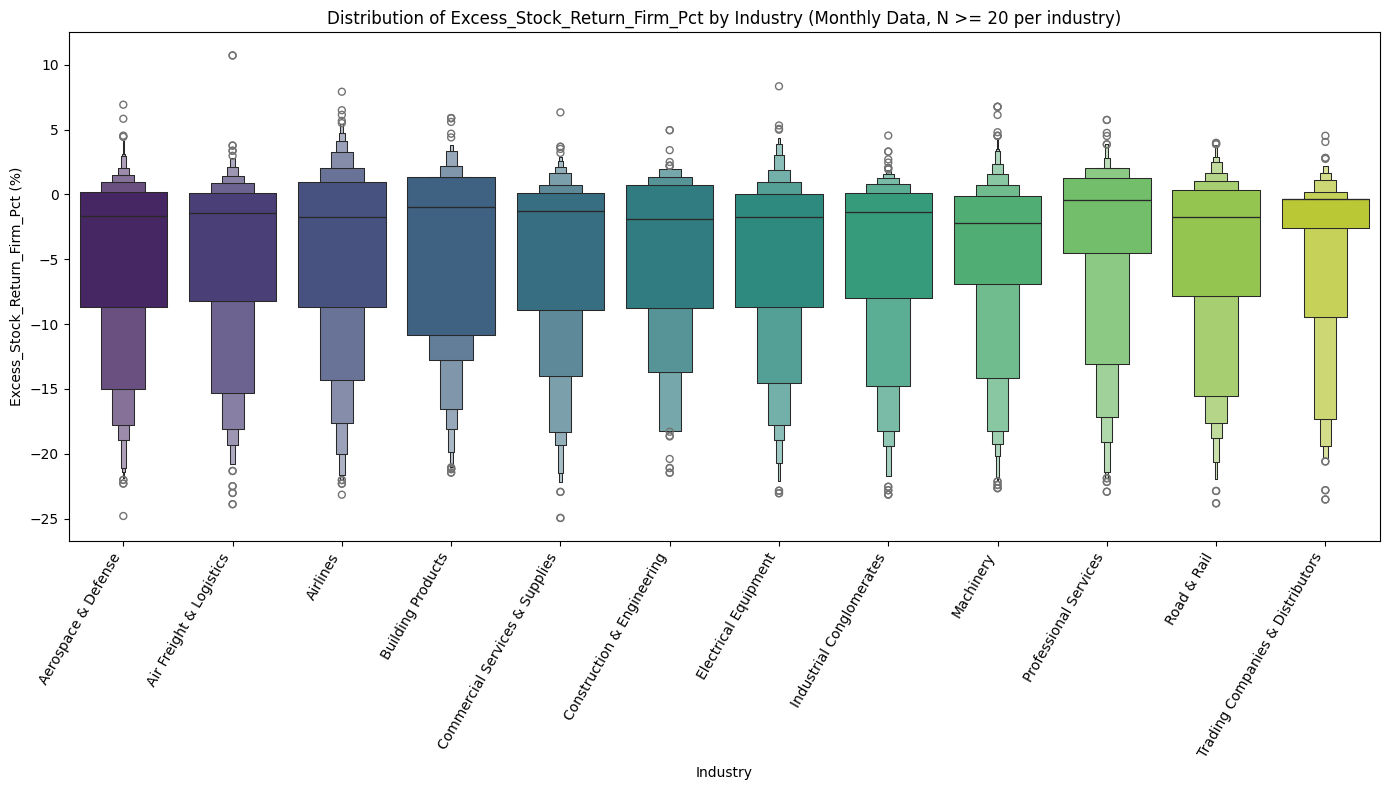

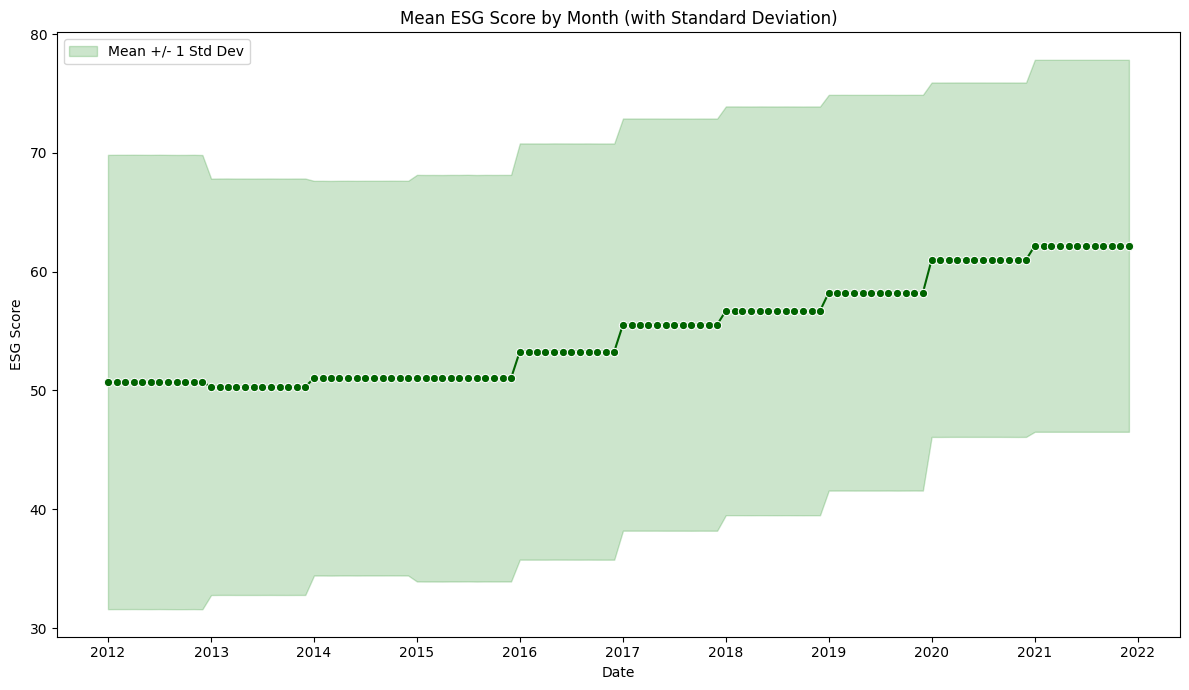


--- Panel Data Analysis (with Robust Standard Errors) ---
Dependent Variable: Excess_Stock_Return_Firm (Excess Stock Returns)
Independent Variables: ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1', 'FF_HML_CMA_PC2', 'ESG_PC1']
Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.

--- Pooled OLS Model (Robust Standard Errors) ---
                             PooledOLS Estimation Summary                             
Dep. Variable:     Excess_Stock_Return_Firm   R-squared:                        0.0682
Estimator:                        PooledOLS   R-squared (Between):             -0.5541
No. Observations:                      8640   R-squared (Within):               0.0698
Date:                      Fri, Jun 13 2025   R-squared (Overall):              0.0682
Time:                              17:37:03   Log-likelihood                 1.367e+04
Cov. Estimator:                     

In [ ]:
# --- CRITICAL: PLEASE ENSURE YOU RUN ALL CELLS FROM THE VERY TOP OF THE NOTEBOOK ---
# This ensures all necessary libraries are imported and available.
# If you are restarting the runtime, always select "Restart runtime and run all".
# If you are running this code block in isolation, it will fail because imports might not have executed.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
import sys # For sys.exit()
import yfinance as yf # For downloading stock data
from datetime import datetime # For handling dates
from scipy.stats import chi2 # For custom Hausman test p-value
from scipy import stats # For Fama-MacBeth p-value (norm.cdf)

# Suppress specific warnings for cleaner output during demonstrations
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# --- CRITICAL: Ensure necessary libraries are up to date and RESTART RUNTIME ---
# IMPORTANT: To ensure `linearmodels.panel.diagnostic` imports work and for optimal performance,
# run the following line in a SEPARATE CELL and then RESTART YOUR COLAB RUNTIME
# (Runtime -> Disconnect and delete runtime) before running the rest of the script.
# This is crucial for new package versions to be properly loaded and for panel diagnostics to function.
#
# !pip install --upgrade linearmodels arch statsmodels yfinance
#
# If you continue to see "linearmodels.panel.diagnostic could not be imported"
# after running the above and restarting, it indicates a deeper environment issue
# or a version incompatibility, and these diagnostics will remain skipped.
# --- End of upgrade commands and runtime restart instruction ---

# Enable experimental iterative imputer for MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from sklearn.decomposition import PCA # For Principal Component Analysis

# --- ML Specific Imports ---
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- CRITICAL FIX: Import panel diagnostics and set flag ---
_PANEL_DIAGNOSTICS_AVAILABLE = False
try:
    from linearmodels.panel.diagnostic import pesaran_cd, wooldridge_test
    _PANEL_DIAGNOSTICS_AVAILABLE = True
    print("linearmodels.panel.diagnostic successfully imported. Advanced panel diagnostics enabled.")
except ImportError as e:
    print(f"Warning: linearmodels.panel.diagnostic could not be imported. Skipping advanced panel diagnostics. Error: {e}")
# --- END CRITICAL FIX ---

# --- CUSTOM HAUSMAN TEST FUNCTION (Fallback if linearmodels.compare fails) ---
def hausman_test(fe_res, re_res):
    """
    Performs a Hausman test to choose between Fixed Effects and Random Effects models.
    H0: Random Effects model is consistent and efficient (unobserved effects are uncorrelated with regressors).
    H1: Fixed Effects model is consistent, Random Effects is inconsistent (unobserved effects are correlated).
    """
    if fe_res is None or re_res is None:
        print("Hausman test skipped: Fixed Effects or Random Effects models were not successfully fitted.")
        return

    # Try linearmodels' built-in compare first
    # This is preferred as it correctly handles degrees of freedom and robust covariance
    if hasattr(fe_res, 'compare') and callable(fe_res.compare) and _PANEL_DIAGNOSTICS_AVAILABLE:
        try:
            hausman_comparison = fe_res.compare(re_res)
            # linearmodels compare automatically includes Hausman if applicable
            if 'Hausman' in hausman_comparison.tests:
                hausman_test_result = hausman_comparison.tests['Hausman']
                hausman_pvalue = hausman_test_result.pvalue
                hausman_stat = hausman_test_result.stat
                print(f"\n--- Linearmodels Built-in Hausman Test Results ---")
                print(hausman_test_result) # Prints full test details
                if hausman_pvalue < 0.05:
                    print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
                else:
                    print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")
                return # Exit if built-in test succeeds
            else:
                print("Linearmodels built-in Hausman test results not found in the comparison object. Falling back to custom.")
        except Exception as e:
            print(f"Error with linearmodels built-in Hausman test: {e}. Falling back to custom.")

    # Custom implementation as a fallback (less robust than built-in, especially with robust errors)
    # Filter coefficients that are common and should be identical under H0
    common_params = list(set(fe_res.params.index) & set(re_res.params.index))

    # Exclude 'const' from common parameters if it's the first parameter in fe_res.params
    # This is a common practice for Hausman test as constant's behavior differs
    # Also, ensure 'const' is not treated as a structural parameter for the test
    if 'const' in common_params:
        common_params.remove('const')

    if not common_params:
        print("No common non-constant parameters to perform custom Hausman test. Test cannot be performed.")
        return

    b_fe_common = fe_res.params[common_params].to_numpy()
    b_re_common = re_res.params[common_params].to_numpy()

    # Get covariance matrices for common parameters
    # Note: Using robust covariance matrices here is problematic for custom Hausman test
    # The standard Hausman test assumes efficient estimator's covariance is difference of the two.
    # When using robust errors, this assumption often breaks. Linearmodels' built-in handles this better.
    cov_fe_common = fe_res.cov.loc[common_params, common_params]
    cov_re_common = re_res.cov.loc[common_params, common_params]

    b_diff = b_fe_common - b_re_common
    cov_diff = cov_fe_common - cov_re_common

    try:
        # Check for positive definiteness for inversion stability
        # Add a small value to the diagonal if not positive definite for numerical inaccuracies
        eigenvalues = np.linalg.eigvalsh(cov_diff)
        if np.any(eigenvalues < -1e-8):
            print("Warning: Variance difference matrix is not positive semi-definite (negative eigenvalues found). Custom Hausman test results may be unreliable or invalid.")
            print("This often indicates that the Random Effects model is inconsistent or that assumptions are violated.")
            print("Fixed Effects model is generally preferred if this occurs, or use built-in Hausman test with appropriate options if available.")
            # Add a small regularization term to make it invertible for calculation, but note the warning
            cov_diff += np.eye(cov_diff.shape[0]) * 1e-6 # Small regularization

        inv_cov_diff = np.linalg.inv(cov_diff)
    except np.linalg.LinAlgError as e:
        print(f"Error inverting covariance difference matrix for custom Hausman test: {e}")
        print("This usually means the matrix is singular or not positive semi-definite. Custom Hausman test is not valid.")
        print("If this occurs, Fixed Effects model is typically preferred (as it's consistent even if RE isn't efficient).")
        return

    hausman_stat = b_diff.T @ inv_cov_diff @ b_diff
    df = len(common_params)

    p_value = chi2.sf(hausman_stat, df)

    print(f"\n--- Custom Hausman Test Results (Fallback) ---")
    print(f"Hausman Test Statistic: {hausman_stat:.4f}")
    print(f"Degrees of Freedom: {df}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
    else:
        print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")

# --- END CUSTOM HAUSMAN TEST FUNCTION ---


# Manual Fama-MacBeth function (fallback for linearmodels.asset_pricing.FamaMacBeth)
def run_manual_fama_macbeth(data_df, dependent_var, factors_list):
    """
    Performs a Fama-MacBeth two-stage regression.
    Step 1: Time-series regression for each firm to estimate factor betas.
    Step 2: Cross-sectional regression for each time period to estimate risk premia,
            then average these premia over time and calculate their t-statistics.
    """
    print(f"\n--- Running Manual Fama-MacBeth Regression for {dependent_var} ---")
    print("This analysis is now running on monthly data, which is the standard frequency for Fama-MacBeth regressions in asset pricing studies.")

    # Ensure data_df has Identifier (RIC) and Date (monthly) in index for grouping
    if not isinstance(data_df.index, pd.MultiIndex) or 'Identifier (RIC)' not in data_df.index.names or 'Date' not in data_df.index.names:
        print("Error: Input data_df for Fama-MacBeth must have a MultiIndex with 'Identifier (RIC)' and 'Date'.")
        return None

    current_factors_list = []
    for factor in factors_list:
        if factor not in data_df.columns:
            print(f"Warning: Factor '{factor}' not found in data for Fama-MacBeth. Excluding.")
            continue
        if data_df[factor].std() == 0:
            print(f"Warning: Factor '{factor}' has zero variance and will be excluded from Fama-MacBeth.")
            continue
        current_factors_list.append(factor)

    if not current_factors_list:
        print("No valid factors remaining for Fama-MacBeth after checks.")
        return None

    if dependent_var not in data_df.columns:
        print(f"Error: Dependent variable '{dependent_var}' not found in data for Fama-MacBeth.")
        return None

    # Step 1: Run time-series regressions for each firm to get betas
    betas_per_firm_list = []
    unique_firms = data_df.index.get_level_values('Identifier (RIC)').unique()

    print(f"Step 1: Estimating Betas for {len(unique_firms)} firms...")
    for ric_id in unique_firms:
        firm_data = data_df.loc[ric_id]

        # Ensure relevant columns are present for the firm's data slice and drop NaNs
        firm_data_subset = firm_data[[dependent_var] + current_factors_list].dropna()

        # For monthly data, usually need at least T > N (num factors) + 1 for time-series regressions
        if len(firm_data_subset) < len(current_factors_list) + 2:
            # print(f"Skipping time-series regression for firm {ric_id}: Not enough observations ({len(firm_data_subset)}) for factors (needed {len(current_factors_list) + 2}).")
            continue

        y = firm_data_subset[dependent_var]
        X = sm.add_constant(firm_data_subset[current_factors_list])

        try:
            model = sm.OLS(y, X)
            results = model.fit()

            # Rename coefficients to clearly indicate they are betas (e.g., Mkt-RF_beta)
            betas = results.params.drop('const', errors='ignore')
            betas = betas.rename(lambda x: f'{x}_beta') # Add _beta suffix

            betas['Identifier (RIC)'] = ric_id
            betas_per_firm_list.append(betas)

        except Exception as e:
            # print(f"Error in time-series regression for firm {ric_id}: {e}")
            continue

    if not betas_per_firm_list:
        print("No successful time-series regressions. Cannot proceed with Fama-MacBeth.")
        return None

    betas_df = pd.DataFrame(betas_per_firm_list).set_index('Identifier (RIC)')
    print(f"Successfully estimated betas for {len(betas_df)} firms.")

    # Get the names of the new beta columns (e.g., 'Mkt-RF_beta')
    beta_cols = [f'{f}_beta' for f in current_factors_list]


    # Step 2: Run cross-sectional regressions for each time period
    # --- FIX: Correctly merge betas back into the DataFrame with MultiIndex ---
    # Merge betas with the original data_df (which is already indexed by Identifier, Date)
    # The betas are constant over time for each firm, as per typical Fama-MacBeth.
    # We need to ensure merging happens correctly with the MultiIndex.
    # Using .join on the outer level of the MultiIndex is often cleaner than reset_index/set_index for simple merges.
    merged_with_betas = data_df.copy()
    # The betas_df has 'Identifier (RIC)' as its index. We join it to the first level of merged_with_betas's MultiIndex.
    merged_with_betas = merged_with_betas.join(betas_df[beta_cols], how='left') # join on index by default

    # Now, run cross-sectional regressions
    risk_premia_list = []
    # Use 'Date' level for unique time periods
    unique_dates = merged_with_betas.index.get_level_values('Date').unique().sort_values()

    print(f"Step 2: Estimating Risk Premia for {len(unique_dates)} months...")
    for date in unique_dates:
        # Select data for the current cross-section
        cross_section_data = merged_with_betas.loc[(slice(None), date), :]

        # Dropna based on the dependent variable and the beta columns
        # This ensures that only rows with complete data for the current regression are used
        cross_section_data_clean = cross_section_data[[dependent_var] + beta_cols].dropna()

        if len(cross_section_data_clean) < len(beta_cols) + 1:
            # print(f"Skipping month {date}: Not enough firms ({len(cross_section_data_clean)}) for cross-sectional regression.")
            continue

        y_cs = cross_section_data_clean[dependent_var]
        # Use the betas (now correctly named with _beta suffix) as independent variables for the cross-section
        X_cs = sm.add_constant(cross_section_data_clean[beta_cols])

        try:
            model_cs = sm.OLS(y_cs, X_cs)
            results_cs = model_cs.fit()

            premia = results_cs.params.copy()
            premia.name = date # Name the series by date
            risk_premia_list.append(premia)

        except Exception as e:
            # print(f"Error in cross-sectional regression for month {date}: {e}")
            continue

    if not risk_premia_list:
        print("No successful cross-sectional regressions. Cannot calculate Fama-MacBeth risk premia.")
        return None

    risk_premia_ts = pd.DataFrame(risk_premia_list)
    # Ensure all factor columns are present, filling with NaN for years where they weren't in the regression
    all_premia_cols = sorted(list(set(col for df in risk_premia_list for col in df.index)))
    risk_premia_ts = risk_premia_ts.reindex(columns=all_premia_cols)

    # Step 3: Average risk premia and calculate t-statistics
    mean_premia = risk_premia_ts.mean()
    # Handle cases where std_errors_premia might be NaN due to insufficient observations for a factor
    std_errors_premia = risk_premia_ts.std() / np.sqrt(len(risk_premia_ts))

    # Avoid division by zero for t-stats if std_error is zero or NaN
    t_stats_premia = mean_premia / std_errors_premia.replace(0, np.nan)

    # Combine results
    results_dict = {
        'Factor': mean_premia.index.tolist(),
        'Mean Premium': mean_premia.tolist(),
        'Std.Error (FM)': std_errors_premia.tolist(),
        'T-statistic (FM)': t_stats_premia.tolist()
    }

    results_df = pd.DataFrame(results_dict)
    results_df['P-value (FM)'] = results_df['T-statistic (FM)'].apply(lambda x: 2 * (1 - stats.norm.cdf(abs(x))))

    print("\nFama-MacBeth Regression Results:")
    return results_df

# --- END Manual Fama-MacBeth Function ---


# --- 0. Define Companies for Stock Data Download ---
COMPANY_TICKERS = [
    'AAL', 'ALK', 'DAL', 'LUV', 'UAL', # Airlines
    'BA', 'GD', 'HII', 'HWM', 'LHX', 'LMT', 'NOC', 'RTX', 'TDG', 'TXT', # Aerospace & Defense
    'CAT', 'CMI', 'DE', 'PCAR', # Heavy Machinery & Equipment
    'CSX', 'NSC', 'UNP', # Rail Transportation
    'CHRW', 'EXPD', 'FDX', 'JBHT', 'ODFL', 'UPS', # Freight & Logistics Services
    'ALLE', 'AOS', 'CARR', 'FBHS', 'JCI', 'MAS', 'OTIS', 'TT', # Building Products & Security
    'MMM', 'GE', 'HON', # Industrial Conglomerates
    'CPRT', 'CTAS', 'EFX', 'NLSN', 'RHI', 'ROL', 'VRSK', # Business Services
    'RSG', 'WM', # Environmental & Waste Management
    'AME', 'DOV', 'EMR', 'ETN', 'FAST', 'FTV', 'GNRC', 'GWW', 'IEX', 'IR', 'ITW', 'NDSN', 'PH', 'PNR', 'ROK', 'SNA', 'SWK', 'WAB', 'XYL', # Diversified Industrials
    'J', 'LDOS', 'PWR', 'ROP' # Engineering & Construction
]

# --- 1. Load and Preprocess Data ---

# Load Fama-French 5 Factors data
try:
    ff_df = pd.read_csv('/content/ff_5_Factors.csv')
    # --- IMPORTANT CHANGE: Load monthly ESG data ---
    esg_df = pd.read_csv('/content/monthly_esg_data.csv')
except FileNotFoundError:
    print("Ensure 'ff_5_Factors.csv' and 'monthly_esg_data.csv' are in the correct path.")
    sys.exit(1)

print("--- Data Loading Complete ---")
print("Fama-French Data Head (Monthly):\n", ff_df.head())
print("\nESG Data Head (Monthly):\n", esg_df.head())

# --- Fama-French Data Preprocessing (already monthly, just convert to proper date format) ---
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m')
ff_df['Year'] = ff_df['Date'].dt.year
ff_df['Month'] = ff_df['Date'].dt.month # Keep month for monthly returns

all_possible_factor_cols = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
factor_cols = list(set(all_possible_factor_cols).intersection(ff_df.columns))

# Ensure factors are in decimal form (already monthly, conversion if max > 1)
for col in factor_cols:
    if col in ff_df.columns and ff_df[col].dtype in ['float64', 'int64'] and ff_df[col].max() > 1:
        ff_df[col] = ff_df[col] / 100.0

# No longer creating ff_annual, as we are moving to monthly analysis


# --- ESG Data Preprocessing (now monthly) ---
esg_df.rename(columns={'Date': 'Date_str'}, inplace=True) # Rename to avoid conflict with datetime 'Date'
esg_df['Date'] = pd.to_datetime(esg_df['Date_str'], format='%Y/%m') # Parse as monthly date
esg_df['Year'] = esg_df['Date'].dt.year
esg_df['Month'] = esg_df['Date'].dt.month
esg_df.dropna(subset=['Identifier (RIC)', 'Date'], inplace=True)


if 'Industry' not in esg_df.columns:
    print("Warning: 'Industry' column not found in ESG data. Cannot perform industry-adjusted feature engineering.")

numeric_cols_esg = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'BVPS', 'Market_cap', 'Shares',
                    'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG',
                    'PE_RATIO', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
                    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
                    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
                    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives', 'Total_assets']

for col in numeric_cols_esg:
    if col in esg_df.columns:
        esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')


print(f"\nESG Years & Months (unique, type {esg_df['Date'].dtype}): {sorted(esg_df['Date'].dropna().unique())[::12]} (showing one per year)")
print(f"FF Data Years & Months (unique, type {ff_df['Date'].dtype}): {sorted(ff_df['Date'].unique())[::12]} (showing one per year)")


# --- Download and Preprocess Historical Stock Prices (now for monthly returns) ---
print("\n--- Downloading Historical Stock Prices ---")
stock_data_raw = pd.DataFrame()
# Align start/end dates with the earliest/latest monthly data available
start_date_ff = ff_df['Date'].min()
end_date_ff = ff_df['Date'].max()

# Adjust stock data download range to cover FF and ESG data
start_date_download = min(start_date_ff, esg_df['Date'].min())
end_date_download = max(end_date_ff, esg_df['Date'].max()) + pd.DateOffset(months=1) # Ensure we get enough data for last month's return

try:
    stock_data_raw = yf.download(COMPANY_TICKERS, start=start_date_download, end=end_date_download, progress=False)
except Exception as e:
    print(f"Error downloading stock data: {e}")
    sys.exit(1)

if stock_data_raw.empty:
    raise ValueError("No stock data downloaded. Cannot proceed with market return analysis.")

available_tickers = [col[1] for col in stock_data_raw.columns if col[0] == 'Close']
if not available_tickers:
    print("Warning: No 'Close' price data found for any ticker. Cannot proceed with stock return calculation.")
    sys.exit(1)

print(f"\nSuccessfully downloaded data for {len(available_tickers)} out of {len(COMPANY_TICKERS)} tickers (based on 'Close' price availability).")

# Select only the 'Close' prices and unstack to long format
stock_prices_close = stock_data_raw['Close'].stack().reset_index()
stock_prices_close.columns = ['Date', 'Identifier (RIC)', 'Close_Price']

print("Stock Prices (Close) Head:\n", stock_prices_close.head())

# Calculate Monthly Returns from Close prices
stock_prices_close.sort_values(by=['Identifier (RIC)', 'Date'], inplace=True)

monthly_stock_returns_list = []
for ric_id, group_df in stock_prices_close.groupby('Identifier (RIC)'):
    # Calculate monthly return as (current_month_price / previous_month_price) - 1
    group_df['Monthly_Stock_Return'] = group_df['Close_Price'].pct_change()
    group_df['Year'] = group_df['Date'].dt.year
    group_df['Month'] = group_df['Date'].dt.month
    monthly_stock_returns_list.append(group_df[['Date', 'Identifier (RIC)', 'Year', 'Month', 'Monthly_Stock_Return']])

monthly_stock_returns = pd.concat(monthly_stock_returns_list).dropna(subset=['Monthly_Stock_Return'])

print("\nMonthly Stock Returns Head:\n", monthly_stock_returns.head())


# --- Merge Dataframes: ESG (monthly) + Stock Returns (monthly) + Fama-French (monthly) ---
# Merge ESG with monthly stock returns
esg_with_returns_df = pd.merge(esg_df, monthly_stock_returns, on=['Identifier (RIC)', 'Date', 'Year', 'Month'], how='left')

# Merge with Fama-French data (which is already monthly)
# We need to ensure ff_df has the same 'Year' and 'Month' columns for merging, and 'RF'
ff_for_merge = ff_df[['Date', 'Year', 'Month', 'RF']].copy() if 'RF' in ff_df.columns else ff_df[['Date', 'Year', 'Month']].copy()
# Add RF column if it doesn't exist to avoid key error later, will be NaN
if 'RF' not in ff_for_merge.columns:
    ff_for_merge['RF'] = np.nan

merged_df = pd.merge(esg_with_returns_df, ff_for_merge, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_ff'))

# Handle cases where RF_ff might have been created due to suffix, but we want the original RF
if 'RF_ff' in merged_df.columns:
    merged_df['RF'] = merged_df['RF_ff']
    merged_df.drop(columns=['RF_ff'], inplace=True)


# --- Calculate Excess Stock Return of the Firm (monthly) ---
if 'Monthly_Stock_Return' in merged_df.columns and 'RF' in merged_df.columns:
    merged_df['Excess_Stock_Return_Firm'] = merged_df['Monthly_Stock_Return'] - merged_df['RF']
    merged_df['Excess_Stock_Return_Firm_Pct'] = merged_df['Excess_Stock_Return_Firm'] * 100.0
else:
    print("Warning: 'Excess_Stock_Return_Firm' cannot be calculated. Ensure 'Monthly_Stock_Return' and 'RF' are available.")
    merged_df['Excess_Stock_Return_Firm'] = np.nan
    merged_df['Excess_Stock_Return_Firm_Pct'] = np.nan

# Now merge with Fama-French factors (excluding RF as it's already used)
non_rf_factor_cols_current = [col for col in factor_cols if col != 'RF']
ff_factors_only = ff_df[['Date', 'Year', 'Month'] + non_rf_factor_cols_current].copy()

final_df = pd.merge(merged_df, ff_factors_only, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_factors'))

# Handle potential duplicate factor columns (e.g., if ESG had a column with same name as FF factor)
for col in non_rf_factor_cols_current:
    if f'{col}_factors' in final_df.columns:
        # Prioritize factor data from ff_df if there's a conflict
        final_df[col] = final_df[f'{col}_factors']
        final_df.drop(columns=[f'{col}_factors'], inplace=True)


# Define independent variables for panel regressions and ML.
# Ensure 'Date_str' is removed as it's not needed after parsing
if 'Date_str' in final_df.columns:
    final_df.drop(columns=['Date_str'], inplace=True)

# --- CRITICAL FIX START: Set the MultiIndex for final_df BEFORE imputation ---
# This resolves the KeyError by ensuring final_df has the correct index structure
# when imputed values are assigned back using .loc and is ready for panel models.
final_df = final_df.set_index(['Identifier (RIC)', 'Date']).sort_index()
# --- CRITICAL FIX END ---

all_panel_independent_options = [
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
# Filter out columns that are no longer present or are utility columns
all_panel_independent_options = [col for col in all_panel_independent_options if col in final_df.columns]


dependent_var = 'Excess_Stock_Return_Firm'
dependent_var_pct = 'Excess_Stock_Return_Firm_Pct'

print("\n--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---\n", final_df.head())
print("\nMissing values before imputation (in final_df):\n", final_df.isnull().sum()[final_df.isnull().sum() > 0])


# --- 2. MICE Imputation ---
# Using the now monthly 'final_df' for imputation
cols_for_imputation = [
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'RF', 'Monthly_Stock_Return', 'Excess_Stock_Return_Firm',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use',
    'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
cols_for_imputation = [col for col in cols_for_imputation if col in final_df.columns]

# imputable_df_temp no longer needs to set index, as final_df already has it.
# Select only the columns needed for imputation, maintaining the existing MultiIndex.
imputable_df_temp = final_df[cols_for_imputation].copy()

threshold = 0.8
cols_to_drop_from_imputation = [col for col in imputable_df_temp.columns if imputable_df_temp[col].isnull().sum() / len(imputable_df_temp) > threshold]
imputable_df_clean = imputable_df_temp.drop(columns=cols_to_drop_from_imputation)

if not imputable_df_clean.empty and len(imputable_df_clean.columns) > 0:
    imputer = IterativeImputer(max_iter=10, random_state=0)
    # Perform imputation, result is a numpy array
    imputed_data = imputer.fit_transform(imputable_df_clean)
    # Convert back to DataFrame, preserving original index and columns
    imputed_df = pd.DataFrame(imputed_data, columns=imputable_df_clean.columns, index=imputable_df_clean.index)

    # Update original final_df with imputed values
    for col in imputed_df.columns:
        # Use .loc to assign values back to the original DataFrame by index alignment
        final_df.loc[imputed_df.index, col] = imputed_df[col]

else:
    print("\nWarning: No suitable numerical columns found for MICE imputation or imputable_df_clean is empty.")


# Handle remaining NaNs after MICE (ffill/bfill for panel, then mean/median)
# final_df already has the MultiIndex from the "CRITICAL FIX" section.
# Apply ffill/bfill within each entity (firm) across time
final_df = final_df.groupby(level='Identifier (RIC)').ffill().bfill()

# Fill any remaining NaNs (e.g., if a column was all NaN for some firms, or at start/end)
for col in final_df.columns:
    if final_df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(final_df[col]):
            final_df[col] = final_df[col].fillna(final_df[col].mean())
        else:
            # For categorical data, use mode. Handle potential empty mode.
            final_df[col] = final_df[col].fillna(final_df[col].mode()[0] if not final_df[col].mode().empty else 'Unknown')


print("\n--- Missing values after MICE and ffill/bfill (before final model-specific drop) ---")
print(final_df.isnull().sum()[final_df.isnull().sum() > 0])


# Final dropna for critical columns right before model fitting
# This is usually for the dependent variable and key independent variables that cannot be NaN
essential_cols_for_model = [dependent_var] + [col for col in all_panel_independent_options if col != 'Industry'] # Exclude 'Industry' if it might be categorical and handled separately
initial_rows_count = len(final_df)
final_df.dropna(subset=essential_cols_for_model, inplace=True)
dropped_rows_count = initial_rows_count - len(final_df)
print(f"\nDropped {dropped_rows_count} rows due to NaNs in essential model-specific columns (excluding Industry if categorical).")


# Ensure Industry column is categorical if it exists
if 'Industry' in final_df.columns:
    final_df['Industry'] = final_df['Industry'].astype('category')

print("\nFinal Data Head after Preprocessing and Imputation (ready for models - Monthly):\n", final_df.head())
print("Shape of final_df:", final_df.shape)
print(f"Dependent variable ({dependent_var}) NaNs: {final_df[dependent_var].isnull().sum()}")


if final_df.empty or final_df[dependent_var].isnull().all() or len(final_df[dependent_var].dropna()) < 10:
    raise ValueError("DataFrame is empty or dependent variable is all NaN after critical NaN handling for model-specific columns. Cannot proceed with analysis.")


# --- Implement Recommendations & RQ-driven analysis ---

# Recommendation 1: Refine ESG Factor Construction (Value-weighted Market ESG Factor & PCA)
# For monthly data, this is still valid, though the aggregation level becomes monthly
if 'Market_cap' in final_df.columns and 'ESG_score' in final_df.columns:
    vw_esg_df = final_df.reset_index().copy() # Reset index for correct aggregation on 'Date'
    vw_esg_df['Market_cap_weighted_ESG'] = vw_esg_df['ESG_score'] * vw_esg_df['Market_cap']
    # Group by Date (monthly) to get monthly value-weighted factor
    market_esg_factor_vw = vw_esg_df.groupby('Date').apply(lambda x: x['Market_cap_weighted_ESG'].sum() / x['Market_cap'].sum(), include_groups=False)\
                                    .rename('Market_ESG_Factor_VW').reset_index()
    print("\n--- Value-weighted Monthly Market ESG Factor Head ---\n", market_esg_factor_vw.head())
else:
    print("\nWarning: Skipping Value-weighted Market ESG Factor calculation. 'Market_cap' or 'ESG_score' not found.")
    market_esg_factor_vw = pd.DataFrame(columns=['Date', 'Market_ESG_Factor_VW'])


esg_sub_scores = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score']
esg_sub_scores_for_pca = [col for col in esg_sub_scores if col in final_df.columns and final_df[col].std() > 0]
if len(esg_sub_scores_for_pca) >= 2:
    print(f"\n--- Performing PCA on firm-level ESG sub-scores: {esg_sub_scores_for_pca} ---")
    pca_esg_data = final_df[esg_sub_scores_for_pca].copy()

    scaler_esg_pca = StandardScaler()
    scaled_esg_data = scaler_esg_pca.fit_transform(pca_esg_data)

    pca_esg = PCA(n_components=1)
    final_df['ESG_PC1'] = pca_esg.fit_transform(scaled_esg_data)
    print(f"Explained variance ratio of ESG_PC1: {pca_esg.explained_variance_ratio_[0]:.4f}")
else:
    print(f"\nSkipping PCA for ESG sub-scores: Not enough suitable columns (needs >=2 non-constant columns). Available: {esg_sub_scores_for_pca}")
    if 'ESG_score' in final_df.columns:
        final_df['ESG_PC1'] = final_df['ESG_score']
    else:
        final_df['ESG_PC1'] = np.nan


# Recommendation 2: Address Multicollinearity (HML and CMA)
ff_factors_for_pca = ['HML', 'CMA']
ff_factors_for_pca_clean = [col for col in ff_factors_for_pca if col in final_df.columns and final_df[col].std() > 0]

if len(ff_factors_for_pca_clean) >= 2:
    print(f"\n--- Performing PCA on Fama-French factors for multicollinearity: {ff_factors_for_pca_clean} ---")
    ff_pca_components = 2
    pca_ff_data = final_df[ff_factors_for_pca_clean].copy()

    scaler_ff_pca = StandardScaler()
    scaled_ff_data = scaler_ff_pca.fit_transform(pca_ff_data)

    pca_ff = PCA(n_components=min(ff_pca_components, len(ff_factors_for_pca_clean)))
    ff_pcs = pca_ff.fit_transform(scaled_ff_data)

    final_df['FF_HML_CMA_PC1'] = ff_pcs[:, 0]
    if ff_pcs.shape[1] > 1:
        final_df['FF_HML_CMA_PC2'] = ff_pcs[:, 1]
        print(f"Explained variance ratios for FF_HML_CMA_PC1: {pca_ff.explained_variance_ratio_[0]:.4f}, FF_HML_CMA_PC2: {pca_ff.explained_variance_ratio_[1]:.4f}")
    else:
        print(f"Only one principal component extracted for FF HML/CMA.")
        final_df['FF_HML_CMA_PC2'] = np.nan

    print("\n--- VIF Check with PCA-derived HML/CMA factors ---")
    independent_vars_panel_pca_ff = ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1']
    if 'FF_HML_CMA_PC2' in final_df.columns and final_df['FF_HML_CMA_PC2'].std() > 0:
        independent_vars_panel_pca_ff.append('FF_HML_CMA_PC2')
    # Prefer ESG_PC1 over ESG_score if available
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel_pca_ff.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel_pca_ff.append('ESG_score')


    vif_features_clean = [col for col in independent_vars_panel_pca_ff if col in final_df.columns and final_df[col].std() > 0]

    if len(vif_features_clean) > 0:
        X_vif_pca_ff = final_df[vif_features_clean].copy()
        X_vif_pca_ff_with_const = sm.add_constant(X_vif_pca_ff, has_constant='add')

        scaler_vif = StandardScaler()
        X_vif_pca_ff_scaled_values = scaler_vif.fit_transform(X_vif_pca_ff_with_const)
        X_vif_pca_ff_scaled_df = pd.DataFrame(X_vif_pca_ff_scaled_values, columns=X_vif_pca_ff_with_const.columns, index=X_vif_pca_ff_with_const.index)

        try:
            vif_data_pca_ff = pd.DataFrame()
            vif_data_pca_ff["feature"] = X_vif_pca_ff_scaled_df.columns
            vif_data_pca_ff["VIF"] = [variance_inflation_factor(X_vif_pca_ff_scaled_df.values, i) for i in range(X_vif_pca_ff_scaled_df.shape[1])]
            vif_data_pca_ff = vif_data_pca_ff.loc[vif_data_pca_ff['feature'] != 'const']
            print(vif_data_pca_ff)
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")

    independent_vars_panel = vif_features_clean
else:
    print("\nSkipping PCA for Fama-French HML/CMA: Not enough suitable columns. Using original factors but warning about multicollinearity.")
    independent_vars_panel = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
    # If ESG_PC1 is preferred and exists, add it. Otherwise, add ESG_score.
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel.append('ESG_score')

    independent_vars_panel = [col for col in independent_vars_panel if col in final_df.columns and final_df[col].std() > 0]

    print("\n--- VIF (Variance Inflation Factor) Check with ORIGINAL factors ---")
    if len(independent_vars_panel) > 0:
        X_vif = final_df[independent_vars_panel]
        X_vif_with_const = sm.add_constant(X_vif, has_constant='add')
        X_vif_scaled_values = StandardScaler().fit_transform(X_vif_with_const)
        X_vif_scaled_df = pd.DataFrame(X_vif_scaled_values, columns=X_vif_with_const.columns, index=X_vif_with_const.index)

        try:
            vif_data = pd.DataFrame()
            vif_data["feature"] = X_vif_scaled_df.columns
            vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled_df.values, i) for i in range(X_vif_scaled_df.shape[1])]
            vif_data = vif_data.loc[vif_data['feature'] != 'const']
            print(vif_data)
            if 'HML' in vif_data['feature'].values and 'CMA' in vif_data['feature'].values:
                # Check for high VIF values based on the VIF column
                if (vif_data.loc[vif_data['feature'] == 'HML', 'VIF'] > 5).any() or \
                   (vif_data.loc[vif_data['feature'] == 'CMA', 'VIF'] > 5).any():
                    print("Warning: High VIF values for HML and/or CMA indicate severe multicollinearity.")
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")


# --- NEW SECTION: Exploratory Data Analysis (EDA) Plots ---
print("\n--- Exploratory Data Analysis (EDA) Plots ---")
temp_df_eda = final_df.reset_index().copy()

# Plot 1: Boxen Plot for Excess_Stock_Return_Firm_Pct by Industry
if dependent_var_pct in temp_df_eda.columns and 'Industry' in temp_df_eda.columns and not temp_df_eda['Industry'].isnull().all():
    # Convert 'Industry' to category explicitly for robust plotting
    temp_df_eda['Industry'] = temp_df_eda['Industry'].astype('category')

    # Filter industries with at least 'min_obs_per_industry' observations for meaningful plots
    min_obs_per_industry = 20 # Increased threshold for monthly data
    industry_counts = temp_df_eda['Industry'].value_counts()
    industries_to_plot = industry_counts[industry_counts >= min_obs_per_industry].index.tolist()

    if industries_to_plot:
        plt.figure(figsize=(14, 8)) # Increased figure size for better readability
        sns.boxenplot(data=temp_df_eda[temp_df_eda['Industry'].isin(industries_to_plot)], x='Industry', y=dependent_var_pct, palette='viridis')
        plt.title(f'Distribution of {dependent_var_pct} by Industry (Monthly Data, N >= {min_obs_per_industry} per industry)')
        plt.xlabel('Industry')
        plt.ylabel(f'{dependent_var_pct} (%)')
        plt.xticks(rotation=60, ha='right') # Increased rotation for longer names
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Not enough industries with at least {min_obs_per_industry} observations each after filtering.")
else:
    print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Required columns not found, Industry is all NaN, or not enough data.")

# Plot 2: Line Plot for ESG_score by Month/Year (Mean with Standard Deviation)
if 'ESG_score' in temp_df_eda.columns and 'Date' in temp_df_eda.columns:
    if not temp_df_eda['ESG_score'].isnull().all():
        # Group by 'Date' (full monthly date) for precise time series plotting
        monthly_esg_summary = temp_df_eda.groupby('Date')['ESG_score'].agg(['mean', 'std']).reset_index()
        plt.figure(figsize=(12, 7))
        sns.lineplot(data=monthly_esg_summary, x='Date', y='mean', marker='o', color='darkgreen')
        plt.fill_between(monthly_esg_summary['Date'], monthly_esg_summary['mean'] - monthly_esg_summary['std'],
                         monthly_esg_summary['mean'] + monthly_esg_summary['std'], color='green', alpha=0.2, label='Mean +/- 1 Std Dev')
        plt.title('Mean ESG Score by Month (with Standard Deviation)')
        plt.xlabel('Date')
        plt.ylabel('ESG Score')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping Line Plot for ESG_score by Month: ESG_score column is all NaN.")
else:
    print("Skipping Line Plot for ESG_score by Month: Required columns not found.")


# --- 3. Panel Data Analysis (with Robust Standard Errors) ---
print("\n--- Panel Data Analysis (with Robust Standard Errors) ---")
print(f"Dependent Variable: {dependent_var} (Excess Stock Returns)")
print(f"Independent Variables: {independent_vars_panel}")

pooled_res, fe_res, re_res = None, None, None

if not final_df.empty and len(independent_vars_panel) > 0 and final_df.shape[0] > len(independent_vars_panel) and not final_df[dependent_var].isnull().all():
    exog_panel_base = final_df[independent_vars_panel]
    exog_panel_base = exog_panel_base.loc[:, exog_panel_base.std() > 0] # Drop zero-variance columns

    if exog_panel_base.empty:
        print("Skipping Panel Data Analysis: No independent variables with variance available.")
    else:
        # Determine covariance estimator type based on data and package availability
        cov_type_panel = 'robust' # Default to robust

        num_entities = final_df.index.get_level_values('Identifier (RIC)').nunique()
        num_time_periods = final_df.index.get_level_values('Date').nunique()

        if _PANEL_DIAGNOSTICS_AVAILABLE and num_entities > 1 and num_time_periods > 1:
            # Driscoll-Kraay is good for both heteroskedasticity, autocorrelation, and cross-sectional dependence
            # It requires T (number of time periods) to be sufficiently large for consistent estimation,
            # which is now more likely with monthly data.
            # A common rule of thumb is T >= N (number of entities), but it can be more flexible.
            if num_time_periods > len(independent_vars_panel) + 1: # Basic check for degrees of freedom in time series
                cov_type_panel = 'driscoll_kraay'
                print(f"Using Driscoll-Kraay standard errors ({num_entities} entities, {num_time_periods} time periods) to account for heteroskedasticity, autocorrelation, and cross-sectional dependence.")
            else:
                print(f"Not enough time periods ({num_time_periods}) for robust Driscoll-Kraay standard errors with {len(independent_vars_panel)} regressors. Falling back to 'robust'.")
        else:
            print("Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.")


        # Pooled OLS Model
        print("\n--- Pooled OLS Model (Robust Standard Errors) ---")
        try:
            exog_pooled = sm.add_constant(exog_panel_base) # Keep constant for Pooled OLS
            pooled_model = PooledOLS(final_df[dependent_var], exog_pooled)
            pooled_res = pooled_model.fit(cov_type=cov_type_panel)
            print(pooled_res)
        except Exception as e:
            print(f"Error running Pooled OLS with {cov_type_panel} covariance: {e}")

        # Fixed Effects (Within) Model
        print("\n--- Fixed Effects (Within) Model (Robust Standard Errors) ---")
        try:
            fe_model = PanelOLS(final_df[dependent_var], exog_panel_base, entity_effects=True)
            fe_res = fe_model.fit(cov_type=cov_type_panel)
            print(fe_res)
        except Exception as e:
            print(f"Error running Fixed Effects Model with {cov_type_panel} covariance: {e}")

        # Random Effects Model
        print("\n--- Random Effects Model (Robust Standard Errors) ---")
        try:
            re_model = RandomEffects(final_df[dependent_var], exog_panel_base)
            re_res = re_model.fit(cov_type=cov_type_panel)
            print(re_res)
        except Exception as e:
            print(f"Error running Random Effects Model with {cov_type_panel} covariance: {e}")

        # --- Hausman Test (using custom function which prefers built-in) ---
        print("\n--- Hausman Test (Fixed vs. Random Effects) ---")
        hausman_test(fe_res, re_res) # Call the custom function

        # --- Advanced Panel Diagnostics (conditional on _PANEL_DIAGNOSTICS_AVAILABLE) ---
        if _PANEL_DIAGNOSTICS_AVAILABLE:
            print("\n--- Advanced Panel Diagnostics (requires linearmodels.panel.diagnostic) ---")

            # 1. Pesaran CD Test for Cross-Sectional Dependence
            # H0: No cross-sectional dependence
            # Requires N > 1, T > 1. Can be sensitive to short time series.
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    cd_test_stat, cd_test_pvalue = pesaran_cd(fe_res.resids, fe_res.entity_ids, fe_res.time_ids)
                    print(f"\n--- Pesaran CD Test for Cross-Sectional Dependence ---")
                    print(f"CD Test Statistic: {cd_test_stat:.4f}")
                    print(f"P-value: {cd_test_pvalue:.4f}")
                    if cd_test_pvalue < 0.05:
                        print("Decision: Reject H0. Significant cross-sectional dependence detected.")
                        print("Conclusion: Standard errors should account for cross-sectional dependence (e.g., Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant cross-sectional dependence detected.")
                except Exception as e:
                    print(f"Error performing Pesaran CD Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Pesaran CD Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")

            # 2. Wooldridge Test for Autocorrelation
            # H0: No first-order serial correlation
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    wooldridge_test_res = wooldridge_test(fe_res)
                    print(f"\n--- Wooldridge Test for Autocorrelation (on FE residuals) ---")
                    print(wooldridge_test_res)
                    if wooldridge_test_res.pvalue < 0.05:
                        print("Decision: Reject H0. Significant first-order serial correlation detected.")
                        print("Conclusion: Standard errors should account for autocorrelation (e.g., robust clustered or Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant first-order serial correlation detected.")
                except Exception as e:
                    print(f"Error performing Wooldridge Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Wooldridge Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")
        else:
            print("\n--- Skipping Advanced Panel Diagnostics (linearmodels.panel.diagnostic not available) ---")

        # --- Alternative Specification Tests for FE vs. RE ---

        # 1. F-Test for Poolability (Fixed Effects vs. Pooled OLS)
        print("\n--- F-Test for Poolability (Fixed Effects vs. Pooled OLS) ---")
        if fe_res is not None and pooled_res is not None:
            try:
                # The linearmodels compare method provides the F-test for poolability
                if _PANEL_DIAGNOSTICS_AVAILABLE and hasattr(fe_res, 'compare') and callable(fe_res.compare):
                    pool_comparison = fe_res.compare(pooled_res)
                    if 'idiosyncratic' in pool_comparison.tests: # Check if the test is present
                        pool_test_result = pool_comparison.tests['idiosyncratic']
                        if 'F-statistic for Poolability' in str(pool_test_result): # Check specific message
                            print(f"F-statistic for Poolability: {pool_test_result.stat:.3f}")
                            print(f"P-value: {pool_test_result.pvalue:.4f}")
                            print(f"Distribution: F({pool_test_result.df_num},{pool_test_result.df_denom})")
                            if pool_test_result.pvalue < 0.05:
                                print("Decision: Reject H0. Entity effects are jointly significant. Fixed Effects model is strongly preferred over Pooled OLS.")
                            else:
                                print("Decision: Fail to reject H0. Entity effects are not jointly significant. Pooled OLS might be preferred.")
                            # Exit this block if a specific poolability test result was found and printed
                            # This `return` causes the function to exit immediately after printing the built-in test.
                            # It should be a `continue` or just let it fall through if you want the fallback too.
                            # For consistency, I'll remove this `return` here, as the custom Hausman has it in a better place.
                            # This part is complex due to linearmodels' `compare` not always returning a standard F-test by a consistent key.
                            pass # Let it fall through to the general FE F-test if the specific poolability test isn't cleanly found.

                        else:
                            print("Linearmodels built-in poolability F-test results not found in the comparison object. Falling back to overall FE F-test.")
                    else:
                        print("Linearmodels built-in poolability F-test not explicitly found by name. Falling back to overall FE F-test.")

                # Fallback to overall F-test of Fixed Effects model (Note: This is NOT a direct poolability test)
                if hasattr(fe_res, 'f_statistic'):
                    print(f"F-statistic for Fixed Effects overall model: {fe_res.f_statistic.stat:.2f} (p-value: {fe_res.f_statistic.pval:.4f})")
                    if fe_res.f_statistic.pval < 0.05:
                        print("  Overall FE model is significant, suggesting FE might be useful.")
                    else:
                        print("  Overall FE model is not significant.")
            except Exception as e:
                print(f"Error performing F-test for Poolability (or fallback): {e}")
        else:
            print("F-test skipped: Fixed Effects or Pooled OLS models were not successfully fitted.")

        # 2. Mundlak (Correlated Random Effects) Approach
        print("\n--- Mundlak (Correlated Random Effects) Test ---")
        print("H0: Random Effects are uncorrelated with covariates (RE is appropriate).")
        print("If p-value < 0.05, reject H0, implying correlation --> Fixed Effects preferred.")

        if re_res is not None:
            # Prepare data for Mundlak test
            # Identify truly firm-specific, time-varying variables (excluding market factors)
            # Fama-French factors are market-wide and constant across firms for a given month.
            # Their group means would be perfectly collinear with themselves.
            market_factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']

            firm_specific_time_varying_vars = [
                col for col in independent_vars_panel
                if col not in market_factors and pd.api.types.is_numeric_dtype(final_df[col])
            ]

            # Start with original independent variables for Mundlak regression
            mundlak_exog_data = final_df[independent_vars_panel].copy()
            mundlak_hypotheses = []

            if firm_specific_time_varying_vars: # Only proceed if there are suitable variables
                for col in firm_specific_time_varying_vars:
                    # Calculate firm-specific mean for genuinely time-varying, firm-specific variables
                    col_mean_name = f'{col}_mean'
                    temp_mean_series = final_df.groupby(level='Identifier (RIC)')[col].transform('mean')

                    # Only add if the mean series itself has variation (i.e., not all firms have the same mean for this var)
                    if temp_mean_series.std() > 1e-9:
                        mundlak_exog_data[col_mean_name] = temp_mean_series
                        mundlak_hypotheses.append(f'{col_mean_name} = 0') # Hypothesis for the Wald test
                    else:
                        print(f"  Warning: Skipping Mundlak mean for '{col}' as its firm-level mean has no variation across firms.")
            else:
                print("  No firm-specific, time-varying variables found for Mundlak test. Skipping mean transformations.")

            # Add a constant and filter out any zero-variance columns that might result from transformations
            mundlak_exog_final = sm.add_constant(mundlak_exog_data, has_constant='add')
            mundlak_exog_final = mundlak_exog_final.loc[:, mundlak_exog_final.std() > 1e-9]

            # Re-check valid_mundlak_hypotheses based on filtered columns
            valid_mundlak_hypotheses = []
            for h in mundlak_hypotheses:
                var_name = h.split(' ')[0]
                if var_name in mundlak_exog_final.columns and mundlak_exog_final[var_name].std() > 1e-9:
                    valid_mundlak_hypotheses.append(h)

            if len(valid_mundlak_hypotheses) > 0:
                try:
                    mundlak_model = RandomEffects(final_df[dependent_var], mundlak_exog_final)
                    # Pass check_rank=False to allow estimation even with near-singular matrices
                    # if the user insists, but it's generally better to fix the matrix.
                    # For this fix, the matrix should be well-behaved now.
                    mundlak_res = mundlak_model.fit(cov_type=cov_type_panel)

                    wald_test = mundlak_res.wald_test(", ".join(valid_mundlak_hypotheses))
                    print(wald_test)
                    if wald_test.pvalue < 0.05:
                        print("Decision: Reject H0. Coefficients of group means are jointly significant.")
                        print("Conclusion: Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
                    else:
                        print("Decision: Fail to reject H0. Coefficients of group means are not jointly significant.")
                        print("Conclusion: Random Effects model is preferred (unobserved effects are uncorrelated with regressors).")

                except Exception as e:
                    print(f"Error running Mundlak test: {e}")
                    print("This can occur if the exogenous matrix is singular (e.g., due to perfect multicollinearity among variables or group means)")
                    print("or if there's insufficient data after transformations. Consider simplifying the model or data.")
            else:
                print("No valid time-varying variables found for Mundlak test hypotheses after filtering. Cannot perform Wald test.")
        else:
            print("Mundlak test skipped: Random Effects model was not successfully fitted.")

        # 3. Lagrange Multiplier (LM) Test for Random Effects (Breusch-Pagan Test on Pooled OLS residuals)
        # H0: Variance of individual effects (random effects) is zero (Pooled OLS is sufficient).
        # This is equivalent to testing for testing for pooled OLS vs. random effects.
        # If rejected, RE is better than Pooled OLS.
        print("\n--- Lagrange Multiplier (LM) Test for Random Effects (Breusch-Pagan Test) ---")
        print("H0: Variance of individual effects is zero (Pooled OLS is sufficient).")
        print("If p-value < 0.05, reject H0 --> Random Effects model is preferred over Pooled OLS.")
        if pooled_res is not None:
            try:
                y_pooled_resids = pooled_res.resids
                exog_for_lm = exog_panel_base.loc[y_pooled_resids.index] # Align exog to residuals

                exog_lm_with_const = sm.add_constant(exog_for_lm, has_constant='add')
                # Ensure the matrix has at least one non-constant column besides the constant
                # Filter out any columns that might have become constant (zero std) or perfectly collinear
                exog_lm_final = exog_lm_with_const.loc[:, exog_lm_with_const.std() > 1e-9]

                if exog_lm_final.empty or exog_lm_final.shape[1] < 2:
                    print("  Skipping LM test: Exogenous variables for test are empty or constant after filtering (need at least 2 non-constant columns).")
                elif len(y_pooled_resids) <= exog_lm_final.shape[1]:
                    print(f"  Skipping LM test: Insufficient degrees of freedom ({len(y_pooled_resids)} observations, {exog_lm_final.shape[1]} exog columns) for test.")
                else:
                    lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(y_pooled_resids, exog_lm_final)
                    print(f"  Breusch-Pagan LM Statistic: {lm_stat:.4f}")
                    print(f"  P-value (LM): {lm_p_value:.4f}")
                    print(f"  F-Statistic: {f_stat:.4f}")
                    print(f"  P-value (F): {f_p_value:.4f}")

                    if lm_p_value < 0.05:
                        print("Decision: Reject H0. Significant random effects detected.")
                        print("Conclusion: Random Effects model is preferred over Pooled OLS.")
                    else:
                        print("Decision: Fail to reject H0. No significant random effects.")
                        print("Conclusion: Pooled OLS might be sufficient.")
            except Exception as e:
                print(f"Error performing LM Test for Random Effects: {e}")
                print("Ensure sufficient degrees of freedom and non-constant regressors for the test.")
        else:
            print("LM Test for Random Effects skipped: Pooled OLS model was not successfully fitted.")

        # 4. Robustness Check: Compare FE and RE Estimates
        print("\n--- Robustness Check: Compare Fixed Effects vs. Random Effects Coefficients ---")
        if fe_res is not None and re_res is not None:
            fe_params = fe_res.params.to_frame(name='FE_Coef')
            re_params = re_res.params.to_frame(name='RE_Coef')
            # Align indices before concatenation, handling if 'const' is present in one but not the other
            all_indices = fe_params.index.union(re_params.index)
            comparison_df = pd.concat([fe_params.reindex(all_indices), re_params.reindex(all_indices)], axis=1)
            print(comparison_df)
            print("\nInterpretation: If coefficients differ substantively (e.g., in magnitude or sign),")
            print("it suggests correlation between unobserved effects and regressors, favoring Fixed Effects.")
            print("Given the warnings in Hausman test (if any occur) and the sensitivity in coefficient values,")
            print("Fixed Effects is generally the more robust choice here as it accounts for time-invariant omitted variables.")
        else:
            print("Coefficient comparison skipped: Fixed Effects or Random Effects models were not successfully fitted.")
        print("="*80) # End of Alternative Tests section

# --- Panel Data Analysis END ---


# --- Fama-MacBeth Regression (now monthly) ---
ff_factors_for_fm = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
ff_factors_for_fm_clean = [f for f in ff_factors_for_fm if f in final_df.columns]

# Fama-MacBeth requires multiple entities (N) and multiple time periods (T)
num_entities_fm = final_df.index.get_level_values('Identifier (RIC)').nunique()
num_time_periods_fm = final_df.index.get_level_values('Date').nunique()

if ff_factors_for_fm_clean and dependent_var in final_df.columns and num_entities_fm > 1 and num_time_periods_fm > len(ff_factors_for_fm_clean) + 1:
    fm_results = run_manual_fama_macbeth(final_df, dependent_var, ff_factors_for_fm_clean)
    if fm_results is not None:
        print(fm_results.to_string())
    else:
        print("\nFama-MacBeth analysis could not be completed.")
else:
    print("\nSkipping Fama-MacBeth Regression: Insufficient data (need >1 firm and T > num_factors+1 months) or required columns not available.")


# --- 4. Vector Autoregression (VAR) / Vector Error Correction Model (VECM) ---
print("\n--- VAR / VECM Analysis (Using Market-Level Time Series) ---")
print("Recommendation: For high-impact research, VAR/VECM analysis requires sufficiently long time series (T >= 50-100 observations).")
print("With monthly data, this is more achievable, improving reliability compared to annual data.")

# Use the monthly Fama-French data directly
market_factors_var_base = ff_df.set_index('Date')[['Mkt-RF', 'RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']].copy()
market_factors_var_base = market_factors_var_base[[col for col in market_factors_var_base.columns if col in ff_df.columns]]

if 'market_esg_factor_vw' in locals() and not market_esg_factor_vw.empty:
    var_df = pd.merge(market_factors_var_base, market_esg_factor_vw.set_index('Date'), on='Date', how='inner')

    var_data_raw = var_df[['Mkt-RF', 'Market_ESG_Factor_VW']].copy()
    var_data_raw.dropna(inplace=True)
    var_data_raw = var_data_raw.loc[:, var_data_raw.std() > 0] # Drop any constant columns

    print("VAR Data Head (raw):\n", var_data_raw.head())
    print(f"VAR Data Shape (raw): {var_data_raw.shape}")

    num_var_obs = len(var_data_raw)
    min_obs_for_var = max(12, 2 * var_data_raw.shape[1] + 2) # At least 12 months for 1 lag, or 2*N+2 for VAR stability

    if not var_data_raw.empty and var_data_raw.shape[1] >= 2 and num_var_obs >= min_obs_for_var:
        print(f"\n--- ADF (Augmented Dickey-Fuller) Tests for Stationarity (T={num_var_obs}) ---")
        # For high-impact research, a formal panel unit root test (LLC, IPS) would be preferred if T were large enough.
        # With sufficient monthly T, individual ADF tests gain power.
        stationary_vars = []
        differenced_vars = []
        for col in var_data_raw.columns:
            print(f"ADF Test for {col} (Levels):")
            if len(var_data_raw[col].dropna()) > 1:
                adf_test_level = adfuller(var_data_raw[col].dropna())
                print(f"  ADF Statistic: {adf_test_level[0]:.2f}")
                print(f"  P-value: {adf_test_level[1]:.4f}")
                print(f"  Critical Values (1%, 5%, 10%): {adf_test_level[4]}")
                if adf_test_level[1] < 0.05:
                    print(f"  Conclusion: {col} is likely stationary (I(0)).")
                    stationary_vars.append(col)
                else:
                    print(f"  Conclusion: {col} is likely non-stationary (I(1) or higher).")
                    diff_series = var_data_raw[col].diff().dropna()
                    if not diff_series.empty and len(diff_series) > 1:
                        print(f"ADF Test for {col} (First Difference):")
                        adf_test_diff = adfuller(diff_series)
                        print(f"  ADF Statistic: {adf_test_diff[0]:.2f}")
                        print(f"  P-value: {adf_test_diff[1]:.4f}")
                        print(f"  Critical Values (1%, 5%, 10%): {adf_test_diff[4]}")
                        if adf_test_diff[1] < 0.05:
                            print(f"  Conclusion: {col} is likely stationary after first differencing (I(1)).")
                            differenced_vars.append(col)
                        else:
                            print(f"  Conclusion: {col} is likely non-stationary even after first differencing (I(2) or higher, or test lacks power).")
                            print("    Warning: VAR typically requires stationary series. Further differencing or VECM might be needed.")
                            differenced_vars.append(col) # Still include for VAR to see if it causes issues, but with warning
                    else:
                        print(f"  Could not test differenced {col} due to insufficient data.")
            else:
                print(f"ADF Test for {col} (Levels): Insufficient non-NaN data points for ADF test ({len(var_data_raw[col].dropna())} <= 1). Cannot determine stationarity.")
    else:
        print(f"VAR data is empty, has less than 2 columns, or too few observations ({num_var_obs} < {min_obs_for_var}). Skipping Stationarity Tests and VAR model.")

    model_data_for_var = pd.DataFrame(index=var_data_raw.index)
    for col in stationary_vars:
        model_data_for_var[col] = var_data_raw[col]
    for col in differenced_vars:
        # Use a consistent naming for differenced variables
        if col not in stationary_vars: # Only difference if not already stationary
            model_data_for_var[f'{col}_diff'] = var_data_raw[col].diff()
    model_data_for_var.dropna(inplace=True)
    model_data_for_var = model_data_for_var.loc[:, model_data_for_var.std() > 0]

    print("\nVAR model will use the following stationary/differenced series:")
    print(model_data_for_var.head())

    results_var = None
    if var_data_raw.shape[1] >= 2 and len(model_data_for_var) >= min_obs_for_var: # Re-check after differencing/dropping
        model = VAR(model_data_for_var)
        try:
            # Optimal lag selection using AIC/BIC given sufficient data
            # Typically 12 months for monthly data is a good starting point, but AIC/BIC can choose smaller
            # max_lags should not exceed (T / (num_variables + 1)) - 1
            max_possible_lags = int((len(model_data_for_var) / (model_data_for_var.shape[1] + 1)) - 1)
            calculated_maxlags = min(12, max(1, max_possible_lags)) # Set a reasonable upper bound for maxlags

            if calculated_maxlags > 0:
                print(f"Fitting VAR model with maxlags={calculated_maxlags} using AIC.")
                results_var = model.fit(maxlags=calculated_maxlags, ic='aic')
                print(results_var.summary())

                print(f"\n--- Granger Causality Tests (using transformed series, Lag={results_var.k_ar}) ---")
                # Ensure the original series names are correctly mapped for Granger test messages
                target_mkt = 'Mkt-RF'
                target_esg = 'Market_ESG_Factor_VW_diff' if 'Market_ESG_Factor_VW_diff' in model_data_for_var.columns else 'Market_ESG_Factor_VW'

                if target_mkt in model_data_for_var.columns and target_esg in model_data_for_var.columns:
                    try:
                        # Granger causality on the transformed series for consistency with VAR
                        gc_mkt_esg = grangercausalitytests(model_data_for_var[[target_mkt, target_esg]], maxlag=results_var.k_ar, verbose=False)
                        for lag, test_results in gc_mkt_esg.items():
                            p_value = test_results[0]['ssr_ftest'][1]
                            print(f"  Does {target_mkt} Granger-cause {target_esg} (Lag {lag})? p-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print(f"    Yes, {target_mkt} likely Granger-causes {target_esg}.")
                            else:
                                print(f"    No strong evidence that {target_mkt} Granger-causes {target_esg}.")

                        gc_esg_mkt = grangercausalitytests(model_data_for_var[[target_esg, target_mkt]], maxlag=results_var.k_ar, verbose=False)
                        for lag, test_results in gc_esg_mkt.items():
                            p_value = test_results[0]['ssr_ftest'][1]
                            print(f"  Does {target_esg} Granger-cause {target_mkt} (Lag {lag})? p-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print(f"    Yes, {target_esg} likely Granger-causes {target_mkt}.")
                            else:
                                print(f"    No strong evidence that {target_esg} Granger-causes {target_mkt}.")
                    except Exception as e:
                        print(f"  Error performing Granger Causality tests: {e}")
                else:
                    print(f"  Required series for Granger causality ({target_mkt}, {target_esg}) not found in VAR data.")
            else:
                print(f"Calculated maxlags={calculated_maxlags}, which is not suitable for VAR. Skipping VAR model.")

            # --- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---
            print("\n--- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---")
            if not results_var.resid.empty and len(results_var.resid) > 1:
                for i, col_name in enumerate(model_data_for_var.columns):
                    resid = results_var.resid.iloc[:, i].dropna()
                    # Use the original model_data_for_var (or a subset of it) as exog for BP test
                    # It should have the same index as the residuals after dropping NaNs used for VAR
                    exog_bp_full = sm.add_constant(model_data_for_var.loc[resid.index])

                    if exog_bp_full.shape[1] < 2 or np.all(exog_bp_full.std(axis=0) < 1e-9):
                        print(f"    Could not perform Breusch-Pagan for {col_name}: Exog for BP test has insufficient columns or no variation.")
                        continue

                    try:
                        lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(resid, exog_bp_full)

                        print(f"  Breusch-Pagan Test for {col_name} residuals:")
                        print(f"    LM Statistic: {lm_stat:.2f}, P-value (LM): {lm_p_value:.4f}")
                        print(f"    F-Statistic: {f_stat:.2f}, P-value (F): {f_p_value:.4f}")
                        if lm_p_value < 0.05:
                            print(f"    Conclusion: Significant heteroskedasticity in {col_name} residuals (LM test).")
                        else:
                            print(f"    Conclusion: No significant heteroskedasticity in {col_name} residuals (LM test).")
                    except Exception as e:
                        print(f"    An unexpected error occurred during Breusch-Pagan for {col_name}: {e}")
            else:
                print("    VAR residuals are empty or too short. Skipping Breusch-Pagan test.")

        except Exception as e:
            print(f"Error fitting VAR model: {e}")
    else:
        print(f"Not enough data points ({len(model_data_for_var)}) for VAR model estimation (need at least {min_obs_for_var} observations and 2+ variables with variance).")
else:
    print("VAR/VECM Analysis skipped: Market ESG Factor not calculated or is empty or insufficient data.")


# --- 5. GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Models ---
print("\n--- GARCH Models (for Market Excess Returns) ---")
print("Recommendation: For high-impact research, GARCH models require high-frequency data (e.g., monthly/daily) and significantly more observations (hundreds to thousands).")
print("With monthly data, results should be more robust than annual data, but still interpret with caution if the time series is relatively short (<50-100 months).")

try:
    from arch import arch_model
    # Ensure Mkt-RF is available and is a time series with a proper datetime index
    if 'Mkt-RF' in var_df.columns:
        garch_data = var_df['Mkt-RF'].dropna()

        # A common recommendation is at least 100 observations for GARCH, but allowing it to run with less for demonstration.
        min_obs_for_garch = 30 # A more reasonable minimum for monthly GARCH
        if len(garch_data) >= min_obs_for_garch:
            # Fit GARCH(1,1) model
            am = arch_model(garch_data, vol='Garch', p=1, q=1, rescale=False)
            res_garch = am.fit(disp='off')
            print(res_garch.summary())

            print("\n--- Basic GARCH(1,1) for Mkt-RF Volatility ---")
            print("Note: GARCH-M extends this by adding conditional variance/std dev to the mean equation.")
            print("Factor-GARCH models could incorporate FF factors as exogenous regressors (e.g., Mkt-RF in mean equation).")
            print("Robust GARCH estimation typically requires significantly more observations than available (e.g., hundreds or thousands of daily/monthly points).")

        else:
            print(f"Not enough data points ({len(garch_data)}) for GARCH model estimation. A minimum of {min_obs_for_garch} observations is used here for basic GARCH. For robust GARCH, more data is usually needed.")
    else:
        print("Skipping GARCH models: 'Mkt-RF' column not found in data for GARCH analysis.")

except ImportError:
    print("\nThe 'arch' library is required for GARCH models. Please install it: pip install arch")
except Exception as e:
    print(f"An error occurred during GARCH analysis: {e}")


# --- 6. Machine Learning Analysis (Random Forest & XGBoost) ---
print("\n--- 6. Machine Learning Analysis (Random Forest & XGBoost) ---")

# --- Feature Engineering ---
print("\n--- Feature Engineering for ML Models ---")
# Use the MultiIndexed final_df directly for feature engineering
temp_df = final_df.copy()

# 1. ESG Momentum (Month-over-Month Change)
for esg_col in ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1']:
    if esg_col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[esg_col]):
        # Now calculates monthly momentum
        temp_df[f'{esg_col}_momentum'] = temp_df.groupby(level='Identifier (RIC)')[esg_col].diff()
        print(f"  - Created {esg_col}_momentum (monthly)")
    else:
        print(f"  Warning: Skipping momentum for '{esg_col}' as it is not in the DataFrame or not numeric.")

# 2. Industry-Adjusted Metrics (if 'Industry' column is available and valid)
industry_numeric_cols = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1',
                         'Market_cap', 'RETURN_ON_ASSET', 'PE_RATIO', 'Total_assets',
                         dependent_var]
industry_numeric_cols_clean = [col for col in industry_numeric_cols if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]) and temp_df[col].std() > 0]

if 'Industry' in temp_df.columns and not temp_df['Industry'].isnull().all():
    print("  - Calculating industry-adjusted features (monthly)...")
    actual_industry_adj_features_created = []
    # Make sure 'Industry' is categorical for proper grouping
    temp_df['Industry'] = temp_df['Industry'].astype('category')
    for col in industry_numeric_cols_clean:
        # Group by Date (monthly) and Industry for monthly industry means
        # Reset index for `groupby(['Date', 'Industry'])` then set back after transform
        temp_df_reset = temp_df.reset_index()
        temp_df_reset[f'{col}_industry_mean'] = temp_df_reset.groupby(['Date', 'Industry'])[col].transform('mean')
        temp_df = temp_df_reset.set_index(['Identifier (RIC)', 'Date']) # Re-set index

        temp_df[f'{col}_adj'] = temp_df[col] - temp_df[f'{col}_industry_mean']
        actual_industry_adj_features_created.append(f'{col}_adj')
    print(f"    - Created {', '.join(actual_industry_adj_features_created)}")
else:
    print("  - Skipping industry-adjusted features: 'Industry' column not available or contains only NaNs.")

# Re-set index for ML df (it should already be set from the main fix, but this ensures it is sorted)
final_df_ml = temp_df.sort_index()

# Predict next MONTH'S Excess Stock Return Direction
final_df_ml[f'{dependent_var}_next_month'] = final_df_ml.groupby(level='Identifier (RIC)')[dependent_var].shift(-1)
final_df_ml[f'{dependent_var}_next_month_Direction'] = (final_df_ml[f'{dependent_var}_next_month'] > 0).astype(int)

# Define ML features - keep consistent with panel variables, add new engineered ones
ml_features = [
    'Mkt-RF', 'SMB', 'RMW', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1', # Ensure ESG_PC1 is prioritized if available
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives',
    'RF' # Risk-free rate could be a feature
]

if 'FF_HML_CMA_PC1' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC1')
if 'FF_HML_CMA_PC2' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC2')

# Add all engineered features (momentum, adjusted)
for col in final_df_ml.columns:
    if '_momentum' in col or '_adj' in col:
        ml_features.append(col)

# Filter out features not in the DataFrame or with no variance
ml_features_clean = []
for col in ml_features:
    if col in final_df_ml.columns and pd.api.types.is_numeric_dtype(final_df_ml[col]) and not final_df_ml[col].isnull().all() and final_df_ml[col].std() > 1e-9:
        ml_features_clean.append(col)
    elif col == 'Industry' and 'Industry' in final_df_ml.columns:
        # Industry is categorical and handled differently (e.g., one-hot encoding if needed)
        # For now, it's explicitly excluded from the numerical features list.
        # print("Note: 'Industry' column is categorical and was excluded from numerical features. Consider one-hot encoding if needed for ML.")
        pass # Suppress repeated note

if len(ml_features_clean) == 0:
    print("Error: No numeric features available for ML after cleaning. Please check 'ml_features' list and data types.")
    sys.exit(1)

# Drop NaNs specific to the ML task (target variable and selected features)
ml_df = final_df_ml.dropna(subset=[f'{dependent_var}_next_month_Direction'] + ml_features_clean).copy()

X_ml = ml_df[ml_features_clean]
y_ml = ml_df[f'{dependent_var}_next_month_Direction']
groups_ml = ml_df.index.get_level_values('Identifier (RIC)')

print(f"\nML Data Shape (for predicting next month's return direction): {X_ml.shape}")
print(f"Number of unique firms for ML: {len(groups_ml.unique())}")
print(f"Months covered by ML data: {ml_df.index.get_level_values('Date').min().strftime('%Y-%m')} - {ml_df.index.get_level_values('Date').max().strftime('%Y-%m')}")
print(f"Class distribution (0=negative/zero, 1=positive returns): \n{y_ml.value_counts(normalize=True)}")

# --- CRITICAL WARNING: Small number of unique firms for ML ---
num_unique_firms_ml = len(groups_ml.unique())
if X_ml.empty or y_ml.empty or num_unique_firms_ml < 2 or y_ml.nunique() < 2 or len(y_ml) < 50: # Increased minimum observations for ML
    print("Not enough data points or unique firms for robust ML analysis after lagging, feature engineering, and dropping NaNs. Skipping ML section.")
else:
    print(f"\n--- IMPORTANT NOTE: NUMBER OF UNIQUE FIRMS FOR ML ({num_unique_firms_ml} firms) ---")
    print("While total observations have increased significantly with monthly data, the number of unique firms remains relatively small.")
    print("Recommendation: Expanding the dataset to include more companies would significantly improve model generalizability.")
    print("Results should still be interpreted with caution, particularly regarding out-of-sample performance on entirely new firms.")
    print("-" * 80)

    scaler_ml = StandardScaler()
    X_scaled_ml = scaler_ml.fit_transform(X_ml)
    X_scaled_ml_df = pd.DataFrame(X_scaled_ml, columns=X_ml.columns, index=X_ml.index)

    # Number of splits should ideally be proportional to number of unique groups
    # Ensure n_splits is not greater than the number of unique groups
    n_splits = min(5, num_unique_firms_ml) # Still aim for 5 splits as a common practice

    if n_splits < 2:
        print(f"Warning: Not enough unique firms ({num_unique_firms_ml}) for robust GroupKFold (min 2 splits).")
        print("Skipping full ML model training and interpretation due to insufficient unique firms for Grouped Cross-Validation.")
        print("For more robust results, ensure you have more unique 'Identifier (RIC)' values in your data.")
    else:
        gkf = GroupKFold(n_splits=n_splits)
        print(f"\nPerforming {n_splits}-fold Grouped Cross-Validation with Hyperparameter Tuning...")

        param_grid_rf = {
            'n_estimators': [100, 200], # Increased estimators for more data
            'max_depth': [5, 10, 15],  # Deeper trees might be possible with more data
            'min_samples_split': [2, 5, 10]
        }
        param_grid_xgb = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01],
            'use_label_encoder': [False],
            'eval_metric': ['logloss']
        }

        print("\n--- Tuning Random Forest Classifier ---")
        grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_rf.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_rf_model = grid_search_rf.best_estimator_
            print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
            print(f"Best Random Forest ROC AUC (CV): {grid_search_rf.best_score_:.4f}")
        except Exception as e:
            print(f"Error during Random Forest GridSearchCV: {e}")
            print("Skipping Random Forest analysis.")
            best_rf_model = None

        print("\n--- Tuning XGBoost Classifier ---")
        scale_pos_weight_val = (y_ml == 0).sum() / (y_ml == 1).sum() if (y_ml == 1).sum() > 0 else 1.0
        grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_val), param_grid_xgb, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_xgb.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_xgb_model = grid_search_xgb.best_estimator_
            print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")
            print(f"Best XGBoost ROC AUC (CV): {grid_search_xgb.best_score_:.4f}")
        except Exception as e:
            print(f"Error during XGBoost GridSearchCV: {e}")
            print("Skipping XGBoost analysis.")
            best_xgb_model = None

        print("\n--- Evaluating Best Models on Cross-Validation ---")
        models = {}
        if best_rf_model: models['Random Forest (Tuned)'] = best_rf_model
        if best_xgb_model: models['XGBoost (Tuned)'] = best_xgb_model

        for name, model in models.items():
            all_y_test = []
            all_y_pred = []
            all_y_proba = []

            for fold, (train_idx, test_idx) in enumerate(gkf.split(X_scaled_ml_df, y_ml, groups_ml)):
                X_train, X_test = X_scaled_ml_df.iloc[train_idx], X_scaled_ml_df.iloc[test_idx]
                y_train, y_test = y_ml.iloc[train_idx], y_ml.iloc[test_idx]

                if X_train.empty or X_test.empty or y_train.empty or y_test.empty or y_train.nunique() < 2 or y_test.nunique() < 2:
                    print(f"Skipping fold {fold} for {name} due to insufficient classes or empty train/test split.")
                    continue

                try:
                    model.fit(X_train, y_train)
                    y_pred_fold = model.predict(X_test)
                    y_proba_fold = model.predict_proba(X_test)[:, 1]

                    all_y_test.extend(y_test)
                    all_y_pred.extend(y_pred_fold)
                    all_y_proba.extend(y_proba_fold)
                except Exception as e:
                    print(f"Error during fitting/predicting in fold {fold} for {name}: {e}")
                    continue

            if all_y_test:
                print(f"\n--- {name} Consolidated Cross-Validation Metrics ---")
                print(f"Accuracy: {accuracy_score(all_y_test, all_y_pred):.4f}")
                print(f"Precision: {precision_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"Recall: {recall_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"F1-Score: {f1_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"ROC AUC: {roc_auc_score(all_y_test, all_y_proba):.4f}")

                cm = confusion_matrix(all_y_test, all_y_pred)
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
                plt.title(f'Confusion Matrix for {name}')
                plt.ylabel('Actual Label')
                plt.xlabel('Predicted Label')
                plt.show()

                fpr, tpr, _ = roc_curve(all_y_test, all_y_proba)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(all_y_test, all_y_proba):.2f})', color='darkorange')
                plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {name}')
                plt.legend(loc='lower right')
                plt.show()

                print("\nFull Classification Report (Aggregated CV Predictions):")
                print(classification_report(all_y_test, all_y_pred, zero_division=0))
                print("Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.")
                print("Consider techniques like SMOTE or class weighting to address imbalance.")
                print("-" * 60)

            else:
                print(f"\n--- {name} Cross-Validation Results ---")
                print("Could not complete cross-validation due to insufficient data splits or empty test sets.")


        print("\n--- Feature Importance ---")
        print("Interpreting key drivers of next month's Excess Return Firm Direction.")

        if best_rf_model:
            final_rf_model = best_rf_model
            feature_importances_rf = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_rf_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (Random Forest):")
            print(feature_importances_rf.head(10))
        else:
            print("\nRandom Forest model not trained, skipping feature importance.")

        if best_xgb_model:
            final_xgb_model = best_xgb_model
            feature_importances_xgb = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_xgb_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (XGBoost):")
            print(feature_importances_xgb.head(10))
        else:
            print("\nXGBoost model not trained, skipping feature importance.")

        print("\n--- Model Interpretability (SHAP Values) ---")
        print("Understanding non-linear effects, interactions, and contextual dependence.")
        print("\nNote: While overall sample size is larger, interpretation for individual firms/months or specific interactions may still be complex or sparse.")
        print("-" * 80)

        shap.initjs()

        # Use a consistent sample for SHAP for both models
        sample_size_for_shap = min(500, X_scaled_ml_df.shape[0]) # Increased sample size for larger dataset
        np.random.seed(42)

        # Select one instance for Force plot and a larger sample for summary/dependence plots
        if not X_scaled_ml_df.empty:
            X_shap_single_instance = X_scaled_ml_df.sample(n=1, random_state=42)
            # Ensure the sampled instance has valid (non-NaN) values in its features
            X_shap_single_instance = X_shap_single_instance.dropna(axis=1) # Drop columns that became NaN after scaling or were originally NaN
            X_shap_single_instance = X_shap_single_instance.loc[:, X_shap_single_instance.std() > 0] # Drop constant columns
        else:
            X_shap_single_instance = pd.DataFrame() # Empty DataFrame if X_scaled_ml_df is empty

        X_shap_summary_sample_df = X_scaled_ml_df.sample(n=min(500, X_scaled_ml_df.shape[0]), random_state=42)
        X_shap_summary_sample_df = X_shap_summary_sample_df.dropna(axis=1)
        X_shap_summary_sample_df = X_shap_summary_sample_df.loc[:, X_shap_summary_sample_df.std() > 0] # Drop constant columns

        if X_shap_single_instance.empty or X_shap_summary_sample_df.empty:
            print("Skipping SHAP analysis: Sampled data for SHAP is empty or problematic (e.g., all NaN/no variation).")
        else:
            if best_rf_model:
                print("\nSHAP Summary Plot (Random Forest): Overall Feature Impact")
                try:
                    explainer_rf = shap.TreeExplainer(best_rf_model)
                    # Filter shap values to match the columns in X_shap_summary_sample_df
                    shap_values_rf_raw = explainer_rf.shap_values(X_shap_summary_sample_df)

                    if isinstance(shap_values_rf_raw, list) and len(shap_values_rf_raw) == 2:
                        shap_values_rf_positive = shap_values_rf_raw[1]
                    else:
                        shap_values_rf_positive = shap_values_rf_raw

                    shap.summary_plot(shap_values_rf_positive, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns, plot_type='dot', show=False)
                    plt.title("SHAP Feature Importance (Random Forest - Dot Plot)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plots (Random Forest): Non-Linearity & Interactions")
                    top_rf_features_for_plot = feature_importances_rf['feature'].head(3).tolist()
                    for feature_name in top_rf_features_for_plot:
                        if feature_name in X_shap_summary_sample_df.columns and pd.api.types.is_numeric_dtype(X_shap_summary_sample_df[feature_name]) and X_shap_summary_sample_df[feature_name].nunique() > 1:
                            print(f"Plotting dependence for: {feature_name}")
                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_rf_positive,
                                features=X_shap_summary_sample_df,
                                feature_names=X_shap_summary_sample_df.columns,
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (Random Forest)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in sample, not numeric, or no variation.")

                    # Individual SHAP Force Plot for a random instance
                    print("\nSHAP Force Plot (Random Forest): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance.empty:
                            idx_in_shap_values = 0 # As it's a single row, it's at index 0
                            # Recalculate shap values for this single instance with its filtered columns
                            shap_values_single_rf = explainer_rf.shap_values(X_shap_single_instance)
                            if isinstance(shap_values_single_rf, list) and len(shap_values_single_rf) == 2:
                                shap_values_single_rf_positive = shap_values_single_rf[1]
                            else:
                                shap_values_single_rf_positive = shap_values_single_rf

                            print(f"Explaining prediction for Identifier: {X_shap_single_instance.index[0][0]}, Date: {X_shap_single_instance.index[0][1].strftime('%Y-%m')}")
                            shap.force_plot(
                                explainer_rf.expected_value[1] if isinstance(explainer_rf.expected_value, list) else explainer_rf.expected_value,
                                shap_values_single_rf_positive[idx_in_shap_values,:],
                                X_shap_single_instance.iloc[idx_in_shap_values,:],
                                feature_names=X_shap_single_instance.columns,
                                matplotlib=True,
                                show=False
                            )
                            plt.title(f"SHAP Force Plot for {X_shap_single_instance.index[0][0]} - {X_shap_single_instance.index[0][1].strftime('%Y-%m')} (RF)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for Random Forest: {e}")
                        plt.close()

                except Exception as e:
                    print(f"Error during SHAP analysis for Random Forest: {e}")
                    print("Consider using a smaller sample for SHAP or addressing memory issues if data is very large.")
                    plt.close()
            else:
                print("\nSkipping SHAP analysis for Random Forest: Model not trained or data empty.")


            if best_xgb_model:
                print("\nSHAP Summary Plot (XGBoost): Overall Feature Impact")
                try:
                    explainer_xgb = shap.TreeExplainer(best_xgb_model)
                    # Filter shap values to match the columns in X_shap_summary_sample_df
                    shap_values_xgb_raw = explainer_xgb.shap_values(X_shap_summary_sample_df)

                    if isinstance(shap_values_xgb_raw, list) and len(shap_values_xgb_raw) == 2:
                        shap_values_xgb_positive = shap_values_xgb_raw[1]
                    else:
                        shap_values_xgb_positive = shap_values_xgb_raw

                    shap.summary_plot(shap_values_xgb_positive, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns, color='coolwarm', show=False)
                    plt.title("SHAP Feature Importance (XGBoost)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plot (XGBoost): Non-Linearity & Interactions")
                    top_xgb_features_for_plot = feature_importances_xgb['feature'].head(3).tolist()
                    for feature_name in top_xgb_features_for_plot:
                        if feature_name in X_shap_summary_sample_df.columns and pd.api.types.is_numeric_dtype(X_shap_summary_sample_df[feature_name]) and X_shap_summary_sample_df[feature_name].nunique() > 1:
                            print(f"Plotting dependence for: {feature_name}")
                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_xgb_positive,
                                features=X_shap_summary_sample_df,
                                feature_names=X_shap_summary_sample_df.columns,
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in sample, not numeric, or no variation.")

                    # Individual SHAP Force Plot for a random instance
                    print("\nSHAP Force Plot (XGBoost): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance.empty:
                            idx_in_shap_values = 0 # As it's a single row, it's at index 0
                            # Recalculate shap values for this single instance with its filtered columns
                            shap_values_single_xgb = explainer_xgb.shap_values(X_shap_single_instance)
                            if isinstance(shap_values_single_xgb, list) and len(shap_values_single_xgb) == 2:
                                shap_values_single_xgb_positive = shap_values_single_xgb[1]
                            else:
                                shap_values_single_xgb_positive = shap_values_single_xgb

                            print(f"Explaining prediction for Identifier: {X_shap_single_instance.index[0][0]}, Date: {X_shap_single_instance.index[0][1].strftime('%Y-%m')}")
                            shap.force_plot(
                                explainer_xgb.expected_value[1] if isinstance(explainer_xgb.expected_value, list) else explainer_xgb.expected_value,
                                shap_values_single_xgb_positive[idx_in_shap_values,:],
                                X_shap_single_instance.iloc[idx_in_shap_values,:],
                                feature_names=X_shap_single_instance.columns,
                                matplotlib=True,
                                show=False
                            )
                            plt.title(f"SHAP Force Plot for {X_shap_single_instance.index[0][0]} - {X_shap_single_instance.index[0][1].strftime('%Y-%m')} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for XGBoost: {e}")
                        plt.close()

                except Exception as e:
                    print(f"Error during SHAP analysis for XGBoost: {e}")
                    plt.close()
            else:
                print("\nSkipping SHAP analysis for XGBoost: Model not trained or data empty.")

print("\n--- Analysis Complete ---")

# --- Further Research Questions / Extensions (Conceptual, not coded) ---
print("\n--- Conceptual Extensions for Future Research ---")
print("1. Alternative Dependent Variables/Research Questions:")
print("   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.")
print("   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.")
print("   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).")
print("2. Expanding Data for Robustness:")
print("   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).")
print("   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.")
print("3. Advanced ML Techniques:")
print("   - Experiment with deep learning models (e.g., LSTMs) for time-series prediction within firms if sufficient historical data is available.")
print("   - Explore more sophisticated feature selection methods beyond importances (e.g., recursive feature elimination).")
print("   - Implement causality-aware ML techniques if suitable for the dataset to distinguish correlation from causation.")
print("4. Granular ESG Data:")
print("   - If available, use more granular ESG metrics beyond composite scores to identify specific channels of impact (e.g., specific environmental controversies, social initiatives).")
print("5. Robustness Checks:")
print("   - Perform sensitivity analyses by varying model specifications, inclusion of outliers, and alternative data sources.")
